In [1]:
%pylab inline
import pandas as pd
import sys
import gc
import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
DAY=int(os.environ["THE_DAY"])

In [3]:
print "the day", DAY

the day 11


In [4]:
dim=(54, 4100, 1704)
def get_series(name):
    a=np.load("../input/s/"+name+".npz")
    #print a.files
    b=a['arr_0']
    assert b.shape==dim
    return b
def get_series2(name):
    a=np.load("../input/s/"+name+".npz")
    #print a.files
    b=a['arr_0']
    assert b.shape==(4100, 54, 1704)
    return b  
def s_lag(arr,lag=1):
    l,m,n=arr.shape
    assert lag>0 and lag<n
    a=arr[:,:,:-lag]
    b=np.empty(shape=[l,m,lag],dtype=arr.dtype)
    b.fill(np.nan)
    ba=np.concatenate([b,a],axis=2)
    assert ba.shape==arr.shape
    assert ba.dtype==arr.dtype
    return ba    

In [5]:
cat_lag_features={
 "city_0",
  "class_0",
  "cluster_0",
  "family_0",
  "state_0",
  "type_0",

 'city_mv36',
 'class_mv36',
 'cluster_mv36',
 'family_mv36',
 'state_mv36',
 'type_mv36',    
 
 'item_mean_0',
 'store_mean_0',
 }
cat_features={
 'holiday_0',
 #'onpromotion_0',
 'wage_0',
 'd900'
 }
oil_features={'oil_0', 'oil_d1', 'oil_d10', 'oil_d15', 'oil_d3', 'oil_d5'}
sales_ma_features={'sales_ma_112',
 'sales_ma_14',
 'sales_ma_224',
 'sales_ma_28',
 'sales_ma_3',
 'sales_ma_56',
 'sales_ma_7'}
sales_season_ma_features={'sales_week_season_ma_p13',
 'sales_week_season_ma_p2',
 'sales_week_season_ma_p3',
 'sales_week_season_ma_p4',
 'sales_week_season_ma_p7'}

#move x, fix y
def _get_feature(name,lag=0,offset=0):
    if name in cat_lag_features :
        assert lag == 0
        if name in ['item_mean_0','class_mv36','family_mv36','class_0','family_0']:
            s=get_series2(name)
        else:
            s=get_series(name)
        return s_lag(s,offset)
    if name in cat_features or name in oil_features:
        assert offset==0 and lag==0
        s= get_series(name)
        if name =='holiday_0': s[np.isnan(s)]=0
        return s
    if name =="y_0" or name in sales_ma_features or name in sales_season_ma_features:
        #assert  lag == 0
        s=get_series(name)
        if offset==0 and lag==0: return s
        return s_lag(s,lag=offset+lag)
def get_feature(name,lag=0,offset=0):
    s=_get_feature(name=name,lag=lag,offset=offset)
    if s.shape == ( 4100,54, 1704):
        s=np.rollaxis(s,1,0)
    assert s.shape==(54, 4100, 1704), s.shape
    return s
def get_all_features(offset=1):
    assert offset>0
    all_features=[]
    for name in cat_lag_features:
        all_features.append({"name":name,"lag":0,"offset":offset})
    for name in cat_features:
        all_features.append({"name":name,"lag":0,"offset":0})   
#     for name in oil_features:
#         all_features.append({"name":name,"lag":0,"offset":0})  
    for i in range(0,7):
        all_features.append({"name":"y_0","lag":i ,"offset":offset})  
    for name in sales_ma_features:
        all_features.append({"name":name,"lag":0,"offset":offset})  
    for name in sales_season_ma_features:
        all_features.append({"name":name,"lag":(700-offset)%7,"offset":offset})
#     for i in range(1,8):
#         all_features.append({"name":"oil_0","lag":i,"offset":offset})              
    return all_features    
def calc_feature(feat):
    return get_feature(**feat)
def col_name(feat):
    return "{}-lag{}-offset{}".format(feat['name'],feat['lag'],feat['offset'])
def get_train_test(day):
    assert(day>0)
    cols=[]
    train_lst=[]
    
    for feat in get_all_features(day):
        col=col_name(feat)
        print col,
        arr=calc_feature(feat).astype(np.float16)
        train_lst.append(arr)
        cols.append(col)
        gc.collect()
        #break
    return cols,  np.array(train_lst)

In [6]:
def read_data(day):
    print "read data for day", day
    dirname='../input/d'+str(day)+"/"
    y=get_series('y_0')
    cols,train_test=get_train_test(day)
    cols=np.array(cols)    
    train_test=np.rollaxis(train_test,0,4)
    print "loaded", y.shape,train_test.shape 
    return cols,train_test,y.astype(np.float16)

In [7]:
%time cols,train_test,y=read_data(DAY)
rawy=y.copy()
y[np.isnan(y)]=0

read data for day 11


store_mean_0-lag0-offset11

 family_0-lag0-offset11

 city_0-lag0-offset11

 cluster_mv36-lag0-offset11

 cluster_0-lag0-offset11

 city_mv36-lag0-offset11

 item_mean_0-lag0-offset11

 class_0-lag0-offset11

 type_0-lag0-offset11

 type_mv36-lag0-offset11

 state_mv36-lag0-offset11

 class_mv36-lag0-offset11

 state_0-lag0-offset11

 family_mv36-lag0-offset11

 holiday_0-lag0-offset0

 d900-lag0-offset0

 wage_0-lag0-offset0

 y_0-lag0-offset11

 y_0-lag1-offset11

 y_0-lag2-offset11

 y_0-lag3-offset11

 y_0-lag4-offset11

 y_0-lag5-offset11

 y_0-lag6-offset11

 sales_ma_224-lag0-offset11

 sales_ma_14-lag0-offset11

 sales_ma_28-lag0-offset11

 sales_ma_112-lag0-offset11

 sales_ma_7-lag0-offset11

 sales_ma_3-lag0-offset11

 sales_ma_56-lag0-offset11

 sales_week_season_ma_p7-lag3-offset11

 sales_week_season_ma_p4-lag3-offset11

 sales_week_season_ma_p13-lag3-offset11

 sales_week_season_ma_p2-lag3-offset11

 sales_week_season_ma_p3-lag3-offset11

 loaded (54, 4100, 1704) (54, 4100, 1704, 36)


CPU times: user 2min 41s, sys: 25.5 s, total: 3min 6s
Wall time: 3min 6s


In [8]:
print "types", [u.dtype for u in (cols, train_test, y)]
print "shapes", [u.shape for u in (cols, train_test, y)]
print "mem(gb)",np.round(train_test.nbytes/1024.**3,2), np.round(y.nbytes/1024.**3,2)

types [dtype('S38'), dtype('float16'), dtype('float16')]
shapes [(36,), (54, 4100, 1704, 36), (54, 4100, 1704)]
mem(gb) 25.3 0.7


In [9]:
gc.collect()

0

In [10]:
def show_data(store,item,date,filters=None):
    thisy=y[store,item,date-5:date+2]
    a=train_test[store,item,date-5:date+2,:]
    a=np.squeeze(a)
    print a.shape
    columns=cols
    if filters is not None: 
        columns = [u for u in columns if filters(u)]
    df=pd.DataFrame(a,columns=cols,index=range(date-5,date+2))[columns]
    df['target']=thisy
    with pd.option_context('display.max_columns', None):
        display(df)

In [11]:
show_data(0,1000,1688, None)#lambda u: 'y_0' in u)

(7, 36)


store_mean_0-lag0-offset11  family_0-lag0-offset11  \
1683                    1.554688                1.739258   
1684                    1.582031                1.780273   
1685                    1.684570                1.749023   
1686                    1.474609                1.663086   
1687                    1.603516                1.717773   
1688                    1.486328                1.821289   
1689                    1.234375                1.866211   

      city_0-lag0-offset11  cluster_mv36-lag0-offset11  \
1683              1.891602                    1.648438   
1684              1.948242                    1.649414   
1685              1.941406                    1.654297   
1686              1.794922                    1.651367   
1687              1.867188                    1.654297   
1688              1.977539                    1.654297   
1689              2.031250                    1.650391   

      cluster_0-lag0-offset11  city_mv36-lag0-offset11  \
1683                 1.631836                 1.871094   
1684                 1.679688                 1.875000   
1685                 1.729492                 1.880859   
1686                 1.544922                 1.880859   
1687                 1.635742                 1.884766   
1688                 1.663086                 1.888672   
1689                 1.664062                 1.885742   

      item_mean_0-lag0-offset11  class_0-lag0-offset11  type_0-lag0-offset11  \
1683                   1.767578               1.609375              1.654297   
1684                   1.710938               1.669922              1.695312   
1685                   1.789062               1.687500              1.740234   
1686                   1.869141               1.654297              1.556641   
1687                   2.099609               1.805664              1.651367   
1688                   2.132812               1.858398              1.693359   
1689                   2.115234               1.756836              1.701172   

      type_mv36-lag0-offset11  state_mv36-lag0-offset11  \
1683                 1.658203                  1.869141   
1684                 1.660156                  1.873047   
1685                 1.665039                  1.878906   
1686                 1.662109                  1.878906   
1687                 1.665039                  1.883789   
1688                 1.666992                  1.886719   
1689                 1.664062                  1.884766   

      class_mv36-lag0-offset11  state_0-lag0-offset11  \
1683                  1.659180               1.890625   
1684                  1.664062               1.953125   
1685                  1.668945               1.944336   
1686                  1.671875               1.801758   
1687                  1.677734               1.870117   
1688                  1.680664               1.972656   
1689                  1.676758               2.029297   

      family_mv36-lag0-offset11  holiday_0-lag0-offset0  d900-lag0-offset0  \
1683                   1.715820                     1.0                1.0   
1684                   1.717773                     0.0                1.0   
1685                   1.722656                     0.0                1.0   
1686                   1.723633                     0.0                1.0   
1687                   1.727539                     0.0                1.0   
1688                   1.731445                     0.0                1.0   
1689                   1.730469                     0.0                1.0   

      wage_0-lag0-offset0  y_0-lag0-offset11  y_0-lag1-offset11  \
1683             0.733398           2.197266           1.791992   
1684             0.799805           1.791992           2.197266   
1685             0.866699           2.197266           1.791992   
1686             0.933105           2.398438           2.197266   
1687             0.000000           2.080078           2.398438 

In [12]:
def show_data2():
    lst=[]
    days=range(1685,1691)
    for i in range(train_test.shape[-1]):
        lsta=[cols[i]]
        for d in days:
            u=train_test[:,:,d,i]
            lsta.append(np.round(np.isnan(u).mean(),4))
        lst.append(lsta)
            #print '{:>40s} {:.4f} {:.4f} {:.4f} {:.4f}' .format(cols[i],
         #                  np.isnan(u).mean(), np.isnan(v).mean(), np.isnan(w).mean(), np.isnan(ww).mean())
    df=pd.DataFrame(np.array(lst) ,columns=['col']+days)
    return df

In [13]:
show_data2()

col    1685    1686    1687    1688  \
0               store_mean_0-lag0-offset11     0.0     0.0     0.0     0.0   
1                   family_0-lag0-offset11     0.0  0.0002     0.0  0.0002   
2                     city_0-lag0-offset11     0.0     0.0     0.0     0.0   
3               cluster_mv36-lag0-offset11     0.0     0.0     0.0     0.0   
4                  cluster_0-lag0-offset11     0.0     0.0     0.0     0.0   
5                  city_mv36-lag0-offset11     0.0     0.0     0.0     0.0   
6                item_mean_0-lag0-offset11  0.0871  0.0866  0.0824  0.0832   
7                    class_0-lag0-offset11  0.0083   0.009  0.0078  0.0085   
8                     type_0-lag0-offset11     0.0     0.0     0.0     0.0   
9                  type_mv36-lag0-offset11     0.0     0.0     0.0     0.0   
10                state_mv36-lag0-offset11     0.0     0.0     0.0     0.0   
11                class_mv36-lag0-offset11   0.008  0.0083  0.0083  0.0083   
12                   state_0-lag0-offset11     0.0     0.0     0.0     0.0   
13               family_mv36-lag0-offset11     0.0     0.0     0.0     0.0   
14                  holiday_0-lag0-offset0     0.0     0.0     0.0     0.0   
15                       d900-lag0-offset0     0.0     0.0     0.0     0.0   
16                     wage_0-lag0-offset0     0.0     0.0     0.0     0.0   
17                       y_0-lag0-offset11  0.5149  0.5382  0.5295  0.4992   
18                       y_0-lag1-offset11  0.5059  0.5149  0.5382  0.5295   
19                       y_0-lag2-offset11  0.5195  0.5059  0.5149  0.5382   
20                       y_0-lag3-offset11  0.4964  0.5195  0.5059  0.5149   
21                       y_0-lag4-offset11  0.4972  0.4964  0.5195  0.5059   
22                       y_0-lag5-offset11  0.5345  0.4972  0.4964  0.5195   
23                       y_0-lag6-offset11  0.5599  0.5345  0.4972  0.4964   
24              sales_ma_224-lag0-offset11  0.5035  0.5036  0.5038  0.5037   
25               sales_ma_14-lag0-offset11  0.5107  0.5096  0.5089  0.5084   
26               sales_ma_28-lag0-offset11   0.502  0.5019   0.502  0.5023   
27              sales_ma_112-lag0-offset11  0.4899  0.4899  0.4899  0.4897   
28                sales_ma_7-lag0-offset11  0.4929  0.4903  0.4888  0.4891   
29                sales_ma_3-lag0-offset11  0.4987  0.5043  0.5131  0.5077   
30               sales_ma_56-lag0-offset11  0.4939  0.4938  0.4935  0.4939   
31   sales_week_season_ma_p7-lag3-offset11     0.0     0.0     0.0     0.0   
32   sales_week_season_ma_p4-lag3-offset11     0.0     0.0     0.0     0.0   
33  sales_week_season_ma_p13-lag3-offset11     0.0     0.0     0.0     0.0   
34   sales_week_season_ma_p2-lag3-offset11  0.4964  0.5195  0.5059  0.5149   
35   sales_week_season_ma_p3-lag3-offset11     0.0     0.0     0.0     0.0   

      1689    1690  
0      0.0     0.0  
1      0.0  0.0002  
2      0.0     0.0  
3      0.0     0.0  
4      0.0     0.0  
5      0.0     0.0  
6    0.082  0.0841  
7   0.0078  0.0083  
8      0.0     0.0  
9      0.0     0.0  
10     0.0     0.0  
11  0.0083  0.0083  
12     0.0     0.0  
13     0.0     0.0  
14     0.0     0.0  
15     0.0     0.0  
16     0.0     0.0  
17  0.4994  0.5308  
18  0.4992  0.4994  
19  0.5295  0.4992  
20  0.5382  0.5295  
21  0.5149  0.5382  
22  0.5059  0.5149  
23  0.5195  0.5059  
24  0.5023  0.5024  
25  0.5077  0.5085  
26  0.5027  0.5032  
27  0.4896  0.4897  
28  0.4896  0.4914  
29  0.4927   0.494  
30  0.4942  0.4943  
31     0.0     0.0  
32     0.0     0.0  
33     0.0     0.0  
34  0.5382  0.5295  
35     0.0     0.0

# cv

In [14]:
def make_data(train_test,y,low,high):
    y_train=y[:,:,low:high]
    X_train=train_test[:,:,low:high,:]
    #ind=~np.isnan(y_train)
    a,b=X_train.reshape([-1,X_train.shape[-1]]),y_train.reshape(-1)
    print a.shape,b.shape,a.dtype,b.dtype
    return a,b 

In [15]:
if 0:
    X_train,y_train=make_data(train_test,y,100,1628)
    X_valid,y_valid=make_data(train_test,y,1628,1668)
    X_test,y_test=make_data(train_test,y,1668,1688)
else:    
    X_train,y_train=make_data(train_test,y,100,1688)
    X_valid,y_valid=None,None
    X_test,y_test=None,None    

(351583200, 36) (351583200,) float16 float16


In [16]:
from sklearn.model_selection import GridSearchCV,ParameterGrid,ParameterSampler
from sklearn.metrics import  make_scorer
from multiprocessing import Pool

In [17]:
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Activation, InputLayer, Dropout,BatchNormalization
from keras import metrics,backend,regularizers, backend as K, losses
import keras
import tensorflow as tf
from keras.engine.topology import Layer
from keras.backend.tensorflow_backend import set_session

Using TensorFlow backend.


In [18]:
print K.floatx()

float32


In [19]:
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.intra_op_parallelism_threads=8
config.inter_op_parallelism_threads=8
set_session(tf.Session(config=config))

In [20]:
input_dim=train_test.shape[-1]
input_dim

36

In [21]:
class TransformNALayer(Layer):

    def __init__(self,   **kwargs):
        super(TransformNALayer, self).__init__(**kwargs)
        self.supports_masking = True
    def build(self, input_shape):
        super(TransformNALayer, self).build(input_shape)  # Be sure to call this somewhere!

    def call(self, x,training=None):
        def make_na(x):
            ind=tf.is_nan(x)
            filled_x=tf.where(ind, tf.zeros_like(x,dtype=np.float32), x)
            ind=tf.cast(ind,tf.float32)
            filled_x=tf.cast(filled_x,tf.float32)
            return  tf.cast(tf.concat([filled_x,ind],axis=1),tf.float32)
        def add_dropout(x):
            def f(x):
                ind=tf.random_uniform([1,36])<tf.random_uniform([1])[0]/tf.constant(5.0)
                ind2=tf.cast(ind,tf.float32)*tf.ones_like(x)
                newx=tf.where(ind2>0,tf.constant(np.nan,dtype=tf.float32)*tf.ones_like(x), x)
                return newx
            return tf.cond(tf.random_uniform([1])[0]>tf.constant(0.5),lambda: f(x),lambda : x)
        return K.in_train_phase(make_na(add_dropout(x)),make_na(x),training=training)
    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[1]*2)        

In [22]:
def RMSE(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

In [23]:
def step_decay(epoch):
   initial_lrate = 0.01
   drop = 0.5
   epochs_drop = 1.0
   lrate = initial_lrate * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
   print "set learning rate to",lrate
   return lrate
lrate = keras.callbacks.LearningRateScheduler(step_decay)

In [24]:
#plt.plot([step_decay(u) for u in range(5)])

In [25]:
class KerasModel:
    def __init__(self,params={}):
        self.params=params
        self.model=None
    def _make_model(self):
        params=self.params
        model = Sequential()
        model.add(InputLayer(input_shape=params['input_dim']))
        model.add(TransformNALayer())
        for sz in params["hidden_layer_sizes"]:
            if params['batch_normalization']:
                model.add(BatchNormalization())
            model.add(Dense(sz,kernel_regularizer=regularizers.l2(params['l2'])))
            model.add(Dropout(params['dropout_rate']))            
            model.add(Activation(params['activation']))
        if params['loss'] == 'mean_squared_error':
            model.add(Dense(1,activation=None))
            this_loss="mean_squared_error"
            if params['metric']=="mean_squared_error":
                this_metrics=['mean_squared_error']
            else:
                raise Exception("unknown")
        else:
            raise Exception("unknown")
        model.compile(optimizer=params['optimizer'],
          loss=this_loss,
                      metrics=None)
          #metrics=this_metrics)

        self.model=model
        return self
    def fit(self,X,y,valid_X=None,valid_y=None):
        params=self.params
        validation_split=params['validation_split']
        patience=params['patience']
        if self.model is None:
            self._make_model()
        metric_name=self.model.metrics_names[-1]
        #print "earlystopping on "+metric_name
        #self.name='day'+str(DAY)+'_adam.{epoch:02d}-{val_loss:.3f}.h5'
        self.name='day'+str(DAY)+'_adam_w0_wop.h5'
        early_stopping = EarlyStopping(monitor='val_loss', patience=patience)
        checkpoint = keras.callbacks.ModelCheckpoint(self.name, monitor='val_loss', 
                                                     verbose=1, 
                                                     save_best_only=True, 
                                                     save_weights_only=False, 
                                                     mode='auto', period=1)        
        batch_size=params['batch_size']

        validation_data=None
        if valid_X is not None:
            validation_split=None
            validation_data=(X_valid,y_valid)
        self.hist=self.model.fit(X, y, batch_size=batch_size,epochs=200, 
                       validation_split=validation_split, 
                       validation_data=validation_data,
                       callbacks=[early_stopping,checkpoint],verbose=1)
        return self
    def load_best(self):
        return keras.models.load_model(self.name,
                                       custom_objects={'TransformNALayer':TransformNALayer})
    

In [26]:
param_grid={'input_dim':[(input_dim,)],
            'batch_size':[1024],
            'hidden_layer_sizes': [(256,256),()],
            'metric':['mean_squared_error' ],
            'loss':['mean_squared_error'],
            "validation_split":[0.1],"patience":[3],
            "dropout_rate":[0.0],
            "activation":['relu'],    
            "l2":[1e-6,0],
            "epsilon":[0.1],
            'batch_normalization': [False],
            "optimizer":['adam','adam','adagrad']
           }
parameters=list(ParameterGrid(param_grid))
len(parameters)

12

In [27]:
parameter=parameters[0]
parameter

{'activation': 'relu',
 'batch_normalization': False,
 'batch_size': 1024,
 'dropout_rate': 0.0,
 'epsilon': 0.1,
 'hidden_layer_sizes': (256, 256),
 'input_dim': (36,),
 'l2': 1e-06,
 'loss': 'mean_squared_error',
 'metric': 'mean_squared_error',
 'optimizer': 'adam',
 'patience': 3,
 'validation_split': 0.1}

In [28]:
def run_once(parameter):
    backend.clear_session()
    set_session(tf.Session(config=config))
    a=KerasModel(parameter)
    a._make_model()
    h=a.fit(X,y)
    return [parameter,h.history]

In [29]:
if 0:
    backend.clear_session()
    set_session(tf.Session(config=config))    
    a=KerasModel(parameter)
    a._make_model()
    from IPython.display import SVG
    from keras.utils.vis_utils import model_to_dot
    for l in a.model.layers:
        print l, l.input_shape 
    display(SVG(model_to_dot(a.model).create(prog='dot', format='svg')))
   

In [30]:
backend.clear_session()
set_session(tf.Session(config=config))   
a=KerasModel(parameter)
a._make_model()
a.params

{'activation': 'relu',
 'batch_normalization': False,
 'batch_size': 1024,
 'dropout_rate': 0.0,
 'epsilon': 0.1,
 'hidden_layer_sizes': (256, 256),
 'input_dim': (36,),
 'l2': 1e-06,
 'loss': 'mean_squared_error',
 'metric': 'mean_squared_error',
 'optimizer': 'adam',
 'patience': 3,
 'validation_split': 0.1}

In [31]:
a.fit(X_train,y_train,X_valid,y_valid)

Train on 316424880 samples, validate on 35158320 samples


Epoch 1/200


     1024/316424880 [..............................] - ETA: 2470:25:19 - loss: 0.8173

     8192/316424880 [..............................] - ETA: 309:22:00 - loss: 0.5634 

    15360/316424880 [..............................] - ETA: 165:16:57 - loss: 0.4964

    23552/316424880 [..............................] - ETA: 107:59:53 - loss: 0.4356

    31744/316424880 [..............................] - ETA: 80:16:34 - loss: 0.4003 

    39936/316424880 [..............................] - ETA: 63:55:35 - loss: 0.3816

    48128/316424880 [..............................] - ETA: 53:08:32 - loss: 0.3748

    56320/316424880 [..............................] - ETA: 45:29:41 - loss: 0.3654

    64512/316424880 [..............................] - ETA: 39:47:18 - loss: 0.3550

    72704/316424880 [..............................] - ETA: 35:22:10 - loss: 0.3469

    80896/316424880 [..............................] - ETA: 31:50:46 - loss: 0.3413

    89088/316424880 [..............................] - ETA: 28:58:07 - loss: 0.3349

    97280/316424880 [..............................] - ETA: 26:34:31 - loss: 0.3310

   105472/316424880 [..............................] - ETA: 24:33:16 - loss: 0.3274

   113664/316424880 [..............................] - ETA: 22:49:29 - loss: 0.3232

   121856/316424880 [..............................] - ETA: 21:19:47 - loss: 0.3216

   130048/316424880 [..............................] - ETA: 20:01:12 - loss: 0.3195

   138240/316424880 [..............................] - ETA: 18:52:06 - loss: 0.3180

   146432/316424880 [..............................] - ETA: 17:50:38 - loss: 0.3153

   154624/316424880 [..............................] - ETA: 16:55:43 - loss: 0.3133

   162816/316424880 [..............................] - ETA: 16:06:25 - loss: 0.3119

   171008/316424880 [..............................] - ETA: 15:21:39 - loss: 0.3107

   179200/316424880 [..............................] - ETA: 14:41:05 - loss: 0.3093

   187392/316424880 [..............................] - ETA: 14:04:04 - loss: 0.3079

   195584/316424880 [..............................] - ETA: 13:30:07 - loss: 0.3063

   203776/316424880 [..............................] - ETA: 12:58:56 - loss: 0.3055

   211968/316424880 [..............................] - ETA: 12:30:05 - loss: 0.3043

   220160/316424880 [..............................] - ETA: 12:03:27 - loss: 0.3030

   228352/316424880 [..............................] - ETA: 11:38:43 - loss: 0.3021

   236544/316424880 [..............................] - ETA: 11:15:39 - loss: 0.3006

   244736/316424880 [..............................] - ETA: 10:54:08 - loss: 0.3001

   252928/316424880 [..............................] - ETA: 10:34:02 - loss: 0.2994

   261120/316424880 [..............................] - ETA: 10:15:11 - loss: 0.2990

   269312/316424880 [..............................] - ETA: 9:57:30 - loss: 0.2981 

   277504/316424880 [..............................] - ETA: 9:40:49 - loss: 0.2985

   285696/316424880 [..............................] - ETA: 9:25:08 - loss: 0.2978

   293888/316424880 [..............................] - ETA: 9:10:20 - loss: 0.2969

   302080/316424880 [..............................] - ETA: 8:56:20 - loss: 0.2963

   310272/316424880 [..............................] - ETA: 8:43:04 - loss: 0.2957

   318464/316424880 [..............................] - ETA: 8:30:30 - loss: 0.2949

   326656/316424880 [..............................] - ETA: 8:18:31 - loss: 0.2944

   334848/316424880 [..............................] - ETA: 8:07:09 - loss: 0.2941

   343040/316424880 [..............................] - ETA: 7:56:19 - loss: 0.2935

   351232/316424880 [..............................] - ETA: 7:45:59 - loss: 0.2935

   359424/316424880 [..............................] - ETA: 7:36:07 - loss: 0.2935

   367616/316424880 [..............................] - ETA: 7:26:42 - loss: 0.2933

   375808/316424880 [..............................] - ETA: 7:17:42 - loss: 0.2927

   381952/316424880 [..............................] - ETA: 7:11:22 - loss: 0.2927

   389120/316424880 [..............................] - ETA: 7:04:06 - loss: 0.2924

   397312/316424880 [..............................] - ETA: 6:56:03 - loss: 0.2923

   405504/316424880 [..............................] - ETA: 6:48:19 - loss: 0.2918

   413696/316424880 [..............................] - ETA: 6:40:54 - loss: 0.2913

   421888/316424880 [..............................] - ETA: 6:33:47 - loss: 0.2908

   430080/316424880 [..............................] - ETA: 6:26:54 - loss: 0.2903

   438272/316424880 [..............................] - ETA: 6:20:18 - loss: 0.2900

   446464/316424880 [..............................] - ETA: 6:13:58 - loss: 0.2896

   454656/316424880 [..............................] - ETA: 6:07:50 - loss: 0.2895

   462848/316424880 [..............................] - ETA: 6:01:56 - loss: 0.2888

   471040/316424880 [..............................] - ETA: 5:56:15 - loss: 0.2888

   479232/316424880 [..............................] - ETA: 5:50:43 - loss: 0.2887

   487424/316424880 [..............................] - ETA: 5:45:22 - loss: 0.2883

   495616/316424880 [..............................] - ETA: 5:40:14 - loss: 0.2879

   503808/316424880 [..............................] - ETA: 5:35:15 - loss: 0.2874

   512000/316424880 [..............................] - ETA: 5:30:25 - loss: 0.2871

   520192/316424880 [..............................] - ETA: 5:25:45 - loss: 0.2872

   528384/316424880 [..............................] - ETA: 5:21:13 - loss: 0.2869

   536576/316424880 [..............................] - ETA: 5:16:49 - loss: 0.2866

   544768/316424880 [..............................] - ETA: 5:12:33 - loss: 0.2862

   552960/316424880 [..............................] - ETA: 5:08:24 - loss: 0.2860

   561152/316424880 [..............................] - ETA: 5:04:24 - loss: 0.2858

   569344/316424880 [..............................] - ETA: 5:00:29 - loss: 0.2854

   577536/316424880 [..............................] - ETA: 4:56:43 - loss: 0.2851

   585728/316424880 [..............................] - ETA: 4:53:04 - loss: 0.2848

   593920/316424880 [..............................] - ETA: 4:49:28 - loss: 0.2846

   602112/316424880 [..............................] - ETA: 4:46:01 - loss: 0.2844

   610304/316424880 [..............................] - ETA: 4:42:38 - loss: 0.2842

   618496/316424880 [..............................] - ETA: 4:39:19 - loss: 0.2840

   626688/316424880 [..............................] - ETA: 4:36:06 - loss: 0.2835

   634880/316424880 [..............................] - ETA: 4:32:57 - loss: 0.2833

   643072/316424880 [..............................] - ETA: 4:29:54 - loss: 0.2830

   651264/316424880 [..............................] - ETA: 4:26:56 - loss: 0.2828

   659456/316424880 [..............................] - ETA: 4:24:01 - loss: 0.2828

   667648/316424880 [..............................] - ETA: 4:21:11 - loss: 0.2829

   675840/316424880 [..............................] - ETA: 4:18:27 - loss: 0.2830

   684032/316424880 [..............................] - ETA: 4:15:46 - loss: 0.2829

   692224/316424880 [..............................] - ETA: 4:13:08 - loss: 0.2829

   700416/316424880 [..............................] - ETA: 4:10:34 - loss: 0.2829

   708608/316424880 [..............................] - ETA: 4:08:04 - loss: 0.2828

   715776/316424880 [..............................] - ETA: 4:05:56 - loss: 0.2829

   723968/316424880 [..............................] - ETA: 4:03:32 - loss: 0.2826

   732160/316424880 [..............................] - ETA: 4:01:12 - loss: 0.2824

   740352/316424880 [..............................] - ETA: 3:58:55 - loss: 0.2823

   748544/316424880 [..............................] - ETA: 3:56:41 - loss: 0.2822

   756736/316424880 [..............................] - ETA: 3:54:30 - loss: 0.2822

   764928/316424880 [..............................] - ETA: 3:52:21 - loss: 0.2819

   773120/316424880 [..............................] - ETA: 3:50:14 - loss: 0.2819

   781312/316424880 [..............................] - ETA: 3:48:11 - loss: 0.2817

   789504/316424880 [..............................] - ETA: 3:46:09 - loss: 0.2815

   797696/316424880 [..............................] - ETA: 3:44:10 - loss: 0.2816

   805888/316424880 [..............................] - ETA: 3:42:13 - loss: 0.2816

   814080/316424880 [..............................] - ETA: 3:40:19 - loss: 0.2815

   822272/316424880 [..............................] - ETA: 3:38:27 - loss: 0.2816

   830464/316424880 [..............................] - ETA: 3:36:38 - loss: 0.2815

   838656/316424880 [..............................] - ETA: 3:34:51 - loss: 0.2812

   846848/316424880 [..............................] - ETA: 3:33:05 - loss: 0.2809

   855040/316424880 [..............................] - ETA: 3:31:23 - loss: 0.2809

   863232/316424880 [..............................] - ETA: 3:29:41 - loss: 0.2808

   871424/316424880 [..............................] - ETA: 3:28:03 - loss: 0.2806

   879616/316424880 [..............................] - ETA: 3:26:26 - loss: 0.2806

   887808/316424880 [..............................] - ETA: 3:24:51 - loss: 0.2806

   896000/316424880 [..............................] - ETA: 3:23:17 - loss: 0.2806

   904192/316424880 [..............................] - ETA: 3:21:44 - loss: 0.2807

   912384/316424880 [..............................] - ETA: 3:20:14 - loss: 0.2806

   920576/316424880 [..............................] - ETA: 3:18:46 - loss: 0.2806

   928768/316424880 [..............................] - ETA: 3:17:19 - loss: 0.2806

   936960/316424880 [..............................] - ETA: 3:15:52 - loss: 0.2805

   945152/316424880 [..............................] - ETA: 3:14:27 - loss: 0.2804

   953344/316424880 [..............................] - ETA: 3:13:05 - loss: 0.2804

   961536/316424880 [..............................] - ETA: 3:11:44 - loss: 0.2802

   969728/316424880 [..............................] - ETA: 3:10:24 - loss: 0.2802

   977920/316424880 [..............................] - ETA: 3:09:06 - loss: 0.2800

   986112/316424880 [..............................] - ETA: 3:07:48 - loss: 0.2800

   994304/316424880 [..............................] - ETA: 3:06:32 - loss: 0.2799

  1002496/316424880 [..............................] - ETA: 3:05:18 - loss: 0.2797

  1010688/316424880 [..............................] - ETA: 3:04:04 - loss: 0.2796

  1018880/316424880 [..............................] - ETA: 3:02:52 - loss: 0.2795

  1027072/316424880 [..............................] - ETA: 3:01:40 - loss: 0.2794

  1035264/316424880 [..............................] - ETA: 3:00:30 - loss: 0.2794

  1043456/316424880 [..............................] - ETA: 2:59:21 - loss: 0.2794

  1051648/316424880 [..............................] - ETA: 2:58:14 - loss: 0.2794

  1059840/316424880 [..............................] - ETA: 2:57:07 - loss: 0.2796

  1068032/316424880 [..............................] - ETA: 2:56:01 - loss: 0.2795

  1076224/316424880 [..............................] - ETA: 2:54:57 - loss: 0.2794

  1084416/316424880 [..............................] - ETA: 2:53:52 - loss: 0.2793

  1092608/316424880 [..............................] - ETA: 2:52:48 - loss: 0.2792

  1100800/316424880 [..............................] - ETA: 2:51:46 - loss: 0.2791

  1108992/316424880 [..............................] - ETA: 2:50:45 - loss: 0.2790

  1117184/316424880 [..............................] - ETA: 2:49:44 - loss: 0.2789

  1125376/316424880 [..............................] - ETA: 2:48:44 - loss: 0.2790

  1133568/316424880 [..............................] - ETA: 2:47:46 - loss: 0.2790

  1141760/316424880 [..............................] - ETA: 2:46:48 - loss: 0.2790

  1149952/316424880 [..............................] - ETA: 2:45:51 - loss: 0.2788

  1158144/316424880 [..............................] - ETA: 2:44:55 - loss: 0.2789

  1166336/316424880 [..............................] - ETA: 2:43:59 - loss: 0.2788

  1174528/316424880 [..............................] - ETA: 2:43:05 - loss: 0.2788

  1182720/316424880 [..............................] - ETA: 2:42:11 - loss: 0.2787

  1190912/316424880 [..............................] - ETA: 2:41:18 - loss: 0.2787

  1199104/316424880 [..............................] - ETA: 2:40:26 - loss: 0.2788

  1207296/316424880 [..............................] - ETA: 2:39:34 - loss: 0.2786

  1215488/316424880 [..............................] - ETA: 2:38:43 - loss: 0.2786

  1223680/316424880 [..............................] - ETA: 2:37:52 - loss: 0.2785

  1231872/316424880 [..............................] - ETA: 2:37:02 - loss: 0.2784

  1240064/316424880 [..............................] - ETA: 2:36:13 - loss: 0.2784

  1248256/316424880 [..............................] - ETA: 2:35:25 - loss: 0.2784

  1256448/316424880 [..............................] - ETA: 2:34:37 - loss: 0.2783

  1264640/316424880 [..............................] - ETA: 2:33:50 - loss: 0.2783

  1272832/316424880 [..............................] - ETA: 2:33:03 - loss: 0.2783

  1281024/316424880 [..............................] - ETA: 2:32:17 - loss: 0.2782

  1289216/316424880 [..............................] - ETA: 2:31:32 - loss: 0.2781

  1297408/316424880 [..............................] - ETA: 2:30:47 - loss: 0.2779

  1305600/316424880 [..............................] - ETA: 2:30:03 - loss: 0.2779

  1313792/316424880 [..............................] - ETA: 2:29:20 - loss: 0.2778

  1321984/316424880 [..............................] - ETA: 2:28:38 - loss: 0.2777

  1329152/316424880 [..............................] - ETA: 2:28:01 - loss: 0.2777

  1337344/316424880 [..............................] - ETA: 2:27:19 - loss: 0.2775

  1345536/316424880 [..............................] - ETA: 2:26:38 - loss: 0.2774

  1352704/316424880 [..............................] - ETA: 2:26:03 - loss: 0.2775

  1360896/316424880 [..............................] - ETA: 2:25:22 - loss: 0.2774

  1369088/316424880 [..............................] - ETA: 2:24:42 - loss: 0.2773

  1377280/316424880 [..............................] - ETA: 2:24:03 - loss: 0.2772

  1385472/316424880 [..............................] - ETA: 2:23:24 - loss: 0.2773

  1393664/316424880 [..............................] - ETA: 2:22:45 - loss: 0.2772

  1401856/316424880 [..............................] - ETA: 2:22:06 - loss: 0.2771

  1410048/316424880 [..............................] - ETA: 2:21:28 - loss: 0.2772

  1418240/316424880 [..............................] - ETA: 2:20:51 - loss: 0.2772

  1426432/316424880 [..............................] - ETA: 2:20:14 - loss: 0.2770

  1434624/316424880 [..............................] - ETA: 2:19:37 - loss: 0.2770

  1442816/316424880 [..............................] - ETA: 2:19:01 - loss: 0.2769

  1449984/316424880 [..............................] - ETA: 2:18:30 - loss: 0.2769

  1458176/316424880 [..............................] - ETA: 2:17:55 - loss: 0.2769

  1466368/316424880 [..............................] - ETA: 2:17:20 - loss: 0.2769

  1474560/316424880 [..............................] - ETA: 2:16:45 - loss: 0.2767

  1482752/316424880 [..............................] - ETA: 2:16:11 - loss: 0.2766

  1490944/316424880 [..............................] - ETA: 2:15:37 - loss: 0.2765

  1499136/316424880 [..............................] - ETA: 2:15:04 - loss: 0.2764

  1507328/316424880 [..............................] - ETA: 2:14:30 - loss: 0.2765

  1515520/316424880 [..............................] - ETA: 2:13:58 - loss: 0.2764

  1523712/316424880 [..............................] - ETA: 2:13:26 - loss: 0.2763

  1531904/316424880 [..............................] - ETA: 2:12:53 - loss: 0.2762

  1540096/316424880 [..............................] - ETA: 2:12:21 - loss: 0.2761

  1548288/316424880 [..............................] - ETA: 2:11:50 - loss: 0.2760

  1556480/316424880 [..............................] - ETA: 2:11:18 - loss: 0.2759

  1564672/316424880 [..............................] - ETA: 2:10:47 - loss: 0.2760

  1572864/316424880 [..............................] - ETA: 2:10:17 - loss: 0.2759

  1581056/316424880 [..............................] - ETA: 2:09:46 - loss: 0.2759

  1589248/316424880 [..............................] - ETA: 2:09:16 - loss: 0.2759

  1597440/316424880 [..............................] - ETA: 2:08:46 - loss: 0.2758

  1605632/316424880 [..............................] - ETA: 2:08:17 - loss: 0.2758

  1613824/316424880 [..............................] - ETA: 2:07:49 - loss: 0.2759

  1622016/316424880 [..............................] - ETA: 2:07:20 - loss: 0.2758

  1630208/316424880 [..............................] - ETA: 2:06:53 - loss: 0.2758

  1638400/316424880 [..............................] - ETA: 2:06:25 - loss: 0.2758

  1646592/316424880 [..............................] - ETA: 2:05:57 - loss: 0.2758

  1654784/316424880 [..............................] - ETA: 2:05:30 - loss: 0.2759

  1662976/316424880 [..............................] - ETA: 2:05:03 - loss: 0.2759

  1671168/316424880 [..............................] - ETA: 2:04:36 - loss: 0.2758

  1679360/316424880 [..............................] - ETA: 2:04:10 - loss: 0.2757

  1687552/316424880 [..............................] - ETA: 2:03:43 - loss: 0.2757

  1695744/316424880 [..............................] - ETA: 2:03:17 - loss: 0.2757

  1703936/316424880 [..............................] - ETA: 2:02:51 - loss: 0.2756

  1712128/316424880 [..............................] - ETA: 2:02:26 - loss: 0.2756

  1720320/316424880 [..............................] - ETA: 2:02:00 - loss: 0.2755

  1728512/316424880 [..............................] - ETA: 2:01:35 - loss: 0.2755

  1736704/316424880 [..............................] - ETA: 2:01:10 - loss: 0.2754

  1743872/316424880 [..............................] - ETA: 2:00:49 - loss: 0.2753

  1752064/316424880 [..............................] - ETA: 2:00:24 - loss: 0.2753

  1760256/316424880 [..............................] - ETA: 2:00:00 - loss: 0.2752

  1768448/316424880 [..............................] - ETA: 1:59:36 - loss: 0.2752

  1776640/316424880 [..............................] - ETA: 1:59:12 - loss: 0.2752

  1784832/316424880 [..............................] - ETA: 1:58:49 - loss: 0.2752

  1793024/316424880 [..............................] - ETA: 1:58:25 - loss: 0.2751

  1801216/316424880 [..............................] - ETA: 1:58:02 - loss: 0.2752

  1809408/316424880 [..............................] - ETA: 1:57:39 - loss: 0.2752

  1817600/316424880 [..............................] - ETA: 1:57:16 - loss: 0.2751

  1825792/316424880 [..............................] - ETA: 1:56:54 - loss: 0.2751

  1833984/316424880 [..............................] - ETA: 1:56:32 - loss: 0.2750

  1842176/316424880 [..............................] - ETA: 1:56:10 - loss: 0.2750

  1850368/316424880 [..............................] - ETA: 1:55:47 - loss: 0.2750

  1858560/316424880 [..............................] - ETA: 1:55:25 - loss: 0.2751

  1866752/316424880 [..............................] - ETA: 1:55:04 - loss: 0.2751

  1874944/316424880 [..............................] - ETA: 1:54:43 - loss: 0.2752

  1884160/316424880 [..............................] - ETA: 1:54:18 - loss: 0.2752

  1892352/316424880 [..............................] - ETA: 1:53:57 - loss: 0.2751

  1900544/316424880 [..............................] - ETA: 1:53:36 - loss: 0.2751

  1908736/316424880 [..............................] - ETA: 1:53:15 - loss: 0.2750

  1916928/316424880 [..............................] - ETA: 1:52:55 - loss: 0.2750

  1925120/316424880 [..............................] - ETA: 1:52:34 - loss: 0.2750

  1933312/316424880 [..............................] - ETA: 1:52:14 - loss: 0.2749

  1941504/316424880 [..............................] - ETA: 1:51:54 - loss: 0.2749

  1949696/316424880 [..............................] - ETA: 1:51:34 - loss: 0.2749

  1957888/316424880 [..............................] - ETA: 1:51:15 - loss: 0.2749

  1966080/316424880 [..............................] - ETA: 1:50:55 - loss: 0.2749

  1974272/316424880 [..............................] - ETA: 1:50:36 - loss: 0.2749

  1982464/316424880 [..............................] - ETA: 1:50:17 - loss: 0.2748

  1990656/316424880 [..............................] - ETA: 1:49:58 - loss: 0.2748

  1998848/316424880 [..............................] - ETA: 1:49:39 - loss: 0.2747

  2007040/316424880 [..............................] - ETA: 1:49:21 - loss: 0.2748

  2015232/316424880 [..............................] - ETA: 1:49:02 - loss: 0.2748

  2023424/316424880 [..............................] - ETA: 1:48:44 - loss: 0.2748

  2031616/316424880 [..............................] - ETA: 1:48:26 - loss: 0.2747

  2039808/316424880 [..............................] - ETA: 1:48:08 - loss: 0.2747

  2048000/316424880 [..............................] - ETA: 1:47:50 - loss: 0.2747

  2056192/316424880 [..............................] - ETA: 1:47:32 - loss: 0.2746

  2064384/316424880 [..............................] - ETA: 1:47:15 - loss: 0.2746

  2072576/316424880 [..............................] - ETA: 1:46:57 - loss: 0.2746

  2080768/316424880 [..............................] - ETA: 1:46:40 - loss: 0.2745

  2088960/316424880 [..............................] - ETA: 1:46:23 - loss: 0.2745

  2097152/316424880 [..............................] - ETA: 1:46:06 - loss: 0.2744

  2105344/316424880 [..............................] - ETA: 1:45:49 - loss: 0.2744

  2113536/316424880 [..............................] - ETA: 1:45:32 - loss: 0.2743

  2121728/316424880 [..............................] - ETA: 1:45:15 - loss: 0.2744

  2129920/316424880 [..............................] - ETA: 1:44:58 - loss: 0.2744

  2138112/316424880 [..............................] - ETA: 1:44:42 - loss: 0.2743

  2146304/316424880 [..............................] - ETA: 1:44:26 - loss: 0.2743

  2154496/316424880 [..............................] - ETA: 1:44:10 - loss: 0.2743

  2162688/316424880 [..............................] - ETA: 1:43:54 - loss: 0.2743

  2170880/316424880 [..............................] - ETA: 1:43:38 - loss: 0.2743

  2179072/316424880 [..............................] - ETA: 1:43:22 - loss: 0.2742

  2187264/316424880 [..............................] - ETA: 1:43:06 - loss: 0.2743

  2195456/316424880 [..............................] - ETA: 1:42:51 - loss: 0.2743

  2203648/316424880 [..............................] - ETA: 1:42:35 - loss: 0.2744

  2211840/316424880 [..............................] - ETA: 1:42:20 - loss: 0.2745

  2220032/316424880 [..............................] - ETA: 1:42:04 - loss: 0.2744

  2228224/316424880 [..............................] - ETA: 1:41:49 - loss: 0.2744

  2236416/316424880 [..............................] - ETA: 1:41:34 - loss: 0.2744

  2244608/316424880 [..............................] - ETA: 1:41:19 - loss: 0.2743

  2252800/316424880 [..............................] - ETA: 1:41:04 - loss: 0.2743

  2260992/316424880 [..............................] - ETA: 1:40:49 - loss: 0.2742

  2269184/316424880 [..............................] - ETA: 1:40:35 - loss: 0.2742

  2277376/316424880 [..............................] - ETA: 1:40:21 - loss: 0.2742

  2285568/316424880 [..............................] - ETA: 1:40:07 - loss: 0.2741

  2293760/316424880 [..............................] - ETA: 1:39:53 - loss: 0.2740

  2301952/316424880 [..............................] - ETA: 1:39:39 - loss: 0.2740

  2310144/316424880 [..............................] - ETA: 1:39:25 - loss: 0.2740

  2318336/316424880 [..............................] - ETA: 1:39:11 - loss: 0.2740

  2326528/316424880 [..............................] - ETA: 1:38:57 - loss: 0.2741

  2334720/316424880 [..............................] - ETA: 1:38:43 - loss: 0.2741

  2342912/316424880 [..............................] - ETA: 1:38:29 - loss: 0.2740

  2351104/316424880 [..............................] - ETA: 1:38:16 - loss: 0.2740

  2359296/316424880 [..............................] - ETA: 1:38:03 - loss: 0.2741

  2367488/316424880 [..............................] - ETA: 1:37:49 - loss: 0.2740

  2375680/316424880 [..............................] - ETA: 1:37:36 - loss: 0.2740

  2383872/316424880 [..............................] - ETA: 1:37:23 - loss: 0.2740

  2392064/316424880 [..............................] - ETA: 1:37:10 - loss: 0.2739

  2400256/316424880 [..............................] - ETA: 1:36:57 - loss: 0.2739

  2408448/316424880 [..............................] - ETA: 1:36:44 - loss: 0.2739

  2416640/316424880 [..............................] - ETA: 1:36:31 - loss: 0.2739

  2424832/316424880 [..............................] - ETA: 1:36:18 - loss: 0.2739

  2433024/316424880 [..............................] - ETA: 1:36:05 - loss: 0.2739

  2441216/316424880 [..............................] - ETA: 1:35:53 - loss: 0.2739

  2449408/316424880 [..............................] - ETA: 1:35:40 - loss: 0.2738

  2457600/316424880 [..............................] - ETA: 1:35:28 - loss: 0.2738

  2465792/316424880 [..............................] - ETA: 1:35:16 - loss: 0.2738

  2473984/316424880 [..............................] - ETA: 1:35:03 - loss: 0.2737

  2482176/316424880 [..............................] - ETA: 1:34:51 - loss: 0.2736

  2490368/316424880 [..............................] - ETA: 1:34:38 - loss: 0.2736

  2498560/316424880 [..............................] - ETA: 1:34:26 - loss: 0.2736

  2506752/316424880 [..............................] - ETA: 1:34:15 - loss: 0.2736

  2514944/316424880 [..............................] - ETA: 1:34:03 - loss: 0.2735

  2523136/316424880 [..............................] - ETA: 1:33:51 - loss: 0.2734

  2531328/316424880 [..............................] - ETA: 1:33:39 - loss: 0.2734

  2539520/316424880 [..............................] - ETA: 1:33:27 - loss: 0.2733

  2547712/316424880 [..............................] - ETA: 1:33:16 - loss: 0.2733

  2555904/316424880 [..............................] - ETA: 1:33:04 - loss: 0.2733

  2564096/316424880 [..............................] - ETA: 1:32:53 - loss: 0.2732

  2572288/316424880 [..............................] - ETA: 1:32:41 - loss: 0.2731

  2580480/316424880 [..............................] - ETA: 1:32:30 - loss: 0.2731

  2588672/316424880 [..............................] - ETA: 1:32:19 - loss: 0.2731

  2596864/316424880 [..............................] - ETA: 1:32:07 - loss: 0.2731

  2605056/316424880 [..............................] - ETA: 1:31:56 - loss: 0.2731

  2613248/316424880 [..............................] - ETA: 1:31:45 - loss: 0.2731

  2621440/316424880 [..............................] - ETA: 1:31:34 - loss: 0.2732

  2629632/316424880 [..............................] - ETA: 1:31:23 - loss: 0.2732

  2637824/316424880 [..............................] - ETA: 1:31:11 - loss: 0.2732

  2646016/316424880 [..............................] - ETA: 1:31:00 - loss: 0.2732

  2654208/316424880 [..............................] - ETA: 1:30:50 - loss: 0.2731

  2662400/316424880 [..............................] - ETA: 1:30:39 - loss: 0.2731

  2670592/316424880 [..............................] - ETA: 1:30:28 - loss: 0.2732

  2678784/316424880 [..............................] - ETA: 1:30:18 - loss: 0.2732

  2686976/316424880 [..............................] - ETA: 1:30:08 - loss: 0.2732

  2695168/316424880 [..............................] - ETA: 1:29:58 - loss: 0.2732

  2703360/316424880 [..............................] - ETA: 1:29:47 - loss: 0.2732

  2711552/316424880 [..............................] - ETA: 1:29:37 - loss: 0.2731

  2719744/316424880 [..............................] - ETA: 1:29:27 - loss: 0.2731

  2727936/316424880 [..............................] - ETA: 1:29:17 - loss: 0.2731

  2736128/316424880 [..............................] - ETA: 1:29:07 - loss: 0.2731

  2744320/316424880 [..............................] - ETA: 1:28:57 - loss: 0.2732

  2752512/316424880 [..............................] - ETA: 1:28:47 - loss: 0.2732

  2760704/316424880 [..............................] - ETA: 1:28:37 - loss: 0.2732

  2768896/316424880 [..............................] - ETA: 1:28:27 - loss: 0.2731

  2777088/316424880 [..............................] - ETA: 1:28:17 - loss: 0.2731

  2785280/316424880 [..............................] - ETA: 1:28:07 - loss: 0.2730

  2793472/316424880 [..............................] - ETA: 1:27:58 - loss: 0.2730

  2801664/316424880 [..............................] - ETA: 1:27:48 - loss: 0.2729

  2809856/316424880 [..............................] - ETA: 1:27:39 - loss: 0.2729

  2818048/316424880 [..............................] - ETA: 1:27:29 - loss: 0.2729

  2826240/316424880 [..............................] - ETA: 1:27:20 - loss: 0.2728

  2834432/316424880 [..............................] - ETA: 1:27:10 - loss: 0.2728

  2842624/316424880 [..............................] - ETA: 1:27:01 - loss: 0.2728

  2850816/316424880 [..............................] - ETA: 1:26:52 - loss: 0.2728

  2859008/316424880 [..............................] - ETA: 1:26:43 - loss: 0.2727

  2867200/316424880 [..............................] - ETA: 1:26:33 - loss: 0.2727

  2875392/316424880 [..............................] - ETA: 1:26:24 - loss: 0.2727

  2883584/316424880 [..............................] - ETA: 1:26:15 - loss: 0.2727

  2891776/316424880 [..............................] - ETA: 1:26:06 - loss: 0.2727

  2899968/316424880 [..............................] - ETA: 1:25:57 - loss: 0.2726

  2908160/316424880 [..............................] - ETA: 1:25:48 - loss: 0.2726

  2916352/316424880 [..............................] - ETA: 1:25:39 - loss: 0.2726

  2924544/316424880 [..............................] - ETA: 1:25:31 - loss: 0.2726

  2932736/316424880 [..............................] - ETA: 1:25:22 - loss: 0.2725

  2940928/316424880 [..............................] - ETA: 1:25:13 - loss: 0.2725

  2949120/316424880 [..............................] - ETA: 1:25:05 - loss: 0.2725

  2957312/316424880 [..............................] - ETA: 1:24:56 - loss: 0.2725

  2965504/316424880 [..............................] - ETA: 1:24:48 - loss: 0.2724

  2973696/316424880 [..............................] - ETA: 1:24:39 - loss: 0.2725

  2981888/316424880 [..............................] - ETA: 1:24:31 - loss: 0.2725

  2990080/316424880 [..............................] - ETA: 1:24:23 - loss: 0.2724

  2998272/316424880 [..............................] - ETA: 1:24:14 - loss: 0.2724

  3006464/316424880 [..............................] - ETA: 1:24:06 - loss: 0.2724

  3014656/316424880 [..............................] - ETA: 1:23:57 - loss: 0.2724

  3022848/316424880 [..............................] - ETA: 1:23:49 - loss: 0.2724

  3031040/316424880 [..............................] - ETA: 1:23:41 - loss: 0.2723

  3039232/316424880 [..............................] - ETA: 1:23:33 - loss: 0.2723

  3047424/316424880 [..............................] - ETA: 1:23:25 - loss: 0.2723

  3055616/316424880 [..............................] - ETA: 1:23:17 - loss: 0.2723

  3062784/316424880 [..............................] - ETA: 1:23:10 - loss: 0.2723

  3070976/316424880 [..............................] - ETA: 1:23:02 - loss: 0.2723

  3079168/316424880 [..............................] - ETA: 1:22:54 - loss: 0.2723

  3087360/316424880 [..............................] - ETA: 1:22:46 - loss: 0.2722

  3095552/316424880 [..............................] - ETA: 1:22:38 - loss: 0.2722

  3103744/316424880 [..............................] - ETA: 1:22:31 - loss: 0.2721

  3111936/316424880 [..............................] - ETA: 1:22:23 - loss: 0.2721

  3120128/316424880 [..............................] - ETA: 1:22:15 - loss: 0.2721

  3128320/316424880 [..............................] - ETA: 1:22:07 - loss: 0.2721

  3136512/316424880 [..............................] - ETA: 1:22:00 - loss: 0.2720

  3144704/316424880 [..............................] - ETA: 1:21:52 - loss: 0.2721

  3152896/316424880 [..............................] - ETA: 1:21:45 - loss: 0.2720

  3161088/316424880 [..............................] - ETA: 1:21:37 - loss: 0.2720

  3169280/316424880 [..............................] - ETA: 1:21:30 - loss: 0.2720

  3176448/316424880 [..............................] - ETA: 1:21:24 - loss: 0.2720

  3184640/316424880 [..............................] - ETA: 1:21:16 - loss: 0.2720

  3192832/316424880 [..............................] - ETA: 1:21:09 - loss: 0.2720

  3201024/316424880 [..............................] - ETA: 1:21:01 - loss: 0.2720

  3209216/316424880 [..............................] - ETA: 1:20:54 - loss: 0.2720

  3217408/316424880 [..............................] - ETA: 1:20:47 - loss: 0.2719

  3225600/316424880 [..............................] - ETA: 1:20:40 - loss: 0.2720

  3233792/316424880 [..............................] - ETA: 1:20:33 - loss: 0.2719

  3241984/316424880 [..............................] - ETA: 1:20:26 - loss: 0.2719

  3250176/316424880 [..............................] - ETA: 1:20:18 - loss: 0.2719

  3258368/316424880 [..............................] - ETA: 1:20:11 - loss: 0.2719

  3266560/316424880 [..............................] - ETA: 1:20:05 - loss: 0.2719

  3274752/316424880 [..............................] - ETA: 1:19:58 - loss: 0.2719

  3282944/316424880 [..............................] - ETA: 1:19:51 - loss: 0.2719

  3291136/316424880 [..............................] - ETA: 1:19:44 - loss: 0.2719

  3299328/316424880 [..............................] - ETA: 1:19:37 - loss: 0.2718

  3307520/316424880 [..............................] - ETA: 1:19:30 - loss: 0.2718

  3315712/316424880 [..............................] - ETA: 1:19:23 - loss: 0.2718

  3323904/316424880 [..............................] - ETA: 1:19:16 - loss: 0.2718

  3332096/316424880 [..............................] - ETA: 1:19:09 - loss: 0.2718

  3340288/316424880 [..............................] - ETA: 1:19:02 - loss: 0.2718

  3348480/316424880 [..............................] - ETA: 1:18:56 - loss: 0.2717

  3356672/316424880 [..............................] - ETA: 1:18:49 - loss: 0.2716

  3364864/316424880 [..............................] - ETA: 1:18:43 - loss: 0.2716

  3373056/316424880 [..............................] - ETA: 1:18:36 - loss: 0.2716

  3381248/316424880 [..............................] - ETA: 1:18:30 - loss: 0.2716

  3389440/316424880 [..............................] - ETA: 1:18:23 - loss: 0.2716

  3397632/316424880 [..............................] - ETA: 1:18:17 - loss: 0.2716

  3405824/316424880 [..............................] - ETA: 1:18:10 - loss: 0.2716

  3414016/316424880 [..............................] - ETA: 1:18:03 - loss: 0.2715

  3422208/316424880 [..............................] - ETA: 1:17:57 - loss: 0.2715

  3430400/316424880 [..............................] - ETA: 1:17:51 - loss: 0.2714

  3438592/316424880 [..............................] - ETA: 1:17:44 - loss: 0.2714

  3446784/316424880 [..............................] - ETA: 1:17:38 - loss: 0.2714

  3454976/316424880 [..............................] - ETA: 1:17:32 - loss: 0.2714

  3463168/316424880 [..............................] - ETA: 1:17:25 - loss: 0.2713

  3471360/316424880 [..............................] - ETA: 1:17:19 - loss: 0.2713

  3479552/316424880 [..............................] - ETA: 1:17:13 - loss: 0.2713

  3487744/316424880 [..............................] - ETA: 1:17:07 - loss: 0.2713

  3495936/316424880 [..............................] - ETA: 1:17:00 - loss: 0.2713

  3504128/316424880 [..............................] - ETA: 1:16:54 - loss: 0.2713

  3512320/316424880 [..............................] - ETA: 1:16:49 - loss: 0.2712

  3520512/316424880 [..............................] - ETA: 1:16:42 - loss: 0.2712

  3528704/316424880 [..............................] - ETA: 1:16:36 - loss: 0.2711

  3536896/316424880 [..............................] - ETA: 1:16:30 - loss: 0.2711

  3545088/316424880 [..............................] - ETA: 1:16:24 - loss: 0.2711

  3553280/316424880 [..............................] - ETA: 1:16:18 - loss: 0.2711

  3561472/316424880 [..............................] - ETA: 1:16:12 - loss: 0.2711

  3569664/316424880 [..............................] - ETA: 1:16:06 - loss: 0.2711

  3577856/316424880 [..............................] - ETA: 1:16:00 - loss: 0.2711

  3586048/316424880 [..............................] - ETA: 1:15:54 - loss: 0.2711

  3594240/316424880 [..............................] - ETA: 1:15:48 - loss: 0.2711

  3602432/316424880 [..............................] - ETA: 1:15:42 - loss: 0.2711

  3610624/316424880 [..............................] - ETA: 1:15:37 - loss: 0.2711

  3618816/316424880 [..............................] - ETA: 1:15:31 - loss: 0.2710

  3627008/316424880 [..............................] - ETA: 1:15:25 - loss: 0.2710

  3635200/316424880 [..............................] - ETA: 1:15:19 - loss: 0.2710

  3643392/316424880 [..............................] - ETA: 1:15:14 - loss: 0.2710

  3651584/316424880 [..............................] - ETA: 1:15:08 - loss: 0.2710

  3658752/316424880 [..............................] - ETA: 1:15:04 - loss: 0.2710

  3666944/316424880 [..............................] - ETA: 1:14:58 - loss: 0.2710

  3675136/316424880 [..............................] - ETA: 1:14:53 - loss: 0.2710

  3683328/316424880 [..............................] - ETA: 1:14:47 - loss: 0.2710

  3691520/316424880 [..............................] - ETA: 1:14:41 - loss: 0.2710

  3699712/316424880 [..............................] - ETA: 1:14:36 - loss: 0.2710

  3707904/316424880 [..............................] - ETA: 1:14:30 - loss: 0.2710

  3716096/316424880 [..............................] - ETA: 1:14:25 - loss: 0.2710

  3724288/316424880 [..............................] - ETA: 1:14:19 - loss: 0.2710

  3732480/316424880 [..............................] - ETA: 1:14:14 - loss: 0.2710

  3740672/316424880 [..............................] - ETA: 1:14:08 - loss: 0.2710

  3748864/316424880 [..............................] - ETA: 1:14:03 - loss: 0.2710

  3757056/316424880 [..............................] - ETA: 1:13:58 - loss: 0.2710

  3765248/316424880 [..............................] - ETA: 1:13:52 - loss: 0.2710

  3773440/316424880 [..............................] - ETA: 1:13:47 - loss: 0.2710

  3780608/316424880 [..............................] - ETA: 1:13:43 - loss: 0.2710

  3788800/316424880 [..............................] - ETA: 1:13:38 - loss: 0.2709

  3796992/316424880 [..............................] - ETA: 1:13:32 - loss: 0.2709

  3805184/316424880 [..............................] - ETA: 1:13:27 - loss: 0.2709

  3813376/316424880 [..............................] - ETA: 1:13:22 - loss: 0.2709

  3821568/316424880 [..............................] - ETA: 1:13:17 - loss: 0.2709

  3829760/316424880 [..............................] - ETA: 1:13:12 - loss: 0.2708

  3837952/316424880 [..............................] - ETA: 1:13:06 - loss: 0.2708

  3846144/316424880 [..............................] - ETA: 1:13:01 - loss: 0.2708

  3854336/316424880 [..............................] - ETA: 1:12:56 - loss: 0.2708

  3862528/316424880 [..............................] - ETA: 1:12:51 - loss: 0.2708

  3870720/316424880 [..............................] - ETA: 1:12:46 - loss: 0.2708

  3878912/316424880 [..............................] - ETA: 1:12:41 - loss: 0.2708

  3887104/316424880 [..............................] - ETA: 1:12:36 - loss: 0.2708

  3895296/316424880 [..............................] - ETA: 1:12:31 - loss: 0.2708

  3903488/316424880 [..............................] - ETA: 1:12:26 - loss: 0.2707

  3911680/316424880 [..............................] - ETA: 1:12:21 - loss: 0.2707

  3919872/316424880 [..............................] - ETA: 1:12:16 - loss: 0.2707

  3928064/316424880 [..............................] - ETA: 1:12:11 - loss: 0.2707

  3936256/316424880 [..............................] - ETA: 1:12:06 - loss: 0.2707

  3944448/316424880 [..............................] - ETA: 1:12:02 - loss: 0.2706

  3952640/316424880 [..............................] - ETA: 1:11:57 - loss: 0.2706

  3960832/316424880 [..............................] - ETA: 1:11:52 - loss: 0.2706

  3969024/316424880 [..............................] - ETA: 1:11:47 - loss: 0.2706

  3977216/316424880 [..............................] - ETA: 1:11:42 - loss: 0.2706

  3985408/316424880 [..............................] - ETA: 1:11:38 - loss: 0.2705

  3993600/316424880 [..............................] - ETA: 1:11:33 - loss: 0.2705

  4001792/316424880 [..............................] - ETA: 1:11:29 - loss: 0.2705

  4009984/316424880 [..............................] - ETA: 1:11:24 - loss: 0.2705

  4018176/316424880 [..............................] - ETA: 1:11:19 - loss: 0.2704

  4026368/316424880 [..............................] - ETA: 1:11:14 - loss: 0.2704

  4034560/316424880 [..............................] - ETA: 1:11:10 - loss: 0.2704

  4042752/316424880 [..............................] - ETA: 1:11:05 - loss: 0.2704

  4050944/316424880 [..............................] - ETA: 1:11:00 - loss: 0.2703

  4059136/316424880 [..............................] - ETA: 1:10:56 - loss: 0.2704

  4067328/316424880 [..............................] - ETA: 1:10:51 - loss: 0.2703

  4075520/316424880 [..............................] - ETA: 1:10:47 - loss: 0.2703

  4083712/316424880 [..............................] - ETA: 1:10:42 - loss: 0.2703

  4091904/316424880 [..............................] - ETA: 1:10:38 - loss: 0.2703

  4100096/316424880 [..............................] - ETA: 1:10:33 - loss: 0.2703

  4108288/316424880 [..............................] - ETA: 1:10:29 - loss: 0.2703

  4116480/316424880 [..............................] - ETA: 1:10:24 - loss: 0.2703

  4124672/316424880 [..............................] - ETA: 1:10:20 - loss: 0.2702

  4132864/316424880 [..............................] - ETA: 1:10:16 - loss: 0.2703

  4141056/316424880 [..............................] - ETA: 1:10:11 - loss: 0.2703

  4149248/316424880 [..............................] - ETA: 1:10:07 - loss: 0.2702

  4157440/316424880 [..............................] - ETA: 1:10:02 - loss: 0.2702

  4165632/316424880 [..............................] - ETA: 1:09:58 - loss: 0.2702

  4173824/316424880 [..............................] - ETA: 1:09:53 - loss: 0.2702

  4182016/316424880 [..............................] - ETA: 1:09:49 - loss: 0.2702

  4190208/316424880 [..............................] - ETA: 1:09:45 - loss: 0.2702

  4198400/316424880 [..............................] - ETA: 1:09:40 - loss: 0.2702

  4206592/316424880 [..............................] - ETA: 1:09:36 - loss: 0.2702

  4214784/316424880 [..............................] - ETA: 1:09:32 - loss: 0.2702

  4222976/316424880 [..............................] - ETA: 1:09:27 - loss: 0.2702

  4230144/316424880 [..............................] - ETA: 1:09:24 - loss: 0.2701

  4238336/316424880 [..............................] - ETA: 1:09:20 - loss: 0.2701

  4246528/316424880 [..............................] - ETA: 1:09:15 - loss: 0.2701

  4254720/316424880 [..............................] - ETA: 1:09:11 - loss: 0.2700

  4262912/316424880 [..............................] - ETA: 1:09:07 - loss: 0.2700

  4271104/316424880 [..............................] - ETA: 1:09:03 - loss: 0.2700

  4279296/316424880 [..............................] - ETA: 1:08:59 - loss: 0.2700

  4287488/316424880 [..............................] - ETA: 1:08:55 - loss: 0.2700

  4295680/316424880 [..............................] - ETA: 1:08:50 - loss: 0.2699

  4303872/316424880 [..............................] - ETA: 1:08:46 - loss: 0.2699

  4312064/316424880 [..............................] - ETA: 1:08:42 - loss: 0.2699

  4320256/316424880 [..............................] - ETA: 1:08:38 - loss: 0.2699

  4328448/316424880 [..............................] - ETA: 1:08:34 - loss: 0.2699

  4336640/316424880 [..............................] - ETA: 1:08:30 - loss: 0.2698

  4344832/316424880 [..............................] - ETA: 1:08:26 - loss: 0.2699

  4353024/316424880 [..............................] - ETA: 1:08:22 - loss: 0.2699

  4361216/316424880 [..............................] - ETA: 1:08:18 - loss: 0.2699

  4369408/316424880 [..............................] - ETA: 1:08:14 - loss: 0.2698

  4377600/316424880 [..............................] - ETA: 1:08:10 - loss: 0.2698

  4385792/316424880 [..............................] - ETA: 1:08:06 - loss: 0.2698

  4393984/316424880 [..............................] - ETA: 1:08:02 - loss: 0.2698

  4402176/316424880 [..............................] - ETA: 1:07:58 - loss: 0.2698

  4410368/316424880 [..............................] - ETA: 1:07:55 - loss: 0.2697

  4416512/316424880 [..............................] - ETA: 1:07:52 - loss: 0.2697

  4423680/316424880 [..............................] - ETA: 1:07:49 - loss: 0.2697

  4431872/316424880 [..............................] - ETA: 1:07:45 - loss: 0.2697

  4440064/316424880 [..............................] - ETA: 1:07:42 - loss: 0.2697

  4448256/316424880 [..............................] - ETA: 1:07:38 - loss: 0.2697

  4456448/316424880 [..............................] - ETA: 1:07:34 - loss: 0.2696

  4464640/316424880 [..............................] - ETA: 1:07:30 - loss: 0.2697

  4472832/316424880 [..............................] - ETA: 1:07:27 - loss: 0.2697

  4481024/316424880 [..............................] - ETA: 1:07:23 - loss: 0.2696

  4489216/316424880 [..............................] - ETA: 1:07:19 - loss: 0.2696

  4497408/316424880 [..............................] - ETA: 1:07:15 - loss: 0.2696

  4505600/316424880 [..............................] - ETA: 1:07:12 - loss: 0.2696

  4513792/316424880 [..............................] - ETA: 1:07:08 - loss: 0.2696

  4521984/316424880 [..............................] - ETA: 1:07:04 - loss: 0.2696

  4530176/316424880 [..............................] - ETA: 1:07:01 - loss: 0.2696

  4538368/316424880 [..............................] - ETA: 1:06:57 - loss: 0.2696

  4546560/316424880 [..............................] - ETA: 1:06:53 - loss: 0.2695

  4554752/316424880 [..............................] - ETA: 1:06:50 - loss: 0.2695

  4562944/316424880 [..............................] - ETA: 1:06:46 - loss: 0.2695

  4571136/316424880 [..............................] - ETA: 1:06:43 - loss: 0.2695

  4579328/316424880 [..............................] - ETA: 1:06:39 - loss: 0.2695

  4587520/316424880 [..............................] - ETA: 1:06:35 - loss: 0.2695

  4595712/316424880 [..............................] - ETA: 1:06:32 - loss: 0.2695

  4602880/316424880 [..............................] - ETA: 1:06:29 - loss: 0.2695

  4611072/316424880 [..............................] - ETA: 1:06:25 - loss: 0.2695

  4619264/316424880 [..............................] - ETA: 1:06:22 - loss: 0.2695

  4627456/316424880 [..............................] - ETA: 1:06:18 - loss: 0.2694

  4635648/316424880 [..............................] - ETA: 1:06:15 - loss: 0.2694

  4643840/316424880 [..............................] - ETA: 1:06:11 - loss: 0.2694

  4652032/316424880 [..............................] - ETA: 1:06:07 - loss: 0.2694

  4660224/316424880 [..............................] - ETA: 1:06:04 - loss: 0.2694

  4668416/316424880 [..............................] - ETA: 1:06:00 - loss: 0.2694

  4676608/316424880 [..............................] - ETA: 1:05:56 - loss: 0.2693

  4684800/316424880 [..............................] - ETA: 1:05:53 - loss: 0.2694

  4692992/316424880 [..............................] - ETA: 1:05:50 - loss: 0.2694

  4701184/316424880 [..............................] - ETA: 1:05:46 - loss: 0.2693

  4709376/316424880 [..............................] - ETA: 1:05:43 - loss: 0.2694

  4717568/316424880 [..............................] - ETA: 1:05:39 - loss: 0.2694

  4725760/316424880 [..............................] - ETA: 1:05:36 - loss: 0.2694

  4733952/316424880 [..............................] - ETA: 1:05:33 - loss: 0.2694

  4742144/316424880 [..............................] - ETA: 1:05:29 - loss: 0.2694

  4750336/316424880 [..............................] - ETA: 1:05:26 - loss: 0.2694

  4758528/316424880 [..............................] - ETA: 1:05:23 - loss: 0.2693

  4766720/316424880 [..............................] - ETA: 1:05:19 - loss: 0.2693

  4774912/316424880 [..............................] - ETA: 1:05:16 - loss: 0.2693

  4783104/316424880 [..............................] - ETA: 1:05:13 - loss: 0.2693

  4791296/316424880 [..............................] - ETA: 1:05:09 - loss: 0.2693

  4799488/316424880 [..............................] - ETA: 1:05:06 - loss: 0.2693

  4807680/316424880 [..............................] - ETA: 1:05:03 - loss: 0.2693

  4814848/316424880 [..............................] - ETA: 1:05:00 - loss: 0.2693

  4823040/316424880 [..............................] - ETA: 1:04:57 - loss: 0.2692

  4831232/316424880 [..............................] - ETA: 1:04:54 - loss: 0.2693

  4839424/316424880 [..............................] - ETA: 1:04:50 - loss: 0.2693

  4847616/316424880 [..............................] - ETA: 1:04:47 - loss: 0.2693

  4855808/316424880 [..............................] - ETA: 1:04:44 - loss: 0.2693

  4864000/316424880 [..............................] - ETA: 1:04:41 - loss: 0.2693

  4872192/316424880 [..............................] - ETA: 1:04:38 - loss: 0.2693

  4880384/316424880 [..............................] - ETA: 1:04:35 - loss: 0.2693

  4888576/316424880 [..............................] - ETA: 1:04:32 - loss: 0.2692

  4896768/316424880 [..............................] - ETA: 1:04:28 - loss: 0.2692

  4904960/316424880 [..............................] - ETA: 1:04:25 - loss: 0.2692

  4913152/316424880 [..............................] - ETA: 1:04:22 - loss: 0.2692

  4921344/316424880 [..............................] - ETA: 1:04:19 - loss: 0.2692

  4929536/316424880 [..............................] - ETA: 1:04:16 - loss: 0.2692

  4937728/316424880 [..............................] - ETA: 1:04:13 - loss: 0.2692

  4945920/316424880 [..............................] - ETA: 1:04:09 - loss: 0.2692

  4954112/316424880 [..............................] - ETA: 1:04:06 - loss: 0.2692

  4962304/316424880 [..............................] - ETA: 1:04:03 - loss: 0.2692

  4970496/316424880 [..............................] - ETA: 1:04:00 - loss: 0.2692

  4978688/316424880 [..............................] - ETA: 1:03:57 - loss: 0.2692

  4986880/316424880 [..............................] - ETA: 1:03:54 - loss: 0.2692

  4995072/316424880 [..............................] - ETA: 1:03:51 - loss: 0.2692

  5003264/316424880 [..............................] - ETA: 1:03:48 - loss: 0.2692

  5011456/316424880 [..............................] - ETA: 1:03:45 - loss: 0.2692

  5019648/316424880 [..............................] - ETA: 1:03:42 - loss: 0.2692

  5027840/316424880 [..............................] - ETA: 1:03:39 - loss: 0.2692

  5036032/316424880 [..............................] - ETA: 1:03:36 - loss: 0.2692

  5044224/316424880 [..............................] - ETA: 1:03:33 - loss: 0.2692

  5052416/316424880 [..............................] - ETA: 1:03:30 - loss: 0.2692

  5060608/316424880 [..............................] - ETA: 1:03:27 - loss: 0.2691

  5068800/316424880 [..............................] - ETA: 1:03:24 - loss: 0.2691

  5076992/316424880 [..............................] - ETA: 1:03:21 - loss: 0.2691

  5085184/316424880 [..............................] - ETA: 1:03:18 - loss: 0.2691

  5093376/316424880 [..............................] - ETA: 1:03:15 - loss: 0.2691

  5101568/316424880 [..............................] - ETA: 1:03:12 - loss: 0.2690

  5109760/316424880 [..............................] - ETA: 1:03:10 - loss: 0.2690

  5117952/316424880 [..............................] - ETA: 1:03:06 - loss: 0.2690

  5126144/316424880 [..............................] - ETA: 1:03:04 - loss: 0.2690

  5134336/316424880 [..............................] - ETA: 1:03:01 - loss: 0.2690

  5142528/316424880 [..............................] - ETA: 1:02:58 - loss: 0.2690

  5150720/316424880 [..............................] - ETA: 1:02:55 - loss: 0.2690

  5158912/316424880 [..............................] - ETA: 1:02:52 - loss: 0.2690

  5167104/316424880 [..............................] - ETA: 1:02:50 - loss: 0.2690

  5175296/316424880 [..............................] - ETA: 1:02:47 - loss: 0.2690

  5182464/316424880 [..............................] - ETA: 1:02:45 - loss: 0.2690

  5189632/316424880 [..............................] - ETA: 1:02:42 - loss: 0.2690

  5197824/316424880 [..............................] - ETA: 1:02:40 - loss: 0.2690

  5206016/316424880 [..............................] - ETA: 1:02:37 - loss: 0.2689

  5214208/316424880 [..............................] - ETA: 1:02:34 - loss: 0.2689

  5222400/316424880 [..............................] - ETA: 1:02:31 - loss: 0.2689

  5230592/316424880 [..............................] - ETA: 1:02:28 - loss: 0.2689

  5238784/316424880 [..............................] - ETA: 1:02:25 - loss: 0.2689

  5246976/316424880 [..............................] - ETA: 1:02:23 - loss: 0.2690

  5255168/316424880 [..............................] - ETA: 1:02:20 - loss: 0.2690

  5263360/316424880 [..............................] - ETA: 1:02:17 - loss: 0.2689

  5271552/316424880 [..............................] - ETA: 1:02:14 - loss: 0.2689

  5279744/316424880 [..............................] - ETA: 1:02:11 - loss: 0.2689

  5287936/316424880 [..............................] - ETA: 1:02:09 - loss: 0.2689

  5296128/316424880 [..............................] - ETA: 1:02:06 - loss: 0.2689

  5304320/316424880 [..............................] - ETA: 1:02:03 - loss: 0.2688

  5312512/316424880 [..............................] - ETA: 1:02:01 - loss: 0.2688

  5320704/316424880 [..............................] - ETA: 1:01:58 - loss: 0.2688

  5328896/316424880 [..............................] - ETA: 1:01:55 - loss: 0.2688

  5337088/316424880 [..............................] - ETA: 1:01:53 - loss: 0.2688

  5344256/316424880 [..............................] - ETA: 1:01:50 - loss: 0.2688

  5352448/316424880 [..............................] - ETA: 1:01:48 - loss: 0.2688

  5358592/316424880 [..............................] - ETA: 1:01:47 - loss: 0.2688

  5365760/316424880 [..............................] - ETA: 1:01:45 - loss: 0.2688

  5373952/316424880 [..............................] - ETA: 1:01:42 - loss: 0.2687

  5382144/316424880 [..............................] - ETA: 1:01:40 - loss: 0.2687

  5390336/316424880 [..............................] - ETA: 1:01:37 - loss: 0.2687

  5398528/316424880 [..............................] - ETA: 1:01:34 - loss: 0.2687

  5406720/316424880 [..............................] - ETA: 1:01:31 - loss: 0.2687

  5414912/316424880 [..............................] - ETA: 1:01:29 - loss: 0.2686

  5423104/316424880 [..............................] - ETA: 1:01:26 - loss: 0.2686

  5431296/316424880 [..............................] - ETA: 1:01:24 - loss: 0.2686

  5439488/316424880 [..............................] - ETA: 1:01:21 - loss: 0.2686

  5447680/316424880 [..............................] - ETA: 1:01:18 - loss: 0.2686

  5454848/316424880 [..............................] - ETA: 1:01:16 - loss: 0.2685

  5463040/316424880 [..............................] - ETA: 1:01:14 - loss: 0.2685

  5471232/316424880 [..............................] - ETA: 1:01:11 - loss: 0.2685

  5479424/316424880 [..............................] - ETA: 1:01:09 - loss: 0.2685

  5487616/316424880 [..............................] - ETA: 1:01:06 - loss: 0.2685

  5495808/316424880 [..............................] - ETA: 1:01:04 - loss: 0.2685

  5504000/316424880 [..............................] - ETA: 1:01:01 - loss: 0.2685

  5512192/316424880 [..............................] - ETA: 1:00:58 - loss: 0.2685

  5520384/316424880 [..............................] - ETA: 1:00:56 - loss: 0.2684

  5528576/316424880 [..............................] - ETA: 1:00:53 - loss: 0.2684

  5536768/316424880 [..............................] - ETA: 1:00:51 - loss: 0.2684

  5544960/316424880 [..............................] - ETA: 1:00:48 - loss: 0.2684

  5553152/316424880 [..............................] - ETA: 1:00:46 - loss: 0.2684

  5561344/316424880 [..............................] - ETA: 1:00:43 - loss: 0.2684

  5569536/316424880 [..............................] - ETA: 1:00:41 - loss: 0.2683

  5577728/316424880 [..............................] - ETA: 1:00:38 - loss: 0.2683

  5585920/316424880 [..............................] - ETA: 1:00:36 - loss: 0.2683

  5594112/316424880 [..............................] - ETA: 1:00:33 - loss: 0.2683

  5602304/316424880 [..............................] - ETA: 1:00:31 - loss: 0.2683

  5610496/316424880 [..............................] - ETA: 1:00:28 - loss: 0.2683

  5618688/316424880 [..............................] - ETA: 1:00:26 - loss: 0.2683

  5626880/316424880 [..............................] - ETA: 1:00:23 - loss: 0.2683

  5635072/316424880 [..............................] - ETA: 1:00:21 - loss: 0.2683

  5643264/316424880 [..............................] - ETA: 1:00:19 - loss: 0.2683

  5651456/316424880 [..............................] - ETA: 1:00:16 - loss: 0.2683

  5659648/316424880 [..............................] - ETA: 1:00:14 - loss: 0.2683

  5667840/316424880 [..............................] - ETA: 1:00:11 - loss: 0.2683

  5676032/316424880 [..............................] - ETA: 1:00:09 - loss: 0.2683

  5684224/316424880 [..............................] - ETA: 1:00:06 - loss: 0.2683

  5692416/316424880 [..............................] - ETA: 1:00:04 - loss: 0.2683

  5700608/316424880 [..............................] - ETA: 1:00:02 - loss: 0.2683

  5708800/316424880 [..............................] - ETA: 59:59 - loss: 0.2683  

  5716992/316424880 [..............................] - ETA: 59:57 - loss: 0.2683

  5725184/316424880 [..............................] - ETA: 59:55 - loss: 0.2682

  5733376/316424880 [..............................] - ETA: 59:52 - loss: 0.2682

  5741568/316424880 [..............................] - ETA: 59:50 - loss: 0.2682

  5749760/316424880 [..............................] - ETA: 59:48 - loss: 0.2682

  5757952/316424880 [..............................] - ETA: 59:45 - loss: 0.2682

  5766144/316424880 [..............................] - ETA: 59:43 - loss: 0.2682

  5774336/316424880 [..............................] - ETA: 59:41 - loss: 0.2682

  5782528/316424880 [..............................] - ETA: 59:38 - loss: 0.2682

  5790720/316424880 [..............................] - ETA: 59:36 - loss: 0.2683

  5798912/316424880 [..............................] - ETA: 59:34 - loss: 0.2683

  5807104/316424880 [..............................] - ETA: 59:32 - loss: 0.2682

  5815296/316424880 [..............................] - ETA: 59:29 - loss: 0.2682

  5823488/316424880 [..............................] - ETA: 59:27 - loss: 0.2682

  5831680/316424880 [..............................] - ETA: 59:25 - loss: 0.2682

  5839872/316424880 [..............................] - ETA: 59:23 - loss: 0.2682

  5848064/316424880 [..............................] - ETA: 59:20 - loss: 0.2682

  5856256/316424880 [..............................] - ETA: 59:18 - loss: 0.2682

  5864448/316424880 [..............................] - ETA: 59:16 - loss: 0.2682

  5872640/316424880 [..............................] - ETA: 59:14 - loss: 0.2682

  5880832/316424880 [..............................] - ETA: 59:12 - loss: 0.2682

  5889024/316424880 [..............................] - ETA: 59:09 - loss: 0.2682

  5897216/316424880 [..............................] - ETA: 59:07 - loss: 0.2682

  5905408/316424880 [..............................] - ETA: 59:05 - loss: 0.2682

  5913600/316424880 [..............................] - ETA: 59:03 - loss: 0.2682

  5921792/316424880 [..............................] - ETA: 59:00 - loss: 0.2682

  5929984/316424880 [..............................] - ETA: 58:58 - loss: 0.2682

  5938176/316424880 [..............................] - ETA: 58:56 - loss: 0.2682

  5946368/316424880 [..............................] - ETA: 58:54 - loss: 0.2682

  5953536/316424880 [..............................] - ETA: 58:52 - loss: 0.2682

  5961728/316424880 [..............................] - ETA: 58:50 - loss: 0.2681

  5969920/316424880 [..............................] - ETA: 58:48 - loss: 0.2681

  5978112/316424880 [..............................] - ETA: 58:46 - loss: 0.2681

  5986304/316424880 [..............................] - ETA: 58:44 - loss: 0.2681

  5994496/316424880 [..............................] - ETA: 58:42 - loss: 0.2681

  6002688/316424880 [..............................] - ETA: 58:40 - loss: 0.2681

  6010880/316424880 [..............................] - ETA: 58:37 - loss: 0.2681

  6019072/316424880 [..............................] - ETA: 58:35 - loss: 0.2681

  6027264/316424880 [..............................] - ETA: 58:33 - loss: 0.2681

  6035456/316424880 [..............................] - ETA: 58:31 - loss: 0.2681

  6043648/316424880 [..............................] - ETA: 58:29 - loss: 0.2681

  6051840/316424880 [..............................] - ETA: 58:27 - loss: 0.2681

  6060032/316424880 [..............................] - ETA: 58:25 - loss: 0.2680

  6068224/316424880 [..............................] - ETA: 58:22 - loss: 0.2680

  6076416/316424880 [..............................] - ETA: 58:20 - loss: 0.2680

  6084608/316424880 [..............................] - ETA: 58:18 - loss: 0.2680

  6092800/316424880 [..............................] - ETA: 58:16 - loss: 0.2680

  6100992/316424880 [..............................] - ETA: 58:14 - loss: 0.2680

  6109184/316424880 [..............................] - ETA: 58:12 - loss: 0.2680

  6117376/316424880 [..............................] - ETA: 58:10 - loss: 0.2680

  6125568/316424880 [..............................] - ETA: 58:08 - loss: 0.2680

  6133760/316424880 [..............................] - ETA: 58:06 - loss: 0.2680

  6141952/316424880 [..............................] - ETA: 58:04 - loss: 0.2680

  6150144/316424880 [..............................] - ETA: 58:02 - loss: 0.2680

  6158336/316424880 [..............................] - ETA: 58:00 - loss: 0.2680

  6167552/316424880 [..............................] - ETA: 57:58 - loss: 0.2680

  6175744/316424880 [..............................] - ETA: 57:56 - loss: 0.2680

  6183936/316424880 [..............................] - ETA: 57:54 - loss: 0.2680

  6192128/316424880 [..............................] - ETA: 57:52 - loss: 0.2680

  6200320/316424880 [..............................] - ETA: 57:50 - loss: 0.2680

  6208512/316424880 [..............................] - ETA: 57:48 - loss: 0.2680

  6216704/316424880 [..............................] - ETA: 57:46 - loss: 0.2680

  6224896/316424880 [..............................] - ETA: 57:44 - loss: 0.2680

  6232064/316424880 [..............................] - ETA: 57:42 - loss: 0.2680

  6240256/316424880 [..............................] - ETA: 57:40 - loss: 0.2680

  6248448/316424880 [..............................] - ETA: 57:38 - loss: 0.2680

  6256640/316424880 [..............................] - ETA: 57:36 - loss: 0.2680

  6264832/316424880 [..............................] - ETA: 57:34 - loss: 0.2680

  6273024/316424880 [..............................] - ETA: 57:32 - loss: 0.2680

  6281216/316424880 [..............................] - ETA: 57:30 - loss: 0.2680

  6289408/316424880 [..............................] - ETA: 57:28 - loss: 0.2680

  6297600/316424880 [..............................] - ETA: 57:26 - loss: 0.2680

  6305792/316424880 [..............................] - ETA: 57:25 - loss: 0.2680

  6313984/316424880 [..............................] - ETA: 57:23 - loss: 0.2680

  6322176/316424880 [..............................] - ETA: 57:21 - loss: 0.2680

  6330368/316424880 [..............................] - ETA: 57:19 - loss: 0.2680

  6338560/316424880 [..............................] - ETA: 57:17 - loss: 0.2680

  6346752/316424880 [..............................] - ETA: 57:15 - loss: 0.2680

  6354944/316424880 [..............................] - ETA: 57:13 - loss: 0.2680

  6363136/316424880 [..............................] - ETA: 57:11 - loss: 0.2680

  6371328/316424880 [..............................] - ETA: 57:10 - loss: 0.2680

  6379520/316424880 [..............................] - ETA: 57:08 - loss: 0.2680

  6387712/316424880 [..............................] - ETA: 57:06 - loss: 0.2680

  6395904/316424880 [..............................] - ETA: 57:04 - loss: 0.2680

  6404096/316424880 [..............................] - ETA: 57:02 - loss: 0.2680

  6411264/316424880 [..............................] - ETA: 57:01 - loss: 0.2680

  6419456/316424880 [..............................] - ETA: 56:59 - loss: 0.2680

  6424576/316424880 [..............................] - ETA: 56:58 - loss: 0.2679

  6431744/316424880 [..............................] - ETA: 56:57 - loss: 0.2679

  6439936/316424880 [..............................] - ETA: 56:55 - loss: 0.2679

  6448128/316424880 [..............................] - ETA: 56:53 - loss: 0.2679

  6456320/316424880 [..............................] - ETA: 56:52 - loss: 0.2679

  6464512/316424880 [..............................] - ETA: 56:50 - loss: 0.2679

  6472704/316424880 [..............................] - ETA: 56:48 - loss: 0.2679

  6480896/316424880 [..............................] - ETA: 56:46 - loss: 0.2679

  6489088/316424880 [..............................] - ETA: 56:44 - loss: 0.2679

  6497280/316424880 [..............................] - ETA: 56:42 - loss: 0.2679

  6505472/316424880 [..............................] - ETA: 56:40 - loss: 0.2678

  6513664/316424880 [..............................] - ETA: 56:38 - loss: 0.2678

  6521856/316424880 [..............................] - ETA: 56:37 - loss: 0.2678

  6530048/316424880 [..............................] - ETA: 56:35 - loss: 0.2678

  6538240/316424880 [..............................] - ETA: 56:33 - loss: 0.2678

  6546432/316424880 [..............................] - ETA: 56:31 - loss: 0.2678

  6554624/316424880 [..............................] - ETA: 56:29 - loss: 0.2678

  6562816/316424880 [..............................] - ETA: 56:28 - loss: 0.2678

  6571008/316424880 [..............................] - ETA: 56:26 - loss: 0.2678

  6579200/316424880 [..............................] - ETA: 56:24 - loss: 0.2678

  6587392/316424880 [..............................] - ETA: 56:22 - loss: 0.2678

  6595584/316424880 [..............................] - ETA: 56:20 - loss: 0.2678

  6603776/316424880 [..............................] - ETA: 56:19 - loss: 0.2678

  6611968/316424880 [..............................] - ETA: 56:17 - loss: 0.2678

  6620160/316424880 [..............................] - ETA: 56:15 - loss: 0.2677

  6628352/316424880 [..............................] - ETA: 56:14 - loss: 0.2677

  6636544/316424880 [..............................] - ETA: 56:12 - loss: 0.2678

  6644736/316424880 [..............................] - ETA: 56:10 - loss: 0.2678

  6652928/316424880 [..............................] - ETA: 56:08 - loss: 0.2678

  6661120/316424880 [..............................] - ETA: 56:07 - loss: 0.2677

  6669312/316424880 [..............................] - ETA: 56:05 - loss: 0.2678

  6677504/316424880 [..............................] - ETA: 56:03 - loss: 0.2678

  6685696/316424880 [..............................] - ETA: 56:01 - loss: 0.2678

  6693888/316424880 [..............................] - ETA: 56:00 - loss: 0.2678

  6702080/316424880 [..............................] - ETA: 55:58 - loss: 0.2678

  6710272/316424880 [..............................] - ETA: 55:56 - loss: 0.2677

  6718464/316424880 [..............................] - ETA: 55:54 - loss: 0.2677

  6726656/316424880 [..............................] - ETA: 55:53 - loss: 0.2677

  6734848/316424880 [..............................] - ETA: 55:51 - loss: 0.2677

  6743040/316424880 [..............................] - ETA: 55:49 - loss: 0.2677

  6751232/316424880 [..............................] - ETA: 55:48 - loss: 0.2677

  6759424/316424880 [..............................] - ETA: 55:46 - loss: 0.2677

  6767616/316424880 [..............................] - ETA: 55:44 - loss: 0.2677

  6775808/316424880 [..............................] - ETA: 55:43 - loss: 0.2677

  6784000/316424880 [..............................] - ETA: 55:41 - loss: 0.2677

  6792192/316424880 [..............................] - ETA: 55:39 - loss: 0.2676

  6800384/316424880 [..............................] - ETA: 55:38 - loss: 0.2676

  6808576/316424880 [..............................] - ETA: 55:36 - loss: 0.2676

  6816768/316424880 [..............................] - ETA: 55:34 - loss: 0.2676

  6824960/316424880 [..............................] - ETA: 55:33 - loss: 0.2676

  6833152/316424880 [..............................] - ETA: 55:31 - loss: 0.2676

  6841344/316424880 [..............................] - ETA: 55:30 - loss: 0.2676

  6849536/316424880 [..............................] - ETA: 55:28 - loss: 0.2675

  6857728/316424880 [..............................] - ETA: 55:26 - loss: 0.2675

  6865920/316424880 [..............................] - ETA: 55:24 - loss: 0.2675

  6874112/316424880 [..............................] - ETA: 55:23 - loss: 0.2675

  6882304/316424880 [..............................] - ETA: 55:21 - loss: 0.2675

  6890496/316424880 [..............................] - ETA: 55:19 - loss: 0.2675

  6898688/316424880 [..............................] - ETA: 55:18 - loss: 0.2675

  6906880/316424880 [..............................] - ETA: 55:16 - loss: 0.2675

  6915072/316424880 [..............................] - ETA: 55:15 - loss: 0.2675

  6923264/316424880 [..............................] - ETA: 55:13 - loss: 0.2675

  6931456/316424880 [..............................] - ETA: 55:11 - loss: 0.2675

  6939648/316424880 [..............................] - ETA: 55:10 - loss: 0.2675

  6947840/316424880 [..............................] - ETA: 55:08 - loss: 0.2675

  6956032/316424880 [..............................] - ETA: 55:06 - loss: 0.2675

  6964224/316424880 [..............................] - ETA: 55:05 - loss: 0.2675

  6972416/316424880 [..............................] - ETA: 55:03 - loss: 0.2675

  6980608/316424880 [..............................] - ETA: 55:02 - loss: 0.2675

  6988800/316424880 [..............................] - ETA: 55:00 - loss: 0.2675

  6996992/316424880 [..............................] - ETA: 54:59 - loss: 0.2675

  7005184/316424880 [..............................] - ETA: 54:57 - loss: 0.2675

  7013376/316424880 [..............................] - ETA: 54:55 - loss: 0.2675

  7021568/316424880 [..............................] - ETA: 54:54 - loss: 0.2675

  7029760/316424880 [..............................] - ETA: 54:52 - loss: 0.2675

  7037952/316424880 [..............................] - ETA: 54:51 - loss: 0.2675

  7046144/316424880 [..............................] - ETA: 54:49 - loss: 0.2674

  7054336/316424880 [..............................] - ETA: 54:47 - loss: 0.2674

  7062528/316424880 [..............................] - ETA: 54:46 - loss: 0.2674

  7070720/316424880 [..............................] - ETA: 54:44 - loss: 0.2674

  7078912/316424880 [..............................] - ETA: 54:43 - loss: 0.2674

  7087104/316424880 [..............................] - ETA: 54:41 - loss: 0.2674

  7095296/316424880 [..............................] - ETA: 54:39 - loss: 0.2674

  7103488/316424880 [..............................] - ETA: 54:38 - loss: 0.2674

  7111680/316424880 [..............................] - ETA: 54:36 - loss: 0.2674

  7119872/316424880 [..............................] - ETA: 54:35 - loss: 0.2674

  7128064/316424880 [..............................] - ETA: 54:33 - loss: 0.2674

  7136256/316424880 [..............................] - ETA: 54:32 - loss: 0.2674

  7144448/316424880 [..............................] - ETA: 54:30 - loss: 0.2674

  7152640/316424880 [..............................] - ETA: 54:29 - loss: 0.2674

  7160832/316424880 [..............................] - ETA: 54:27 - loss: 0.2674

  7169024/316424880 [..............................] - ETA: 54:26 - loss: 0.2674

  7177216/316424880 [..............................] - ETA: 54:24 - loss: 0.2674

  7185408/316424880 [..............................] - ETA: 54:23 - loss: 0.2674

  7193600/316424880 [..............................] - ETA: 54:21 - loss: 0.2674

  7201792/316424880 [..............................] - ETA: 54:20 - loss: 0.2674

  7209984/316424880 [..............................] - ETA: 54:18 - loss: 0.2674

  7218176/316424880 [..............................] - ETA: 54:17 - loss: 0.2674

  7226368/316424880 [..............................] - ETA: 54:15 - loss: 0.2673

  7234560/316424880 [..............................] - ETA: 54:14 - loss: 0.2673

  7242752/316424880 [..............................] - ETA: 54:12 - loss: 0.2673

  7250944/316424880 [..............................] - ETA: 54:10 - loss: 0.2673

  7259136/316424880 [..............................] - ETA: 54:09 - loss: 0.2673

  7267328/316424880 [..............................] - ETA: 54:07 - loss: 0.2673

  7275520/316424880 [..............................] - ETA: 54:06 - loss: 0.2673

  7283712/316424880 [..............................] - ETA: 54:04 - loss: 0.2673

  7291904/316424880 [..............................] - ETA: 54:03 - loss: 0.2673

  7300096/316424880 [..............................] - ETA: 54:01 - loss: 0.2673

  7308288/316424880 [..............................] - ETA: 54:00 - loss: 0.2673

  7316480/316424880 [..............................] - ETA: 53:58 - loss: 0.2673

  7324672/316424880 [..............................] - ETA: 53:57 - loss: 0.2673

  7332864/316424880 [..............................] - ETA: 53:56 - loss: 0.2672

  7341056/316424880 [..............................] - ETA: 53:54 - loss: 0.2673

  7349248/316424880 [..............................] - ETA: 53:53 - loss: 0.2673

  7357440/316424880 [..............................] - ETA: 53:51 - loss: 0.2672

  7365632/316424880 [..............................] - ETA: 53:50 - loss: 0.2672

  7373824/316424880 [..............................] - ETA: 53:48 - loss: 0.2672

  7382016/316424880 [..............................] - ETA: 53:47 - loss: 0.2672

  7390208/316424880 [..............................] - ETA: 53:46 - loss: 0.2672

  7398400/316424880 [..............................] - ETA: 53:44 - loss: 0.2672

  7406592/316424880 [..............................] - ETA: 53:43 - loss: 0.2672

  7414784/316424880 [..............................] - ETA: 53:41 - loss: 0.2672

  7422976/316424880 [..............................] - ETA: 53:40 - loss: 0.2672

  7431168/316424880 [..............................] - ETA: 53:38 - loss: 0.2672

  7439360/316424880 [..............................] - ETA: 53:37 - loss: 0.2672

  7447552/316424880 [..............................] - ETA: 53:36 - loss: 0.2672

  7454720/316424880 [..............................] - ETA: 53:35 - loss: 0.2672

  7462912/316424880 [..............................] - ETA: 53:33 - loss: 0.2672

  7471104/316424880 [..............................] - ETA: 53:32 - loss: 0.2672

  7479296/316424880 [..............................] - ETA: 53:30 - loss: 0.2672

  7487488/316424880 [..............................] - ETA: 53:29 - loss: 0.2671

  7495680/316424880 [..............................] - ETA: 53:28 - loss: 0.2671

  7503872/316424880 [..............................] - ETA: 53:26 - loss: 0.2671

  7511040/316424880 [..............................] - ETA: 53:25 - loss: 0.2671

  7519232/316424880 [..............................] - ETA: 53:24 - loss: 0.2671

  7527424/316424880 [..............................] - ETA: 53:22 - loss: 0.2671

  7535616/316424880 [..............................] - ETA: 53:21 - loss: 0.2671

  7543808/316424880 [..............................] - ETA: 53:20 - loss: 0.2671

  7552000/316424880 [..............................] - ETA: 53:18 - loss: 0.2671

  7560192/316424880 [..............................] - ETA: 53:17 - loss: 0.2671

  7568384/316424880 [..............................] - ETA: 53:16 - loss: 0.2671

  7576576/316424880 [..............................] - ETA: 53:14 - loss: 0.2671

  7584768/316424880 [..............................] - ETA: 53:13 - loss: 0.2671

  7592960/316424880 [..............................] - ETA: 53:12 - loss: 0.2671

  7601152/316424880 [..............................] - ETA: 53:10 - loss: 0.2671

  7609344/316424880 [..............................] - ETA: 53:09 - loss: 0.2671

  7616512/316424880 [..............................] - ETA: 53:08 - loss: 0.2671

  7624704/316424880 [..............................] - ETA: 53:06 - loss: 0.2671

  7632896/316424880 [..............................] - ETA: 53:05 - loss: 0.2671

  7641088/316424880 [..............................] - ETA: 53:04 - loss: 0.2671

  7649280/316424880 [..............................] - ETA: 53:02 - loss: 0.2671

  7657472/316424880 [..............................] - ETA: 53:01 - loss: 0.2671

  7665664/316424880 [..............................] - ETA: 53:00 - loss: 0.2671

  7673856/316424880 [..............................] - ETA: 52:59 - loss: 0.2670

  7682048/316424880 [..............................] - ETA: 52:57 - loss: 0.2670

  7690240/316424880 [..............................] - ETA: 52:56 - loss: 0.2670

  7698432/316424880 [..............................] - ETA: 52:55 - loss: 0.2670

  7706624/316424880 [..............................] - ETA: 52:53 - loss: 0.2670

  7714816/316424880 [..............................] - ETA: 52:52 - loss: 0.2670

  7723008/316424880 [..............................] - ETA: 52:51 - loss: 0.2670

  7731200/316424880 [..............................] - ETA: 52:50 - loss: 0.2670

  7739392/316424880 [..............................] - ETA: 52:48 - loss: 0.2670

  7747584/316424880 [..............................] - ETA: 52:47 - loss: 0.2670

  7755776/316424880 [..............................] - ETA: 52:46 - loss: 0.2670

  7763968/316424880 [..............................] - ETA: 52:44 - loss: 0.2670

  7772160/316424880 [..............................] - ETA: 52:43 - loss: 0.2670

  7780352/316424880 [..............................] - ETA: 52:42 - loss: 0.2669

  7787520/316424880 [..............................] - ETA: 52:41 - loss: 0.2669

  7795712/316424880 [..............................] - ETA: 52:40 - loss: 0.2669

  7802880/316424880 [..............................] - ETA: 52:39 - loss: 0.2670

  7811072/316424880 [..............................] - ETA: 52:37 - loss: 0.2670

  7819264/316424880 [..............................] - ETA: 52:36 - loss: 0.2670

  7827456/316424880 [..............................] - ETA: 52:35 - loss: 0.2670

  7835648/316424880 [..............................] - ETA: 52:34 - loss: 0.2670

  7843840/316424880 [..............................] - ETA: 52:32 - loss: 0.2670

  7852032/316424880 [..............................] - ETA: 52:31 - loss: 0.2669

  7860224/316424880 [..............................] - ETA: 52:30 - loss: 0.2669

  7868416/316424880 [..............................] - ETA: 52:28 - loss: 0.2669

  7876608/316424880 [..............................] - ETA: 52:27 - loss: 0.2669

  7884800/316424880 [..............................] - ETA: 52:26 - loss: 0.2669

  7892992/316424880 [..............................] - ETA: 52:25 - loss: 0.2669

  7901184/316424880 [..............................] - ETA: 52:23 - loss: 0.2669

  7909376/316424880 [..............................] - ETA: 52:22 - loss: 0.2669

  7917568/316424880 [..............................] - ETA: 52:21 - loss: 0.2669

  7925760/316424880 [..............................] - ETA: 52:20 - loss: 0.2669

  7933952/316424880 [..............................] - ETA: 52:18 - loss: 0.2669

  7942144/316424880 [..............................] - ETA: 52:17 - loss: 0.2669

  7950336/316424880 [..............................] - ETA: 52:16 - loss: 0.2669

  7958528/316424880 [..............................] - ETA: 52:15 - loss: 0.2669

  7966720/316424880 [..............................] - ETA: 52:14 - loss: 0.2669

  7974912/316424880 [..............................] - ETA: 52:12 - loss: 0.2669

  7983104/316424880 [..............................] - ETA: 52:11 - loss: 0.2668

  7991296/316424880 [..............................] - ETA: 52:10 - loss: 0.2668

  7999488/316424880 [..............................] - ETA: 52:09 - loss: 0.2668

  8007680/316424880 [..............................] - ETA: 52:07 - loss: 0.2668

  8015872/316424880 [..............................] - ETA: 52:06 - loss: 0.2668

  8024064/316424880 [..............................] - ETA: 52:05 - loss: 0.2668

  8032256/316424880 [..............................] - ETA: 52:04 - loss: 0.2668

  8040448/316424880 [..............................] - ETA: 52:03 - loss: 0.2668

  8048640/316424880 [..............................] - ETA: 52:01 - loss: 0.2668

  8056832/316424880 [..............................] - ETA: 52:00 - loss: 0.2668

  8065024/316424880 [..............................] - ETA: 51:59 - loss: 0.2668

  8073216/316424880 [..............................] - ETA: 51:58 - loss: 0.2668

  8081408/316424880 [..............................] - ETA: 51:56 - loss: 0.2668

  8089600/316424880 [..............................] - ETA: 51:55 - loss: 0.2668

  8097792/316424880 [..............................] - ETA: 51:54 - loss: 0.2668

  8105984/316424880 [..............................] - ETA: 51:53 - loss: 0.2668

  8114176/316424880 [..............................] - ETA: 51:52 - loss: 0.2668

  8122368/316424880 [..............................] - ETA: 51:50 - loss: 0.2668

  8130560/316424880 [..............................] - ETA: 51:49 - loss: 0.2668

  8138752/316424880 [..............................] - ETA: 51:48 - loss: 0.2668

  8146944/316424880 [..............................] - ETA: 51:47 - loss: 0.2668

  8155136/316424880 [..............................] - ETA: 51:46 - loss: 0.2668

  8163328/316424880 [..............................] - ETA: 51:44 - loss: 0.2668

  8171520/316424880 [..............................] - ETA: 51:43 - loss: 0.2668

  8179712/316424880 [..............................] - ETA: 51:42 - loss: 0.2668

  8187904/316424880 [..............................] - ETA: 51:41 - loss: 0.2668

  8196096/316424880 [..............................] - ETA: 51:39 - loss: 0.2667

  8203264/316424880 [..............................] - ETA: 51:39 - loss: 0.2667

  8211456/316424880 [..............................] - ETA: 51:37 - loss: 0.2667

  8219648/316424880 [..............................] - ETA: 51:36 - loss: 0.2667

  8227840/316424880 [..............................] - ETA: 51:35 - loss: 0.2667

  8236032/316424880 [..............................] - ETA: 51:34 - loss: 0.2667

  8244224/316424880 [..............................] - ETA: 51:33 - loss: 0.2667

  8252416/316424880 [..............................] - ETA: 51:31 - loss: 0.2667

  8260608/316424880 [..............................] - ETA: 51:30 - loss: 0.2667

  8268800/316424880 [..............................] - ETA: 51:29 - loss: 0.2667

  8275968/316424880 [..............................] - ETA: 51:28 - loss: 0.2667

  8284160/316424880 [..............................] - ETA: 51:27 - loss: 0.2667

  8291328/316424880 [..............................] - ETA: 51:26 - loss: 0.2667

  8299520/316424880 [..............................] - ETA: 51:25 - loss: 0.2667

  8307712/316424880 [..............................] - ETA: 51:24 - loss: 0.2667

  8315904/316424880 [..............................] - ETA: 51:23 - loss: 0.2667

  8324096/316424880 [..............................] - ETA: 51:22 - loss: 0.2667

  8332288/316424880 [..............................] - ETA: 51:21 - loss: 0.2667

  8340480/316424880 [..............................] - ETA: 51:20 - loss: 0.2667

  8348672/316424880 [..............................] - ETA: 51:18 - loss: 0.2666

  8356864/316424880 [..............................] - ETA: 51:17 - loss: 0.2666

  8365056/316424880 [..............................] - ETA: 51:16 - loss: 0.2666

  8373248/316424880 [..............................] - ETA: 51:15 - loss: 0.2666

  8381440/316424880 [..............................] - ETA: 51:14 - loss: 0.2666

  8389632/316424880 [..............................] - ETA: 51:13 - loss: 0.2666

  8397824/316424880 [..............................] - ETA: 51:12 - loss: 0.2666

  8406016/316424880 [..............................] - ETA: 51:11 - loss: 0.2666

  8414208/316424880 [..............................] - ETA: 51:10 - loss: 0.2666

  8422400/316424880 [..............................] - ETA: 51:09 - loss: 0.2666

  8430592/316424880 [..............................] - ETA: 51:08 - loss: 0.2666

  8438784/316424880 [..............................] - ETA: 51:07 - loss: 0.2666

  8446976/316424880 [..............................] - ETA: 51:05 - loss: 0.2666

  8455168/316424880 [..............................] - ETA: 51:04 - loss: 0.2666

  8463360/316424880 [..............................] - ETA: 51:03 - loss: 0.2666

  8471552/316424880 [..............................] - ETA: 51:02 - loss: 0.2666

  8479744/316424880 [..............................] - ETA: 51:01 - loss: 0.2666

  8487936/316424880 [..............................] - ETA: 51:00 - loss: 0.2666

  8496128/316424880 [..............................] - ETA: 50:59 - loss: 0.2666

  8504320/316424880 [..............................] - ETA: 50:58 - loss: 0.2665

  8512512/316424880 [..............................] - ETA: 50:57 - loss: 0.2665

  8520704/316424880 [..............................] - ETA: 50:55 - loss: 0.2665

  8528896/316424880 [..............................] - ETA: 50:54 - loss: 0.2665

  8537088/316424880 [..............................] - ETA: 50:53 - loss: 0.2666

  8545280/316424880 [..............................] - ETA: 50:52 - loss: 0.2666

  8553472/316424880 [..............................] - ETA: 50:51 - loss: 0.2666

  8561664/316424880 [..............................] - ETA: 50:50 - loss: 0.2666

  8569856/316424880 [..............................] - ETA: 50:49 - loss: 0.2666

  8578048/316424880 [..............................] - ETA: 50:48 - loss: 0.2665

  8586240/316424880 [..............................] - ETA: 50:47 - loss: 0.2666

  8594432/316424880 [..............................] - ETA: 50:46 - loss: 0.2666

  8602624/316424880 [..............................] - ETA: 50:45 - loss: 0.2666

  8610816/316424880 [..............................] - ETA: 50:43 - loss: 0.2666

  8619008/316424880 [..............................] - ETA: 50:42 - loss: 0.2666

  8627200/316424880 [..............................] - ETA: 50:41 - loss: 0.2666

  8635392/316424880 [..............................] - ETA: 50:40 - loss: 0.2666

  8643584/316424880 [..............................] - ETA: 50:39 - loss: 0.2666

  8651776/316424880 [..............................] - ETA: 50:38 - loss: 0.2666

  8659968/316424880 [..............................] - ETA: 50:37 - loss: 0.2665

  8668160/316424880 [..............................] - ETA: 50:36 - loss: 0.2665

  8676352/316424880 [..............................] - ETA: 50:35 - loss: 0.2665

  8684544/316424880 [..............................] - ETA: 50:34 - loss: 0.2665

  8692736/316424880 [..............................] - ETA: 50:33 - loss: 0.2665

  8700928/316424880 [..............................] - ETA: 50:32 - loss: 0.2665

  8709120/316424880 [..............................] - ETA: 50:31 - loss: 0.2665

  8717312/316424880 [..............................] - ETA: 50:30 - loss: 0.2665

  8725504/316424880 [..............................] - ETA: 50:29 - loss: 0.2665

  8733696/316424880 [..............................] - ETA: 50:28 - loss: 0.2665

  8741888/316424880 [..............................] - ETA: 50:27 - loss: 0.2664

  8750080/316424880 [..............................] - ETA: 50:25 - loss: 0.2664

  8758272/316424880 [..............................] - ETA: 50:24 - loss: 0.2664

  8766464/316424880 [..............................] - ETA: 50:23 - loss: 0.2664

  8774656/316424880 [..............................] - ETA: 50:22 - loss: 0.2664

  8782848/316424880 [..............................] - ETA: 50:21 - loss: 0.2664

  8791040/316424880 [..............................] - ETA: 50:20 - loss: 0.2664

  8799232/316424880 [..............................] - ETA: 50:19 - loss: 0.2664

  8807424/316424880 [..............................] - ETA: 50:18 - loss: 0.2664

  8815616/316424880 [..............................] - ETA: 50:17 - loss: 0.2663

  8823808/316424880 [..............................] - ETA: 50:16 - loss: 0.2663

  8830976/316424880 [..............................] - ETA: 50:16 - loss: 0.2664

  8839168/316424880 [..............................] - ETA: 50:15 - loss: 0.2664

  8847360/316424880 [..............................] - ETA: 50:13 - loss: 0.2664

  8855552/316424880 [..............................] - ETA: 50:12 - loss: 0.2664

  8863744/316424880 [..............................] - ETA: 50:11 - loss: 0.2664

  8871936/316424880 [..............................] - ETA: 50:10 - loss: 0.2664

  8880128/316424880 [..............................] - ETA: 50:09 - loss: 0.2663

  8888320/316424880 [..............................] - ETA: 50:08 - loss: 0.2663

  8896512/316424880 [..............................] - ETA: 50:07 - loss: 0.2663

  8904704/316424880 [..............................] - ETA: 50:06 - loss: 0.2663

  8912896/316424880 [..............................] - ETA: 50:05 - loss: 0.2663

  8921088/316424880 [..............................] - ETA: 50:04 - loss: 0.2663

  8929280/316424880 [..............................] - ETA: 50:03 - loss: 0.2663

  8937472/316424880 [..............................] - ETA: 50:02 - loss: 0.2663

  8945664/316424880 [..............................] - ETA: 50:01 - loss: 0.2663

  8952832/316424880 [..............................] - ETA: 50:01 - loss: 0.2663

  8961024/316424880 [..............................] - ETA: 50:00 - loss: 0.2663

  8969216/316424880 [..............................] - ETA: 49:59 - loss: 0.2663

  8977408/316424880 [..............................] - ETA: 49:58 - loss: 0.2663

  8985600/316424880 [..............................] - ETA: 49:57 - loss: 0.2663

  8993792/316424880 [..............................] - ETA: 49:56 - loss: 0.2662

  9001984/316424880 [..............................] - ETA: 49:55 - loss: 0.2662

  9010176/316424880 [..............................] - ETA: 49:54 - loss: 0.2662

  9018368/316424880 [..............................] - ETA: 49:53 - loss: 0.2662

  9026560/316424880 [..............................] - ETA: 49:52 - loss: 0.2662

  9034752/316424880 [..............................] - ETA: 49:51 - loss: 0.2662

  9042944/316424880 [..............................] - ETA: 49:50 - loss: 0.2662

  9051136/316424880 [..............................] - ETA: 49:49 - loss: 0.2662

  9059328/316424880 [..............................] - ETA: 49:48 - loss: 0.2662

  9067520/316424880 [..............................] - ETA: 49:47 - loss: 0.2662

  9075712/316424880 [..............................] - ETA: 49:46 - loss: 0.2662

  9083904/316424880 [..............................] - ETA: 49:45 - loss: 0.2662

  9092096/316424880 [..............................] - ETA: 49:44 - loss: 0.2662

  9100288/316424880 [..............................] - ETA: 49:43 - loss: 0.2662

  9108480/316424880 [..............................] - ETA: 49:42 - loss: 0.2662

  9116672/316424880 [..............................] - ETA: 49:41 - loss: 0.2662

  9124864/316424880 [..............................] - ETA: 49:40 - loss: 0.2662

  9133056/316424880 [..............................] - ETA: 49:39 - loss: 0.2661

  9141248/316424880 [..............................] - ETA: 49:38 - loss: 0.2661

  9149440/316424880 [..............................] - ETA: 49:37 - loss: 0.2661

  9157632/316424880 [..............................] - ETA: 49:36 - loss: 0.2661

  9165824/316424880 [..............................] - ETA: 49:35 - loss: 0.2661

  9174016/316424880 [..............................] - ETA: 49:34 - loss: 0.2661

  9182208/316424880 [..............................] - ETA: 49:33 - loss: 0.2661

  9190400/316424880 [..............................] - ETA: 49:32 - loss: 0.2661

  9198592/316424880 [..............................] - ETA: 49:32 - loss: 0.2661

  9206784/316424880 [..............................] - ETA: 49:31 - loss: 0.2661

  9214976/316424880 [..............................] - ETA: 49:30 - loss: 0.2661

  9223168/316424880 [..............................] - ETA: 49:29 - loss: 0.2661

  9231360/316424880 [..............................] - ETA: 49:28 - loss: 0.2661

  9239552/316424880 [..............................] - ETA: 49:27 - loss: 0.2661

  9247744/316424880 [..............................] - ETA: 49:26 - loss: 0.2661

  9255936/316424880 [..............................] - ETA: 49:25 - loss: 0.2661

  9264128/316424880 [..............................] - ETA: 49:24 - loss: 0.2661

  9271296/316424880 [..............................] - ETA: 49:23 - loss: 0.2661

  9279488/316424880 [..............................] - ETA: 49:23 - loss: 0.2661

  9287680/316424880 [..............................] - ETA: 49:22 - loss: 0.2661

  9295872/316424880 [..............................] - ETA: 49:21 - loss: 0.2660

  9304064/316424880 [..............................] - ETA: 49:20 - loss: 0.2660

  9312256/316424880 [..............................] - ETA: 49:19 - loss: 0.2661

  9320448/316424880 [..............................] - ETA: 49:18 - loss: 0.2661

  9328640/316424880 [..............................] - ETA: 49:17 - loss: 0.2661

  9336832/316424880 [..............................] - ETA: 49:16 - loss: 0.2660

  9345024/316424880 [..............................] - ETA: 49:15 - loss: 0.2660

  9353216/316424880 [..............................] - ETA: 49:14 - loss: 0.2660

  9361408/316424880 [..............................] - ETA: 49:13 - loss: 0.2660

  9369600/316424880 [..............................] - ETA: 49:13 - loss: 0.2660

  9377792/316424880 [..............................] - ETA: 49:12 - loss: 0.2660

  9385984/316424880 [..............................] - ETA: 49:11 - loss: 0.2660

  9394176/316424880 [..............................] - ETA: 49:10 - loss: 0.2660

  9402368/316424880 [..............................] - ETA: 49:09 - loss: 0.2660

  9410560/316424880 [..............................] - ETA: 49:08 - loss: 0.2661

  9418752/316424880 [..............................] - ETA: 49:07 - loss: 0.2661

  9426944/316424880 [..............................] - ETA: 49:06 - loss: 0.2660

  9435136/316424880 [..............................] - ETA: 49:05 - loss: 0.2660

  9443328/316424880 [..............................] - ETA: 49:04 - loss: 0.2660

  9451520/316424880 [..............................] - ETA: 49:04 - loss: 0.2660

  9459712/316424880 [..............................] - ETA: 49:03 - loss: 0.2660

  9467904/316424880 [..............................] - ETA: 49:02 - loss: 0.2660

  9476096/316424880 [..............................] - ETA: 49:01 - loss: 0.2660

  9484288/316424880 [..............................] - ETA: 49:00 - loss: 0.2660

  9492480/316424880 [..............................] - ETA: 48:59 - loss: 0.2660

  9499648/316424880 [..............................] - ETA: 48:58 - loss: 0.2660

  9507840/316424880 [..............................] - ETA: 48:58 - loss: 0.2660

  9516032/316424880 [..............................] - ETA: 48:57 - loss: 0.2660

  9524224/316424880 [..............................] - ETA: 48:56 - loss: 0.2659

  9532416/316424880 [..............................] - ETA: 48:55 - loss: 0.2660

  9540608/316424880 [..............................] - ETA: 48:54 - loss: 0.2659

  9548800/316424880 [..............................] - ETA: 48:53 - loss: 0.2659

  9556992/316424880 [..............................] - ETA: 48:52 - loss: 0.2659

  9565184/316424880 [..............................] - ETA: 48:51 - loss: 0.2659

  9573376/316424880 [..............................] - ETA: 48:50 - loss: 0.2659

  9581568/316424880 [..............................] - ETA: 48:49 - loss: 0.2659

  9589760/316424880 [..............................] - ETA: 48:48 - loss: 0.2659

  9597952/316424880 [..............................] - ETA: 48:48 - loss: 0.2659

  9606144/316424880 [..............................] - ETA: 48:47 - loss: 0.2659

  9614336/316424880 [..............................] - ETA: 48:46 - loss: 0.2659

  9622528/316424880 [..............................] - ETA: 48:45 - loss: 0.2659

  9630720/316424880 [..............................] - ETA: 48:44 - loss: 0.2659

  9638912/316424880 [..............................] - ETA: 48:43 - loss: 0.2659

  9647104/316424880 [..............................] - ETA: 48:43 - loss: 0.2659

  9655296/316424880 [..............................] - ETA: 48:42 - loss: 0.2659

  9663488/316424880 [..............................] - ETA: 48:41 - loss: 0.2659

  9671680/316424880 [..............................] - ETA: 48:40 - loss: 0.2659

  9679872/316424880 [..............................] - ETA: 48:39 - loss: 0.2659

  9688064/316424880 [..............................] - ETA: 48:38 - loss: 0.2659

  9696256/316424880 [..............................] - ETA: 48:37 - loss: 0.2659

  9704448/316424880 [..............................] - ETA: 48:37 - loss: 0.2659

  9712640/316424880 [..............................] - ETA: 48:36 - loss: 0.2659

  9720832/316424880 [..............................] - ETA: 48:35 - loss: 0.2659

  9729024/316424880 [..............................] - ETA: 48:34 - loss: 0.2659

  9737216/316424880 [..............................] - ETA: 48:33 - loss: 0.2659

  9745408/316424880 [..............................] - ETA: 48:32 - loss: 0.2658

  9753600/316424880 [..............................] - ETA: 48:31 - loss: 0.2658

  9761792/316424880 [..............................] - ETA: 48:31 - loss: 0.2658

  9769984/316424880 [..............................] - ETA: 48:30 - loss: 0.2658

  9778176/316424880 [..............................] - ETA: 48:29 - loss: 0.2658

  9786368/316424880 [..............................] - ETA: 48:28 - loss: 0.2658

  9794560/316424880 [..............................] - ETA: 48:27 - loss: 0.2658

  9802752/316424880 [..............................] - ETA: 48:26 - loss: 0.2658

  9810944/316424880 [..............................] - ETA: 48:26 - loss: 0.2658

  9819136/316424880 [..............................] - ETA: 48:25 - loss: 0.2658

  9827328/316424880 [..............................] - ETA: 48:24 - loss: 0.2658

  9835520/316424880 [..............................] - ETA: 48:23 - loss: 0.2658

  9843712/316424880 [..............................] - ETA: 48:22 - loss: 0.2658

  9851904/316424880 [..............................] - ETA: 48:21 - loss: 0.2658

  9860096/316424880 [..............................] - ETA: 48:21 - loss: 0.2658

  9868288/316424880 [..............................] - ETA: 48:20 - loss: 0.2658

  9876480/316424880 [..............................] - ETA: 48:19 - loss: 0.2658

  9884672/316424880 [..............................] - ETA: 48:18 - loss: 0.2658

  9892864/316424880 [..............................] - ETA: 48:17 - loss: 0.2658

  9901056/316424880 [..............................] - ETA: 48:16 - loss: 0.2658

  9909248/316424880 [..............................] - ETA: 48:16 - loss: 0.2658

  9917440/316424880 [..............................] - ETA: 48:15 - loss: 0.2658

  9925632/316424880 [..............................] - ETA: 48:14 - loss: 0.2657

  9933824/316424880 [..............................] - ETA: 48:13 - loss: 0.2657

  9942016/316424880 [..............................] - ETA: 48:13 - loss: 0.2657

  9950208/316424880 [..............................] - ETA: 48:12 - loss: 0.2657

  9958400/316424880 [..............................] - ETA: 48:11 - loss: 0.2657

  9966592/316424880 [..............................] - ETA: 48:10 - loss: 0.2657

  9974784/316424880 [..............................] - ETA: 48:09 - loss: 0.2657

  9982976/316424880 [..............................] - ETA: 48:09 - loss: 0.2657

  9991168/316424880 [..............................] - ETA: 48:08 - loss: 0.2657

  9999360/316424880 [..............................] - ETA: 48:07 - loss: 0.2657

 10007552/316424880 [..............................] - ETA: 48:06 - loss: 0.2657

 10015744/316424880 [..............................] - ETA: 48:05 - loss: 0.2657

 10023936/316424880 [..............................] - ETA: 48:05 - loss: 0.2656

 10032128/316424880 [..............................] - ETA: 48:04 - loss: 0.2656

 10040320/316424880 [..............................] - ETA: 48:03 - loss: 0.2656

 10048512/316424880 [..............................] - ETA: 48:02 - loss: 0.2656

 10056704/316424880 [..............................] - ETA: 48:01 - loss: 0.2656

 10064896/316424880 [..............................] - ETA: 48:00 - loss: 0.2656

 10073088/316424880 [..............................] - ETA: 48:00 - loss: 0.2656

 10081280/316424880 [..............................] - ETA: 47:59 - loss: 0.2656

 10089472/316424880 [..............................] - ETA: 47:58 - loss: 0.2656

 10097664/316424880 [..............................] - ETA: 47:57 - loss: 0.2656

 10105856/316424880 [..............................] - ETA: 47:56 - loss: 0.2656

 10114048/316424880 [..............................] - ETA: 47:56 - loss: 0.2656

 10122240/316424880 [..............................] - ETA: 47:55 - loss: 0.2656

 10130432/316424880 [..............................] - ETA: 47:54 - loss: 0.2656

 10138624/316424880 [..............................] - ETA: 47:53 - loss: 0.2656

 10146816/316424880 [..............................] - ETA: 47:52 - loss: 0.2656

 10155008/316424880 [..............................] - ETA: 47:52 - loss: 0.2656

 10163200/316424880 [..............................] - ETA: 47:51 - loss: 0.2656

 10171392/316424880 [..............................] - ETA: 47:50 - loss: 0.2656

 10180608/316424880 [..............................] - ETA: 47:49 - loss: 0.2656

 10188800/316424880 [..............................] - ETA: 47:48 - loss: 0.2656

 10196992/316424880 [..............................] - ETA: 47:48 - loss: 0.2656

 10205184/316424880 [..............................] - ETA: 47:47 - loss: 0.2656

 10213376/316424880 [..............................] - ETA: 47:46 - loss: 0.2656

 10221568/316424880 [..............................] - ETA: 47:45 - loss: 0.2655

 10229760/316424880 [..............................] - ETA: 47:45 - loss: 0.2656

 10236928/316424880 [..............................] - ETA: 47:44 - loss: 0.2656

 10245120/316424880 [..............................] - ETA: 47:43 - loss: 0.2656

 10253312/316424880 [..............................] - ETA: 47:42 - loss: 0.2656

 10261504/316424880 [..............................] - ETA: 47:42 - loss: 0.2655

 10269696/316424880 [..............................] - ETA: 47:41 - loss: 0.2655

 10276864/316424880 [..............................] - ETA: 47:40 - loss: 0.2656

 10285056/316424880 [..............................] - ETA: 47:40 - loss: 0.2656

 10293248/316424880 [..............................] - ETA: 47:39 - loss: 0.2656

 10301440/316424880 [..............................] - ETA: 47:38 - loss: 0.2656

 10309632/316424880 [..............................] - ETA: 47:37 - loss: 0.2656

 10317824/316424880 [..............................] - ETA: 47:36 - loss: 0.2655

 10326016/316424880 [..............................] - ETA: 47:36 - loss: 0.2655

 10334208/316424880 [..............................] - ETA: 47:35 - loss: 0.2655

 10342400/316424880 [..............................] - ETA: 47:34 - loss: 0.2655

 10350592/316424880 [..............................] - ETA: 47:33 - loss: 0.2655

 10358784/316424880 [..............................] - ETA: 47:32 - loss: 0.2655

 10366976/316424880 [..............................] - ETA: 47:32 - loss: 0.2655

 10375168/316424880 [..............................] - ETA: 47:31 - loss: 0.2655

 10383360/316424880 [..............................] - ETA: 47:30 - loss: 0.2655

 10391552/316424880 [..............................] - ETA: 47:30 - loss: 0.2655

 10399744/316424880 [..............................] - ETA: 47:29 - loss: 0.2655

 10407936/316424880 [..............................] - ETA: 47:28 - loss: 0.2655

 10416128/316424880 [..............................] - ETA: 47:27 - loss: 0.2655

 10424320/316424880 [..............................] - ETA: 47:27 - loss: 0.2655

 10432512/316424880 [..............................] - ETA: 47:26 - loss: 0.2655

 10440704/316424880 [..............................] - ETA: 47:25 - loss: 0.2655

 10448896/316424880 [..............................] - ETA: 47:24 - loss: 0.2655

 10457088/316424880 [..............................] - ETA: 47:24 - loss: 0.2655

 10465280/316424880 [..............................] - ETA: 47:23 - loss: 0.2655

 10473472/316424880 [..............................] - ETA: 47:22 - loss: 0.2655

 10481664/316424880 [..............................] - ETA: 47:21 - loss: 0.2655

 10489856/316424880 [..............................] - ETA: 47:21 - loss: 0.2655

 10498048/316424880 [..............................] - ETA: 47:20 - loss: 0.2655

 10506240/316424880 [..............................] - ETA: 47:19 - loss: 0.2655

 10514432/316424880 [..............................] - ETA: 47:18 - loss: 0.2655

 10522624/316424880 [..............................] - ETA: 47:18 - loss: 0.2655

 10530816/316424880 [..............................] - ETA: 47:17 - loss: 0.2655

 10539008/316424880 [..............................] - ETA: 47:16 - loss: 0.2655

 10547200/316424880 [..............................] - ETA: 47:15 - loss: 0.2655

 10555392/316424880 [>.............................] - ETA: 47:15 - loss: 0.2655

 10563584/316424880 [>.............................] - ETA: 47:14 - loss: 0.2655

 10571776/316424880 [>.............................] - ETA: 47:13 - loss: 0.2655

 10579968/316424880 [>.............................] - ETA: 47:12 - loss: 0.2655

 10588160/316424880 [>.............................] - ETA: 47:12 - loss: 0.2655

 10596352/316424880 [>.............................] - ETA: 47:11 - loss: 0.2655

 10604544/316424880 [>.............................] - ETA: 47:10 - loss: 0.2655

 10612736/316424880 [>.............................] - ETA: 47:10 - loss: 0.2655

 10620928/316424880 [>.............................] - ETA: 47:09 - loss: 0.2655

 10629120/316424880 [>.............................] - ETA: 47:08 - loss: 0.2655

 10637312/316424880 [>.............................] - ETA: 47:07 - loss: 0.2655

 10644480/316424880 [>.............................] - ETA: 47:07 - loss: 0.2655

 10652672/316424880 [>.............................] - ETA: 47:06 - loss: 0.2655

 10660864/316424880 [>.............................] - ETA: 47:05 - loss: 0.2655

 10669056/316424880 [>.............................] - ETA: 47:05 - loss: 0.2655

 10677248/316424880 [>.............................] - ETA: 47:04 - loss: 0.2655

 10685440/316424880 [>.............................] - ETA: 47:03 - loss: 0.2655

 10693632/316424880 [>.............................] - ETA: 47:03 - loss: 0.2655

 10701824/316424880 [>.............................] - ETA: 47:02 - loss: 0.2655

 10710016/316424880 [>.............................] - ETA: 47:01 - loss: 0.2655

 10718208/316424880 [>.............................] - ETA: 47:01 - loss: 0.2655

 10726400/316424880 [>.............................] - ETA: 47:00 - loss: 0.2655

 10734592/316424880 [>.............................] - ETA: 46:59 - loss: 0.2655

 10742784/316424880 [>.............................] - ETA: 46:59 - loss: 0.2655

 10750976/316424880 [>.............................] - ETA: 46:58 - loss: 0.2656

 10759168/316424880 [>.............................] - ETA: 46:57 - loss: 0.2655

 10767360/316424880 [>.............................] - ETA: 46:57 - loss: 0.2655

 10775552/316424880 [>.............................] - ETA: 46:56 - loss: 0.2655

 10783744/316424880 [>.............................] - ETA: 46:55 - loss: 0.2655

 10791936/316424880 [>.............................] - ETA: 46:54 - loss: 0.2655

 10800128/316424880 [>.............................] - ETA: 46:54 - loss: 0.2655

 10808320/316424880 [>.............................] - ETA: 46:53 - loss: 0.2655

 10816512/316424880 [>.............................] - ETA: 46:52 - loss: 0.2655

 10824704/316424880 [>.............................] - ETA: 46:52 - loss: 0.2655

 10832896/316424880 [>.............................] - ETA: 46:51 - loss: 0.2655

 10841088/316424880 [>.............................] - ETA: 46:50 - loss: 0.2655

 10849280/316424880 [>.............................] - ETA: 46:50 - loss: 0.2655

 10857472/316424880 [>.............................] - ETA: 46:49 - loss: 0.2655

 10865664/316424880 [>.............................] - ETA: 46:48 - loss: 0.2655

 10873856/316424880 [>.............................] - ETA: 46:48 - loss: 0.2655

 10882048/316424880 [>.............................] - ETA: 46:47 - loss: 0.2655

 10890240/316424880 [>.............................] - ETA: 46:46 - loss: 0.2655

 10898432/316424880 [>.............................] - ETA: 46:46 - loss: 0.2655

 10906624/316424880 [>.............................] - ETA: 46:45 - loss: 0.2655

 10914816/316424880 [>.............................] - ETA: 46:44 - loss: 0.2655

 10923008/316424880 [>.............................] - ETA: 46:44 - loss: 0.2655

 10931200/316424880 [>.............................] - ETA: 46:43 - loss: 0.2655

 10939392/316424880 [>.............................] - ETA: 46:42 - loss: 0.2655

 10947584/316424880 [>.............................] - ETA: 46:42 - loss: 0.2655

 10955776/316424880 [>.............................] - ETA: 46:41 - loss: 0.2655

 10963968/316424880 [>.............................] - ETA: 46:40 - loss: 0.2655

 10972160/316424880 [>.............................] - ETA: 46:40 - loss: 0.2655

 10979328/316424880 [>.............................] - ETA: 46:39 - loss: 0.2655

 10987520/316424880 [>.............................] - ETA: 46:38 - loss: 0.2655

 10995712/316424880 [>.............................] - ETA: 46:38 - loss: 0.2655

 11003904/316424880 [>.............................] - ETA: 46:37 - loss: 0.2655

 11012096/316424880 [>.............................] - ETA: 46:36 - loss: 0.2655

 11020288/316424880 [>.............................] - ETA: 46:36 - loss: 0.2655

 11028480/316424880 [>.............................] - ETA: 46:35 - loss: 0.2655

 11036672/316424880 [>.............................] - ETA: 46:34 - loss: 0.2655

 11044864/316424880 [>.............................] - ETA: 46:34 - loss: 0.2655

 11053056/316424880 [>.............................] - ETA: 46:33 - loss: 0.2654

 11061248/316424880 [>.............................] - ETA: 46:32 - loss: 0.2654

 11069440/316424880 [>.............................] - ETA: 46:32 - loss: 0.2655

 11076608/316424880 [>.............................] - ETA: 46:31 - loss: 0.2655

 11084800/316424880 [>.............................] - ETA: 46:30 - loss: 0.2654

 11092992/316424880 [>.............................] - ETA: 46:30 - loss: 0.2654

 11101184/316424880 [>.............................] - ETA: 46:29 - loss: 0.2654

 11109376/316424880 [>.............................] - ETA: 46:29 - loss: 0.2654

 11117568/316424880 [>.............................] - ETA: 46:28 - loss: 0.2654

 11125760/316424880 [>.............................] - ETA: 46:27 - loss: 0.2654

 11133952/316424880 [>.............................] - ETA: 46:27 - loss: 0.2654

 11142144/316424880 [>.............................] - ETA: 46:26 - loss: 0.2654

 11150336/316424880 [>.............................] - ETA: 46:25 - loss: 0.2654

 11158528/316424880 [>.............................] - ETA: 46:25 - loss: 0.2654

 11166720/316424880 [>.............................] - ETA: 46:24 - loss: 0.2654

 11174912/316424880 [>.............................] - ETA: 46:23 - loss: 0.2654

 11183104/316424880 [>.............................] - ETA: 46:23 - loss: 0.2654

 11191296/316424880 [>.............................] - ETA: 46:22 - loss: 0.2654

 11199488/316424880 [>.............................] - ETA: 46:21 - loss: 0.2654

 11207680/316424880 [>.............................] - ETA: 46:21 - loss: 0.2654

 11215872/316424880 [>.............................] - ETA: 46:20 - loss: 0.2654

 11224064/316424880 [>.............................] - ETA: 46:20 - loss: 0.2654

 11232256/316424880 [>.............................] - ETA: 46:19 - loss: 0.2654

 11240448/316424880 [>.............................] - ETA: 46:18 - loss: 0.2654

 11248640/316424880 [>.............................] - ETA: 46:18 - loss: 0.2654

 11256832/316424880 [>.............................] - ETA: 46:17 - loss: 0.2654

 11265024/316424880 [>.............................] - ETA: 46:16 - loss: 0.2654

 11273216/316424880 [>.............................] - ETA: 46:16 - loss: 0.2654

 11281408/316424880 [>.............................] - ETA: 46:15 - loss: 0.2654

 11289600/316424880 [>.............................] - ETA: 46:14 - loss: 0.2654

 11297792/316424880 [>.............................] - ETA: 46:14 - loss: 0.2654

 11305984/316424880 [>.............................] - ETA: 46:13 - loss: 0.2654

 11314176/316424880 [>.............................] - ETA: 46:13 - loss: 0.2654

 11322368/316424880 [>.............................] - ETA: 46:12 - loss: 0.2654

 11330560/316424880 [>.............................] - ETA: 46:11 - loss: 0.2654

 11338752/316424880 [>.............................] - ETA: 46:11 - loss: 0.2654

 11346944/316424880 [>.............................] - ETA: 46:10 - loss: 0.2654

 11355136/316424880 [>.............................] - ETA: 46:09 - loss: 0.2654

 11363328/316424880 [>.............................] - ETA: 46:09 - loss: 0.2654

 11371520/316424880 [>.............................] - ETA: 46:08 - loss: 0.2654

 11379712/316424880 [>.............................] - ETA: 46:07 - loss: 0.2654

 11387904/316424880 [>.............................] - ETA: 46:07 - loss: 0.2654

 11396096/316424880 [>.............................] - ETA: 46:06 - loss: 0.2654

 11404288/316424880 [>.............................] - ETA: 46:06 - loss: 0.2654

 11412480/316424880 [>.............................] - ETA: 46:05 - loss: 0.2654

 11420672/316424880 [>.............................] - ETA: 46:04 - loss: 0.2654

 11428864/316424880 [>.............................] - ETA: 46:04 - loss: 0.2654

 11437056/316424880 [>.............................] - ETA: 46:03 - loss: 0.2654

 11445248/316424880 [>.............................] - ETA: 46:02 - loss: 0.2654

 11453440/316424880 [>.............................] - ETA: 46:02 - loss: 0.2654

 11461632/316424880 [>.............................] - ETA: 46:01 - loss: 0.2654

 11469824/316424880 [>.............................] - ETA: 46:01 - loss: 0.2654

 11478016/316424880 [>.............................] - ETA: 46:00 - loss: 0.2654

 11486208/316424880 [>.............................] - ETA: 45:59 - loss: 0.2654

 11494400/316424880 [>.............................] - ETA: 45:59 - loss: 0.2654

 11502592/316424880 [>.............................] - ETA: 45:58 - loss: 0.2654

 11510784/316424880 [>.............................] - ETA: 45:58 - loss: 0.2654

 11518976/316424880 [>.............................] - ETA: 45:57 - loss: 0.2654

 11527168/316424880 [>.............................] - ETA: 45:56 - loss: 0.2654

 11535360/316424880 [>.............................] - ETA: 45:56 - loss: 0.2654

 11543552/316424880 [>.............................] - ETA: 45:55 - loss: 0.2654

 11551744/316424880 [>.............................] - ETA: 45:54 - loss: 0.2654

 11559936/316424880 [>.............................] - ETA: 45:54 - loss: 0.2654

 11568128/316424880 [>.............................] - ETA: 45:53 - loss: 0.2654

 11576320/316424880 [>.............................] - ETA: 45:53 - loss: 0.2654

 11584512/316424880 [>.............................] - ETA: 45:52 - loss: 0.2654

 11592704/316424880 [>.............................] - ETA: 45:51 - loss: 0.2654

 11600896/316424880 [>.............................] - ETA: 45:51 - loss: 0.2654

 11609088/316424880 [>.............................] - ETA: 45:50 - loss: 0.2654

 11617280/316424880 [>.............................] - ETA: 45:49 - loss: 0.2654

 11625472/316424880 [>.............................] - ETA: 45:49 - loss: 0.2654

 11633664/316424880 [>.............................] - ETA: 45:48 - loss: 0.2654

 11641856/316424880 [>.............................] - ETA: 45:48 - loss: 0.2654

 11650048/316424880 [>.............................] - ETA: 45:47 - loss: 0.2654

 11658240/316424880 [>.............................] - ETA: 45:46 - loss: 0.2654

 11666432/316424880 [>.............................] - ETA: 45:46 - loss: 0.2654

 11674624/316424880 [>.............................] - ETA: 45:45 - loss: 0.2654

 11682816/316424880 [>.............................] - ETA: 45:45 - loss: 0.2654

 11691008/316424880 [>.............................] - ETA: 45:44 - loss: 0.2654

 11699200/316424880 [>.............................] - ETA: 45:43 - loss: 0.2654

 11707392/316424880 [>.............................] - ETA: 45:43 - loss: 0.2654

 11715584/316424880 [>.............................] - ETA: 45:42 - loss: 0.2653

 11723776/316424880 [>.............................] - ETA: 45:42 - loss: 0.2654

 11731968/316424880 [>.............................] - ETA: 45:41 - loss: 0.2654

 11740160/316424880 [>.............................] - ETA: 45:40 - loss: 0.2654

 11748352/316424880 [>.............................] - ETA: 45:40 - loss: 0.2653

 11756544/316424880 [>.............................] - ETA: 45:39 - loss: 0.2654

 11764736/316424880 [>.............................] - ETA: 45:39 - loss: 0.2654

 11772928/316424880 [>.............................] - ETA: 45:38 - loss: 0.2654

 11781120/316424880 [>.............................] - ETA: 45:38 - loss: 0.2653

 11789312/316424880 [>.............................] - ETA: 45:37 - loss: 0.2653

 11797504/316424880 [>.............................] - ETA: 45:36 - loss: 0.2653

 11805696/316424880 [>.............................] - ETA: 45:36 - loss: 0.2653

 11813888/316424880 [>.............................] - ETA: 45:35 - loss: 0.2653

 11822080/316424880 [>.............................] - ETA: 45:35 - loss: 0.2653

 11830272/316424880 [>.............................] - ETA: 45:34 - loss: 0.2653

 11838464/316424880 [>.............................] - ETA: 45:34 - loss: 0.2653

 11846656/316424880 [>.............................] - ETA: 45:33 - loss: 0.2653

 11854848/316424880 [>.............................] - ETA: 45:32 - loss: 0.2653

 11863040/316424880 [>.............................] - ETA: 45:32 - loss: 0.2653

 11871232/316424880 [>.............................] - ETA: 45:31 - loss: 0.2653

 11879424/316424880 [>.............................] - ETA: 45:31 - loss: 0.2653

 11887616/316424880 [>.............................] - ETA: 45:30 - loss: 0.2653

 11895808/316424880 [>.............................] - ETA: 45:29 - loss: 0.2653

 11904000/316424880 [>.............................] - ETA: 45:29 - loss: 0.2653

 11911168/316424880 [>.............................] - ETA: 45:28 - loss: 0.2653

 11919360/316424880 [>.............................] - ETA: 45:28 - loss: 0.2652

 11927552/316424880 [>.............................] - ETA: 45:27 - loss: 0.2652

 11935744/316424880 [>.............................] - ETA: 45:27 - loss: 0.2652

 11943936/316424880 [>.............................] - ETA: 45:26 - loss: 0.2652

 11952128/316424880 [>.............................] - ETA: 45:26 - loss: 0.2652

 11960320/316424880 [>.............................] - ETA: 45:25 - loss: 0.2652

 11968512/316424880 [>.............................] - ETA: 45:24 - loss: 0.2652

 11976704/316424880 [>.............................] - ETA: 45:24 - loss: 0.2652

 11984896/316424880 [>.............................] - ETA: 45:23 - loss: 0.2652

 11993088/316424880 [>.............................] - ETA: 45:23 - loss: 0.2652

 12001280/316424880 [>.............................] - ETA: 45:22 - loss: 0.2652

 12009472/316424880 [>.............................] - ETA: 45:21 - loss: 0.2652

 12017664/316424880 [>.............................] - ETA: 45:21 - loss: 0.2652

 12025856/316424880 [>.............................] - ETA: 45:20 - loss: 0.2652

 12034048/316424880 [>.............................] - ETA: 45:20 - loss: 0.2652

 12042240/316424880 [>.............................] - ETA: 45:19 - loss: 0.2652

 12050432/316424880 [>.............................] - ETA: 45:19 - loss: 0.2652

 12058624/316424880 [>.............................] - ETA: 45:18 - loss: 0.2652

 12066816/316424880 [>.............................] - ETA: 45:17 - loss: 0.2652

 12075008/316424880 [>.............................] - ETA: 45:17 - loss: 0.2652

 12083200/316424880 [>.............................] - ETA: 45:16 - loss: 0.2652

 12091392/316424880 [>.............................] - ETA: 45:16 - loss: 0.2652

 12099584/316424880 [>.............................] - ETA: 45:15 - loss: 0.2652

 12107776/316424880 [>.............................] - ETA: 45:15 - loss: 0.2652

 12115968/316424880 [>.............................] - ETA: 45:14 - loss: 0.2652

 12124160/316424880 [>.............................] - ETA: 45:14 - loss: 0.2652

 12132352/316424880 [>.............................] - ETA: 45:13 - loss: 0.2652

 12140544/316424880 [>.............................] - ETA: 45:12 - loss: 0.2652

 12148736/316424880 [>.............................] - ETA: 45:12 - loss: 0.2652

 12156928/316424880 [>.............................] - ETA: 45:11 - loss: 0.2652

 12165120/316424880 [>.............................] - ETA: 45:11 - loss: 0.2652

 12173312/316424880 [>.............................] - ETA: 45:10 - loss: 0.2652

 12181504/316424880 [>.............................] - ETA: 45:10 - loss: 0.2651

 12189696/316424880 [>.............................] - ETA: 45:09 - loss: 0.2652

 12197888/316424880 [>.............................] - ETA: 45:09 - loss: 0.2652

 12206080/316424880 [>.............................] - ETA: 45:08 - loss: 0.2652

 12214272/316424880 [>.............................] - ETA: 45:07 - loss: 0.2652

 12222464/316424880 [>.............................] - ETA: 45:07 - loss: 0.2652

 12230656/316424880 [>.............................] - ETA: 45:06 - loss: 0.2651

 12238848/316424880 [>.............................] - ETA: 45:06 - loss: 0.2652

 12247040/316424880 [>.............................] - ETA: 45:05 - loss: 0.2652

 12255232/316424880 [>.............................] - ETA: 45:05 - loss: 0.2651

 12263424/316424880 [>.............................] - ETA: 45:04 - loss: 0.2651

 12271616/316424880 [>.............................] - ETA: 45:03 - loss: 0.2651

 12279808/316424880 [>.............................] - ETA: 45:03 - loss: 0.2651

 12288000/316424880 [>.............................] - ETA: 45:02 - loss: 0.2651

 12296192/316424880 [>.............................] - ETA: 45:02 - loss: 0.2651

 12304384/316424880 [>.............................] - ETA: 45:01 - loss: 0.2651

 12312576/316424880 [>.............................] - ETA: 45:01 - loss: 0.2651

 12320768/316424880 [>.............................] - ETA: 45:00 - loss: 0.2651

 12328960/316424880 [>.............................] - ETA: 44:59 - loss: 0.2651

 12337152/316424880 [>.............................] - ETA: 44:59 - loss: 0.2651

 12345344/316424880 [>.............................] - ETA: 44:58 - loss: 0.2651

 12352512/316424880 [>.............................] - ETA: 44:58 - loss: 0.2651

 12360704/316424880 [>.............................] - ETA: 44:57 - loss: 0.2651

 12368896/316424880 [>.............................] - ETA: 44:57 - loss: 0.2651

 12377088/316424880 [>.............................] - ETA: 44:56 - loss: 0.2651

 12385280/316424880 [>.............................] - ETA: 44:56 - loss: 0.2651

 12393472/316424880 [>.............................] - ETA: 44:55 - loss: 0.2651

 12400640/316424880 [>.............................] - ETA: 44:55 - loss: 0.2651

 12408832/316424880 [>.............................] - ETA: 44:54 - loss: 0.2651

 12417024/316424880 [>.............................] - ETA: 44:54 - loss: 0.2651

 12425216/316424880 [>.............................] - ETA: 44:53 - loss: 0.2651

 12433408/316424880 [>.............................] - ETA: 44:53 - loss: 0.2651

 12441600/316424880 [>.............................] - ETA: 44:52 - loss: 0.2651

 12449792/316424880 [>.............................] - ETA: 44:52 - loss: 0.2651

 12457984/316424880 [>.............................] - ETA: 44:51 - loss: 0.2651

 12466176/316424880 [>.............................] - ETA: 44:51 - loss: 0.2651

 12474368/316424880 [>.............................] - ETA: 44:50 - loss: 0.2651

 12482560/316424880 [>.............................] - ETA: 44:49 - loss: 0.2651

 12490752/316424880 [>.............................] - ETA: 44:49 - loss: 0.2651

 12498944/316424880 [>.............................] - ETA: 44:48 - loss: 0.2651

 12507136/316424880 [>.............................] - ETA: 44:48 - loss: 0.2651

 12515328/316424880 [>.............................] - ETA: 44:47 - loss: 0.2651

 12523520/316424880 [>.............................] - ETA: 44:47 - loss: 0.2651

 12531712/316424880 [>.............................] - ETA: 44:46 - loss: 0.2651

 12539904/316424880 [>.............................] - ETA: 44:46 - loss: 0.2651

 12548096/316424880 [>.............................] - ETA: 44:45 - loss: 0.2651

 12556288/316424880 [>.............................] - ETA: 44:45 - loss: 0.2651

 12564480/316424880 [>.............................] - ETA: 44:44 - loss: 0.2651

 12572672/316424880 [>.............................] - ETA: 44:44 - loss: 0.2651

 12580864/316424880 [>.............................] - ETA: 44:43 - loss: 0.2651

 12589056/316424880 [>.............................] - ETA: 44:43 - loss: 0.2651

 12597248/316424880 [>.............................] - ETA: 44:42 - loss: 0.2651

 12605440/316424880 [>.............................] - ETA: 44:42 - loss: 0.2650

 12613632/316424880 [>.............................] - ETA: 44:41 - loss: 0.2650

 12621824/316424880 [>.............................] - ETA: 44:40 - loss: 0.2650

 12630016/316424880 [>.............................] - ETA: 44:40 - loss: 0.2650

 12638208/316424880 [>.............................] - ETA: 44:40 - loss: 0.2650

 12646400/316424880 [>.............................] - ETA: 44:39 - loss: 0.2650

 12654592/316424880 [>.............................] - ETA: 44:38 - loss: 0.2650

 12662784/316424880 [>.............................] - ETA: 44:38 - loss: 0.2650

 12670976/316424880 [>.............................] - ETA: 44:38 - loss: 0.2650

 12679168/316424880 [>.............................] - ETA: 44:37 - loss: 0.2650

 12687360/316424880 [>.............................] - ETA: 44:36 - loss: 0.2650

 12695552/316424880 [>.............................] - ETA: 44:36 - loss: 0.2650

 12703744/316424880 [>.............................] - ETA: 44:35 - loss: 0.2650

 12711936/316424880 [>.............................] - ETA: 44:35 - loss: 0.2650

 12720128/316424880 [>.............................] - ETA: 44:34 - loss: 0.2650

 12728320/316424880 [>.............................] - ETA: 44:34 - loss: 0.2650

 12736512/316424880 [>.............................] - ETA: 44:33 - loss: 0.2650

 12744704/316424880 [>.............................] - ETA: 44:33 - loss: 0.2650

 12752896/316424880 [>.............................] - ETA: 44:32 - loss: 0.2650

 12761088/316424880 [>.............................] - ETA: 44:32 - loss: 0.2650

 12769280/316424880 [>.............................] - ETA: 44:31 - loss: 0.2650

 12777472/316424880 [>.............................] - ETA: 44:31 - loss: 0.2650

 12785664/316424880 [>.............................] - ETA: 44:30 - loss: 0.2650

 12793856/316424880 [>.............................] - ETA: 44:30 - loss: 0.2650

 12802048/316424880 [>.............................] - ETA: 44:29 - loss: 0.2650

 12810240/316424880 [>.............................] - ETA: 44:29 - loss: 0.2650

 12818432/316424880 [>.............................] - ETA: 44:28 - loss: 0.2650

 12826624/316424880 [>.............................] - ETA: 44:28 - loss: 0.2650

 12834816/316424880 [>.............................] - ETA: 44:27 - loss: 0.2650

 12843008/316424880 [>.............................] - ETA: 44:27 - loss: 0.2650

 12851200/316424880 [>.............................] - ETA: 44:26 - loss: 0.2650

 12859392/316424880 [>.............................] - ETA: 44:26 - loss: 0.2650

 12867584/316424880 [>.............................] - ETA: 44:25 - loss: 0.2650

 12875776/316424880 [>.............................] - ETA: 44:25 - loss: 0.2650

 12883968/316424880 [>.............................] - ETA: 44:24 - loss: 0.2650

 12892160/316424880 [>.............................] - ETA: 44:24 - loss: 0.2650

 12900352/316424880 [>.............................] - ETA: 44:23 - loss: 0.2650

 12908544/316424880 [>.............................] - ETA: 44:23 - loss: 0.2650

 12916736/316424880 [>.............................] - ETA: 44:22 - loss: 0.2650

 12924928/316424880 [>.............................] - ETA: 44:22 - loss: 0.2650

 12933120/316424880 [>.............................] - ETA: 44:21 - loss: 0.2650

 12941312/316424880 [>.............................] - ETA: 44:21 - loss: 0.2650

 12949504/316424880 [>.............................] - ETA: 44:20 - loss: 0.2650

 12957696/316424880 [>.............................] - ETA: 44:20 - loss: 0.2650

 12965888/316424880 [>.............................] - ETA: 44:19 - loss: 0.2650

 12974080/316424880 [>.............................] - ETA: 44:19 - loss: 0.2650

 12982272/316424880 [>.............................] - ETA: 44:18 - loss: 0.2650

 12990464/316424880 [>.............................] - ETA: 44:18 - loss: 0.2650

 12998656/316424880 [>.............................] - ETA: 44:17 - loss: 0.2650

 13006848/316424880 [>.............................] - ETA: 44:17 - loss: 0.2650

 13015040/316424880 [>.............................] - ETA: 44:16 - loss: 0.2650

 13023232/316424880 [>.............................] - ETA: 44:16 - loss: 0.2650

 13031424/316424880 [>.............................] - ETA: 44:15 - loss: 0.2650

 13039616/316424880 [>.............................] - ETA: 44:15 - loss: 0.2649

 13047808/316424880 [>.............................] - ETA: 44:14 - loss: 0.2649

 13056000/316424880 [>.............................] - ETA: 44:14 - loss: 0.2649

 13064192/316424880 [>.............................] - ETA: 44:13 - loss: 0.2649

 13072384/316424880 [>.............................] - ETA: 44:13 - loss: 0.2649

 13080576/316424880 [>.............................] - ETA: 44:12 - loss: 0.2649

 13088768/316424880 [>.............................] - ETA: 44:12 - loss: 0.2649

 13096960/316424880 [>.............................] - ETA: 44:11 - loss: 0.2649

 13105152/316424880 [>.............................] - ETA: 44:11 - loss: 0.2649

 13113344/316424880 [>.............................] - ETA: 44:10 - loss: 0.2649

 13121536/316424880 [>.............................] - ETA: 44:10 - loss: 0.2649

 13129728/316424880 [>.............................] - ETA: 44:09 - loss: 0.2649

 13137920/316424880 [>.............................] - ETA: 44:09 - loss: 0.2649

 13146112/316424880 [>.............................] - ETA: 44:08 - loss: 0.2649

 13154304/316424880 [>.............................] - ETA: 44:08 - loss: 0.2649

 13162496/316424880 [>.............................] - ETA: 44:07 - loss: 0.2649

 13170688/316424880 [>.............................] - ETA: 44:07 - loss: 0.2649

 13178880/316424880 [>.............................] - ETA: 44:06 - loss: 0.2649

 13187072/316424880 [>.............................] - ETA: 44:06 - loss: 0.2649

 13195264/316424880 [>.............................] - ETA: 44:05 - loss: 0.2649

 13203456/316424880 [>.............................] - ETA: 44:05 - loss: 0.2649

 13211648/316424880 [>.............................] - ETA: 44:04 - loss: 0.2649

 13219840/316424880 [>.............................] - ETA: 44:04 - loss: 0.2649

 13228032/316424880 [>.............................] - ETA: 44:03 - loss: 0.2649

 13236224/316424880 [>.............................] - ETA: 44:03 - loss: 0.2649

 13244416/316424880 [>.............................] - ETA: 44:02 - loss: 0.2649

 13252608/316424880 [>.............................] - ETA: 44:02 - loss: 0.2649

 13260800/316424880 [>.............................] - ETA: 44:02 - loss: 0.2649

 13268992/316424880 [>.............................] - ETA: 44:01 - loss: 0.2649

 13277184/316424880 [>.............................] - ETA: 44:01 - loss: 0.2649

 13285376/316424880 [>.............................] - ETA: 44:00 - loss: 0.2648

 13293568/316424880 [>.............................] - ETA: 44:00 - loss: 0.2648

 13300736/316424880 [>.............................] - ETA: 43:59 - loss: 0.2648

 13307904/316424880 [>.............................] - ETA: 43:59 - loss: 0.2648

 13316096/316424880 [>.............................] - ETA: 43:59 - loss: 0.2648

 13324288/316424880 [>.............................] - ETA: 43:58 - loss: 0.2648

 13332480/316424880 [>.............................] - ETA: 43:58 - loss: 0.2648

 13340672/316424880 [>.............................] - ETA: 43:57 - loss: 0.2648

 13348864/316424880 [>.............................] - ETA: 43:57 - loss: 0.2648

 13357056/316424880 [>.............................] - ETA: 43:56 - loss: 0.2648

 13365248/316424880 [>.............................] - ETA: 43:56 - loss: 0.2648

 13373440/316424880 [>.............................] - ETA: 43:55 - loss: 0.2648

 13381632/316424880 [>.............................] - ETA: 43:55 - loss: 0.2648

 13389824/316424880 [>.............................] - ETA: 43:54 - loss: 0.2648

 13398016/316424880 [>.............................] - ETA: 43:54 - loss: 0.2648

 13406208/316424880 [>.............................] - ETA: 43:53 - loss: 0.2648

 13414400/316424880 [>.............................] - ETA: 43:53 - loss: 0.2648

 13422592/316424880 [>.............................] - ETA: 43:52 - loss: 0.2648

 13430784/316424880 [>.............................] - ETA: 43:52 - loss: 0.2648

 13438976/316424880 [>.............................] - ETA: 43:51 - loss: 0.2648

 13447168/316424880 [>.............................] - ETA: 43:51 - loss: 0.2648

 13455360/316424880 [>.............................] - ETA: 43:50 - loss: 0.2648

 13463552/316424880 [>.............................] - ETA: 43:50 - loss: 0.2648

 13471744/316424880 [>.............................] - ETA: 43:49 - loss: 0.2648

 13479936/316424880 [>.............................] - ETA: 43:49 - loss: 0.2648

 13488128/316424880 [>.............................] - ETA: 43:49 - loss: 0.2647

 13495296/316424880 [>.............................] - ETA: 43:48 - loss: 0.2647

 13503488/316424880 [>.............................] - ETA: 43:48 - loss: 0.2648

 13511680/316424880 [>.............................] - ETA: 43:47 - loss: 0.2648

 13519872/316424880 [>.............................] - ETA: 43:47 - loss: 0.2648

 13528064/316424880 [>.............................] - ETA: 43:46 - loss: 0.2648

 13536256/316424880 [>.............................] - ETA: 43:46 - loss: 0.2648

 13544448/316424880 [>.............................] - ETA: 43:45 - loss: 0.2648

 13552640/316424880 [>.............................] - ETA: 43:45 - loss: 0.2648

 13560832/316424880 [>.............................] - ETA: 43:44 - loss: 0.2648

 13569024/316424880 [>.............................] - ETA: 43:44 - loss: 0.2648

 13577216/316424880 [>.............................] - ETA: 43:44 - loss: 0.2647

 13585408/316424880 [>.............................] - ETA: 43:43 - loss: 0.2647

 13593600/316424880 [>.............................] - ETA: 43:43 - loss: 0.2647

 13601792/316424880 [>.............................] - ETA: 43:42 - loss: 0.2647

 13609984/316424880 [>.............................] - ETA: 43:42 - loss: 0.2647

 13618176/316424880 [>.............................] - ETA: 43:41 - loss: 0.2647

 13626368/316424880 [>.............................] - ETA: 43:41 - loss: 0.2647

 13634560/316424880 [>.............................] - ETA: 43:40 - loss: 0.2647

 13642752/316424880 [>.............................] - ETA: 43:40 - loss: 0.2647

 13649920/316424880 [>.............................] - ETA: 43:40 - loss: 0.2647

 13658112/316424880 [>.............................] - ETA: 43:39 - loss: 0.2647

 13666304/316424880 [>.............................] - ETA: 43:39 - loss: 0.2647

 13674496/316424880 [>.............................] - ETA: 43:38 - loss: 0.2647

 13682688/316424880 [>.............................] - ETA: 43:38 - loss: 0.2647

 13690880/316424880 [>.............................] - ETA: 43:37 - loss: 0.2647

 13699072/316424880 [>.............................] - ETA: 43:37 - loss: 0.2647

 13707264/316424880 [>.............................] - ETA: 43:36 - loss: 0.2647

 13715456/316424880 [>.............................] - ETA: 43:36 - loss: 0.2647

 13723648/316424880 [>.............................] - ETA: 43:36 - loss: 0.2647

 13731840/316424880 [>.............................] - ETA: 43:35 - loss: 0.2647

 13740032/316424880 [>.............................] - ETA: 43:35 - loss: 0.2647

 13748224/316424880 [>.............................] - ETA: 43:34 - loss: 0.2647

 13756416/316424880 [>.............................] - ETA: 43:34 - loss: 0.2647

 13764608/316424880 [>.............................] - ETA: 43:33 - loss: 0.2647

 13772800/316424880 [>.............................] - ETA: 43:33 - loss: 0.2647

 13780992/316424880 [>.............................] - ETA: 43:32 - loss: 0.2647

 13789184/316424880 [>.............................] - ETA: 43:32 - loss: 0.2647

 13797376/316424880 [>.............................] - ETA: 43:32 - loss: 0.2647

 13805568/316424880 [>.............................] - ETA: 43:31 - loss: 0.2647

 13813760/316424880 [>.............................] - ETA: 43:31 - loss: 0.2647

 13821952/316424880 [>.............................] - ETA: 43:30 - loss: 0.2647

 13830144/316424880 [>.............................] - ETA: 43:30 - loss: 0.2647

 13838336/316424880 [>.............................] - ETA: 43:29 - loss: 0.2647

 13846528/316424880 [>.............................] - ETA: 43:29 - loss: 0.2647

 13854720/316424880 [>.............................] - ETA: 43:28 - loss: 0.2647

 13862912/316424880 [>.............................] - ETA: 43:28 - loss: 0.2647

 13871104/316424880 [>.............................] - ETA: 43:28 - loss: 0.2647

 13879296/316424880 [>.............................] - ETA: 43:27 - loss: 0.2647

 13886464/316424880 [>.............................] - ETA: 43:27 - loss: 0.2647

 13894656/316424880 [>.............................] - ETA: 43:26 - loss: 0.2647

 13902848/316424880 [>.............................] - ETA: 43:26 - loss: 0.2647

 13911040/316424880 [>.............................] - ETA: 43:25 - loss: 0.2647

 13919232/316424880 [>.............................] - ETA: 43:25 - loss: 0.2647

 13926400/316424880 [>.............................] - ETA: 43:25 - loss: 0.2647

 13934592/316424880 [>.............................] - ETA: 43:24 - loss: 0.2646

 13942784/316424880 [>.............................] - ETA: 43:24 - loss: 0.2646

 13950976/316424880 [>.............................] - ETA: 43:23 - loss: 0.2646

 13959168/316424880 [>.............................] - ETA: 43:23 - loss: 0.2646

 13967360/316424880 [>.............................] - ETA: 43:23 - loss: 0.2646

 13975552/316424880 [>.............................] - ETA: 43:22 - loss: 0.2646

 13983744/316424880 [>.............................] - ETA: 43:22 - loss: 0.2646

 13991936/316424880 [>.............................] - ETA: 43:21 - loss: 0.2646

 14000128/316424880 [>.............................] - ETA: 43:21 - loss: 0.2646

 14008320/316424880 [>.............................] - ETA: 43:20 - loss: 0.2646

 14016512/316424880 [>.............................] - ETA: 43:20 - loss: 0.2646

 14024704/316424880 [>.............................] - ETA: 43:19 - loss: 0.2646

 14032896/316424880 [>.............................] - ETA: 43:19 - loss: 0.2646

 14041088/316424880 [>.............................] - ETA: 43:18 - loss: 0.2646

 14049280/316424880 [>.............................] - ETA: 43:18 - loss: 0.2646

 14057472/316424880 [>.............................] - ETA: 43:18 - loss: 0.2646

 14065664/316424880 [>.............................] - ETA: 43:17 - loss: 0.2646

 14073856/316424880 [>.............................] - ETA: 43:17 - loss: 0.2646

 14081024/316424880 [>.............................] - ETA: 43:16 - loss: 0.2646

 14089216/316424880 [>.............................] - ETA: 43:16 - loss: 0.2646

 14097408/316424880 [>.............................] - ETA: 43:16 - loss: 0.2646

 14105600/316424880 [>.............................] - ETA: 43:15 - loss: 0.2646

 14113792/316424880 [>.............................] - ETA: 43:15 - loss: 0.2646

 14121984/316424880 [>.............................] - ETA: 43:14 - loss: 0.2646

 14130176/316424880 [>.............................] - ETA: 43:14 - loss: 0.2646

 14138368/316424880 [>.............................] - ETA: 43:13 - loss: 0.2646

 14146560/316424880 [>.............................] - ETA: 43:13 - loss: 0.2646

 14154752/316424880 [>.............................] - ETA: 43:13 - loss: 0.2645

 14162944/316424880 [>.............................] - ETA: 43:12 - loss: 0.2645

 14171136/316424880 [>.............................] - ETA: 43:12 - loss: 0.2645

 14179328/316424880 [>.............................] - ETA: 43:11 - loss: 0.2645

 14187520/316424880 [>.............................] - ETA: 43:11 - loss: 0.2645

 14195712/316424880 [>.............................] - ETA: 43:10 - loss: 0.2645

 14203904/316424880 [>.............................] - ETA: 43:10 - loss: 0.2645

 14212096/316424880 [>.............................] - ETA: 43:10 - loss: 0.2645

 14220288/316424880 [>.............................] - ETA: 43:09 - loss: 0.2645

 14228480/316424880 [>.............................] - ETA: 43:09 - loss: 0.2645

 14236672/316424880 [>.............................] - ETA: 43:08 - loss: 0.2645

 14243840/316424880 [>.............................] - ETA: 43:08 - loss: 0.2645

 14252032/316424880 [>.............................] - ETA: 43:08 - loss: 0.2645

 14260224/316424880 [>.............................] - ETA: 43:07 - loss: 0.2645

 14268416/316424880 [>.............................] - ETA: 43:07 - loss: 0.2645

 14276608/316424880 [>.............................] - ETA: 43:06 - loss: 0.2645

 14284800/316424880 [>.............................] - ETA: 43:06 - loss: 0.2645

 14292992/316424880 [>.............................] - ETA: 43:05 - loss: 0.2644

 14301184/316424880 [>.............................] - ETA: 43:05 - loss: 0.2644

 14309376/316424880 [>.............................] - ETA: 43:05 - loss: 0.2644

 14317568/316424880 [>.............................] - ETA: 43:04 - loss: 0.2644

 14325760/316424880 [>.............................] - ETA: 43:04 - loss: 0.2644

 14333952/316424880 [>.............................] - ETA: 43:03 - loss: 0.2644

 14342144/316424880 [>.............................] - ETA: 43:03 - loss: 0.2644

 14350336/316424880 [>.............................] - ETA: 43:03 - loss: 0.2644

 14358528/316424880 [>.............................] - ETA: 43:02 - loss: 0.2644

 14366720/316424880 [>.............................] - ETA: 43:02 - loss: 0.2644

 14374912/316424880 [>.............................] - ETA: 43:01 - loss: 0.2644

 14383104/316424880 [>.............................] - ETA: 43:01 - loss: 0.2644

 14391296/316424880 [>.............................] - ETA: 43:00 - loss: 0.2644

 14399488/316424880 [>.............................] - ETA: 43:00 - loss: 0.2644

 14407680/316424880 [>.............................] - ETA: 43:00 - loss: 0.2644

 14415872/316424880 [>.............................] - ETA: 42:59 - loss: 0.2644

 14424064/316424880 [>.............................] - ETA: 42:59 - loss: 0.2644

 14432256/316424880 [>.............................] - ETA: 42:58 - loss: 0.2644

 14440448/316424880 [>.............................] - ETA: 42:58 - loss: 0.2644

 14448640/316424880 [>.............................] - ETA: 42:58 - loss: 0.2644

 14456832/316424880 [>.............................] - ETA: 42:57 - loss: 0.2644

 14465024/316424880 [>.............................] - ETA: 42:57 - loss: 0.2644

 14473216/316424880 [>.............................] - ETA: 42:56 - loss: 0.2644

 14481408/316424880 [>.............................] - ETA: 42:56 - loss: 0.2644

 14489600/316424880 [>.............................] - ETA: 42:55 - loss: 0.2644

 14497792/316424880 [>.............................] - ETA: 42:55 - loss: 0.2644

 14505984/316424880 [>.............................] - ETA: 42:55 - loss: 0.2644

 14514176/316424880 [>.............................] - ETA: 42:54 - loss: 0.2643

 14522368/316424880 [>.............................] - ETA: 42:54 - loss: 0.2643

 14530560/316424880 [>.............................] - ETA: 42:53 - loss: 0.2643

 14538752/316424880 [>.............................] - ETA: 42:53 - loss: 0.2643

 14546944/316424880 [>.............................] - ETA: 42:53 - loss: 0.2643

 14555136/316424880 [>.............................] - ETA: 42:52 - loss: 0.2643

 14563328/316424880 [>.............................] - ETA: 42:52 - loss: 0.2643

 14571520/316424880 [>.............................] - ETA: 42:51 - loss: 0.2643

 14579712/316424880 [>.............................] - ETA: 42:51 - loss: 0.2643

 14587904/316424880 [>.............................] - ETA: 42:51 - loss: 0.2643

 14596096/316424880 [>.............................] - ETA: 42:50 - loss: 0.2643

 14604288/316424880 [>.............................] - ETA: 42:50 - loss: 0.2643

 14612480/316424880 [>.............................] - ETA: 42:49 - loss: 0.2643

 14620672/316424880 [>.............................] - ETA: 42:49 - loss: 0.2643

 14628864/316424880 [>.............................] - ETA: 42:48 - loss: 0.2643

 14637056/316424880 [>.............................] - ETA: 42:48 - loss: 0.2643

 14645248/316424880 [>.............................] - ETA: 42:48 - loss: 0.2643

 14653440/316424880 [>.............................] - ETA: 42:47 - loss: 0.2643

 14661632/316424880 [>.............................] - ETA: 42:47 - loss: 0.2643

 14669824/316424880 [>.............................] - ETA: 42:47 - loss: 0.2643

 14678016/316424880 [>.............................] - ETA: 42:46 - loss: 0.2643

 14686208/316424880 [>.............................] - ETA: 42:46 - loss: 0.2643

 14694400/316424880 [>.............................] - ETA: 42:45 - loss: 0.2643

 14702592/316424880 [>.............................] - ETA: 42:45 - loss: 0.2643

 14710784/316424880 [>.............................] - ETA: 42:45 - loss: 0.2643

 14718976/316424880 [>.............................] - ETA: 42:44 - loss: 0.2643

 14727168/316424880 [>.............................] - ETA: 42:44 - loss: 0.2643

 14735360/316424880 [>.............................] - ETA: 42:43 - loss: 0.2643

 14743552/316424880 [>.............................] - ETA: 42:43 - loss: 0.2642

 14751744/316424880 [>.............................] - ETA: 42:42 - loss: 0.2643

 14759936/316424880 [>.............................] - ETA: 42:42 - loss: 0.2642

 14768128/316424880 [>.............................] - ETA: 42:42 - loss: 0.2642

 14776320/316424880 [>.............................] - ETA: 42:41 - loss: 0.2642

 14784512/316424880 [>.............................] - ETA: 42:41 - loss: 0.2642

 14792704/316424880 [>.............................] - ETA: 42:40 - loss: 0.2642

 14800896/316424880 [>.............................] - ETA: 42:40 - loss: 0.2642

 14809088/316424880 [>.............................] - ETA: 42:40 - loss: 0.2642

 14817280/316424880 [>.............................] - ETA: 42:39 - loss: 0.2642

 14825472/316424880 [>.............................] - ETA: 42:39 - loss: 0.2642

 14833664/316424880 [>.............................] - ETA: 42:38 - loss: 0.2642

 14841856/316424880 [>.............................] - ETA: 42:38 - loss: 0.2642

 14850048/316424880 [>.............................] - ETA: 42:38 - loss: 0.2642

 14858240/316424880 [>.............................] - ETA: 42:37 - loss: 0.2642

 14866432/316424880 [>.............................] - ETA: 42:37 - loss: 0.2642

 14874624/316424880 [>.............................] - ETA: 42:37 - loss: 0.2642

 14882816/316424880 [>.............................] - ETA: 42:36 - loss: 0.2642

 14891008/316424880 [>.............................] - ETA: 42:36 - loss: 0.2642

 14899200/316424880 [>.............................] - ETA: 42:35 - loss: 0.2642

 14907392/316424880 [>.............................] - ETA: 42:35 - loss: 0.2642

 14915584/316424880 [>.............................] - ETA: 42:35 - loss: 0.2642

 14923776/316424880 [>.............................] - ETA: 42:34 - loss: 0.2642

 14931968/316424880 [>.............................] - ETA: 42:34 - loss: 0.2642

 14940160/316424880 [>.............................] - ETA: 42:33 - loss: 0.2642

 14948352/316424880 [>.............................] - ETA: 42:33 - loss: 0.2642

 14956544/316424880 [>.............................] - ETA: 42:33 - loss: 0.2642

 14964736/316424880 [>.............................] - ETA: 42:32 - loss: 0.2642

 14972928/316424880 [>.............................] - ETA: 42:32 - loss: 0.2642

 14981120/316424880 [>.............................] - ETA: 42:31 - loss: 0.2642

 14989312/316424880 [>.............................] - ETA: 42:31 - loss: 0.2642

 14997504/316424880 [>.............................] - ETA: 42:31 - loss: 0.2642

 15005696/316424880 [>.............................] - ETA: 42:30 - loss: 0.2641

 15013888/316424880 [>.............................] - ETA: 42:30 - loss: 0.2641

 15022080/316424880 [>.............................] - ETA: 42:29 - loss: 0.2641

 15030272/316424880 [>.............................] - ETA: 42:29 - loss: 0.2641

 15038464/316424880 [>.............................] - ETA: 42:29 - loss: 0.2641

 15046656/316424880 [>.............................] - ETA: 42:28 - loss: 0.2641

 15054848/316424880 [>.............................] - ETA: 42:28 - loss: 0.2641

 15063040/316424880 [>.............................] - ETA: 42:28 - loss: 0.2641

 15071232/316424880 [>.............................] - ETA: 42:27 - loss: 0.2641

 15079424/316424880 [>.............................] - ETA: 42:27 - loss: 0.2641

 15087616/316424880 [>.............................] - ETA: 42:26 - loss: 0.2641

 15095808/316424880 [>.............................] - ETA: 42:26 - loss: 0.2641

 15104000/316424880 [>.............................] - ETA: 42:26 - loss: 0.2641

 15112192/316424880 [>.............................] - ETA: 42:25 - loss: 0.2641

 15120384/316424880 [>.............................] - ETA: 42:25 - loss: 0.2641

 15128576/316424880 [>.............................] - ETA: 42:24 - loss: 0.2641

 15136768/316424880 [>.............................] - ETA: 42:24 - loss: 0.2641

 15144960/316424880 [>.............................] - ETA: 42:24 - loss: 0.2641

 15153152/316424880 [>.............................] - ETA: 42:23 - loss: 0.2641

 15161344/316424880 [>.............................] - ETA: 42:23 - loss: 0.2641

 15169536/316424880 [>.............................] - ETA: 42:23 - loss: 0.2641

 15177728/316424880 [>.............................] - ETA: 42:22 - loss: 0.2641

 15185920/316424880 [>.............................] - ETA: 42:22 - loss: 0.2641

 15194112/316424880 [>.............................] - ETA: 42:21 - loss: 0.2641

 15202304/316424880 [>.............................] - ETA: 42:21 - loss: 0.2641

 15210496/316424880 [>.............................] - ETA: 42:21 - loss: 0.2641

 15218688/316424880 [>.............................] - ETA: 42:20 - loss: 0.2641

 15226880/316424880 [>.............................] - ETA: 42:20 - loss: 0.2641

 15235072/316424880 [>.............................] - ETA: 42:19 - loss: 0.2641

 15243264/316424880 [>.............................] - ETA: 42:19 - loss: 0.2641

 15251456/316424880 [>.............................] - ETA: 42:19 - loss: 0.2641

 15259648/316424880 [>.............................] - ETA: 42:18 - loss: 0.2641

 15267840/316424880 [>.............................] - ETA: 42:18 - loss: 0.2641

 15276032/316424880 [>.............................] - ETA: 42:18 - loss: 0.2641

 15284224/316424880 [>.............................] - ETA: 42:17 - loss: 0.2641

 15292416/316424880 [>.............................] - ETA: 42:17 - loss: 0.2641

 15300608/316424880 [>.............................] - ETA: 42:16 - loss: 0.2641

 15308800/316424880 [>.............................] - ETA: 42:16 - loss: 0.2641

 15316992/316424880 [>.............................] - ETA: 42:16 - loss: 0.2641

 15325184/316424880 [>.............................] - ETA: 42:15 - loss: 0.2641

 15333376/316424880 [>.............................] - ETA: 42:15 - loss: 0.2641

 15341568/316424880 [>.............................] - ETA: 42:15 - loss: 0.2641

 15349760/316424880 [>.............................] - ETA: 42:14 - loss: 0.2641

 15357952/316424880 [>.............................] - ETA: 42:14 - loss: 0.2641

 15366144/316424880 [>.............................] - ETA: 42:13 - loss: 0.2641

 15374336/316424880 [>.............................] - ETA: 42:13 - loss: 0.2641

 15382528/316424880 [>.............................] - ETA: 42:13 - loss: 0.2641

 15390720/316424880 [>.............................] - ETA: 42:12 - loss: 0.2641

 15398912/316424880 [>.............................] - ETA: 42:12 - loss: 0.2641

 15407104/316424880 [>.............................] - ETA: 42:12 - loss: 0.2640

 15415296/316424880 [>.............................] - ETA: 42:11 - loss: 0.2640

 15423488/316424880 [>.............................] - ETA: 42:11 - loss: 0.2640

 15431680/316424880 [>.............................] - ETA: 42:11 - loss: 0.2640

 15439872/316424880 [>.............................] - ETA: 42:10 - loss: 0.2640

 15448064/316424880 [>.............................] - ETA: 42:10 - loss: 0.2640

 15456256/316424880 [>.............................] - ETA: 42:10 - loss: 0.2640

 15464448/316424880 [>.............................] - ETA: 42:09 - loss: 0.2640

 15472640/316424880 [>.............................] - ETA: 42:09 - loss: 0.2640

 15480832/316424880 [>.............................] - ETA: 42:08 - loss: 0.2640

 15489024/316424880 [>.............................] - ETA: 42:08 - loss: 0.2640

 15497216/316424880 [>.............................] - ETA: 42:08 - loss: 0.2640

 15504384/316424880 [>.............................] - ETA: 42:07 - loss: 0.2640

 15512576/316424880 [>.............................] - ETA: 42:07 - loss: 0.2640

 15520768/316424880 [>.............................] - ETA: 42:07 - loss: 0.2640

 15528960/316424880 [>.............................] - ETA: 42:06 - loss: 0.2640

 15537152/316424880 [>.............................] - ETA: 42:06 - loss: 0.2640

 15545344/316424880 [>.............................] - ETA: 42:06 - loss: 0.2640

 15553536/316424880 [>.............................] - ETA: 42:05 - loss: 0.2640

 15561728/316424880 [>.............................] - ETA: 42:05 - loss: 0.2640

 15569920/316424880 [>.............................] - ETA: 42:04 - loss: 0.2640

 15578112/316424880 [>.............................] - ETA: 42:04 - loss: 0.2640

 15586304/316424880 [>.............................] - ETA: 42:04 - loss: 0.2640

 15594496/316424880 [>.............................] - ETA: 42:03 - loss: 0.2640

 15602688/316424880 [>.............................] - ETA: 42:03 - loss: 0.2640

 15610880/316424880 [>.............................] - ETA: 42:03 - loss: 0.2640

 15619072/316424880 [>.............................] - ETA: 42:02 - loss: 0.2640

 15627264/316424880 [>.............................] - ETA: 42:02 - loss: 0.2640

 15635456/316424880 [>.............................] - ETA: 42:02 - loss: 0.2640

 15643648/316424880 [>.............................] - ETA: 42:01 - loss: 0.2640

 15651840/316424880 [>.............................] - ETA: 42:01 - loss: 0.2640

 15660032/316424880 [>.............................] - ETA: 42:01 - loss: 0.2640

 15668224/316424880 [>.............................] - ETA: 42:00 - loss: 0.2640

 15676416/316424880 [>.............................] - ETA: 42:00 - loss: 0.2640

 15684608/316424880 [>.............................] - ETA: 41:59 - loss: 0.2640

 15692800/316424880 [>.............................] - ETA: 41:59 - loss: 0.2640

 15700992/316424880 [>.............................] - ETA: 41:59 - loss: 0.2640

 15709184/316424880 [>.............................] - ETA: 41:58 - loss: 0.2640

 15717376/316424880 [>.............................] - ETA: 41:58 - loss: 0.2640

 15725568/316424880 [>.............................] - ETA: 41:58 - loss: 0.2640

 15733760/316424880 [>.............................] - ETA: 41:57 - loss: 0.2640

 15741952/316424880 [>.............................] - ETA: 41:57 - loss: 0.2640

 15750144/316424880 [>.............................] - ETA: 41:57 - loss: 0.2640

 15758336/316424880 [>.............................] - ETA: 41:56 - loss: 0.2640

 15766528/316424880 [>.............................] - ETA: 41:56 - loss: 0.2640

 15774720/316424880 [>.............................] - ETA: 41:55 - loss: 0.2639

 15782912/316424880 [>.............................] - ETA: 41:55 - loss: 0.2640

 15791104/316424880 [>.............................] - ETA: 41:55 - loss: 0.2639

 15799296/316424880 [>.............................] - ETA: 41:54 - loss: 0.2640

 15807488/316424880 [>.............................] - ETA: 41:54 - loss: 0.2640

 15815680/316424880 [>.............................] - ETA: 41:54 - loss: 0.2639

 15823872/316424880 [>.............................] - ETA: 41:53 - loss: 0.2639

 15832064/316424880 [>.............................] - ETA: 41:53 - loss: 0.2639

 15840256/316424880 [>.............................] - ETA: 41:53 - loss: 0.2639

 15848448/316424880 [>.............................] - ETA: 41:52 - loss: 0.2639

 15856640/316424880 [>.............................] - ETA: 41:52 - loss: 0.2639

 15864832/316424880 [>.............................] - ETA: 41:52 - loss: 0.2639

 15873024/316424880 [>.............................] - ETA: 41:51 - loss: 0.2639

 15881216/316424880 [>.............................] - ETA: 41:51 - loss: 0.2639

 15889408/316424880 [>.............................] - ETA: 41:50 - loss: 0.2639

 15897600/316424880 [>.............................] - ETA: 41:50 - loss: 0.2639

 15905792/316424880 [>.............................] - ETA: 41:50 - loss: 0.2639

 15913984/316424880 [>.............................] - ETA: 41:49 - loss: 0.2639

 15922176/316424880 [>.............................] - ETA: 41:49 - loss: 0.2639

 15930368/316424880 [>.............................] - ETA: 41:49 - loss: 0.2639

 15938560/316424880 [>.............................] - ETA: 41:48 - loss: 0.2639

 15946752/316424880 [>.............................] - ETA: 41:48 - loss: 0.2639

 15954944/316424880 [>.............................] - ETA: 41:48 - loss: 0.2639

 15963136/316424880 [>.............................] - ETA: 41:47 - loss: 0.2639

 15971328/316424880 [>.............................] - ETA: 41:47 - loss: 0.2639

 15979520/316424880 [>.............................] - ETA: 41:46 - loss: 0.2639

 15987712/316424880 [>.............................] - ETA: 41:46 - loss: 0.2639

 15995904/316424880 [>.............................] - ETA: 41:46 - loss: 0.2639

 16003072/316424880 [>.............................] - ETA: 41:46 - loss: 0.2639

 16011264/316424880 [>.............................] - ETA: 41:45 - loss: 0.2639

 16019456/316424880 [>.............................] - ETA: 41:45 - loss: 0.2639

 16027648/316424880 [>.............................] - ETA: 41:44 - loss: 0.2639

 16035840/316424880 [>.............................] - ETA: 41:44 - loss: 0.2639

 16044032/316424880 [>.............................] - ETA: 41:44 - loss: 0.2639

 16052224/316424880 [>.............................] - ETA: 41:44 - loss: 0.2639

 16060416/316424880 [>.............................] - ETA: 41:43 - loss: 0.2639

 16068608/316424880 [>.............................] - ETA: 41:43 - loss: 0.2639

 16076800/316424880 [>.............................] - ETA: 41:43 - loss: 0.2639

 16084992/316424880 [>.............................] - ETA: 41:42 - loss: 0.2639

 16093184/316424880 [>.............................] - ETA: 41:42 - loss: 0.2639

 16101376/316424880 [>.............................] - ETA: 41:41 - loss: 0.2639

 16109568/316424880 [>.............................] - ETA: 41:41 - loss: 0.2639

 16117760/316424880 [>.............................] - ETA: 41:41 - loss: 0.2639

 16125952/316424880 [>.............................] - ETA: 41:40 - loss: 0.2639

 16134144/316424880 [>.............................] - ETA: 41:40 - loss: 0.2639

 16142336/316424880 [>.............................] - ETA: 41:40 - loss: 0.2639

 16150528/316424880 [>.............................] - ETA: 41:39 - loss: 0.2639

 16158720/316424880 [>.............................] - ETA: 41:39 - loss: 0.2639

 16166912/316424880 [>.............................] - ETA: 41:39 - loss: 0.2639

 16175104/316424880 [>.............................] - ETA: 41:38 - loss: 0.2639

 16183296/316424880 [>.............................] - ETA: 41:38 - loss: 0.2639

 16191488/316424880 [>.............................] - ETA: 41:38 - loss: 0.2639

 16199680/316424880 [>.............................] - ETA: 41:37 - loss: 0.2639

 16207872/316424880 [>.............................] - ETA: 41:37 - loss: 0.2639

 16216064/316424880 [>.............................] - ETA: 41:37 - loss: 0.2639

 16224256/316424880 [>.............................] - ETA: 41:36 - loss: 0.2639

 16232448/316424880 [>.............................] - ETA: 41:36 - loss: 0.2639

 16240640/316424880 [>.............................] - ETA: 41:36 - loss: 0.2639

 16248832/316424880 [>.............................] - ETA: 41:35 - loss: 0.2639

 16257024/316424880 [>.............................] - ETA: 41:35 - loss: 0.2639

 16264192/316424880 [>.............................] - ETA: 41:35 - loss: 0.2639

 16272384/316424880 [>.............................] - ETA: 41:34 - loss: 0.2639

 16280576/316424880 [>.............................] - ETA: 41:34 - loss: 0.2639

 16288768/316424880 [>.............................] - ETA: 41:34 - loss: 0.2639

 16296960/316424880 [>.............................] - ETA: 41:33 - loss: 0.2639

 16305152/316424880 [>.............................] - ETA: 41:33 - loss: 0.2639

 16313344/316424880 [>.............................] - ETA: 41:33 - loss: 0.2639

 16321536/316424880 [>.............................] - ETA: 41:32 - loss: 0.2638

 16329728/316424880 [>.............................] - ETA: 41:32 - loss: 0.2638

 16337920/316424880 [>.............................] - ETA: 41:32 - loss: 0.2638

 16346112/316424880 [>.............................] - ETA: 41:31 - loss: 0.2638

 16354304/316424880 [>.............................] - ETA: 41:31 - loss: 0.2638

 16362496/316424880 [>.............................] - ETA: 41:31 - loss: 0.2638

 16370688/316424880 [>.............................] - ETA: 41:30 - loss: 0.2638

 16378880/316424880 [>.............................] - ETA: 41:30 - loss: 0.2638

 16387072/316424880 [>.............................] - ETA: 41:30 - loss: 0.2638

 16395264/316424880 [>.............................] - ETA: 41:29 - loss: 0.2638

 16403456/316424880 [>.............................] - ETA: 41:29 - loss: 0.2638

 16411648/316424880 [>.............................] - ETA: 41:29 - loss: 0.2638

 16419840/316424880 [>.............................] - ETA: 41:28 - loss: 0.2638

 16428032/316424880 [>.............................] - ETA: 41:28 - loss: 0.2638

 16436224/316424880 [>.............................] - ETA: 41:28 - loss: 0.2638

 16444416/316424880 [>.............................] - ETA: 41:27 - loss: 0.2638

 16452608/316424880 [>.............................] - ETA: 41:27 - loss: 0.2638

 16460800/316424880 [>.............................] - ETA: 41:27 - loss: 0.2638

 16468992/316424880 [>.............................] - ETA: 41:26 - loss: 0.2638

 16477184/316424880 [>.............................] - ETA: 41:26 - loss: 0.2638

 16485376/316424880 [>.............................] - ETA: 41:25 - loss: 0.2638

 16493568/316424880 [>.............................] - ETA: 41:25 - loss: 0.2638

 16501760/316424880 [>.............................] - ETA: 41:25 - loss: 0.2638

 16509952/316424880 [>.............................] - ETA: 41:24 - loss: 0.2638

 16518144/316424880 [>.............................] - ETA: 41:24 - loss: 0.2638

 16526336/316424880 [>.............................] - ETA: 41:24 - loss: 0.2638

 16534528/316424880 [>.............................] - ETA: 41:23 - loss: 0.2638

 16542720/316424880 [>.............................] - ETA: 41:23 - loss: 0.2638

 16550912/316424880 [>.............................] - ETA: 41:23 - loss: 0.2638

 16559104/316424880 [>.............................] - ETA: 41:22 - loss: 0.2638

 16567296/316424880 [>.............................] - ETA: 41:22 - loss: 0.2638

 16575488/316424880 [>.............................] - ETA: 41:22 - loss: 0.2638

 16583680/316424880 [>.............................] - ETA: 41:21 - loss: 0.2638

 16591872/316424880 [>.............................] - ETA: 41:21 - loss: 0.2638

 16600064/316424880 [>.............................] - ETA: 41:21 - loss: 0.2638

 16608256/316424880 [>.............................] - ETA: 41:20 - loss: 0.2638

 16616448/316424880 [>.............................] - ETA: 41:20 - loss: 0.2638

 16624640/316424880 [>.............................] - ETA: 41:20 - loss: 0.2638

 16632832/316424880 [>.............................] - ETA: 41:19 - loss: 0.2638

 16641024/316424880 [>.............................] - ETA: 41:19 - loss: 0.2638

 16649216/316424880 [>.............................] - ETA: 41:19 - loss: 0.2638

 16657408/316424880 [>.............................] - ETA: 41:18 - loss: 0.2638

 16665600/316424880 [>.............................] - ETA: 41:18 - loss: 0.2638

 16672768/316424880 [>.............................] - ETA: 41:18 - loss: 0.2638

 16680960/316424880 [>.............................] - ETA: 41:18 - loss: 0.2638

 16689152/316424880 [>.............................] - ETA: 41:17 - loss: 0.2638

 16697344/316424880 [>.............................] - ETA: 41:17 - loss: 0.2638

 16705536/316424880 [>.............................] - ETA: 41:17 - loss: 0.2638

 16713728/316424880 [>.............................] - ETA: 41:16 - loss: 0.2638

 16721920/316424880 [>.............................] - ETA: 41:16 - loss: 0.2638

 16730112/316424880 [>.............................] - ETA: 41:16 - loss: 0.2638

 16738304/316424880 [>.............................] - ETA: 41:15 - loss: 0.2638

 16746496/316424880 [>.............................] - ETA: 41:15 - loss: 0.2638

 16754688/316424880 [>.............................] - ETA: 41:15 - loss: 0.2638

 16762880/316424880 [>.............................] - ETA: 41:14 - loss: 0.2638

 16771072/316424880 [>.............................] - ETA: 41:14 - loss: 0.2638

 16779264/316424880 [>.............................] - ETA: 41:14 - loss: 0.2638

 16787456/316424880 [>.............................] - ETA: 41:13 - loss: 0.2638

 16795648/316424880 [>.............................] - ETA: 41:13 - loss: 0.2638

 16803840/316424880 [>.............................] - ETA: 41:13 - loss: 0.2638

 16812032/316424880 [>.............................] - ETA: 41:12 - loss: 0.2638

 16820224/316424880 [>.............................] - ETA: 41:12 - loss: 0.2638

 16828416/316424880 [>.............................] - ETA: 41:12 - loss: 0.2638

 16836608/316424880 [>.............................] - ETA: 41:12 - loss: 0.2638

 16844800/316424880 [>.............................] - ETA: 41:11 - loss: 0.2638

 16852992/316424880 [>.............................] - ETA: 41:11 - loss: 0.2638

 16861184/316424880 [>.............................] - ETA: 41:10 - loss: 0.2638

 16868352/316424880 [>.............................] - ETA: 41:10 - loss: 0.2638

 16876544/316424880 [>.............................] - ETA: 41:10 - loss: 0.2637

 16884736/316424880 [>.............................] - ETA: 41:10 - loss: 0.2637

 16892928/316424880 [>.............................] - ETA: 41:09 - loss: 0.2637

 16901120/316424880 [>.............................] - ETA: 41:09 - loss: 0.2637

 16909312/316424880 [>.............................] - ETA: 41:09 - loss: 0.2637

 16917504/316424880 [>.............................] - ETA: 41:08 - loss: 0.2637

 16925696/316424880 [>.............................] - ETA: 41:08 - loss: 0.2637

 16933888/316424880 [>.............................] - ETA: 41:08 - loss: 0.2637

 16942080/316424880 [>.............................] - ETA: 41:07 - loss: 0.2637

 16950272/316424880 [>.............................] - ETA: 41:07 - loss: 0.2637

 16958464/316424880 [>.............................] - ETA: 41:07 - loss: 0.2637

 16966656/316424880 [>.............................] - ETA: 41:06 - loss: 0.2637

 16973824/316424880 [>.............................] - ETA: 41:06 - loss: 0.2637

 16982016/316424880 [>.............................] - ETA: 41:06 - loss: 0.2637

 16990208/316424880 [>.............................] - ETA: 41:06 - loss: 0.2637

 16997376/316424880 [>.............................] - ETA: 41:05 - loss: 0.2637

 17005568/316424880 [>.............................] - ETA: 41:05 - loss: 0.2637

 17013760/316424880 [>.............................] - ETA: 41:05 - loss: 0.2637

 17021952/316424880 [>.............................] - ETA: 41:04 - loss: 0.2637

 17030144/316424880 [>.............................] - ETA: 41:04 - loss: 0.2637

 17038336/316424880 [>.............................] - ETA: 41:04 - loss: 0.2637

 17046528/316424880 [>.............................] - ETA: 41:04 - loss: 0.2637

 17054720/316424880 [>.............................] - ETA: 41:03 - loss: 0.2637

 17062912/316424880 [>.............................] - ETA: 41:03 - loss: 0.2637

 17071104/316424880 [>.............................] - ETA: 41:03 - loss: 0.2637

 17079296/316424880 [>.............................] - ETA: 41:02 - loss: 0.2637

 17087488/316424880 [>.............................] - ETA: 41:02 - loss: 0.2637

 17095680/316424880 [>.............................] - ETA: 41:02 - loss: 0.2637

 17103872/316424880 [>.............................] - ETA: 41:01 - loss: 0.2637

 17112064/316424880 [>.............................] - ETA: 41:01 - loss: 0.2637

 17120256/316424880 [>.............................] - ETA: 41:01 - loss: 0.2637

 17128448/316424880 [>.............................] - ETA: 41:00 - loss: 0.2637

 17136640/316424880 [>.............................] - ETA: 41:00 - loss: 0.2637

 17144832/316424880 [>.............................] - ETA: 41:00 - loss: 0.2637

 17153024/316424880 [>.............................] - ETA: 40:59 - loss: 0.2637

 17161216/316424880 [>.............................] - ETA: 40:59 - loss: 0.2636

 17169408/316424880 [>.............................] - ETA: 40:59 - loss: 0.2636

 17177600/316424880 [>.............................] - ETA: 40:59 - loss: 0.2636

 17185792/316424880 [>.............................] - ETA: 40:58 - loss: 0.2636

 17193984/316424880 [>.............................] - ETA: 40:58 - loss: 0.2636

 17202176/316424880 [>.............................] - ETA: 40:58 - loss: 0.2636

 17210368/316424880 [>.............................] - ETA: 40:57 - loss: 0.2636

 17218560/316424880 [>.............................] - ETA: 40:57 - loss: 0.2636

 17226752/316424880 [>.............................] - ETA: 40:57 - loss: 0.2636

 17234944/316424880 [>.............................] - ETA: 40:57 - loss: 0.2636

 17243136/316424880 [>.............................] - ETA: 40:56 - loss: 0.2636

 17251328/316424880 [>.............................] - ETA: 40:56 - loss: 0.2636

 17259520/316424880 [>.............................] - ETA: 40:56 - loss: 0.2636

 17267712/316424880 [>.............................] - ETA: 40:55 - loss: 0.2636

 17275904/316424880 [>.............................] - ETA: 40:55 - loss: 0.2636

 17284096/316424880 [>.............................] - ETA: 40:55 - loss: 0.2636

 17291264/316424880 [>.............................] - ETA: 40:54 - loss: 0.2636

 17299456/316424880 [>.............................] - ETA: 40:54 - loss: 0.2636

 17307648/316424880 [>.............................] - ETA: 40:54 - loss: 0.2636

 17315840/316424880 [>.............................] - ETA: 40:54 - loss: 0.2636

 17324032/316424880 [>.............................] - ETA: 40:53 - loss: 0.2636

 17331200/316424880 [>.............................] - ETA: 40:53 - loss: 0.2636

 17339392/316424880 [>.............................] - ETA: 40:53 - loss: 0.2636

 17347584/316424880 [>.............................] - ETA: 40:52 - loss: 0.2636

 17355776/316424880 [>.............................] - ETA: 40:52 - loss: 0.2636

 17363968/316424880 [>.............................] - ETA: 40:52 - loss: 0.2636

 17372160/316424880 [>.............................] - ETA: 40:52 - loss: 0.2636

 17380352/316424880 [>.............................] - ETA: 40:51 - loss: 0.2636

 17388544/316424880 [>.............................] - ETA: 40:51 - loss: 0.2636

 17396736/316424880 [>.............................] - ETA: 40:51 - loss: 0.2636

 17404928/316424880 [>.............................] - ETA: 40:50 - loss: 0.2636

 17413120/316424880 [>.............................] - ETA: 40:50 - loss: 0.2636

 17421312/316424880 [>.............................] - ETA: 40:50 - loss: 0.2636

 17429504/316424880 [>.............................] - ETA: 40:49 - loss: 0.2636

 17436672/316424880 [>.............................] - ETA: 40:49 - loss: 0.2636

 17444864/316424880 [>.............................] - ETA: 40:49 - loss: 0.2636

 17453056/316424880 [>.............................] - ETA: 40:49 - loss: 0.2636

 17461248/316424880 [>.............................] - ETA: 40:48 - loss: 0.2636

 17469440/316424880 [>.............................] - ETA: 40:48 - loss: 0.2636

 17477632/316424880 [>.............................] - ETA: 40:48 - loss: 0.2636

 17485824/316424880 [>.............................] - ETA: 40:47 - loss: 0.2636

 17494016/316424880 [>.............................] - ETA: 40:47 - loss: 0.2636

 17502208/316424880 [>.............................] - ETA: 40:47 - loss: 0.2635

 17510400/316424880 [>.............................] - ETA: 40:46 - loss: 0.2635

 17518592/316424880 [>.............................] - ETA: 40:46 - loss: 0.2635

 17526784/316424880 [>.............................] - ETA: 40:46 - loss: 0.2635

 17534976/316424880 [>.............................] - ETA: 40:46 - loss: 0.2635

 17543168/316424880 [>.............................] - ETA: 40:45 - loss: 0.2635

 17551360/316424880 [>.............................] - ETA: 40:45 - loss: 0.2635

 17559552/316424880 [>.............................] - ETA: 40:45 - loss: 0.2635

 17567744/316424880 [>.............................] - ETA: 40:44 - loss: 0.2635

 17575936/316424880 [>.............................] - ETA: 40:44 - loss: 0.2635

 17584128/316424880 [>.............................] - ETA: 40:44 - loss: 0.2635

 17592320/316424880 [>.............................] - ETA: 40:43 - loss: 0.2635

 17600512/316424880 [>.............................] - ETA: 40:43 - loss: 0.2635

 17608704/316424880 [>.............................] - ETA: 40:43 - loss: 0.2635

 17616896/316424880 [>.............................] - ETA: 40:43 - loss: 0.2635

 17625088/316424880 [>.............................] - ETA: 40:42 - loss: 0.2635

 17633280/316424880 [>.............................] - ETA: 40:42 - loss: 0.2635

 17641472/316424880 [>.............................] - ETA: 40:42 - loss: 0.2635

 17649664/316424880 [>.............................] - ETA: 40:41 - loss: 0.2635

 17657856/316424880 [>.............................] - ETA: 40:41 - loss: 0.2635

 17666048/316424880 [>.............................] - ETA: 40:41 - loss: 0.2635

 17674240/316424880 [>.............................] - ETA: 40:40 - loss: 0.2635

 17682432/316424880 [>.............................] - ETA: 40:40 - loss: 0.2635

 17690624/316424880 [>.............................] - ETA: 40:40 - loss: 0.2635

 17698816/316424880 [>.............................] - ETA: 40:39 - loss: 0.2635

 17707008/316424880 [>.............................] - ETA: 40:39 - loss: 0.2635

 17715200/316424880 [>.............................] - ETA: 40:39 - loss: 0.2635

 17723392/316424880 [>.............................] - ETA: 40:39 - loss: 0.2635

 17730560/316424880 [>.............................] - ETA: 40:38 - loss: 0.2635

 17738752/316424880 [>.............................] - ETA: 40:38 - loss: 0.2635

 17746944/316424880 [>.............................] - ETA: 40:38 - loss: 0.2635

 17755136/316424880 [>.............................] - ETA: 40:37 - loss: 0.2635

 17763328/316424880 [>.............................] - ETA: 40:37 - loss: 0.2635

 17771520/316424880 [>.............................] - ETA: 40:37 - loss: 0.2635

 17779712/316424880 [>.............................] - ETA: 40:37 - loss: 0.2635

 17787904/316424880 [>.............................] - ETA: 40:36 - loss: 0.2635

 17796096/316424880 [>.............................] - ETA: 40:36 - loss: 0.2635

 17804288/316424880 [>.............................] - ETA: 40:36 - loss: 0.2635

 17812480/316424880 [>.............................] - ETA: 40:35 - loss: 0.2635

 17820672/316424880 [>.............................] - ETA: 40:35 - loss: 0.2635

 17828864/316424880 [>.............................] - ETA: 40:35 - loss: 0.2635

 17837056/316424880 [>.............................] - ETA: 40:35 - loss: 0.2635

 17845248/316424880 [>.............................] - ETA: 40:34 - loss: 0.2635

 17853440/316424880 [>.............................] - ETA: 40:34 - loss: 0.2635

 17861632/316424880 [>.............................] - ETA: 40:34 - loss: 0.2635

 17869824/316424880 [>.............................] - ETA: 40:33 - loss: 0.2635

 17878016/316424880 [>.............................] - ETA: 40:33 - loss: 0.2634

 17886208/316424880 [>.............................] - ETA: 40:33 - loss: 0.2634

 17894400/316424880 [>.............................] - ETA: 40:33 - loss: 0.2634

 17902592/316424880 [>.............................] - ETA: 40:32 - loss: 0.2634

 17910784/316424880 [>.............................] - ETA: 40:32 - loss: 0.2634

 17917952/316424880 [>.............................] - ETA: 40:32 - loss: 0.2634

 17926144/316424880 [>.............................] - ETA: 40:31 - loss: 0.2634

 17934336/316424880 [>.............................] - ETA: 40:31 - loss: 0.2634

 17942528/316424880 [>.............................] - ETA: 40:31 - loss: 0.2634

 17950720/316424880 [>.............................] - ETA: 40:31 - loss: 0.2634

 17958912/316424880 [>.............................] - ETA: 40:30 - loss: 0.2634

 17967104/316424880 [>.............................] - ETA: 40:30 - loss: 0.2634

 17975296/316424880 [>.............................] - ETA: 40:30 - loss: 0.2634

 17983488/316424880 [>.............................] - ETA: 40:29 - loss: 0.2634

 17991680/316424880 [>.............................] - ETA: 40:29 - loss: 0.2634

 17999872/316424880 [>.............................] - ETA: 40:29 - loss: 0.2634

 18008064/316424880 [>.............................] - ETA: 40:29 - loss: 0.2634

 18016256/316424880 [>.............................] - ETA: 40:28 - loss: 0.2634

 18024448/316424880 [>.............................] - ETA: 40:28 - loss: 0.2634

 18032640/316424880 [>.............................] - ETA: 40:28 - loss: 0.2634

 18040832/316424880 [>.............................] - ETA: 40:28 - loss: 0.2634

 18049024/316424880 [>.............................] - ETA: 40:27 - loss: 0.2634

 18057216/316424880 [>.............................] - ETA: 40:27 - loss: 0.2634

 18065408/316424880 [>.............................] - ETA: 40:27 - loss: 0.2634

 18073600/316424880 [>.............................] - ETA: 40:26 - loss: 0.2634

 18081792/316424880 [>.............................] - ETA: 40:26 - loss: 0.2634

 18089984/316424880 [>.............................] - ETA: 40:26 - loss: 0.2633

 18098176/316424880 [>.............................] - ETA: 40:26 - loss: 0.2633

 18106368/316424880 [>.............................] - ETA: 40:25 - loss: 0.2633

 18114560/316424880 [>.............................] - ETA: 40:25 - loss: 0.2633

 18122752/316424880 [>.............................] - ETA: 40:25 - loss: 0.2633

 18130944/316424880 [>.............................] - ETA: 40:24 - loss: 0.2633

 18139136/316424880 [>.............................] - ETA: 40:24 - loss: 0.2633

 18147328/316424880 [>.............................] - ETA: 40:24 - loss: 0.2633

 18155520/316424880 [>.............................] - ETA: 40:24 - loss: 0.2633

 18163712/316424880 [>.............................] - ETA: 40:23 - loss: 0.2633

 18171904/316424880 [>.............................] - ETA: 40:23 - loss: 0.2633

 18180096/316424880 [>.............................] - ETA: 40:23 - loss: 0.2633

 18188288/316424880 [>.............................] - ETA: 40:22 - loss: 0.2633

 18196480/316424880 [>.............................] - ETA: 40:22 - loss: 0.2633

 18204672/316424880 [>.............................] - ETA: 40:22 - loss: 0.2633

 18211840/316424880 [>.............................] - ETA: 40:22 - loss: 0.2633

 18220032/316424880 [>.............................] - ETA: 40:22 - loss: 0.2633

 18228224/316424880 [>.............................] - ETA: 40:21 - loss: 0.2633

 18236416/316424880 [>.............................] - ETA: 40:21 - loss: 0.2633

 18244608/316424880 [>.............................] - ETA: 40:21 - loss: 0.2633

 18251776/316424880 [>.............................] - ETA: 40:21 - loss: 0.2633

 18259968/316424880 [>.............................] - ETA: 40:20 - loss: 0.2633

 18268160/316424880 [>.............................] - ETA: 40:20 - loss: 0.2633

 18276352/316424880 [>.............................] - ETA: 40:20 - loss: 0.2633

 18284544/316424880 [>.............................] - ETA: 40:19 - loss: 0.2633

 18292736/316424880 [>.............................] - ETA: 40:19 - loss: 0.2633

 18300928/316424880 [>.............................] - ETA: 40:19 - loss: 0.2633

 18309120/316424880 [>.............................] - ETA: 40:19 - loss: 0.2633

 18317312/316424880 [>.............................] - ETA: 40:18 - loss: 0.2633

 18325504/316424880 [>.............................] - ETA: 40:18 - loss: 0.2633

 18333696/316424880 [>.............................] - ETA: 40:18 - loss: 0.2633

 18341888/316424880 [>.............................] - ETA: 40:18 - loss: 0.2633

 18350080/316424880 [>.............................] - ETA: 40:17 - loss: 0.2633

 18358272/316424880 [>.............................] - ETA: 40:17 - loss: 0.2633

 18366464/316424880 [>.............................] - ETA: 40:17 - loss: 0.2633

 18374656/316424880 [>.............................] - ETA: 40:16 - loss: 0.2633

 18382848/316424880 [>.............................] - ETA: 40:16 - loss: 0.2633

 18391040/316424880 [>.............................] - ETA: 40:16 - loss: 0.2633

 18399232/316424880 [>.............................] - ETA: 40:16 - loss: 0.2633

 18406400/316424880 [>.............................] - ETA: 40:16 - loss: 0.2633

 18414592/316424880 [>.............................] - ETA: 40:15 - loss: 0.2633

 18422784/316424880 [>.............................] - ETA: 40:15 - loss: 0.2633

 18430976/316424880 [>.............................] - ETA: 40:15 - loss: 0.2632

 18439168/316424880 [>.............................] - ETA: 40:14 - loss: 0.2632

 18447360/316424880 [>.............................] - ETA: 40:14 - loss: 0.2632

 18455552/316424880 [>.............................] - ETA: 40:14 - loss: 0.2632

 18463744/316424880 [>.............................] - ETA: 40:14 - loss: 0.2632

 18471936/316424880 [>.............................] - ETA: 40:13 - loss: 0.2632

 18480128/316424880 [>.............................] - ETA: 40:13 - loss: 0.2632

 18488320/316424880 [>.............................] - ETA: 40:13 - loss: 0.2632

 18496512/316424880 [>.............................] - ETA: 40:13 - loss: 0.2632

 18504704/316424880 [>.............................] - ETA: 40:12 - loss: 0.2632

 18512896/316424880 [>.............................] - ETA: 40:12 - loss: 0.2632

 18521088/316424880 [>.............................] - ETA: 40:12 - loss: 0.2632

 18529280/316424880 [>.............................] - ETA: 40:11 - loss: 0.2632

 18537472/316424880 [>.............................] - ETA: 40:11 - loss: 0.2632

 18544640/316424880 [>.............................] - ETA: 40:11 - loss: 0.2632

 18552832/316424880 [>.............................] - ETA: 40:11 - loss: 0.2632

 18561024/316424880 [>.............................] - ETA: 40:10 - loss: 0.2632

 18569216/316424880 [>.............................] - ETA: 40:10 - loss: 0.2632

 18577408/316424880 [>.............................] - ETA: 40:10 - loss: 0.2632

 18585600/316424880 [>.............................] - ETA: 40:10 - loss: 0.2632

 18593792/316424880 [>.............................] - ETA: 40:09 - loss: 0.2632

 18601984/316424880 [>.............................] - ETA: 40:09 - loss: 0.2632

 18610176/316424880 [>.............................] - ETA: 40:09 - loss: 0.2632

 18618368/316424880 [>.............................] - ETA: 40:09 - loss: 0.2632

 18626560/316424880 [>.............................] - ETA: 40:08 - loss: 0.2632

 18634752/316424880 [>.............................] - ETA: 40:08 - loss: 0.2632

 18642944/316424880 [>.............................] - ETA: 40:08 - loss: 0.2632

 18651136/316424880 [>.............................] - ETA: 40:08 - loss: 0.2632

 18659328/316424880 [>.............................] - ETA: 40:07 - loss: 0.2633

 18667520/316424880 [>.............................] - ETA: 40:07 - loss: 0.2633

 18675712/316424880 [>.............................] - ETA: 40:07 - loss: 0.2633

 18682880/316424880 [>.............................] - ETA: 40:07 - loss: 0.2633

 18691072/316424880 [>.............................] - ETA: 40:06 - loss: 0.2633

 18699264/316424880 [>.............................] - ETA: 40:06 - loss: 0.2633

 18707456/316424880 [>.............................] - ETA: 40:06 - loss: 0.2633

 18715648/316424880 [>.............................] - ETA: 40:06 - loss: 0.2633

 18723840/316424880 [>.............................] - ETA: 40:05 - loss: 0.2633

 18732032/316424880 [>.............................] - ETA: 40:05 - loss: 0.2633

 18740224/316424880 [>.............................] - ETA: 40:05 - loss: 0.2633

 18748416/316424880 [>.............................] - ETA: 40:05 - loss: 0.2633

 18756608/316424880 [>.............................] - ETA: 40:04 - loss: 0.2633

 18764800/316424880 [>.............................] - ETA: 40:04 - loss: 0.2633

 18772992/316424880 [>.............................] - ETA: 40:04 - loss: 0.2633

 18781184/316424880 [>.............................] - ETA: 40:03 - loss: 0.2632

 18789376/316424880 [>.............................] - ETA: 40:03 - loss: 0.2632

 18797568/316424880 [>.............................] - ETA: 40:03 - loss: 0.2632

 18805760/316424880 [>.............................] - ETA: 40:03 - loss: 0.2632

 18813952/316424880 [>.............................] - ETA: 40:02 - loss: 0.2632

 18822144/316424880 [>.............................] - ETA: 40:02 - loss: 0.2632

 18830336/316424880 [>.............................] - ETA: 40:02 - loss: 0.2632

 18838528/316424880 [>.............................] - ETA: 40:02 - loss: 0.2632

 18846720/316424880 [>.............................] - ETA: 40:01 - loss: 0.2632

 18854912/316424880 [>.............................] - ETA: 40:01 - loss: 0.2632

 18863104/316424880 [>.............................] - ETA: 40:01 - loss: 0.2632

 18871296/316424880 [>.............................] - ETA: 40:00 - loss: 0.2632

 18879488/316424880 [>.............................] - ETA: 40:00 - loss: 0.2632

 18887680/316424880 [>.............................] - ETA: 40:00 - loss: 0.2632

 18895872/316424880 [>.............................] - ETA: 40:00 - loss: 0.2632

 18904064/316424880 [>.............................] - ETA: 39:59 - loss: 0.2632

 18912256/316424880 [>.............................] - ETA: 39:59 - loss: 0.2632

 18920448/316424880 [>.............................] - ETA: 39:59 - loss: 0.2632

 18928640/316424880 [>.............................] - ETA: 39:59 - loss: 0.2632

 18936832/316424880 [>.............................] - ETA: 39:58 - loss: 0.2632

 18945024/316424880 [>.............................] - ETA: 39:58 - loss: 0.2632

 18953216/316424880 [>.............................] - ETA: 39:58 - loss: 0.2632

 18961408/316424880 [>.............................] - ETA: 39:58 - loss: 0.2632

 18969600/316424880 [>.............................] - ETA: 39:57 - loss: 0.2632

 18977792/316424880 [>.............................] - ETA: 39:57 - loss: 0.2632

 18985984/316424880 [>.............................] - ETA: 39:57 - loss: 0.2632

 18994176/316424880 [>.............................] - ETA: 39:57 - loss: 0.2632

 19002368/316424880 [>.............................] - ETA: 39:56 - loss: 0.2632

 19010560/316424880 [>.............................] - ETA: 39:56 - loss: 0.2632

 19018752/316424880 [>.............................] - ETA: 39:56 - loss: 0.2632

 19026944/316424880 [>.............................] - ETA: 39:56 - loss: 0.2632

 19035136/316424880 [>.............................] - ETA: 39:55 - loss: 0.2632

 19043328/316424880 [>.............................] - ETA: 39:55 - loss: 0.2632

 19051520/316424880 [>.............................] - ETA: 39:55 - loss: 0.2632

 19059712/316424880 [>.............................] - ETA: 39:54 - loss: 0.2632

 19067904/316424880 [>.............................] - ETA: 39:54 - loss: 0.2632

 19076096/316424880 [>.............................] - ETA: 39:54 - loss: 0.2632

 19084288/316424880 [>.............................] - ETA: 39:54 - loss: 0.2632

 19092480/316424880 [>.............................] - ETA: 39:53 - loss: 0.2632

 19100672/316424880 [>.............................] - ETA: 39:53 - loss: 0.2631

 19108864/316424880 [>.............................] - ETA: 39:53 - loss: 0.2632

 19117056/316424880 [>.............................] - ETA: 39:53 - loss: 0.2632

 19125248/316424880 [>.............................] - ETA: 39:52 - loss: 0.2632

 19133440/316424880 [>.............................] - ETA: 39:52 - loss: 0.2632

 19141632/316424880 [>.............................] - ETA: 39:52 - loss: 0.2632

 19149824/316424880 [>.............................] - ETA: 39:52 - loss: 0.2631

 19158016/316424880 [>.............................] - ETA: 39:51 - loss: 0.2631

 19166208/316424880 [>.............................] - ETA: 39:51 - loss: 0.2631

 19174400/316424880 [>.............................] - ETA: 39:51 - loss: 0.2631

 19182592/316424880 [>.............................] - ETA: 39:51 - loss: 0.2631

 19190784/316424880 [>.............................] - ETA: 39:50 - loss: 0.2631

 19198976/316424880 [>.............................] - ETA: 39:50 - loss: 0.2631

 19207168/316424880 [>.............................] - ETA: 39:50 - loss: 0.2631

 19215360/316424880 [>.............................] - ETA: 39:50 - loss: 0.2632

 19223552/316424880 [>.............................] - ETA: 39:49 - loss: 0.2631

 19231744/316424880 [>.............................] - ETA: 39:49 - loss: 0.2631

 19239936/316424880 [>.............................] - ETA: 39:49 - loss: 0.2631

 19248128/316424880 [>.............................] - ETA: 39:49 - loss: 0.2631

 19256320/316424880 [>.............................] - ETA: 39:48 - loss: 0.2631

 19264512/316424880 [>.............................] - ETA: 39:48 - loss: 0.2631

 19272704/316424880 [>.............................] - ETA: 39:48 - loss: 0.2631

 19280896/316424880 [>.............................] - ETA: 39:48 - loss: 0.2631

 19289088/316424880 [>.............................] - ETA: 39:47 - loss: 0.2631

 19297280/316424880 [>.............................] - ETA: 39:47 - loss: 0.2631

 19305472/316424880 [>.............................] - ETA: 39:47 - loss: 0.2631

 19313664/316424880 [>.............................] - ETA: 39:47 - loss: 0.2631

 19321856/316424880 [>.............................] - ETA: 39:46 - loss: 0.2631

 19330048/316424880 [>.............................] - ETA: 39:46 - loss: 0.2631

 19338240/316424880 [>.............................] - ETA: 39:46 - loss: 0.2631

 19346432/316424880 [>.............................] - ETA: 39:46 - loss: 0.2631

 19354624/316424880 [>.............................] - ETA: 39:45 - loss: 0.2631

 19362816/316424880 [>.............................] - ETA: 39:45 - loss: 0.2631

 19371008/316424880 [>.............................] - ETA: 39:45 - loss: 0.2631

 19379200/316424880 [>.............................] - ETA: 39:45 - loss: 0.2631

 19387392/316424880 [>.............................] - ETA: 39:44 - loss: 0.2631

 19395584/316424880 [>.............................] - ETA: 39:44 - loss: 0.2631

 19403776/316424880 [>.............................] - ETA: 39:44 - loss: 0.2631

 19411968/316424880 [>.............................] - ETA: 39:44 - loss: 0.2631

 19420160/316424880 [>.............................] - ETA: 39:43 - loss: 0.2631

 19428352/316424880 [>.............................] - ETA: 39:43 - loss: 0.2631

 19436544/316424880 [>.............................] - ETA: 39:43 - loss: 0.2631

 19444736/316424880 [>.............................] - ETA: 39:43 - loss: 0.2631

 19452928/316424880 [>.............................] - ETA: 39:42 - loss: 0.2631

 19461120/316424880 [>.............................] - ETA: 39:42 - loss: 0.2631

 19469312/316424880 [>.............................] - ETA: 39:42 - loss: 0.2631

 19477504/316424880 [>.............................] - ETA: 39:42 - loss: 0.2631

 19485696/316424880 [>.............................] - ETA: 39:41 - loss: 0.2631

 19493888/316424880 [>.............................] - ETA: 39:41 - loss: 0.2631

 19502080/316424880 [>.............................] - ETA: 39:41 - loss: 0.2631

 19510272/316424880 [>.............................] - ETA: 39:41 - loss: 0.2631

 19518464/316424880 [>.............................] - ETA: 39:40 - loss: 0.2631

 19526656/316424880 [>.............................] - ETA: 39:40 - loss: 0.2631

 19534848/316424880 [>.............................] - ETA: 39:40 - loss: 0.2631

 19543040/316424880 [>.............................] - ETA: 39:40 - loss: 0.2631

 19551232/316424880 [>.............................] - ETA: 39:39 - loss: 0.2631

 19559424/316424880 [>.............................] - ETA: 39:39 - loss: 0.2631

 19567616/316424880 [>.............................] - ETA: 39:39 - loss: 0.2631

 19575808/316424880 [>.............................] - ETA: 39:39 - loss: 0.2631

 19582976/316424880 [>.............................] - ETA: 39:38 - loss: 0.2631

 19591168/316424880 [>.............................] - ETA: 39:38 - loss: 0.2631

 19599360/316424880 [>.............................] - ETA: 39:38 - loss: 0.2631

 19607552/316424880 [>.............................] - ETA: 39:38 - loss: 0.2631

 19615744/316424880 [>.............................] - ETA: 39:38 - loss: 0.2631

 19623936/316424880 [>.............................] - ETA: 39:37 - loss: 0.2631

 19632128/316424880 [>.............................] - ETA: 39:37 - loss: 0.2631

 19640320/316424880 [>.............................] - ETA: 39:37 - loss: 0.2631

 19648512/316424880 [>.............................] - ETA: 39:37 - loss: 0.2631

 19656704/316424880 [>.............................] - ETA: 39:36 - loss: 0.2631

 19664896/316424880 [>.............................] - ETA: 39:36 - loss: 0.2631

 19673088/316424880 [>.............................] - ETA: 39:36 - loss: 0.2631

 19681280/316424880 [>.............................] - ETA: 39:35 - loss: 0.2631

 19689472/316424880 [>.............................] - ETA: 39:35 - loss: 0.2631

 19697664/316424880 [>.............................] - ETA: 39:35 - loss: 0.2631

 19705856/316424880 [>.............................] - ETA: 39:35 - loss: 0.2631

 19714048/316424880 [>.............................] - ETA: 39:34 - loss: 0.2631

 19722240/316424880 [>.............................] - ETA: 39:34 - loss: 0.2631

 19730432/316424880 [>.............................] - ETA: 39:34 - loss: 0.2631

 19738624/316424880 [>.............................] - ETA: 39:34 - loss: 0.2631

 19746816/316424880 [>.............................] - ETA: 39:33 - loss: 0.2631

 19755008/316424880 [>.............................] - ETA: 39:33 - loss: 0.2631

 19763200/316424880 [>.............................] - ETA: 39:33 - loss: 0.2631

 19771392/316424880 [>.............................] - ETA: 39:33 - loss: 0.2631

 19779584/316424880 [>.............................] - ETA: 39:32 - loss: 0.2630

 19787776/316424880 [>.............................] - ETA: 39:32 - loss: 0.2630

 19795968/316424880 [>.............................] - ETA: 39:32 - loss: 0.2630

 19804160/316424880 [>.............................] - ETA: 39:32 - loss: 0.2630

 19812352/316424880 [>.............................] - ETA: 39:31 - loss: 0.2630

 19820544/316424880 [>.............................] - ETA: 39:31 - loss: 0.2630

 19828736/316424880 [>.............................] - ETA: 39:31 - loss: 0.2630

 19836928/316424880 [>.............................] - ETA: 39:31 - loss: 0.2630

 19845120/316424880 [>.............................] - ETA: 39:30 - loss: 0.2630

 19853312/316424880 [>.............................] - ETA: 39:30 - loss: 0.2630

 19861504/316424880 [>.............................] - ETA: 39:30 - loss: 0.2630

 19869696/316424880 [>.............................] - ETA: 39:30 - loss: 0.2630

 19876864/316424880 [>.............................] - ETA: 39:30 - loss: 0.2630

 19885056/316424880 [>.............................] - ETA: 39:29 - loss: 0.2630

 19893248/316424880 [>.............................] - ETA: 39:29 - loss: 0.2630

 19901440/316424880 [>.............................] - ETA: 39:29 - loss: 0.2630

 19909632/316424880 [>.............................] - ETA: 39:29 - loss: 0.2630

 19917824/316424880 [>.............................] - ETA: 39:28 - loss: 0.2630

 19926016/316424880 [>.............................] - ETA: 39:28 - loss: 0.2630

 19934208/316424880 [>.............................] - ETA: 39:28 - loss: 0.2630

 19942400/316424880 [>.............................] - ETA: 39:28 - loss: 0.2630

 19950592/316424880 [>.............................] - ETA: 39:27 - loss: 0.2630

 19958784/316424880 [>.............................] - ETA: 39:27 - loss: 0.2630

 19966976/316424880 [>.............................] - ETA: 39:27 - loss: 0.2630

 19975168/316424880 [>.............................] - ETA: 39:27 - loss: 0.2630

 19983360/316424880 [>.............................] - ETA: 39:26 - loss: 0.2630

 19991552/316424880 [>.............................] - ETA: 39:26 - loss: 0.2630

 19999744/316424880 [>.............................] - ETA: 39:26 - loss: 0.2630

 20007936/316424880 [>.............................] - ETA: 39:26 - loss: 0.2630

 20016128/316424880 [>.............................] - ETA: 39:25 - loss: 0.2630

 20024320/316424880 [>.............................] - ETA: 39:25 - loss: 0.2630

 20032512/316424880 [>.............................] - ETA: 39:25 - loss: 0.2630

 20040704/316424880 [>.............................] - ETA: 39:25 - loss: 0.2630

 20048896/316424880 [>.............................] - ETA: 39:24 - loss: 0.2630

 20057088/316424880 [>.............................] - ETA: 39:24 - loss: 0.2630

 20065280/316424880 [>.............................] - ETA: 39:24 - loss: 0.2630

 20073472/316424880 [>.............................] - ETA: 39:24 - loss: 0.2630

 20081664/316424880 [>.............................] - ETA: 39:24 - loss: 0.2630

 20089856/316424880 [>.............................] - ETA: 39:23 - loss: 0.2630

 20097024/316424880 [>.............................] - ETA: 39:23 - loss: 0.2630

 20105216/316424880 [>.............................] - ETA: 39:23 - loss: 0.2630

 20113408/316424880 [>.............................] - ETA: 39:23 - loss: 0.2630

 20121600/316424880 [>.............................] - ETA: 39:22 - loss: 0.2630

 20129792/316424880 [>.............................] - ETA: 39:22 - loss: 0.2630

 20137984/316424880 [>.............................] - ETA: 39:22 - loss: 0.2630

 20145152/316424880 [>.............................] - ETA: 39:22 - loss: 0.2630

 20153344/316424880 [>.............................] - ETA: 39:22 - loss: 0.2630

 20161536/316424880 [>.............................] - ETA: 39:21 - loss: 0.2630

 20169728/316424880 [>.............................] - ETA: 39:21 - loss: 0.2630

 20177920/316424880 [>.............................] - ETA: 39:21 - loss: 0.2630

 20186112/316424880 [>.............................] - ETA: 39:20 - loss: 0.2630

 20194304/316424880 [>.............................] - ETA: 39:20 - loss: 0.2630

 20202496/316424880 [>.............................] - ETA: 39:20 - loss: 0.2630

 20210688/316424880 [>.............................] - ETA: 39:20 - loss: 0.2630

 20218880/316424880 [>.............................] - ETA: 39:20 - loss: 0.2630

 20227072/316424880 [>.............................] - ETA: 39:19 - loss: 0.2630

 20235264/316424880 [>.............................] - ETA: 39:19 - loss: 0.2630

 20243456/316424880 [>.............................] - ETA: 39:19 - loss: 0.2630

 20250624/316424880 [>.............................] - ETA: 39:19 - loss: 0.2630

 20258816/316424880 [>.............................] - ETA: 39:18 - loss: 0.2630

 20267008/316424880 [>.............................] - ETA: 39:18 - loss: 0.2630

 20275200/316424880 [>.............................] - ETA: 39:18 - loss: 0.2630

 20283392/316424880 [>.............................] - ETA: 39:18 - loss: 0.2630

 20291584/316424880 [>.............................] - ETA: 39:17 - loss: 0.2630

 20299776/316424880 [>.............................] - ETA: 39:17 - loss: 0.2630

 20307968/316424880 [>.............................] - ETA: 39:17 - loss: 0.2630

 20316160/316424880 [>.............................] - ETA: 39:17 - loss: 0.2630

 20324352/316424880 [>.............................] - ETA: 39:16 - loss: 0.2630

 20332544/316424880 [>.............................] - ETA: 39:16 - loss: 0.2630

 20340736/316424880 [>.............................] - ETA: 39:16 - loss: 0.2630

 20348928/316424880 [>.............................] - ETA: 39:16 - loss: 0.2630

 20357120/316424880 [>.............................] - ETA: 39:16 - loss: 0.2630

 20365312/316424880 [>.............................] - ETA: 39:15 - loss: 0.2630

 20373504/316424880 [>.............................] - ETA: 39:15 - loss: 0.2630

 20381696/316424880 [>.............................] - ETA: 39:15 - loss: 0.2630

 20389888/316424880 [>.............................] - ETA: 39:15 - loss: 0.2630

 20398080/316424880 [>.............................] - ETA: 39:14 - loss: 0.2630

 20406272/316424880 [>.............................] - ETA: 39:14 - loss: 0.2630

 20414464/316424880 [>.............................] - ETA: 39:14 - loss: 0.2630

 20422656/316424880 [>.............................] - ETA: 39:14 - loss: 0.2630

 20430848/316424880 [>.............................] - ETA: 39:14 - loss: 0.2630

 20439040/316424880 [>.............................] - ETA: 39:13 - loss: 0.2630

 20447232/316424880 [>.............................] - ETA: 39:13 - loss: 0.2630

 20455424/316424880 [>.............................] - ETA: 39:13 - loss: 0.2630

 20463616/316424880 [>.............................] - ETA: 39:13 - loss: 0.2630

 20471808/316424880 [>.............................] - ETA: 39:12 - loss: 0.2630

 20480000/316424880 [>.............................] - ETA: 39:12 - loss: 0.2630

 20488192/316424880 [>.............................] - ETA: 39:12 - loss: 0.2630

 20496384/316424880 [>.............................] - ETA: 39:12 - loss: 0.2630

 20504576/316424880 [>.............................] - ETA: 39:11 - loss: 0.2630

 20512768/316424880 [>.............................] - ETA: 39:11 - loss: 0.2630

 20520960/316424880 [>.............................] - ETA: 39:11 - loss: 0.2630

 20529152/316424880 [>.............................] - ETA: 39:11 - loss: 0.2630

 20537344/316424880 [>.............................] - ETA: 39:11 - loss: 0.2629

 20545536/316424880 [>.............................] - ETA: 39:10 - loss: 0.2629

 20553728/316424880 [>.............................] - ETA: 39:10 - loss: 0.2629

 20561920/316424880 [>.............................] - ETA: 39:10 - loss: 0.2630

 20570112/316424880 [>.............................] - ETA: 39:10 - loss: 0.2630

 20578304/316424880 [>.............................] - ETA: 39:09 - loss: 0.2630

 20586496/316424880 [>.............................] - ETA: 39:09 - loss: 0.2629

 20594688/316424880 [>.............................] - ETA: 39:09 - loss: 0.2629

 20601856/316424880 [>.............................] - ETA: 39:09 - loss: 0.2629

 20610048/316424880 [>.............................] - ETA: 39:09 - loss: 0.2629

 20618240/316424880 [>.............................] - ETA: 39:08 - loss: 0.2629

 20626432/316424880 [>.............................] - ETA: 39:08 - loss: 0.2629

 20634624/316424880 [>.............................] - ETA: 39:08 - loss: 0.2629

 20642816/316424880 [>.............................] - ETA: 39:08 - loss: 0.2629

 20651008/316424880 [>.............................] - ETA: 39:07 - loss: 0.2629

 20659200/316424880 [>.............................] - ETA: 39:07 - loss: 0.2629

 20667392/316424880 [>.............................] - ETA: 39:07 - loss: 0.2629

 20675584/316424880 [>.............................] - ETA: 39:07 - loss: 0.2629

 20683776/316424880 [>.............................] - ETA: 39:06 - loss: 0.2629

 20691968/316424880 [>.............................] - ETA: 39:06 - loss: 0.2629

 20700160/316424880 [>.............................] - ETA: 39:06 - loss: 0.2629

 20708352/316424880 [>.............................] - ETA: 39:06 - loss: 0.2629

 20716544/316424880 [>.............................] - ETA: 39:06 - loss: 0.2629

 20724736/316424880 [>.............................] - ETA: 39:05 - loss: 0.2629

 20732928/316424880 [>.............................] - ETA: 39:05 - loss: 0.2629

 20741120/316424880 [>.............................] - ETA: 39:05 - loss: 0.2629

 20749312/316424880 [>.............................] - ETA: 39:05 - loss: 0.2629

 20757504/316424880 [>.............................] - ETA: 39:04 - loss: 0.2629

 20765696/316424880 [>.............................] - ETA: 39:04 - loss: 0.2629

 20773888/316424880 [>.............................] - ETA: 39:04 - loss: 0.2629

 20782080/316424880 [>.............................] - ETA: 39:04 - loss: 0.2629

 20790272/316424880 [>.............................] - ETA: 39:04 - loss: 0.2629

 20798464/316424880 [>.............................] - ETA: 39:03 - loss: 0.2629

 20806656/316424880 [>.............................] - ETA: 39:03 - loss: 0.2629

 20814848/316424880 [>.............................] - ETA: 39:03 - loss: 0.2629

 20823040/316424880 [>.............................] - ETA: 39:03 - loss: 0.2629

 20831232/316424880 [>.............................] - ETA: 39:02 - loss: 0.2629

 20839424/316424880 [>.............................] - ETA: 39:02 - loss: 0.2629

 20847616/316424880 [>.............................] - ETA: 39:02 - loss: 0.2629

 20855808/316424880 [>.............................] - ETA: 39:02 - loss: 0.2629

 20864000/316424880 [>.............................] - ETA: 39:02 - loss: 0.2629

 20872192/316424880 [>.............................] - ETA: 39:01 - loss: 0.2629

 20880384/316424880 [>.............................] - ETA: 39:01 - loss: 0.2629

 20888576/316424880 [>.............................] - ETA: 39:01 - loss: 0.2629

 20896768/316424880 [>.............................] - ETA: 39:01 - loss: 0.2629

 20904960/316424880 [>.............................] - ETA: 39:00 - loss: 0.2629

 20913152/316424880 [>.............................] - ETA: 39:00 - loss: 0.2629

 20921344/316424880 [>.............................] - ETA: 39:00 - loss: 0.2629

 20929536/316424880 [>.............................] - ETA: 39:00 - loss: 0.2629

 20937728/316424880 [>.............................] - ETA: 39:00 - loss: 0.2629

 20945920/316424880 [>.............................] - ETA: 38:59 - loss: 0.2629

 20954112/316424880 [>.............................] - ETA: 38:59 - loss: 0.2629

 20962304/316424880 [>.............................] - ETA: 38:59 - loss: 0.2629

 20970496/316424880 [>.............................] - ETA: 38:59 - loss: 0.2629

 20978688/316424880 [>.............................] - ETA: 38:58 - loss: 0.2629

 20986880/316424880 [>.............................] - ETA: 38:58 - loss: 0.2629

 20995072/316424880 [>.............................] - ETA: 38:58 - loss: 0.2629

 21003264/316424880 [>.............................] - ETA: 38:58 - loss: 0.2629

 21011456/316424880 [>.............................] - ETA: 38:58 - loss: 0.2629

 21019648/316424880 [>.............................] - ETA: 38:57 - loss: 0.2628

 21027840/316424880 [>.............................] - ETA: 38:57 - loss: 0.2628

 21036032/316424880 [>.............................] - ETA: 38:57 - loss: 0.2628

 21044224/316424880 [>.............................] - ETA: 38:57 - loss: 0.2628

 21052416/316424880 [>.............................] - ETA: 38:56 - loss: 0.2628

 21060608/316424880 [>.............................] - ETA: 38:56 - loss: 0.2628

 21068800/316424880 [>.............................] - ETA: 38:56 - loss: 0.2628

 21076992/316424880 [>.............................] - ETA: 38:56 - loss: 0.2628

 21085184/316424880 [>.............................] - ETA: 38:56 - loss: 0.2628

 21093376/316424880 [>.............................] - ETA: 38:55 - loss: 0.2628

 21101568/316424880 [=>............................] - ETA: 38:55 - loss: 0.2628

 21108736/316424880 [=>............................] - ETA: 38:55 - loss: 0.2628

 21116928/316424880 [=>............................] - ETA: 38:55 - loss: 0.2628

 21124096/316424880 [=>............................] - ETA: 38:55 - loss: 0.2628

 21132288/316424880 [=>............................] - ETA: 38:54 - loss: 0.2628

 21140480/316424880 [=>............................] - ETA: 38:54 - loss: 0.2628

 21148672/316424880 [=>............................] - ETA: 38:54 - loss: 0.2628

 21156864/316424880 [=>............................] - ETA: 38:54 - loss: 0.2628

 21165056/316424880 [=>............................] - ETA: 38:54 - loss: 0.2628

 21173248/316424880 [=>............................] - ETA: 38:53 - loss: 0.2628

 21181440/316424880 [=>............................] - ETA: 38:53 - loss: 0.2628

 21189632/316424880 [=>............................] - ETA: 38:53 - loss: 0.2628

 21197824/316424880 [=>............................] - ETA: 38:53 - loss: 0.2628

 21206016/316424880 [=>............................] - ETA: 38:52 - loss: 0.2628

 21214208/316424880 [=>............................] - ETA: 38:52 - loss: 0.2628

 21222400/316424880 [=>............................] - ETA: 38:52 - loss: 0.2628

 21230592/316424880 [=>............................] - ETA: 38:52 - loss: 0.2628

 21238784/316424880 [=>............................] - ETA: 38:52 - loss: 0.2628

 21246976/316424880 [=>............................] - ETA: 38:51 - loss: 0.2628

 21255168/316424880 [=>............................] - ETA: 38:51 - loss: 0.2628

 21263360/316424880 [=>............................] - ETA: 38:51 - loss: 0.2628

 21271552/316424880 [=>............................] - ETA: 38:51 - loss: 0.2628

 21279744/316424880 [=>............................] - ETA: 38:50 - loss: 0.2628

 21287936/316424880 [=>............................] - ETA: 38:50 - loss: 0.2628

 21296128/316424880 [=>............................] - ETA: 38:50 - loss: 0.2628

 21304320/316424880 [=>............................] - ETA: 38:50 - loss: 0.2628

 21312512/316424880 [=>............................] - ETA: 38:49 - loss: 0.2628

 21320704/316424880 [=>............................] - ETA: 38:49 - loss: 0.2628

 21328896/316424880 [=>............................] - ETA: 38:49 - loss: 0.2628

 21337088/316424880 [=>............................] - ETA: 38:49 - loss: 0.2628

 21345280/316424880 [=>............................] - ETA: 38:49 - loss: 0.2628

 21353472/316424880 [=>............................] - ETA: 38:48 - loss: 0.2628

 21361664/316424880 [=>............................] - ETA: 38:48 - loss: 0.2628

 21369856/316424880 [=>............................] - ETA: 38:48 - loss: 0.2628

 21378048/316424880 [=>............................] - ETA: 38:48 - loss: 0.2628

 21386240/316424880 [=>............................] - ETA: 38:47 - loss: 0.2628

 21394432/316424880 [=>............................] - ETA: 38:47 - loss: 0.2628

 21402624/316424880 [=>............................] - ETA: 38:47 - loss: 0.2628

 21410816/316424880 [=>............................] - ETA: 38:47 - loss: 0.2628

 21419008/316424880 [=>............................] - ETA: 38:47 - loss: 0.2628

 21427200/316424880 [=>............................] - ETA: 38:46 - loss: 0.2628

 21435392/316424880 [=>............................] - ETA: 38:46 - loss: 0.2628

 21443584/316424880 [=>............................] - ETA: 38:46 - loss: 0.2628

 21450752/316424880 [=>............................] - ETA: 38:46 - loss: 0.2628

 21458944/316424880 [=>............................] - ETA: 38:46 - loss: 0.2628

 21467136/316424880 [=>............................] - ETA: 38:45 - loss: 0.2628

 21475328/316424880 [=>............................] - ETA: 38:45 - loss: 0.2628

 21483520/316424880 [=>............................] - ETA: 38:45 - loss: 0.2628

 21491712/316424880 [=>............................] - ETA: 38:45 - loss: 0.2628

 21499904/316424880 [=>............................] - ETA: 38:45 - loss: 0.2628

 21508096/316424880 [=>............................] - ETA: 38:44 - loss: 0.2628

 21516288/316424880 [=>............................] - ETA: 38:44 - loss: 0.2628

 21524480/316424880 [=>............................] - ETA: 38:44 - loss: 0.2628

 21532672/316424880 [=>............................] - ETA: 38:44 - loss: 0.2628

 21540864/316424880 [=>............................] - ETA: 38:43 - loss: 0.2627

 21549056/316424880 [=>............................] - ETA: 38:43 - loss: 0.2627

 21557248/316424880 [=>............................] - ETA: 38:43 - loss: 0.2627

 21565440/316424880 [=>............................] - ETA: 38:43 - loss: 0.2627

 21573632/316424880 [=>............................] - ETA: 38:43 - loss: 0.2627

 21581824/316424880 [=>............................] - ETA: 38:42 - loss: 0.2627

 21590016/316424880 [=>............................] - ETA: 38:42 - loss: 0.2627

 21598208/316424880 [=>............................] - ETA: 38:42 - loss: 0.2627

 21606400/316424880 [=>............................] - ETA: 38:42 - loss: 0.2627

 21614592/316424880 [=>............................] - ETA: 38:42 - loss: 0.2627

 21622784/316424880 [=>............................] - ETA: 38:41 - loss: 0.2627

 21630976/316424880 [=>............................] - ETA: 38:41 - loss: 0.2627

 21639168/316424880 [=>............................] - ETA: 38:41 - loss: 0.2627

 21647360/316424880 [=>............................] - ETA: 38:41 - loss: 0.2627

 21655552/316424880 [=>............................] - ETA: 38:40 - loss: 0.2627

 21663744/316424880 [=>............................] - ETA: 38:40 - loss: 0.2627

 21671936/316424880 [=>............................] - ETA: 38:40 - loss: 0.2627

 21680128/316424880 [=>............................] - ETA: 38:40 - loss: 0.2627

 21688320/316424880 [=>............................] - ETA: 38:40 - loss: 0.2627

 21695488/316424880 [=>............................] - ETA: 38:40 - loss: 0.2627

 21703680/316424880 [=>............................] - ETA: 38:39 - loss: 0.2627

 21711872/316424880 [=>............................] - ETA: 38:39 - loss: 0.2627

 21720064/316424880 [=>............................] - ETA: 38:39 - loss: 0.2627

 21728256/316424880 [=>............................] - ETA: 38:39 - loss: 0.2627

 21736448/316424880 [=>............................] - ETA: 38:38 - loss: 0.2627

 21744640/316424880 [=>............................] - ETA: 38:38 - loss: 0.2627

 21752832/316424880 [=>............................] - ETA: 38:38 - loss: 0.2627

 21761024/316424880 [=>............................] - ETA: 38:38 - loss: 0.2627

 21769216/316424880 [=>............................] - ETA: 38:38 - loss: 0.2627

 21777408/316424880 [=>............................] - ETA: 38:37 - loss: 0.2627

 21785600/316424880 [=>............................] - ETA: 38:37 - loss: 0.2627

 21793792/316424880 [=>............................] - ETA: 38:37 - loss: 0.2627

 21801984/316424880 [=>............................] - ETA: 38:37 - loss: 0.2627

 21810176/316424880 [=>............................] - ETA: 38:37 - loss: 0.2627

 21818368/316424880 [=>............................] - ETA: 38:36 - loss: 0.2627

 21826560/316424880 [=>............................] - ETA: 38:36 - loss: 0.2627

 21834752/316424880 [=>............................] - ETA: 38:36 - loss: 0.2627

 21842944/316424880 [=>............................] - ETA: 38:36 - loss: 0.2627

 21851136/316424880 [=>............................] - ETA: 38:35 - loss: 0.2626

 21859328/316424880 [=>............................] - ETA: 38:35 - loss: 0.2626

 21867520/316424880 [=>............................] - ETA: 38:35 - loss: 0.2626

 21875712/316424880 [=>............................] - ETA: 38:35 - loss: 0.2626

 21883904/316424880 [=>............................] - ETA: 38:35 - loss: 0.2626

 21892096/316424880 [=>............................] - ETA: 38:34 - loss: 0.2626

 21900288/316424880 [=>............................] - ETA: 38:34 - loss: 0.2626

 21908480/316424880 [=>............................] - ETA: 38:34 - loss: 0.2626

 21915648/316424880 [=>............................] - ETA: 38:34 - loss: 0.2626

 21923840/316424880 [=>............................] - ETA: 38:34 - loss: 0.2626

 21932032/316424880 [=>............................] - ETA: 38:34 - loss: 0.2626

 21940224/316424880 [=>............................] - ETA: 38:33 - loss: 0.2626

 21948416/316424880 [=>............................] - ETA: 38:33 - loss: 0.2626

 21956608/316424880 [=>............................] - ETA: 38:33 - loss: 0.2626

 21964800/316424880 [=>............................] - ETA: 38:33 - loss: 0.2626

 21972992/316424880 [=>............................] - ETA: 38:32 - loss: 0.2626

 21981184/316424880 [=>............................] - ETA: 38:32 - loss: 0.2626

 21989376/316424880 [=>............................] - ETA: 38:32 - loss: 0.2626

 21997568/316424880 [=>............................] - ETA: 38:32 - loss: 0.2626

 22005760/316424880 [=>............................] - ETA: 38:32 - loss: 0.2626

 22013952/316424880 [=>............................] - ETA: 38:31 - loss: 0.2626

 22022144/316424880 [=>............................] - ETA: 38:31 - loss: 0.2626

 22030336/316424880 [=>............................] - ETA: 38:31 - loss: 0.2626

 22038528/316424880 [=>............................] - ETA: 38:31 - loss: 0.2626

 22046720/316424880 [=>............................] - ETA: 38:31 - loss: 0.2626

 22054912/316424880 [=>............................] - ETA: 38:30 - loss: 0.2626

 22063104/316424880 [=>............................] - ETA: 38:30 - loss: 0.2626

 22071296/316424880 [=>............................] - ETA: 38:30 - loss: 0.2626

 22079488/316424880 [=>............................] - ETA: 38:30 - loss: 0.2626

 22087680/316424880 [=>............................] - ETA: 38:30 - loss: 0.2626

 22095872/316424880 [=>............................] - ETA: 38:29 - loss: 0.2626

 22104064/316424880 [=>............................] - ETA: 38:29 - loss: 0.2626

 22112256/316424880 [=>............................] - ETA: 38:29 - loss: 0.2626

 22120448/316424880 [=>............................] - ETA: 38:29 - loss: 0.2626

 22128640/316424880 [=>............................] - ETA: 38:29 - loss: 0.2626

 22136832/316424880 [=>............................] - ETA: 38:28 - loss: 0.2626

 22145024/316424880 [=>............................] - ETA: 38:28 - loss: 0.2626

 22153216/316424880 [=>............................] - ETA: 38:28 - loss: 0.2626

 22161408/316424880 [=>............................] - ETA: 38:28 - loss: 0.2626

 22169600/316424880 [=>............................] - ETA: 38:28 - loss: 0.2626

 22177792/316424880 [=>............................] - ETA: 38:27 - loss: 0.2626

 22185984/316424880 [=>............................] - ETA: 38:27 - loss: 0.2626

 22193152/316424880 [=>............................] - ETA: 38:27 - loss: 0.2626

 22201344/316424880 [=>............................] - ETA: 38:27 - loss: 0.2626

 22209536/316424880 [=>............................] - ETA: 38:27 - loss: 0.2626

 22217728/316424880 [=>............................] - ETA: 38:26 - loss: 0.2626

 22225920/316424880 [=>............................] - ETA: 38:26 - loss: 0.2626

 22234112/316424880 [=>............................] - ETA: 38:26 - loss: 0.2626

 22242304/316424880 [=>............................] - ETA: 38:26 - loss: 0.2626

 22250496/316424880 [=>............................] - ETA: 38:26 - loss: 0.2626

 22258688/316424880 [=>............................] - ETA: 38:25 - loss: 0.2626

 22266880/316424880 [=>............................] - ETA: 38:25 - loss: 0.2626

 22275072/316424880 [=>............................] - ETA: 38:25 - loss: 0.2626

 22283264/316424880 [=>............................] - ETA: 38:25 - loss: 0.2626

 22291456/316424880 [=>............................] - ETA: 38:25 - loss: 0.2626

 22299648/316424880 [=>............................] - ETA: 38:24 - loss: 0.2626

 22307840/316424880 [=>............................] - ETA: 38:24 - loss: 0.2626

 22316032/316424880 [=>............................] - ETA: 38:24 - loss: 0.2626

 22324224/316424880 [=>............................] - ETA: 38:24 - loss: 0.2626

 22332416/316424880 [=>............................] - ETA: 38:24 - loss: 0.2626

 22340608/316424880 [=>............................] - ETA: 38:24 - loss: 0.2626

 22348800/316424880 [=>............................] - ETA: 38:23 - loss: 0.2626

 22356992/316424880 [=>............................] - ETA: 38:23 - loss: 0.2626

 22365184/316424880 [=>............................] - ETA: 38:23 - loss: 0.2626

 22373376/316424880 [=>............................] - ETA: 38:23 - loss: 0.2626

 22381568/316424880 [=>............................] - ETA: 38:23 - loss: 0.2626

 22389760/316424880 [=>............................] - ETA: 38:22 - loss: 0.2626

 22397952/316424880 [=>............................] - ETA: 38:22 - loss: 0.2626

 22406144/316424880 [=>............................] - ETA: 38:22 - loss: 0.2626

 22414336/316424880 [=>............................] - ETA: 38:22 - loss: 0.2626

 22422528/316424880 [=>............................] - ETA: 38:22 - loss: 0.2626

 22430720/316424880 [=>............................] - ETA: 38:21 - loss: 0.2625

 22438912/316424880 [=>............................] - ETA: 38:21 - loss: 0.2625

 22447104/316424880 [=>............................] - ETA: 38:21 - loss: 0.2625

 22455296/316424880 [=>............................] - ETA: 38:21 - loss: 0.2625

 22463488/316424880 [=>............................] - ETA: 38:21 - loss: 0.2625

 22470656/316424880 [=>............................] - ETA: 38:20 - loss: 0.2625

 22478848/316424880 [=>............................] - ETA: 38:20 - loss: 0.2625

 22487040/316424880 [=>............................] - ETA: 38:20 - loss: 0.2625

 22495232/316424880 [=>............................] - ETA: 38:20 - loss: 0.2625

 22503424/316424880 [=>............................] - ETA: 38:20 - loss: 0.2625

 22510592/316424880 [=>............................] - ETA: 38:20 - loss: 0.2625

 22518784/316424880 [=>............................] - ETA: 38:19 - loss: 0.2625

 22526976/316424880 [=>............................] - ETA: 38:19 - loss: 0.2625

 22535168/316424880 [=>............................] - ETA: 38:19 - loss: 0.2625

 22543360/316424880 [=>............................] - ETA: 38:19 - loss: 0.2625

 22551552/316424880 [=>............................] - ETA: 38:19 - loss: 0.2625

 22559744/316424880 [=>............................] - ETA: 38:18 - loss: 0.2625

 22567936/316424880 [=>............................] - ETA: 38:18 - loss: 0.2625

 22576128/316424880 [=>............................] - ETA: 38:18 - loss: 0.2625

 22584320/316424880 [=>............................] - ETA: 38:18 - loss: 0.2625

 22592512/316424880 [=>............................] - ETA: 38:18 - loss: 0.2625

 22600704/316424880 [=>............................] - ETA: 38:17 - loss: 0.2625

 22608896/316424880 [=>............................] - ETA: 38:17 - loss: 0.2625

 22617088/316424880 [=>............................] - ETA: 38:17 - loss: 0.2625

 22625280/316424880 [=>............................] - ETA: 38:17 - loss: 0.2625

 22633472/316424880 [=>............................] - ETA: 38:17 - loss: 0.2625

 22641664/316424880 [=>............................] - ETA: 38:16 - loss: 0.2625

 22649856/316424880 [=>............................] - ETA: 38:16 - loss: 0.2625

 22658048/316424880 [=>............................] - ETA: 38:16 - loss: 0.2625

 22666240/316424880 [=>............................] - ETA: 38:16 - loss: 0.2625

 22674432/316424880 [=>............................] - ETA: 38:16 - loss: 0.2625

 22682624/316424880 [=>............................] - ETA: 38:15 - loss: 0.2625

 22690816/316424880 [=>............................] - ETA: 38:15 - loss: 0.2625

 22699008/316424880 [=>............................] - ETA: 38:15 - loss: 0.2625

 22707200/316424880 [=>............................] - ETA: 38:15 - loss: 0.2625

 22715392/316424880 [=>............................] - ETA: 38:15 - loss: 0.2625

 22723584/316424880 [=>............................] - ETA: 38:14 - loss: 0.2625

 22731776/316424880 [=>............................] - ETA: 38:14 - loss: 0.2625

 22739968/316424880 [=>............................] - ETA: 38:14 - loss: 0.2625

 22748160/316424880 [=>............................] - ETA: 38:14 - loss: 0.2625

 22756352/316424880 [=>............................] - ETA: 38:14 - loss: 0.2625

 22764544/316424880 [=>............................] - ETA: 38:13 - loss: 0.2625

 22772736/316424880 [=>............................] - ETA: 38:13 - loss: 0.2625

 22780928/316424880 [=>............................] - ETA: 38:13 - loss: 0.2625

 22789120/316424880 [=>............................] - ETA: 38:13 - loss: 0.2625

 22797312/316424880 [=>............................] - ETA: 38:13 - loss: 0.2625

 22805504/316424880 [=>............................] - ETA: 38:12 - loss: 0.2625

 22813696/316424880 [=>............................] - ETA: 38:12 - loss: 0.2625

 22821888/316424880 [=>............................] - ETA: 38:12 - loss: 0.2625

 22829056/316424880 [=>............................] - ETA: 38:12 - loss: 0.2625

 22837248/316424880 [=>............................] - ETA: 38:12 - loss: 0.2625

 22845440/316424880 [=>............................] - ETA: 38:12 - loss: 0.2624

 22853632/316424880 [=>............................] - ETA: 38:11 - loss: 0.2624

 22861824/316424880 [=>............................] - ETA: 38:11 - loss: 0.2624

 22870016/316424880 [=>............................] - ETA: 38:11 - loss: 0.2625

 22878208/316424880 [=>............................] - ETA: 38:11 - loss: 0.2625

 22886400/316424880 [=>............................] - ETA: 38:11 - loss: 0.2625

 22894592/316424880 [=>............................] - ETA: 38:10 - loss: 0.2625

 22902784/316424880 [=>............................] - ETA: 38:10 - loss: 0.2625

 22910976/316424880 [=>............................] - ETA: 38:10 - loss: 0.2625

 22919168/316424880 [=>............................] - ETA: 38:10 - loss: 0.2625

 22927360/316424880 [=>............................] - ETA: 38:10 - loss: 0.2625

 22935552/316424880 [=>............................] - ETA: 38:10 - loss: 0.2625

 22943744/316424880 [=>............................] - ETA: 38:09 - loss: 0.2625

 22951936/316424880 [=>............................] - ETA: 38:09 - loss: 0.2625

 22959104/316424880 [=>............................] - ETA: 38:09 - loss: 0.2625

 22967296/316424880 [=>............................] - ETA: 38:09 - loss: 0.2625

 22975488/316424880 [=>............................] - ETA: 38:09 - loss: 0.2625

 22983680/316424880 [=>............................] - ETA: 38:08 - loss: 0.2625

 22991872/316424880 [=>............................] - ETA: 38:08 - loss: 0.2625

 23000064/316424880 [=>............................] - ETA: 38:08 - loss: 0.2625

 23008256/316424880 [=>............................] - ETA: 38:08 - loss: 0.2625

 23016448/316424880 [=>............................] - ETA: 38:08 - loss: 0.2625

 23024640/316424880 [=>............................] - ETA: 38:08 - loss: 0.2625

 23032832/316424880 [=>............................] - ETA: 38:07 - loss: 0.2625

 23041024/316424880 [=>............................] - ETA: 38:07 - loss: 0.2625

 23049216/316424880 [=>............................] - ETA: 38:07 - loss: 0.2625

 23057408/316424880 [=>............................] - ETA: 38:07 - loss: 0.2625

 23065600/316424880 [=>............................] - ETA: 38:07 - loss: 0.2624

 23073792/316424880 [=>............................] - ETA: 38:06 - loss: 0.2624

 23081984/316424880 [=>............................] - ETA: 38:06 - loss: 0.2624

 23090176/316424880 [=>............................] - ETA: 38:06 - loss: 0.2624

 23098368/316424880 [=>............................] - ETA: 38:06 - loss: 0.2624

 23106560/316424880 [=>............................] - ETA: 38:06 - loss: 0.2624

 23114752/316424880 [=>............................] - ETA: 38:05 - loss: 0.2624

 23122944/316424880 [=>............................] - ETA: 38:05 - loss: 0.2624

 23131136/316424880 [=>............................] - ETA: 38:05 - loss: 0.2624

 23139328/316424880 [=>............................] - ETA: 38:05 - loss: 0.2624

 23147520/316424880 [=>............................] - ETA: 38:05 - loss: 0.2624

 23155712/316424880 [=>............................] - ETA: 38:04 - loss: 0.2624

 23163904/316424880 [=>............................] - ETA: 38:04 - loss: 0.2624

 23172096/316424880 [=>............................] - ETA: 38:04 - loss: 0.2624

 23180288/316424880 [=>............................] - ETA: 38:04 - loss: 0.2624

 23188480/316424880 [=>............................] - ETA: 38:04 - loss: 0.2624

 23196672/316424880 [=>............................] - ETA: 38:03 - loss: 0.2624

 23204864/316424880 [=>............................] - ETA: 38:03 - loss: 0.2624

 23213056/316424880 [=>............................] - ETA: 38:03 - loss: 0.2624

 23221248/316424880 [=>............................] - ETA: 38:03 - loss: 0.2624

 23229440/316424880 [=>............................] - ETA: 38:03 - loss: 0.2624

 23237632/316424880 [=>............................] - ETA: 38:02 - loss: 0.2624

 23245824/316424880 [=>............................] - ETA: 38:02 - loss: 0.2624

 23254016/316424880 [=>............................] - ETA: 38:02 - loss: 0.2624

 23262208/316424880 [=>............................] - ETA: 38:02 - loss: 0.2624

 23270400/316424880 [=>............................] - ETA: 38:02 - loss: 0.2624

 23278592/316424880 [=>............................] - ETA: 38:01 - loss: 0.2624

 23286784/316424880 [=>............................] - ETA: 38:01 - loss: 0.2624

 23294976/316424880 [=>............................] - ETA: 38:01 - loss: 0.2624

 23303168/316424880 [=>............................] - ETA: 38:01 - loss: 0.2624

 23311360/316424880 [=>............................] - ETA: 38:01 - loss: 0.2624

 23319552/316424880 [=>............................] - ETA: 38:00 - loss: 0.2624

 23327744/316424880 [=>............................] - ETA: 38:00 - loss: 0.2624

 23335936/316424880 [=>............................] - ETA: 38:00 - loss: 0.2624

 23344128/316424880 [=>............................] - ETA: 38:00 - loss: 0.2624

 23352320/316424880 [=>............................] - ETA: 38:00 - loss: 0.2624

 23360512/316424880 [=>............................] - ETA: 37:59 - loss: 0.2624

 23368704/316424880 [=>............................] - ETA: 37:59 - loss: 0.2624

 23376896/316424880 [=>............................] - ETA: 37:59 - loss: 0.2624

 23385088/316424880 [=>............................] - ETA: 37:59 - loss: 0.2624

 23393280/316424880 [=>............................] - ETA: 37:59 - loss: 0.2624

 23401472/316424880 [=>............................] - ETA: 37:58 - loss: 0.2624

 23409664/316424880 [=>............................] - ETA: 37:58 - loss: 0.2624

 23417856/316424880 [=>............................] - ETA: 37:58 - loss: 0.2624

 23426048/316424880 [=>............................] - ETA: 37:58 - loss: 0.2624

 23434240/316424880 [=>............................] - ETA: 37:58 - loss: 0.2624

 23442432/316424880 [=>............................] - ETA: 37:57 - loss: 0.2624

 23450624/316424880 [=>............................] - ETA: 37:57 - loss: 0.2624

 23458816/316424880 [=>............................] - ETA: 37:57 - loss: 0.2624

 23467008/316424880 [=>............................] - ETA: 37:57 - loss: 0.2624

 23475200/316424880 [=>............................] - ETA: 37:57 - loss: 0.2624

 23483392/316424880 [=>............................] - ETA: 37:57 - loss: 0.2623

 23491584/316424880 [=>............................] - ETA: 37:56 - loss: 0.2623

 23499776/316424880 [=>............................] - ETA: 37:56 - loss: 0.2623

 23507968/316424880 [=>............................] - ETA: 37:56 - loss: 0.2623

 23516160/316424880 [=>............................] - ETA: 37:56 - loss: 0.2623

 23524352/316424880 [=>............................] - ETA: 37:56 - loss: 0.2623

 23532544/316424880 [=>............................] - ETA: 37:55 - loss: 0.2623

 23540736/316424880 [=>............................] - ETA: 37:55 - loss: 0.2623

 23548928/316424880 [=>............................] - ETA: 37:55 - loss: 0.2623

 23557120/316424880 [=>............................] - ETA: 37:55 - loss: 0.2623

 23565312/316424880 [=>............................] - ETA: 37:55 - loss: 0.2623

 23573504/316424880 [=>............................] - ETA: 37:54 - loss: 0.2623

 23581696/316424880 [=>............................] - ETA: 37:54 - loss: 0.2623

 23589888/316424880 [=>............................] - ETA: 37:54 - loss: 0.2623

 23598080/316424880 [=>............................] - ETA: 37:54 - loss: 0.2623

 23606272/316424880 [=>............................] - ETA: 37:54 - loss: 0.2623

 23614464/316424880 [=>............................] - ETA: 37:54 - loss: 0.2623

 23622656/316424880 [=>............................] - ETA: 37:53 - loss: 0.2623

 23630848/316424880 [=>............................] - ETA: 37:53 - loss: 0.2624

 23639040/316424880 [=>............................] - ETA: 37:53 - loss: 0.2623

 23647232/316424880 [=>............................] - ETA: 37:53 - loss: 0.2623

 23655424/316424880 [=>............................] - ETA: 37:53 - loss: 0.2623

 23663616/316424880 [=>............................] - ETA: 37:52 - loss: 0.2623

 23671808/316424880 [=>............................] - ETA: 37:52 - loss: 0.2623

 23680000/316424880 [=>............................] - ETA: 37:52 - loss: 0.2623

 23688192/316424880 [=>............................] - ETA: 37:52 - loss: 0.2623

 23696384/316424880 [=>............................] - ETA: 37:52 - loss: 0.2623

 23704576/316424880 [=>............................] - ETA: 37:51 - loss: 0.2623

 23712768/316424880 [=>............................] - ETA: 37:51 - loss: 0.2623

 23720960/316424880 [=>............................] - ETA: 37:51 - loss: 0.2623

 23729152/316424880 [=>............................] - ETA: 37:51 - loss: 0.2623

 23737344/316424880 [=>............................] - ETA: 37:51 - loss: 0.2623

 23745536/316424880 [=>............................] - ETA: 37:50 - loss: 0.2623

 23753728/316424880 [=>............................] - ETA: 37:50 - loss: 0.2623

 23761920/316424880 [=>............................] - ETA: 37:50 - loss: 0.2623

 23770112/316424880 [=>............................] - ETA: 37:50 - loss: 0.2623

 23778304/316424880 [=>............................] - ETA: 37:50 - loss: 0.2623

 23786496/316424880 [=>............................] - ETA: 37:50 - loss: 0.2623

 23794688/316424880 [=>............................] - ETA: 37:49 - loss: 0.2623

 23802880/316424880 [=>............................] - ETA: 37:49 - loss: 0.2623

 23811072/316424880 [=>............................] - ETA: 37:49 - loss: 0.2623

 23819264/316424880 [=>............................] - ETA: 37:49 - loss: 0.2623

 23827456/316424880 [=>............................] - ETA: 37:49 - loss: 0.2624

 23835648/316424880 [=>............................] - ETA: 37:48 - loss: 0.2624

 23843840/316424880 [=>............................] - ETA: 37:48 - loss: 0.2624

 23852032/316424880 [=>............................] - ETA: 37:48 - loss: 0.2624

 23860224/316424880 [=>............................] - ETA: 37:48 - loss: 0.2624

 23868416/316424880 [=>............................] - ETA: 37:48 - loss: 0.2624

 23876608/316424880 [=>............................] - ETA: 37:47 - loss: 0.2624

 23884800/316424880 [=>............................] - ETA: 37:47 - loss: 0.2624

 23892992/316424880 [=>............................] - ETA: 37:47 - loss: 0.2624

 23901184/316424880 [=>............................] - ETA: 37:47 - loss: 0.2624

 23909376/316424880 [=>............................] - ETA: 37:47 - loss: 0.2624

 23917568/316424880 [=>............................] - ETA: 37:47 - loss: 0.2624

 23925760/316424880 [=>............................] - ETA: 37:46 - loss: 0.2624

 23933952/316424880 [=>............................] - ETA: 37:46 - loss: 0.2624

 23942144/316424880 [=>............................] - ETA: 37:46 - loss: 0.2624

 23950336/316424880 [=>............................] - ETA: 37:46 - loss: 0.2624

 23958528/316424880 [=>............................] - ETA: 37:46 - loss: 0.2624

 23966720/316424880 [=>............................] - ETA: 37:46 - loss: 0.2624

 23974912/316424880 [=>............................] - ETA: 37:45 - loss: 0.2624

 23983104/316424880 [=>............................] - ETA: 37:45 - loss: 0.2624

 23991296/316424880 [=>............................] - ETA: 37:45 - loss: 0.2624

 23999488/316424880 [=>............................] - ETA: 37:45 - loss: 0.2624

 24007680/316424880 [=>............................] - ETA: 37:45 - loss: 0.2624

 24014848/316424880 [=>............................] - ETA: 37:45 - loss: 0.2623

 24023040/316424880 [=>............................] - ETA: 37:44 - loss: 0.2624

 24031232/316424880 [=>............................] - ETA: 37:44 - loss: 0.2624

 24038400/316424880 [=>............................] - ETA: 37:44 - loss: 0.2624

 24046592/316424880 [=>............................] - ETA: 37:44 - loss: 0.2623

 24054784/316424880 [=>............................] - ETA: 37:44 - loss: 0.2623

 24062976/316424880 [=>............................] - ETA: 37:44 - loss: 0.2623

 24071168/316424880 [=>............................] - ETA: 37:43 - loss: 0.2623

 24079360/316424880 [=>............................] - ETA: 37:43 - loss: 0.2623

 24087552/316424880 [=>............................] - ETA: 37:43 - loss: 0.2623

 24095744/316424880 [=>............................] - ETA: 37:43 - loss: 0.2623

 24103936/316424880 [=>............................] - ETA: 37:43 - loss: 0.2624

 24112128/316424880 [=>............................] - ETA: 37:42 - loss: 0.2623

 24120320/316424880 [=>............................] - ETA: 37:42 - loss: 0.2623

 24128512/316424880 [=>............................] - ETA: 37:42 - loss: 0.2623

 24136704/316424880 [=>............................] - ETA: 37:42 - loss: 0.2623

 24144896/316424880 [=>............................] - ETA: 37:42 - loss: 0.2623

 24153088/316424880 [=>............................] - ETA: 37:41 - loss: 0.2623

 24161280/316424880 [=>............................] - ETA: 37:41 - loss: 0.2623

 24169472/316424880 [=>............................] - ETA: 37:41 - loss: 0.2623

 24177664/316424880 [=>............................] - ETA: 37:41 - loss: 0.2623

 24185856/316424880 [=>............................] - ETA: 37:41 - loss: 0.2623

 24194048/316424880 [=>............................] - ETA: 37:41 - loss: 0.2623

 24202240/316424880 [=>............................] - ETA: 37:40 - loss: 0.2623

 24210432/316424880 [=>............................] - ETA: 37:40 - loss: 0.2623

 24217600/316424880 [=>............................] - ETA: 37:40 - loss: 0.2623

 24224768/316424880 [=>............................] - ETA: 37:40 - loss: 0.2623

 24232960/316424880 [=>............................] - ETA: 37:40 - loss: 0.2623

 24241152/316424880 [=>............................] - ETA: 37:40 - loss: 0.2623

 24249344/316424880 [=>............................] - ETA: 37:39 - loss: 0.2623

 24257536/316424880 [=>............................] - ETA: 37:39 - loss: 0.2623

 24265728/316424880 [=>............................] - ETA: 37:39 - loss: 0.2623

 24273920/316424880 [=>............................] - ETA: 37:39 - loss: 0.2623

 24282112/316424880 [=>............................] - ETA: 37:39 - loss: 0.2623

 24290304/316424880 [=>............................] - ETA: 37:39 - loss: 0.2623

 24298496/316424880 [=>............................] - ETA: 37:38 - loss: 0.2623

 24306688/316424880 [=>............................] - ETA: 37:38 - loss: 0.2623

 24314880/316424880 [=>............................] - ETA: 37:38 - loss: 0.2623

 24323072/316424880 [=>............................] - ETA: 37:38 - loss: 0.2623

 24331264/316424880 [=>............................] - ETA: 37:38 - loss: 0.2623

 24339456/316424880 [=>............................] - ETA: 37:37 - loss: 0.2623

 24347648/316424880 [=>............................] - ETA: 37:37 - loss: 0.2623

 24355840/316424880 [=>............................] - ETA: 37:37 - loss: 0.2623

 24363008/316424880 [=>............................] - ETA: 37:37 - loss: 0.2623

 24371200/316424880 [=>............................] - ETA: 37:37 - loss: 0.2623

 24379392/316424880 [=>............................] - ETA: 37:37 - loss: 0.2623

 24387584/316424880 [=>............................] - ETA: 37:37 - loss: 0.2623

 24395776/316424880 [=>............................] - ETA: 37:36 - loss: 0.2623

 24403968/316424880 [=>............................] - ETA: 37:36 - loss: 0.2623

 24412160/316424880 [=>............................] - ETA: 37:36 - loss: 0.2623

 24420352/316424880 [=>............................] - ETA: 37:36 - loss: 0.2623

 24428544/316424880 [=>............................] - ETA: 37:36 - loss: 0.2623

 24436736/316424880 [=>............................] - ETA: 37:36 - loss: 0.2623

 24444928/316424880 [=>............................] - ETA: 37:35 - loss: 0.2623

 24453120/316424880 [=>............................] - ETA: 37:35 - loss: 0.2623

 24461312/316424880 [=>............................] - ETA: 37:35 - loss: 0.2623

 24469504/316424880 [=>............................] - ETA: 37:35 - loss: 0.2623

 24477696/316424880 [=>............................] - ETA: 37:35 - loss: 0.2623

 24485888/316424880 [=>............................] - ETA: 37:34 - loss: 0.2623

 24494080/316424880 [=>............................] - ETA: 37:34 - loss: 0.2623

 24502272/316424880 [=>............................] - ETA: 37:34 - loss: 0.2623

 24510464/316424880 [=>............................] - ETA: 37:34 - loss: 0.2623

 24517632/316424880 [=>............................] - ETA: 37:34 - loss: 0.2623

 24525824/316424880 [=>............................] - ETA: 37:34 - loss: 0.2623

 24534016/316424880 [=>............................] - ETA: 37:33 - loss: 0.2623

 24542208/316424880 [=>............................] - ETA: 37:33 - loss: 0.2623

 24550400/316424880 [=>............................] - ETA: 37:33 - loss: 0.2623

 24558592/316424880 [=>............................] - ETA: 37:33 - loss: 0.2623

 24566784/316424880 [=>............................] - ETA: 37:33 - loss: 0.2623

 24574976/316424880 [=>............................] - ETA: 37:32 - loss: 0.2623

 24583168/316424880 [=>............................] - ETA: 37:32 - loss: 0.2623

 24591360/316424880 [=>............................] - ETA: 37:32 - loss: 0.2623

 24599552/316424880 [=>............................] - ETA: 37:32 - loss: 0.2623

 24607744/316424880 [=>............................] - ETA: 37:32 - loss: 0.2623

 24615936/316424880 [=>............................] - ETA: 37:32 - loss: 0.2623

 24624128/316424880 [=>............................] - ETA: 37:31 - loss: 0.2623

 24632320/316424880 [=>............................] - ETA: 37:31 - loss: 0.2623

 24639488/316424880 [=>............................] - ETA: 37:31 - loss: 0.2623

 24647680/316424880 [=>............................] - ETA: 37:31 - loss: 0.2623

 24655872/316424880 [=>............................] - ETA: 37:31 - loss: 0.2623

 24664064/316424880 [=>............................] - ETA: 37:31 - loss: 0.2623

 24672256/316424880 [=>............................] - ETA: 37:30 - loss: 0.2623

 24680448/316424880 [=>............................] - ETA: 37:30 - loss: 0.2623

 24688640/316424880 [=>............................] - ETA: 37:30 - loss: 0.2623

 24696832/316424880 [=>............................] - ETA: 37:30 - loss: 0.2623

 24705024/316424880 [=>............................] - ETA: 37:30 - loss: 0.2623

 24713216/316424880 [=>............................] - ETA: 37:29 - loss: 0.2623

 24721408/316424880 [=>............................] - ETA: 37:29 - loss: 0.2623

 24729600/316424880 [=>............................] - ETA: 37:29 - loss: 0.2623

 24737792/316424880 [=>............................] - ETA: 37:29 - loss: 0.2623

 24745984/316424880 [=>............................] - ETA: 37:29 - loss: 0.2623

 24754176/316424880 [=>............................] - ETA: 37:29 - loss: 0.2623

 24762368/316424880 [=>............................] - ETA: 37:28 - loss: 0.2623

 24770560/316424880 [=>............................] - ETA: 37:28 - loss: 0.2623

 24778752/316424880 [=>............................] - ETA: 37:28 - loss: 0.2623

 24786944/316424880 [=>............................] - ETA: 37:28 - loss: 0.2623

 24795136/316424880 [=>............................] - ETA: 37:28 - loss: 0.2623

 24802304/316424880 [=>............................] - ETA: 37:28 - loss: 0.2623

 24810496/316424880 [=>............................] - ETA: 37:27 - loss: 0.2623

 24818688/316424880 [=>............................] - ETA: 37:27 - loss: 0.2623

 24826880/316424880 [=>............................] - ETA: 37:27 - loss: 0.2623

 24834048/316424880 [=>............................] - ETA: 37:27 - loss: 0.2622

 24842240/316424880 [=>............................] - ETA: 37:27 - loss: 0.2622

 24850432/316424880 [=>............................] - ETA: 37:27 - loss: 0.2622

 24858624/316424880 [=>............................] - ETA: 37:26 - loss: 0.2623

 24866816/316424880 [=>............................] - ETA: 37:26 - loss: 0.2623

 24873984/316424880 [=>............................] - ETA: 37:26 - loss: 0.2623

 24882176/316424880 [=>............................] - ETA: 37:26 - loss: 0.2623

 24890368/316424880 [=>............................] - ETA: 37:26 - loss: 0.2623

 24898560/316424880 [=>............................] - ETA: 37:26 - loss: 0.2623

 24906752/316424880 [=>............................] - ETA: 37:25 - loss: 0.2623

 24914944/316424880 [=>............................] - ETA: 37:25 - loss: 0.2623

 24923136/316424880 [=>............................] - ETA: 37:25 - loss: 0.2622

 24931328/316424880 [=>............................] - ETA: 37:25 - loss: 0.2622

 24939520/316424880 [=>............................] - ETA: 37:25 - loss: 0.2623

 24947712/316424880 [=>............................] - ETA: 37:25 - loss: 0.2622

 24955904/316424880 [=>............................] - ETA: 37:25 - loss: 0.2622

 24964096/316424880 [=>............................] - ETA: 37:24 - loss: 0.2623

 24972288/316424880 [=>............................] - ETA: 37:24 - loss: 0.2623

 24980480/316424880 [=>............................] - ETA: 37:24 - loss: 0.2623

 24988672/316424880 [=>............................] - ETA: 37:24 - loss: 0.2622

 24996864/316424880 [=>............................] - ETA: 37:24 - loss: 0.2622

 25005056/316424880 [=>............................] - ETA: 37:23 - loss: 0.2622

 25013248/316424880 [=>............................] - ETA: 37:23 - loss: 0.2622

 25021440/316424880 [=>............................] - ETA: 37:23 - loss: 0.2623

 25029632/316424880 [=>............................] - ETA: 37:23 - loss: 0.2622

 25037824/316424880 [=>............................] - ETA: 37:23 - loss: 0.2622

 25046016/316424880 [=>............................] - ETA: 37:22 - loss: 0.2622

 25054208/316424880 [=>............................] - ETA: 37:22 - loss: 0.2622

 25062400/316424880 [=>............................] - ETA: 37:22 - loss: 0.2622

 25070592/316424880 [=>............................] - ETA: 37:22 - loss: 0.2622

 25078784/316424880 [=>............................] - ETA: 37:22 - loss: 0.2622

 25086976/316424880 [=>............................] - ETA: 37:22 - loss: 0.2622

 25095168/316424880 [=>............................] - ETA: 37:21 - loss: 0.2622

 25103360/316424880 [=>............................] - ETA: 37:21 - loss: 0.2622

 25111552/316424880 [=>............................] - ETA: 37:21 - loss: 0.2622

 25119744/316424880 [=>............................] - ETA: 37:21 - loss: 0.2622

 25127936/316424880 [=>............................] - ETA: 37:21 - loss: 0.2622

 25136128/316424880 [=>............................] - ETA: 37:21 - loss: 0.2622

 25144320/316424880 [=>............................] - ETA: 37:20 - loss: 0.2622

 25152512/316424880 [=>............................] - ETA: 37:20 - loss: 0.2622

 25160704/316424880 [=>............................] - ETA: 37:20 - loss: 0.2622

 25168896/316424880 [=>............................] - ETA: 37:20 - loss: 0.2622

 25177088/316424880 [=>............................] - ETA: 37:20 - loss: 0.2622

 25185280/316424880 [=>............................] - ETA: 37:20 - loss: 0.2622

 25193472/316424880 [=>............................] - ETA: 37:19 - loss: 0.2622

 25201664/316424880 [=>............................] - ETA: 37:19 - loss: 0.2622

 25208832/316424880 [=>............................] - ETA: 37:19 - loss: 0.2622

 25217024/316424880 [=>............................] - ETA: 37:19 - loss: 0.2622

 25225216/316424880 [=>............................] - ETA: 37:19 - loss: 0.2622

 25233408/316424880 [=>............................] - ETA: 37:19 - loss: 0.2622

 25241600/316424880 [=>............................] - ETA: 37:18 - loss: 0.2622

 25248768/316424880 [=>............................] - ETA: 37:18 - loss: 0.2622

 25256960/316424880 [=>............................] - ETA: 37:18 - loss: 0.2622

 25265152/316424880 [=>............................] - ETA: 37:18 - loss: 0.2622

 25273344/316424880 [=>............................] - ETA: 37:18 - loss: 0.2622

 25281536/316424880 [=>............................] - ETA: 37:18 - loss: 0.2622

 25289728/316424880 [=>............................] - ETA: 37:17 - loss: 0.2622

 25297920/316424880 [=>............................] - ETA: 37:17 - loss: 0.2622

 25306112/316424880 [=>............................] - ETA: 37:17 - loss: 0.2622

 25314304/316424880 [=>............................] - ETA: 37:17 - loss: 0.2622

 25321472/316424880 [=>............................] - ETA: 37:17 - loss: 0.2622

 25329664/316424880 [=>............................] - ETA: 37:17 - loss: 0.2622

 25337856/316424880 [=>............................] - ETA: 37:17 - loss: 0.2622

 25346048/316424880 [=>............................] - ETA: 37:16 - loss: 0.2622

 25354240/316424880 [=>............................] - ETA: 37:16 - loss: 0.2622

 25362432/316424880 [=>............................] - ETA: 37:16 - loss: 0.2622

 25369600/316424880 [=>............................] - ETA: 37:16 - loss: 0.2622

 25377792/316424880 [=>............................] - ETA: 37:16 - loss: 0.2622

 25385984/316424880 [=>............................] - ETA: 37:16 - loss: 0.2622

 25394176/316424880 [=>............................] - ETA: 37:15 - loss: 0.2622

 25402368/316424880 [=>............................] - ETA: 37:15 - loss: 0.2622

 25410560/316424880 [=>............................] - ETA: 37:15 - loss: 0.2622

 25418752/316424880 [=>............................] - ETA: 37:15 - loss: 0.2622

 25426944/316424880 [=>............................] - ETA: 37:15 - loss: 0.2622

 25435136/316424880 [=>............................] - ETA: 37:15 - loss: 0.2622

 25443328/316424880 [=>............................] - ETA: 37:14 - loss: 0.2622

 25451520/316424880 [=>............................] - ETA: 37:14 - loss: 0.2622

 25459712/316424880 [=>............................] - ETA: 37:14 - loss: 0.2622

 25467904/316424880 [=>............................] - ETA: 37:14 - loss: 0.2622

 25476096/316424880 [=>............................] - ETA: 37:14 - loss: 0.2622

 25484288/316424880 [=>............................] - ETA: 37:13 - loss: 0.2622

 25492480/316424880 [=>............................] - ETA: 37:13 - loss: 0.2622

 25500672/316424880 [=>............................] - ETA: 37:13 - loss: 0.2622

 25508864/316424880 [=>............................] - ETA: 37:13 - loss: 0.2622

 25517056/316424880 [=>............................] - ETA: 37:13 - loss: 0.2622

 25525248/316424880 [=>............................] - ETA: 37:13 - loss: 0.2622

 25533440/316424880 [=>............................] - ETA: 37:12 - loss: 0.2622

 25541632/316424880 [=>............................] - ETA: 37:12 - loss: 0.2622

 25549824/316424880 [=>............................] - ETA: 37:12 - loss: 0.2622

 25558016/316424880 [=>............................] - ETA: 37:12 - loss: 0.2622

 25566208/316424880 [=>............................] - ETA: 37:12 - loss: 0.2622

 25574400/316424880 [=>............................] - ETA: 37:12 - loss: 0.2622

 25582592/316424880 [=>............................] - ETA: 37:11 - loss: 0.2622

 25590784/316424880 [=>............................] - ETA: 37:11 - loss: 0.2622

 25598976/316424880 [=>............................] - ETA: 37:11 - loss: 0.2622

 25607168/316424880 [=>............................] - ETA: 37:11 - loss: 0.2622

 25615360/316424880 [=>............................] - ETA: 37:11 - loss: 0.2622

 25623552/316424880 [=>............................] - ETA: 37:11 - loss: 0.2622

 25631744/316424880 [=>............................] - ETA: 37:10 - loss: 0.2622

 25639936/316424880 [=>............................] - ETA: 37:10 - loss: 0.2622

 25648128/316424880 [=>............................] - ETA: 37:10 - loss: 0.2622

 25656320/316424880 [=>............................] - ETA: 37:10 - loss: 0.2622

 25664512/316424880 [=>............................] - ETA: 37:10 - loss: 0.2622

 25672704/316424880 [=>............................] - ETA: 37:10 - loss: 0.2622

 25680896/316424880 [=>............................] - ETA: 37:09 - loss: 0.2622

 25689088/316424880 [=>............................] - ETA: 37:09 - loss: 0.2622

 25697280/316424880 [=>............................] - ETA: 37:09 - loss: 0.2622

 25705472/316424880 [=>............................] - ETA: 37:09 - loss: 0.2622

 25713664/316424880 [=>............................] - ETA: 37:09 - loss: 0.2622

 25721856/316424880 [=>............................] - ETA: 37:09 - loss: 0.2622

 25730048/316424880 [=>............................] - ETA: 37:08 - loss: 0.2622

 25738240/316424880 [=>............................] - ETA: 37:08 - loss: 0.2622

 25746432/316424880 [=>............................] - ETA: 37:08 - loss: 0.2622

 25754624/316424880 [=>............................] - ETA: 37:08 - loss: 0.2622

 25762816/316424880 [=>............................] - ETA: 37:08 - loss: 0.2622

 25771008/316424880 [=>............................] - ETA: 37:07 - loss: 0.2622

 25779200/316424880 [=>............................] - ETA: 37:07 - loss: 0.2622

 25787392/316424880 [=>............................] - ETA: 37:07 - loss: 0.2622

 25795584/316424880 [=>............................] - ETA: 37:07 - loss: 0.2622

 25803776/316424880 [=>............................] - ETA: 37:07 - loss: 0.2622

 25811968/316424880 [=>............................] - ETA: 37:07 - loss: 0.2622

 25820160/316424880 [=>............................] - ETA: 37:06 - loss: 0.2622

 25828352/316424880 [=>............................] - ETA: 37:06 - loss: 0.2622

 25836544/316424880 [=>............................] - ETA: 37:06 - loss: 0.2622

 25844736/316424880 [=>............................] - ETA: 37:06 - loss: 0.2622

 25852928/316424880 [=>............................] - ETA: 37:06 - loss: 0.2622

 25861120/316424880 [=>............................] - ETA: 37:06 - loss: 0.2621

 25869312/316424880 [=>............................] - ETA: 37:05 - loss: 0.2621

 25877504/316424880 [=>............................] - ETA: 37:05 - loss: 0.2621

 25885696/316424880 [=>............................] - ETA: 37:05 - loss: 0.2622

 25893888/316424880 [=>............................] - ETA: 37:05 - loss: 0.2622

 25902080/316424880 [=>............................] - ETA: 37:05 - loss: 0.2621

 25910272/316424880 [=>............................] - ETA: 37:05 - loss: 0.2621

 25918464/316424880 [=>............................] - ETA: 37:04 - loss: 0.2621

 25925632/316424880 [=>............................] - ETA: 37:04 - loss: 0.2621

 25933824/316424880 [=>............................] - ETA: 37:04 - loss: 0.2621

 25942016/316424880 [=>............................] - ETA: 37:04 - loss: 0.2621

 25950208/316424880 [=>............................] - ETA: 37:04 - loss: 0.2621

 25958400/316424880 [=>............................] - ETA: 37:04 - loss: 0.2621

 25966592/316424880 [=>............................] - ETA: 37:03 - loss: 0.2621

 25974784/316424880 [=>............................] - ETA: 37:03 - loss: 0.2621

 25982976/316424880 [=>............................] - ETA: 37:03 - loss: 0.2621

 25991168/316424880 [=>............................] - ETA: 37:03 - loss: 0.2621

 25999360/316424880 [=>............................] - ETA: 37:03 - loss: 0.2621

 26007552/316424880 [=>............................] - ETA: 37:03 - loss: 0.2621

 26015744/316424880 [=>............................] - ETA: 37:03 - loss: 0.2621

 26023936/316424880 [=>............................] - ETA: 37:02 - loss: 0.2621

 26032128/316424880 [=>............................] - ETA: 37:02 - loss: 0.2621

 26040320/316424880 [=>............................] - ETA: 37:02 - loss: 0.2621

 26048512/316424880 [=>............................] - ETA: 37:02 - loss: 0.2621

 26056704/316424880 [=>............................] - ETA: 37:02 - loss: 0.2621

 26064896/316424880 [=>............................] - ETA: 37:02 - loss: 0.2621

 26073088/316424880 [=>............................] - ETA: 37:01 - loss: 0.2621

 26081280/316424880 [=>............................] - ETA: 37:01 - loss: 0.2621

 26089472/316424880 [=>............................] - ETA: 37:01 - loss: 0.2621

 26097664/316424880 [=>............................] - ETA: 37:01 - loss: 0.2621

 26105856/316424880 [=>............................] - ETA: 37:01 - loss: 0.2621

 26114048/316424880 [=>............................] - ETA: 37:01 - loss: 0.2621

 26122240/316424880 [=>............................] - ETA: 37:00 - loss: 0.2621

 26130432/316424880 [=>............................] - ETA: 37:00 - loss: 0.2621

 26137600/316424880 [=>............................] - ETA: 37:00 - loss: 0.2621

 26145792/316424880 [=>............................] - ETA: 37:00 - loss: 0.2621

 26153984/316424880 [=>............................] - ETA: 37:00 - loss: 0.2621

 26162176/316424880 [=>............................] - ETA: 37:00 - loss: 0.2621

 26170368/316424880 [=>............................] - ETA: 37:00 - loss: 0.2621

 26178560/316424880 [=>............................] - ETA: 36:59 - loss: 0.2621

 26186752/316424880 [=>............................] - ETA: 36:59 - loss: 0.2621

 26194944/316424880 [=>............................] - ETA: 36:59 - loss: 0.2621

 26203136/316424880 [=>............................] - ETA: 36:59 - loss: 0.2621

 26211328/316424880 [=>............................] - ETA: 36:59 - loss: 0.2621

 26219520/316424880 [=>............................] - ETA: 36:59 - loss: 0.2621

 26227712/316424880 [=>............................] - ETA: 36:58 - loss: 0.2621

 26235904/316424880 [=>............................] - ETA: 36:58 - loss: 0.2621

 26244096/316424880 [=>............................] - ETA: 36:58 - loss: 0.2621

 26252288/316424880 [=>............................] - ETA: 36:58 - loss: 0.2621

 26260480/316424880 [=>............................] - ETA: 36:58 - loss: 0.2621

 26268672/316424880 [=>............................] - ETA: 36:58 - loss: 0.2621

 26276864/316424880 [=>............................] - ETA: 36:57 - loss: 0.2621

 26285056/316424880 [=>............................] - ETA: 36:57 - loss: 0.2621

 26293248/316424880 [=>............................] - ETA: 36:57 - loss: 0.2621

 26301440/316424880 [=>............................] - ETA: 36:57 - loss: 0.2621

 26309632/316424880 [=>............................] - ETA: 36:57 - loss: 0.2621

 26317824/316424880 [=>............................] - ETA: 36:57 - loss: 0.2621

 26326016/316424880 [=>............................] - ETA: 36:56 - loss: 0.2621

 26334208/316424880 [=>............................] - ETA: 36:56 - loss: 0.2621

 26342400/316424880 [=>............................] - ETA: 36:56 - loss: 0.2621

 26349568/316424880 [=>............................] - ETA: 36:56 - loss: 0.2621

 26357760/316424880 [=>............................] - ETA: 36:56 - loss: 0.2621

 26365952/316424880 [=>............................] - ETA: 36:56 - loss: 0.2621

 26374144/316424880 [=>............................] - ETA: 36:56 - loss: 0.2621

 26382336/316424880 [=>............................] - ETA: 36:55 - loss: 0.2621

 26390528/316424880 [=>............................] - ETA: 36:55 - loss: 0.2621

 26398720/316424880 [=>............................] - ETA: 36:55 - loss: 0.2621

 26406912/316424880 [=>............................] - ETA: 36:55 - loss: 0.2621

 26415104/316424880 [=>............................] - ETA: 36:55 - loss: 0.2621

 26423296/316424880 [=>............................] - ETA: 36:55 - loss: 0.2621

 26431488/316424880 [=>............................] - ETA: 36:54 - loss: 0.2621

 26439680/316424880 [=>............................] - ETA: 36:54 - loss: 0.2621

 26447872/316424880 [=>............................] - ETA: 36:54 - loss: 0.2621

 26456064/316424880 [=>............................] - ETA: 36:54 - loss: 0.2621

 26463232/316424880 [=>............................] - ETA: 36:54 - loss: 0.2621

 26471424/316424880 [=>............................] - ETA: 36:54 - loss: 0.2621

 26479616/316424880 [=>............................] - ETA: 36:54 - loss: 0.2621

 26487808/316424880 [=>............................] - ETA: 36:53 - loss: 0.2621

 26496000/316424880 [=>............................] - ETA: 36:53 - loss: 0.2621

 26504192/316424880 [=>............................] - ETA: 36:53 - loss: 0.2621

 26512384/316424880 [=>............................] - ETA: 36:53 - loss: 0.2621

 26520576/316424880 [=>............................] - ETA: 36:53 - loss: 0.2621

 26528768/316424880 [=>............................] - ETA: 36:53 - loss: 0.2621

 26536960/316424880 [=>............................] - ETA: 36:52 - loss: 0.2621

 26545152/316424880 [=>............................] - ETA: 36:52 - loss: 0.2621

 26553344/316424880 [=>............................] - ETA: 36:52 - loss: 0.2621

 26561536/316424880 [=>............................] - ETA: 36:52 - loss: 0.2621

 26569728/316424880 [=>............................] - ETA: 36:52 - loss: 0.2621

 26577920/316424880 [=>............................] - ETA: 36:52 - loss: 0.2621

 26586112/316424880 [=>............................] - ETA: 36:51 - loss: 0.2621

 26594304/316424880 [=>............................] - ETA: 36:51 - loss: 0.2621

 26602496/316424880 [=>............................] - ETA: 36:51 - loss: 0.2621

 26610688/316424880 [=>............................] - ETA: 36:51 - loss: 0.2621

 26618880/316424880 [=>............................] - ETA: 36:51 - loss: 0.2621

 26627072/316424880 [=>............................] - ETA: 36:51 - loss: 0.2621

 26635264/316424880 [=>............................] - ETA: 36:51 - loss: 0.2621

 26642432/316424880 [=>............................] - ETA: 36:50 - loss: 0.2621

 26650624/316424880 [=>............................] - ETA: 36:50 - loss: 0.2621

 26658816/316424880 [=>............................] - ETA: 36:50 - loss: 0.2621

 26667008/316424880 [=>............................] - ETA: 36:50 - loss: 0.2621

 26675200/316424880 [=>............................] - ETA: 36:50 - loss: 0.2621

 26683392/316424880 [=>............................] - ETA: 36:50 - loss: 0.2621

 26691584/316424880 [=>............................] - ETA: 36:49 - loss: 0.2621

 26699776/316424880 [=>............................] - ETA: 36:49 - loss: 0.2620

 26707968/316424880 [=>............................] - ETA: 36:49 - loss: 0.2621

 26716160/316424880 [=>............................] - ETA: 36:49 - loss: 0.2620

 26724352/316424880 [=>............................] - ETA: 36:49 - loss: 0.2620

 26732544/316424880 [=>............................] - ETA: 36:49 - loss: 0.2620

 26740736/316424880 [=>............................] - ETA: 36:48 - loss: 0.2620

 26748928/316424880 [=>............................] - ETA: 36:48 - loss: 0.2620

 26757120/316424880 [=>............................] - ETA: 36:48 - loss: 0.2620

 26765312/316424880 [=>............................] - ETA: 36:48 - loss: 0.2620

 26773504/316424880 [=>............................] - ETA: 36:48 - loss: 0.2620

 26781696/316424880 [=>............................] - ETA: 36:48 - loss: 0.2620

 26789888/316424880 [=>............................] - ETA: 36:48 - loss: 0.2620

 26798080/316424880 [=>............................] - ETA: 36:47 - loss: 0.2620

 26806272/316424880 [=>............................] - ETA: 36:47 - loss: 0.2620

 26814464/316424880 [=>............................] - ETA: 36:47 - loss: 0.2620

 26822656/316424880 [=>............................] - ETA: 36:47 - loss: 0.2620

 26830848/316424880 [=>............................] - ETA: 36:47 - loss: 0.2620

 26839040/316424880 [=>............................] - ETA: 36:47 - loss: 0.2620

 26847232/316424880 [=>............................] - ETA: 36:46 - loss: 0.2620

 26855424/316424880 [=>............................] - ETA: 36:46 - loss: 0.2620

 26863616/316424880 [=>............................] - ETA: 36:46 - loss: 0.2620

 26871808/316424880 [=>............................] - ETA: 36:46 - loss: 0.2620

 26880000/316424880 [=>............................] - ETA: 36:46 - loss: 0.2620

 26888192/316424880 [=>............................] - ETA: 36:46 - loss: 0.2620

 26896384/316424880 [=>............................] - ETA: 36:45 - loss: 0.2620

 26904576/316424880 [=>............................] - ETA: 36:45 - loss: 0.2620

 26912768/316424880 [=>............................] - ETA: 36:45 - loss: 0.2620

 26920960/316424880 [=>............................] - ETA: 36:45 - loss: 0.2620

 26929152/316424880 [=>............................] - ETA: 36:45 - loss: 0.2620

 26937344/316424880 [=>............................] - ETA: 36:45 - loss: 0.2620

 26945536/316424880 [=>............................] - ETA: 36:44 - loss: 0.2620

 26953728/316424880 [=>............................] - ETA: 36:44 - loss: 0.2620

 26961920/316424880 [=>............................] - ETA: 36:44 - loss: 0.2620

 26970112/316424880 [=>............................] - ETA: 36:44 - loss: 0.2620

 26978304/316424880 [=>............................] - ETA: 36:44 - loss: 0.2620

 26986496/316424880 [=>............................] - ETA: 36:44 - loss: 0.2620

 26994688/316424880 [=>............................] - ETA: 36:44 - loss: 0.2620

 27002880/316424880 [=>............................] - ETA: 36:43 - loss: 0.2620

 27011072/316424880 [=>............................] - ETA: 36:43 - loss: 0.2620

 27019264/316424880 [=>............................] - ETA: 36:43 - loss: 0.2620

 27027456/316424880 [=>............................] - ETA: 36:43 - loss: 0.2620

 27035648/316424880 [=>............................] - ETA: 36:43 - loss: 0.2620

 27043840/316424880 [=>............................] - ETA: 36:43 - loss: 0.2620

 27052032/316424880 [=>............................] - ETA: 36:42 - loss: 0.2620

 27059200/316424880 [=>............................] - ETA: 36:42 - loss: 0.2620

 27066368/316424880 [=>............................] - ETA: 36:42 - loss: 0.2620

 27074560/316424880 [=>............................] - ETA: 36:42 - loss: 0.2620

 27082752/316424880 [=>............................] - ETA: 36:42 - loss: 0.2620

 27090944/316424880 [=>............................] - ETA: 36:42 - loss: 0.2620

 27099136/316424880 [=>............................] - ETA: 36:42 - loss: 0.2620

 27107328/316424880 [=>............................] - ETA: 36:42 - loss: 0.2620

 27115520/316424880 [=>............................] - ETA: 36:41 - loss: 0.2620

 27123712/316424880 [=>............................] - ETA: 36:41 - loss: 0.2620

 27131904/316424880 [=>............................] - ETA: 36:41 - loss: 0.2620

 27140096/316424880 [=>............................] - ETA: 36:41 - loss: 0.2620

 27148288/316424880 [=>............................] - ETA: 36:41 - loss: 0.2620

 27156480/316424880 [=>............................] - ETA: 36:41 - loss: 0.2620

 27164672/316424880 [=>............................] - ETA: 36:40 - loss: 0.2620

 27172864/316424880 [=>............................] - ETA: 36:40 - loss: 0.2620

 27181056/316424880 [=>............................] - ETA: 36:40 - loss: 0.2620

 27189248/316424880 [=>............................] - ETA: 36:40 - loss: 0.2620

 27197440/316424880 [=>............................] - ETA: 36:40 - loss: 0.2620

 27205632/316424880 [=>............................] - ETA: 36:40 - loss: 0.2620

 27213824/316424880 [=>............................] - ETA: 36:40 - loss: 0.2620

 27222016/316424880 [=>............................] - ETA: 36:39 - loss: 0.2620

 27230208/316424880 [=>............................] - ETA: 36:39 - loss: 0.2620

 27238400/316424880 [=>............................] - ETA: 36:39 - loss: 0.2620

 27246592/316424880 [=>............................] - ETA: 36:39 - loss: 0.2620

 27254784/316424880 [=>............................] - ETA: 36:39 - loss: 0.2620

 27262976/316424880 [=>............................] - ETA: 36:39 - loss: 0.2620

 27271168/316424880 [=>............................] - ETA: 36:38 - loss: 0.2620

 27279360/316424880 [=>............................] - ETA: 36:38 - loss: 0.2620

 27287552/316424880 [=>............................] - ETA: 36:38 - loss: 0.2620

 27295744/316424880 [=>............................] - ETA: 36:38 - loss: 0.2620

 27303936/316424880 [=>............................] - ETA: 36:38 - loss: 0.2620

 27312128/316424880 [=>............................] - ETA: 36:38 - loss: 0.2620

 27320320/316424880 [=>............................] - ETA: 36:37 - loss: 0.2620

 27328512/316424880 [=>............................] - ETA: 36:37 - loss: 0.2620

 27336704/316424880 [=>............................] - ETA: 36:37 - loss: 0.2620

 27344896/316424880 [=>............................] - ETA: 36:37 - loss: 0.2620

 27353088/316424880 [=>............................] - ETA: 36:37 - loss: 0.2620

 27361280/316424880 [=>............................] - ETA: 36:37 - loss: 0.2620

 27369472/316424880 [=>............................] - ETA: 36:37 - loss: 0.2620

 27377664/316424880 [=>............................] - ETA: 36:36 - loss: 0.2620

 27385856/316424880 [=>............................] - ETA: 36:36 - loss: 0.2620

 27394048/316424880 [=>............................] - ETA: 36:36 - loss: 0.2620

 27402240/316424880 [=>............................] - ETA: 36:36 - loss: 0.2620

 27410432/316424880 [=>............................] - ETA: 36:36 - loss: 0.2620

 27418624/316424880 [=>............................] - ETA: 36:36 - loss: 0.2620

 27426816/316424880 [=>............................] - ETA: 36:36 - loss: 0.2620

 27435008/316424880 [=>............................] - ETA: 36:35 - loss: 0.2620

 27443200/316424880 [=>............................] - ETA: 36:35 - loss: 0.2620

 27451392/316424880 [=>............................] - ETA: 36:35 - loss: 0.2620

 27459584/316424880 [=>............................] - ETA: 36:35 - loss: 0.2620

 27467776/316424880 [=>............................] - ETA: 36:35 - loss: 0.2620

 27475968/316424880 [=>............................] - ETA: 36:35 - loss: 0.2620

 27484160/316424880 [=>............................] - ETA: 36:34 - loss: 0.2620

 27492352/316424880 [=>............................] - ETA: 36:34 - loss: 0.2620

 27500544/316424880 [=>............................] - ETA: 36:34 - loss: 0.2620

 27508736/316424880 [=>............................] - ETA: 36:34 - loss: 0.2620

 27516928/316424880 [=>............................] - ETA: 36:34 - loss: 0.2620

 27525120/316424880 [=>............................] - ETA: 36:34 - loss: 0.2620

 27533312/316424880 [=>............................] - ETA: 36:33 - loss: 0.2620

 27541504/316424880 [=>............................] - ETA: 36:33 - loss: 0.2620

 27549696/316424880 [=>............................] - ETA: 36:33 - loss: 0.2620

 27557888/316424880 [=>............................] - ETA: 36:33 - loss: 0.2620

 27566080/316424880 [=>............................] - ETA: 36:33 - loss: 0.2620

 27574272/316424880 [=>............................] - ETA: 36:33 - loss: 0.2620

 27582464/316424880 [=>............................] - ETA: 36:33 - loss: 0.2620

 27590656/316424880 [=>............................] - ETA: 36:32 - loss: 0.2620

 27598848/316424880 [=>............................] - ETA: 36:32 - loss: 0.2620

 27607040/316424880 [=>............................] - ETA: 36:32 - loss: 0.2620

 27615232/316424880 [=>............................] - ETA: 36:32 - loss: 0.2620

 27623424/316424880 [=>............................] - ETA: 36:32 - loss: 0.2620

 27631616/316424880 [=>............................] - ETA: 36:32 - loss: 0.2620

 27639808/316424880 [=>............................] - ETA: 36:31 - loss: 0.2620

 27648000/316424880 [=>............................] - ETA: 36:31 - loss: 0.2620

 27656192/316424880 [=>............................] - ETA: 36:31 - loss: 0.2620

 27664384/316424880 [=>............................] - ETA: 36:31 - loss: 0.2620

 27672576/316424880 [=>............................] - ETA: 36:31 - loss: 0.2620

 27680768/316424880 [=>............................] - ETA: 36:31 - loss: 0.2620

 27688960/316424880 [=>............................] - ETA: 36:31 - loss: 0.2619

 27697152/316424880 [=>............................] - ETA: 36:30 - loss: 0.2619

 27705344/316424880 [=>............................] - ETA: 36:30 - loss: 0.2619

 27713536/316424880 [=>............................] - ETA: 36:30 - loss: 0.2619

 27721728/316424880 [=>............................] - ETA: 36:30 - loss: 0.2619

 27729920/316424880 [=>............................] - ETA: 36:30 - loss: 0.2619

 27738112/316424880 [=>............................] - ETA: 36:30 - loss: 0.2619

 27746304/316424880 [=>............................] - ETA: 36:29 - loss: 0.2619

 27754496/316424880 [=>............................] - ETA: 36:29 - loss: 0.2619

 27762688/316424880 [=>............................] - ETA: 36:29 - loss: 0.2619

 27770880/316424880 [=>............................] - ETA: 36:29 - loss: 0.2619

 27779072/316424880 [=>............................] - ETA: 36:29 - loss: 0.2619

 27787264/316424880 [=>............................] - ETA: 36:29 - loss: 0.2619

 27795456/316424880 [=>............................] - ETA: 36:28 - loss: 0.2619

 27803648/316424880 [=>............................] - ETA: 36:28 - loss: 0.2619

 27811840/316424880 [=>............................] - ETA: 36:28 - loss: 0.2619

 27820032/316424880 [=>............................] - ETA: 36:28 - loss: 0.2619

 27828224/316424880 [=>............................] - ETA: 36:28 - loss: 0.2619

 27836416/316424880 [=>............................] - ETA: 36:28 - loss: 0.2619

 27844608/316424880 [=>............................] - ETA: 36:28 - loss: 0.2619

 27852800/316424880 [=>............................] - ETA: 36:27 - loss: 0.2619

 27860992/316424880 [=>............................] - ETA: 36:27 - loss: 0.2619

 27869184/316424880 [=>............................] - ETA: 36:27 - loss: 0.2619

 27877376/316424880 [=>............................] - ETA: 36:27 - loss: 0.2619

 27885568/316424880 [=>............................] - ETA: 36:27 - loss: 0.2619

 27893760/316424880 [=>............................] - ETA: 36:27 - loss: 0.2619

 27901952/316424880 [=>............................] - ETA: 36:26 - loss: 0.2619

 27910144/316424880 [=>............................] - ETA: 36:26 - loss: 0.2619

 27918336/316424880 [=>............................] - ETA: 36:26 - loss: 0.2619

 27926528/316424880 [=>............................] - ETA: 36:26 - loss: 0.2619

 27934720/316424880 [=>............................] - ETA: 36:26 - loss: 0.2619

 27942912/316424880 [=>............................] - ETA: 36:26 - loss: 0.2619

 27951104/316424880 [=>............................] - ETA: 36:26 - loss: 0.2619

 27959296/316424880 [=>............................] - ETA: 36:25 - loss: 0.2619

 27967488/316424880 [=>............................] - ETA: 36:25 - loss: 0.2619

 27975680/316424880 [=>............................] - ETA: 36:25 - loss: 0.2619

 27983872/316424880 [=>............................] - ETA: 36:25 - loss: 0.2619

 27992064/316424880 [=>............................] - ETA: 36:25 - loss: 0.2619

 28000256/316424880 [=>............................] - ETA: 36:25 - loss: 0.2619

 28008448/316424880 [=>............................] - ETA: 36:24 - loss: 0.2619

 28016640/316424880 [=>............................] - ETA: 36:24 - loss: 0.2619

 28024832/316424880 [=>............................] - ETA: 36:24 - loss: 0.2619

 28033024/316424880 [=>............................] - ETA: 36:24 - loss: 0.2619

 28041216/316424880 [=>............................] - ETA: 36:24 - loss: 0.2619

 28049408/316424880 [=>............................] - ETA: 36:24 - loss: 0.2619

 28057600/316424880 [=>............................] - ETA: 36:24 - loss: 0.2619

 28065792/316424880 [=>............................] - ETA: 36:23 - loss: 0.2619

 28073984/316424880 [=>............................] - ETA: 36:23 - loss: 0.2619

 28082176/316424880 [=>............................] - ETA: 36:23 - loss: 0.2619

 28090368/316424880 [=>............................] - ETA: 36:23 - loss: 0.2619

 28098560/316424880 [=>............................] - ETA: 36:23 - loss: 0.2619

 28106752/316424880 [=>............................] - ETA: 36:23 - loss: 0.2619

 28114944/316424880 [=>............................] - ETA: 36:22 - loss: 0.2619

 28123136/316424880 [=>............................] - ETA: 36:22 - loss: 0.2619

 28131328/316424880 [=>............................] - ETA: 36:22 - loss: 0.2619

 28138496/316424880 [=>............................] - ETA: 36:22 - loss: 0.2619

 28146688/316424880 [=>............................] - ETA: 36:22 - loss: 0.2619

 28154880/316424880 [=>............................] - ETA: 36:22 - loss: 0.2619

 28163072/316424880 [=>............................] - ETA: 36:22 - loss: 0.2619

 28170240/316424880 [=>............................] - ETA: 36:21 - loss: 0.2619

 28178432/316424880 [=>............................] - ETA: 36:21 - loss: 0.2619

 28186624/316424880 [=>............................] - ETA: 36:21 - loss: 0.2619

 28194816/316424880 [=>............................] - ETA: 36:21 - loss: 0.2619

 28203008/316424880 [=>............................] - ETA: 36:21 - loss: 0.2619

 28211200/316424880 [=>............................] - ETA: 36:21 - loss: 0.2619

 28219392/316424880 [=>............................] - ETA: 36:21 - loss: 0.2619

 28227584/316424880 [=>............................] - ETA: 36:20 - loss: 0.2619

 28235776/316424880 [=>............................] - ETA: 36:20 - loss: 0.2619

 28243968/316424880 [=>............................] - ETA: 36:20 - loss: 0.2619

 28252160/316424880 [=>............................] - ETA: 36:20 - loss: 0.2619

 28260352/316424880 [=>............................] - ETA: 36:20 - loss: 0.2619

 28268544/316424880 [=>............................] - ETA: 36:20 - loss: 0.2619

 28276736/316424880 [=>............................] - ETA: 36:20 - loss: 0.2619

 28284928/316424880 [=>............................] - ETA: 36:19 - loss: 0.2619

 28293120/316424880 [=>............................] - ETA: 36:19 - loss: 0.2619

 28301312/316424880 [=>............................] - ETA: 36:19 - loss: 0.2619

 28309504/316424880 [=>............................] - ETA: 36:19 - loss: 0.2619

 28317696/316424880 [=>............................] - ETA: 36:19 - loss: 0.2619

 28325888/316424880 [=>............................] - ETA: 36:19 - loss: 0.2619

 28334080/316424880 [=>............................] - ETA: 36:18 - loss: 0.2619

 28342272/316424880 [=>............................] - ETA: 36:18 - loss: 0.2619

 28350464/316424880 [=>............................] - ETA: 36:18 - loss: 0.2619

 28358656/316424880 [=>............................] - ETA: 36:18 - loss: 0.2619

 28366848/316424880 [=>............................] - ETA: 36:18 - loss: 0.2619

 28375040/316424880 [=>............................] - ETA: 36:18 - loss: 0.2619

 28383232/316424880 [=>............................] - ETA: 36:18 - loss: 0.2619

 28391424/316424880 [=>............................] - ETA: 36:17 - loss: 0.2619

 28399616/316424880 [=>............................] - ETA: 36:17 - loss: 0.2619

 28407808/316424880 [=>............................] - ETA: 36:17 - loss: 0.2619

 28416000/316424880 [=>............................] - ETA: 36:17 - loss: 0.2619

 28424192/316424880 [=>............................] - ETA: 36:17 - loss: 0.2619

 28432384/316424880 [=>............................] - ETA: 36:17 - loss: 0.2619

 28440576/316424880 [=>............................] - ETA: 36:16 - loss: 0.2619

 28448768/316424880 [=>............................] - ETA: 36:16 - loss: 0.2619

 28456960/316424880 [=>............................] - ETA: 36:16 - loss: 0.2619

 28465152/316424880 [=>............................] - ETA: 36:16 - loss: 0.2619

 28473344/316424880 [=>............................] - ETA: 36:16 - loss: 0.2619

 28481536/316424880 [=>............................] - ETA: 36:16 - loss: 0.2619

 28489728/316424880 [=>............................] - ETA: 36:16 - loss: 0.2619

 28497920/316424880 [=>............................] - ETA: 36:15 - loss: 0.2619

 28506112/316424880 [=>............................] - ETA: 36:15 - loss: 0.2619

 28513280/316424880 [=>............................] - ETA: 36:15 - loss: 0.2619

 28521472/316424880 [=>............................] - ETA: 36:15 - loss: 0.2619

 28529664/316424880 [=>............................] - ETA: 36:15 - loss: 0.2619

 28537856/316424880 [=>............................] - ETA: 36:15 - loss: 0.2619

 28546048/316424880 [=>............................] - ETA: 36:15 - loss: 0.2619

 28554240/316424880 [=>............................] - ETA: 36:14 - loss: 0.2619

 28562432/316424880 [=>............................] - ETA: 36:14 - loss: 0.2619

 28570624/316424880 [=>............................] - ETA: 36:14 - loss: 0.2619

 28578816/316424880 [=>............................] - ETA: 36:14 - loss: 0.2619

 28587008/316424880 [=>............................] - ETA: 36:14 - loss: 0.2619

 28595200/316424880 [=>............................] - ETA: 36:14 - loss: 0.2619

 28603392/316424880 [=>............................] - ETA: 36:14 - loss: 0.2618

 28611584/316424880 [=>............................] - ETA: 36:13 - loss: 0.2618

 28619776/316424880 [=>............................] - ETA: 36:13 - loss: 0.2618

 28627968/316424880 [=>............................] - ETA: 36:13 - loss: 0.2618

 28636160/316424880 [=>............................] - ETA: 36:13 - loss: 0.2618

 28644352/316424880 [=>............................] - ETA: 36:13 - loss: 0.2618

 28652544/316424880 [=>............................] - ETA: 36:13 - loss: 0.2618

 28660736/316424880 [=>............................] - ETA: 36:12 - loss: 0.2618

 28668928/316424880 [=>............................] - ETA: 36:12 - loss: 0.2618

 28677120/316424880 [=>............................] - ETA: 36:12 - loss: 0.2618

 28685312/316424880 [=>............................] - ETA: 36:12 - loss: 0.2618

 28693504/316424880 [=>............................] - ETA: 36:12 - loss: 0.2618

 28701696/316424880 [=>............................] - ETA: 36:12 - loss: 0.2618

 28709888/316424880 [=>............................] - ETA: 36:12 - loss: 0.2618

 28718080/316424880 [=>............................] - ETA: 36:11 - loss: 0.2618

 28726272/316424880 [=>............................] - ETA: 36:11 - loss: 0.2618

 28734464/316424880 [=>............................] - ETA: 36:11 - loss: 0.2618

 28742656/316424880 [=>............................] - ETA: 36:11 - loss: 0.2618

 28750848/316424880 [=>............................] - ETA: 36:11 - loss: 0.2618

 28759040/316424880 [=>............................] - ETA: 36:11 - loss: 0.2618

 28767232/316424880 [=>............................] - ETA: 36:11 - loss: 0.2618

 28775424/316424880 [=>............................] - ETA: 36:10 - loss: 0.2618

 28783616/316424880 [=>............................] - ETA: 36:10 - loss: 0.2618

 28791808/316424880 [=>............................] - ETA: 36:10 - loss: 0.2618

 28800000/316424880 [=>............................] - ETA: 36:10 - loss: 0.2618

 28808192/316424880 [=>............................] - ETA: 36:10 - loss: 0.2618

 28816384/316424880 [=>............................] - ETA: 36:10 - loss: 0.2618

 28824576/316424880 [=>............................] - ETA: 36:09 - loss: 0.2618

 28832768/316424880 [=>............................] - ETA: 36:09 - loss: 0.2618

 28840960/316424880 [=>............................] - ETA: 36:09 - loss: 0.2618

 28848128/316424880 [=>............................] - ETA: 36:09 - loss: 0.2618

 28856320/316424880 [=>............................] - ETA: 36:09 - loss: 0.2618

 28864512/316424880 [=>............................] - ETA: 36:09 - loss: 0.2618

 28872704/316424880 [=>............................] - ETA: 36:09 - loss: 0.2618

 28880896/316424880 [=>............................] - ETA: 36:08 - loss: 0.2618

 28889088/316424880 [=>............................] - ETA: 36:08 - loss: 0.2618

 28897280/316424880 [=>............................] - ETA: 36:08 - loss: 0.2618

 28905472/316424880 [=>............................] - ETA: 36:08 - loss: 0.2618

 28913664/316424880 [=>............................] - ETA: 36:08 - loss: 0.2618

 28921856/316424880 [=>............................] - ETA: 36:08 - loss: 0.2618

 28930048/316424880 [=>............................] - ETA: 36:08 - loss: 0.2618

 28938240/316424880 [=>............................] - ETA: 36:07 - loss: 0.2618

 28946432/316424880 [=>............................] - ETA: 36:07 - loss: 0.2618

 28954624/316424880 [=>............................] - ETA: 36:07 - loss: 0.2618

 28962816/316424880 [=>............................] - ETA: 36:07 - loss: 0.2618

 28971008/316424880 [=>............................] - ETA: 36:07 - loss: 0.2618

 28979200/316424880 [=>............................] - ETA: 36:07 - loss: 0.2618

 28987392/316424880 [=>............................] - ETA: 36:07 - loss: 0.2618

 28995584/316424880 [=>............................] - ETA: 36:06 - loss: 0.2618

 29003776/316424880 [=>............................] - ETA: 36:06 - loss: 0.2618

 29011968/316424880 [=>............................] - ETA: 36:06 - loss: 0.2618

 29020160/316424880 [=>............................] - ETA: 36:06 - loss: 0.2618

 29028352/316424880 [=>............................] - ETA: 36:06 - loss: 0.2618

 29036544/316424880 [=>............................] - ETA: 36:06 - loss: 0.2618

 29044736/316424880 [=>............................] - ETA: 36:06 - loss: 0.2618

 29052928/316424880 [=>............................] - ETA: 36:05 - loss: 0.2618

 29061120/316424880 [=>............................] - ETA: 36:05 - loss: 0.2618

 29069312/316424880 [=>............................] - ETA: 36:05 - loss: 0.2618

 29077504/316424880 [=>............................] - ETA: 36:05 - loss: 0.2618

 29085696/316424880 [=>............................] - ETA: 36:05 - loss: 0.2618

 29093888/316424880 [=>............................] - ETA: 36:05 - loss: 0.2618

 29102080/316424880 [=>............................] - ETA: 36:05 - loss: 0.2618

 29110272/316424880 [=>............................] - ETA: 36:04 - loss: 0.2618

 29118464/316424880 [=>............................] - ETA: 36:04 - loss: 0.2618

 29126656/316424880 [=>............................] - ETA: 36:04 - loss: 0.2618

 29134848/316424880 [=>............................] - ETA: 36:04 - loss: 0.2618

 29142016/316424880 [=>............................] - ETA: 36:04 - loss: 0.2618

 29150208/316424880 [=>............................] - ETA: 36:04 - loss: 0.2618

 29158400/316424880 [=>............................] - ETA: 36:04 - loss: 0.2618

 29166592/316424880 [=>............................] - ETA: 36:04 - loss: 0.2618

 29174784/316424880 [=>............................] - ETA: 36:03 - loss: 0.2618

 29182976/316424880 [=>............................] - ETA: 36:03 - loss: 0.2618

 29191168/316424880 [=>............................] - ETA: 36:03 - loss: 0.2618

 29199360/316424880 [=>............................] - ETA: 36:03 - loss: 0.2618

 29207552/316424880 [=>............................] - ETA: 36:03 - loss: 0.2618

 29215744/316424880 [=>............................] - ETA: 36:03 - loss: 0.2618

 29223936/316424880 [=>............................] - ETA: 36:02 - loss: 0.2618

 29232128/316424880 [=>............................] - ETA: 36:02 - loss: 0.2618

 29240320/316424880 [=>............................] - ETA: 36:02 - loss: 0.2618

 29248512/316424880 [=>............................] - ETA: 36:02 - loss: 0.2618

 29256704/316424880 [=>............................] - ETA: 36:02 - loss: 0.2618

 29264896/316424880 [=>............................] - ETA: 36:02 - loss: 0.2618

 29273088/316424880 [=>............................] - ETA: 36:02 - loss: 0.2618

 29281280/316424880 [=>............................] - ETA: 36:01 - loss: 0.2618

 29289472/316424880 [=>............................] - ETA: 36:01 - loss: 0.2618

 29297664/316424880 [=>............................] - ETA: 36:01 - loss: 0.2618

 29305856/316424880 [=>............................] - ETA: 36:01 - loss: 0.2618

 29314048/316424880 [=>............................] - ETA: 36:01 - loss: 0.2618

 29322240/316424880 [=>............................] - ETA: 36:01 - loss: 0.2618

 29330432/316424880 [=>............................] - ETA: 36:01 - loss: 0.2618

 29338624/316424880 [=>............................] - ETA: 36:00 - loss: 0.2618

 29346816/316424880 [=>............................] - ETA: 36:00 - loss: 0.2618

 29355008/316424880 [=>............................] - ETA: 36:00 - loss: 0.2618

 29363200/316424880 [=>............................] - ETA: 36:00 - loss: 0.2618

 29371392/316424880 [=>............................] - ETA: 36:00 - loss: 0.2618

 29379584/316424880 [=>............................] - ETA: 36:00 - loss: 0.2618

 29387776/316424880 [=>............................] - ETA: 36:00 - loss: 0.2618

 29395968/316424880 [=>............................] - ETA: 35:59 - loss: 0.2618

 29403136/316424880 [=>............................] - ETA: 35:59 - loss: 0.2618

 29411328/316424880 [=>............................] - ETA: 35:59 - loss: 0.2618

 29419520/316424880 [=>............................] - ETA: 35:59 - loss: 0.2618

 29427712/316424880 [=>............................] - ETA: 35:59 - loss: 0.2618

 29435904/316424880 [=>............................] - ETA: 35:59 - loss: 0.2618

 29444096/316424880 [=>............................] - ETA: 35:59 - loss: 0.2618

 29452288/316424880 [=>............................] - ETA: 35:58 - loss: 0.2618

 29460480/316424880 [=>............................] - ETA: 35:58 - loss: 0.2618

 29468672/316424880 [=>............................] - ETA: 35:58 - loss: 0.2618

 29476864/316424880 [=>............................] - ETA: 35:58 - loss: 0.2618

 29485056/316424880 [=>............................] - ETA: 35:58 - loss: 0.2618

 29493248/316424880 [=>............................] - ETA: 35:58 - loss: 0.2618

 29501440/316424880 [=>............................] - ETA: 35:58 - loss: 0.2618

 29509632/316424880 [=>............................] - ETA: 35:58 - loss: 0.2618

 29517824/316424880 [=>............................] - ETA: 35:57 - loss: 0.2618

 29526016/316424880 [=>............................] - ETA: 35:57 - loss: 0.2618

 29534208/316424880 [=>............................] - ETA: 35:57 - loss: 0.2618

 29542400/316424880 [=>............................] - ETA: 35:57 - loss: 0.2618

 29550592/316424880 [=>............................] - ETA: 35:57 - loss: 0.2618

 29558784/316424880 [=>............................] - ETA: 35:57 - loss: 0.2618

 29566976/316424880 [=>............................] - ETA: 35:57 - loss: 0.2618

 29575168/316424880 [=>............................] - ETA: 35:56 - loss: 0.2617

 29582336/316424880 [=>............................] - ETA: 35:56 - loss: 0.2617

 29589504/316424880 [=>............................] - ETA: 35:56 - loss: 0.2617

 29597696/316424880 [=>............................] - ETA: 35:56 - loss: 0.2617

 29605888/316424880 [=>............................] - ETA: 35:56 - loss: 0.2617

 29614080/316424880 [=>............................] - ETA: 35:56 - loss: 0.2617

 29622272/316424880 [=>............................] - ETA: 35:56 - loss: 0.2617

 29630464/316424880 [=>............................] - ETA: 35:56 - loss: 0.2617

 29638656/316424880 [=>............................] - ETA: 35:55 - loss: 0.2617

 29646848/316424880 [=>............................] - ETA: 35:55 - loss: 0.2617

 29655040/316424880 [=>............................] - ETA: 35:55 - loss: 0.2617

 29663232/316424880 [=>............................] - ETA: 35:55 - loss: 0.2617

 29671424/316424880 [=>............................] - ETA: 35:55 - loss: 0.2617

 29679616/316424880 [=>............................] - ETA: 35:55 - loss: 0.2617

 29687808/316424880 [=>............................] - ETA: 35:55 - loss: 0.2617

 29696000/316424880 [=>............................] - ETA: 35:55 - loss: 0.2617

 29703168/316424880 [=>............................] - ETA: 35:54 - loss: 0.2617

 29711360/316424880 [=>............................] - ETA: 35:54 - loss: 0.2617

 29719552/316424880 [=>............................] - ETA: 35:54 - loss: 0.2617

 29727744/316424880 [=>............................] - ETA: 35:54 - loss: 0.2617

 29734912/316424880 [=>............................] - ETA: 35:54 - loss: 0.2617

 29743104/316424880 [=>............................] - ETA: 35:54 - loss: 0.2617

 29751296/316424880 [=>............................] - ETA: 35:54 - loss: 0.2617

 29759488/316424880 [=>............................] - ETA: 35:54 - loss: 0.2617

 29767680/316424880 [=>............................] - ETA: 35:53 - loss: 0.2617

 29775872/316424880 [=>............................] - ETA: 35:53 - loss: 0.2617

 29784064/316424880 [=>............................] - ETA: 35:53 - loss: 0.2617

 29792256/316424880 [=>............................] - ETA: 35:53 - loss: 0.2617

 29800448/316424880 [=>............................] - ETA: 35:53 - loss: 0.2617

 29808640/316424880 [=>............................] - ETA: 35:53 - loss: 0.2617

 29816832/316424880 [=>............................] - ETA: 35:53 - loss: 0.2617

 29825024/316424880 [=>............................] - ETA: 35:52 - loss: 0.2617

 29833216/316424880 [=>............................] - ETA: 35:52 - loss: 0.2617

 29841408/316424880 [=>............................] - ETA: 35:52 - loss: 0.2617

 29849600/316424880 [=>............................] - ETA: 35:52 - loss: 0.2617

 29857792/316424880 [=>............................] - ETA: 35:52 - loss: 0.2617

 29865984/316424880 [=>............................] - ETA: 35:52 - loss: 0.2617

 29874176/316424880 [=>............................] - ETA: 35:52 - loss: 0.2617

 29882368/316424880 [=>............................] - ETA: 35:51 - loss: 0.2617

 29889536/316424880 [=>............................] - ETA: 35:51 - loss: 0.2617

 29897728/316424880 [=>............................] - ETA: 35:51 - loss: 0.2617

 29905920/316424880 [=>............................] - ETA: 35:51 - loss: 0.2617

 29914112/316424880 [=>............................] - ETA: 35:51 - loss: 0.2617

 29922304/316424880 [=>............................] - ETA: 35:51 - loss: 0.2617

 29930496/316424880 [=>............................] - ETA: 35:51 - loss: 0.2617

 29938688/316424880 [=>............................] - ETA: 35:51 - loss: 0.2617

 29946880/316424880 [=>............................] - ETA: 35:50 - loss: 0.2617

 29955072/316424880 [=>............................] - ETA: 35:50 - loss: 0.2617

 29963264/316424880 [=>............................] - ETA: 35:50 - loss: 0.2617

 29971456/316424880 [=>............................] - ETA: 35:50 - loss: 0.2617

 29979648/316424880 [=>............................] - ETA: 35:50 - loss: 0.2617

 29987840/316424880 [=>............................] - ETA: 35:50 - loss: 0.2617

 29996032/316424880 [=>............................] - ETA: 35:50 - loss: 0.2617

 30004224/316424880 [=>............................] - ETA: 35:49 - loss: 0.2617

 30012416/316424880 [=>............................] - ETA: 35:49 - loss: 0.2617

 30020608/316424880 [=>............................] - ETA: 35:49 - loss: 0.2617

 30028800/316424880 [=>............................] - ETA: 35:49 - loss: 0.2617

 30036992/316424880 [=>............................] - ETA: 35:49 - loss: 0.2617

 30045184/316424880 [=>............................] - ETA: 35:49 - loss: 0.2617

 30053376/316424880 [=>............................] - ETA: 35:49 - loss: 0.2617

 30061568/316424880 [=>............................] - ETA: 35:48 - loss: 0.2617

 30069760/316424880 [=>............................] - ETA: 35:48 - loss: 0.2617

 30077952/316424880 [=>............................] - ETA: 35:48 - loss: 0.2617

 30086144/316424880 [=>............................] - ETA: 35:48 - loss: 0.2617

 30094336/316424880 [=>............................] - ETA: 35:48 - loss: 0.2617

 30102528/316424880 [=>............................] - ETA: 35:48 - loss: 0.2617

 30110720/316424880 [=>............................] - ETA: 35:48 - loss: 0.2617

 30118912/316424880 [=>............................] - ETA: 35:47 - loss: 0.2617

 30127104/316424880 [=>............................] - ETA: 35:47 - loss: 0.2617

 30135296/316424880 [=>............................] - ETA: 35:47 - loss: 0.2617

 30143488/316424880 [=>............................] - ETA: 35:47 - loss: 0.2617

 30151680/316424880 [=>............................] - ETA: 35:47 - loss: 0.2617

 30159872/316424880 [=>............................] - ETA: 35:47 - loss: 0.2617

 30168064/316424880 [=>............................] - ETA: 35:47 - loss: 0.2617

 30176256/316424880 [=>............................] - ETA: 35:46 - loss: 0.2617

 30184448/316424880 [=>............................] - ETA: 35:46 - loss: 0.2617

 30192640/316424880 [=>............................] - ETA: 35:46 - loss: 0.2617

 30200832/316424880 [=>............................] - ETA: 35:46 - loss: 0.2617

 30209024/316424880 [=>............................] - ETA: 35:46 - loss: 0.2617

 30217216/316424880 [=>............................] - ETA: 35:46 - loss: 0.2617

 30225408/316424880 [=>............................] - ETA: 35:46 - loss: 0.2617

 30232576/316424880 [=>............................] - ETA: 35:46 - loss: 0.2617

 30240768/316424880 [=>............................] - ETA: 35:46 - loss: 0.2617

 30248960/316424880 [=>............................] - ETA: 35:45 - loss: 0.2617

 30257152/316424880 [=>............................] - ETA: 35:45 - loss: 0.2617

 30265344/316424880 [=>............................] - ETA: 35:45 - loss: 0.2617

 30272512/316424880 [=>............................] - ETA: 35:45 - loss: 0.2617

 30280704/316424880 [=>............................] - ETA: 35:45 - loss: 0.2617

 30288896/316424880 [=>............................] - ETA: 35:45 - loss: 0.2617

 30296064/316424880 [=>............................] - ETA: 35:45 - loss: 0.2617

 30304256/316424880 [=>............................] - ETA: 35:45 - loss: 0.2617

 30312448/316424880 [=>............................] - ETA: 35:44 - loss: 0.2617

 30320640/316424880 [=>............................] - ETA: 35:44 - loss: 0.2617

 30328832/316424880 [=>............................] - ETA: 35:44 - loss: 0.2617

 30337024/316424880 [=>............................] - ETA: 35:44 - loss: 0.2617

 30345216/316424880 [=>............................] - ETA: 35:44 - loss: 0.2617

 30353408/316424880 [=>............................] - ETA: 35:44 - loss: 0.2617

 30361600/316424880 [=>............................] - ETA: 35:44 - loss: 0.2617

 30369792/316424880 [=>............................] - ETA: 35:43 - loss: 0.2617

 30377984/316424880 [=>............................] - ETA: 35:43 - loss: 0.2617

 30386176/316424880 [=>............................] - ETA: 35:43 - loss: 0.2617

 30394368/316424880 [=>............................] - ETA: 35:43 - loss: 0.2617

 30402560/316424880 [=>............................] - ETA: 35:43 - loss: 0.2617

 30410752/316424880 [=>............................] - ETA: 35:43 - loss: 0.2617

 30418944/316424880 [=>............................] - ETA: 35:43 - loss: 0.2617

 30427136/316424880 [=>............................] - ETA: 35:42 - loss: 0.2617

 30435328/316424880 [=>............................] - ETA: 35:42 - loss: 0.2617

 30443520/316424880 [=>............................] - ETA: 35:42 - loss: 0.2617

 30451712/316424880 [=>............................] - ETA: 35:42 - loss: 0.2617

 30459904/316424880 [=>............................] - ETA: 35:42 - loss: 0.2617

 30468096/316424880 [=>............................] - ETA: 35:42 - loss: 0.2617

 30476288/316424880 [=>............................] - ETA: 35:42 - loss: 0.2617

 30484480/316424880 [=>............................] - ETA: 35:42 - loss: 0.2617

 30492672/316424880 [=>............................] - ETA: 35:41 - loss: 0.2617

 30500864/316424880 [=>............................] - ETA: 35:41 - loss: 0.2617

 30509056/316424880 [=>............................] - ETA: 35:41 - loss: 0.2617

 30517248/316424880 [=>............................] - ETA: 35:41 - loss: 0.2617

 30525440/316424880 [=>............................] - ETA: 35:41 - loss: 0.2617

 30533632/316424880 [=>............................] - ETA: 35:41 - loss: 0.2617

 30541824/316424880 [=>............................] - ETA: 35:41 - loss: 0.2617

 30550016/316424880 [=>............................] - ETA: 35:40 - loss: 0.2617

 30559232/316424880 [=>............................] - ETA: 35:40 - loss: 0.2617

 30567424/316424880 [=>............................] - ETA: 35:40 - loss: 0.2617

 30575616/316424880 [=>............................] - ETA: 35:40 - loss: 0.2617

 30583808/316424880 [=>............................] - ETA: 35:40 - loss: 0.2617

 30592000/316424880 [=>............................] - ETA: 35:40 - loss: 0.2617

 30600192/316424880 [=>............................] - ETA: 35:39 - loss: 0.2617

 30607360/316424880 [=>............................] - ETA: 35:39 - loss: 0.2617

 30615552/316424880 [=>............................] - ETA: 35:39 - loss: 0.2617

 30623744/316424880 [=>............................] - ETA: 35:39 - loss: 0.2617

 30631936/316424880 [=>............................] - ETA: 35:39 - loss: 0.2617

 30640128/316424880 [=>............................] - ETA: 35:39 - loss: 0.2617

 30648320/316424880 [=>............................] - ETA: 35:39 - loss: 0.2617

 30656512/316424880 [=>............................] - ETA: 35:39 - loss: 0.2617

 30664704/316424880 [=>............................] - ETA: 35:38 - loss: 0.2617

 30672896/316424880 [=>............................] - ETA: 35:38 - loss: 0.2617

 30681088/316424880 [=>............................] - ETA: 35:38 - loss: 0.2617

 30689280/316424880 [=>............................] - ETA: 35:38 - loss: 0.2617

 30697472/316424880 [=>............................] - ETA: 35:38 - loss: 0.2617

 30705664/316424880 [=>............................] - ETA: 35:38 - loss: 0.2617

 30713856/316424880 [=>............................] - ETA: 35:38 - loss: 0.2617

 30722048/316424880 [=>............................] - ETA: 35:37 - loss: 0.2617

 30730240/316424880 [=>............................] - ETA: 35:37 - loss: 0.2617

 30738432/316424880 [=>............................] - ETA: 35:37 - loss: 0.2617

 30746624/316424880 [=>............................] - ETA: 35:37 - loss: 0.2617

 30754816/316424880 [=>............................] - ETA: 35:37 - loss: 0.2617

 30763008/316424880 [=>............................] - ETA: 35:37 - loss: 0.2617

 30771200/316424880 [=>............................] - ETA: 35:37 - loss: 0.2617

 30779392/316424880 [=>............................] - ETA: 35:36 - loss: 0.2617

 30787584/316424880 [=>............................] - ETA: 35:36 - loss: 0.2617

 30795776/316424880 [=>............................] - ETA: 35:36 - loss: 0.2617

 30803968/316424880 [=>............................] - ETA: 35:36 - loss: 0.2617

 30812160/316424880 [=>............................] - ETA: 35:36 - loss: 0.2617

 30820352/316424880 [=>............................] - ETA: 35:36 - loss: 0.2617

 30828544/316424880 [=>............................] - ETA: 35:36 - loss: 0.2617

 30836736/316424880 [=>............................] - ETA: 35:36 - loss: 0.2617

 30844928/316424880 [=>............................] - ETA: 35:35 - loss: 0.2617

 30853120/316424880 [=>............................] - ETA: 35:35 - loss: 0.2617

 30861312/316424880 [=>............................] - ETA: 35:35 - loss: 0.2617

 30869504/316424880 [=>............................] - ETA: 35:35 - loss: 0.2617

 30877696/316424880 [=>............................] - ETA: 35:35 - loss: 0.2617

 30885888/316424880 [=>............................] - ETA: 35:35 - loss: 0.2617

 30894080/316424880 [=>............................] - ETA: 35:35 - loss: 0.2617

 30902272/316424880 [=>............................] - ETA: 35:34 - loss: 0.2617

 30910464/316424880 [=>............................] - ETA: 35:34 - loss: 0.2617

 30918656/316424880 [=>............................] - ETA: 35:34 - loss: 0.2617

 30926848/316424880 [=>............................] - ETA: 35:34 - loss: 0.2617

 30935040/316424880 [=>............................] - ETA: 35:34 - loss: 0.2617

 30943232/316424880 [=>............................] - ETA: 35:34 - loss: 0.2617

 30951424/316424880 [=>............................] - ETA: 35:34 - loss: 0.2617

 30959616/316424880 [=>............................] - ETA: 35:33 - loss: 0.2617

 30967808/316424880 [=>............................] - ETA: 35:33 - loss: 0.2617

 30976000/316424880 [=>............................] - ETA: 35:33 - loss: 0.2616

 30984192/316424880 [=>............................] - ETA: 35:33 - loss: 0.2616

 30992384/316424880 [=>............................] - ETA: 35:33 - loss: 0.2616

 31000576/316424880 [=>............................] - ETA: 35:33 - loss: 0.2616

 31008768/316424880 [=>............................] - ETA: 35:33 - loss: 0.2616

 31016960/316424880 [=>............................] - ETA: 35:33 - loss: 0.2616

 31025152/316424880 [=>............................] - ETA: 35:32 - loss: 0.2616

 31033344/316424880 [=>............................] - ETA: 35:32 - loss: 0.2616

 31041536/316424880 [=>............................] - ETA: 35:32 - loss: 0.2616

 31049728/316424880 [=>............................] - ETA: 35:32 - loss: 0.2616

 31057920/316424880 [=>............................] - ETA: 35:32 - loss: 0.2616

 31066112/316424880 [=>............................] - ETA: 35:32 - loss: 0.2616

 31074304/316424880 [=>............................] - ETA: 35:32 - loss: 0.2616

 31082496/316424880 [=>............................] - ETA: 35:32 - loss: 0.2616

 31090688/316424880 [=>............................] - ETA: 35:31 - loss: 0.2616

 31098880/316424880 [=>............................] - ETA: 35:31 - loss: 0.2616

 31107072/316424880 [=>............................] - ETA: 35:31 - loss: 0.2616

 31115264/316424880 [=>............................] - ETA: 35:31 - loss: 0.2616

 31123456/316424880 [=>............................] - ETA: 35:31 - loss: 0.2616

 31131648/316424880 [=>............................] - ETA: 35:31 - loss: 0.2616

 31139840/316424880 [=>............................] - ETA: 35:31 - loss: 0.2616

 31148032/316424880 [=>............................] - ETA: 35:31 - loss: 0.2616

 31156224/316424880 [=>............................] - ETA: 35:30 - loss: 0.2616

 31164416/316424880 [=>............................] - ETA: 35:30 - loss: 0.2616

 31172608/316424880 [=>............................] - ETA: 35:30 - loss: 0.2616

 31180800/316424880 [=>............................] - ETA: 35:30 - loss: 0.2616

 31188992/316424880 [=>............................] - ETA: 35:30 - loss: 0.2616

 31197184/316424880 [=>............................] - ETA: 35:30 - loss: 0.2616

 31205376/316424880 [=>............................] - ETA: 35:30 - loss: 0.2616

 31213568/316424880 [=>............................] - ETA: 35:29 - loss: 0.2616

 31221760/316424880 [=>............................] - ETA: 35:29 - loss: 0.2616

 31229952/316424880 [=>............................] - ETA: 35:29 - loss: 0.2616

 31238144/316424880 [=>............................] - ETA: 35:29 - loss: 0.2616

 31246336/316424880 [=>............................] - ETA: 35:29 - loss: 0.2616

 31253504/316424880 [=>............................] - ETA: 35:29 - loss: 0.2616

 31261696/316424880 [=>............................] - ETA: 35:29 - loss: 0.2616

 31269888/316424880 [=>............................] - ETA: 35:29 - loss: 0.2616

 31278080/316424880 [=>............................] - ETA: 35:28 - loss: 0.2616

 31286272/316424880 [=>............................] - ETA: 35:28 - loss: 0.2616

 31294464/316424880 [=>............................] - ETA: 35:28 - loss: 0.2616

 31302656/316424880 [=>............................] - ETA: 35:28 - loss: 0.2616

 31310848/316424880 [=>............................] - ETA: 35:28 - loss: 0.2616

 31319040/316424880 [=>............................] - ETA: 35:28 - loss: 0.2616

 31327232/316424880 [=>............................] - ETA: 35:28 - loss: 0.2616

 31335424/316424880 [=>............................] - ETA: 35:28 - loss: 0.2616

 31343616/316424880 [=>............................] - ETA: 35:27 - loss: 0.2616

 31351808/316424880 [=>............................] - ETA: 35:27 - loss: 0.2616

 31360000/316424880 [=>............................] - ETA: 35:27 - loss: 0.2616

 31368192/316424880 [=>............................] - ETA: 35:27 - loss: 0.2616

 31376384/316424880 [=>............................] - ETA: 35:27 - loss: 0.2616

 31384576/316424880 [=>............................] - ETA: 35:27 - loss: 0.2616

 31392768/316424880 [=>............................] - ETA: 35:27 - loss: 0.2616

 31400960/316424880 [=>............................] - ETA: 35:26 - loss: 0.2616

 31409152/316424880 [=>............................] - ETA: 35:26 - loss: 0.2616

 31417344/316424880 [=>............................] - ETA: 35:26 - loss: 0.2616

 31425536/316424880 [=>............................] - ETA: 35:26 - loss: 0.2616

 31433728/316424880 [=>............................] - ETA: 35:26 - loss: 0.2616

 31441920/316424880 [=>............................] - ETA: 35:26 - loss: 0.2616

 31450112/316424880 [=>............................] - ETA: 35:26 - loss: 0.2616

 31458304/316424880 [=>............................] - ETA: 35:26 - loss: 0.2616

 31466496/316424880 [=>............................] - ETA: 35:25 - loss: 0.2616

 31474688/316424880 [=>............................] - ETA: 35:25 - loss: 0.2616

 31482880/316424880 [=>............................] - ETA: 35:25 - loss: 0.2616

 31491072/316424880 [=>............................] - ETA: 35:25 - loss: 0.2616

 31499264/316424880 [=>............................] - ETA: 35:25 - loss: 0.2616

 31507456/316424880 [=>............................] - ETA: 35:25 - loss: 0.2616

 31515648/316424880 [=>............................] - ETA: 35:25 - loss: 0.2616

 31523840/316424880 [=>............................] - ETA: 35:25 - loss: 0.2616

 31532032/316424880 [=>............................] - ETA: 35:24 - loss: 0.2616

 31540224/316424880 [=>............................] - ETA: 35:24 - loss: 0.2616

 31548416/316424880 [=>............................] - ETA: 35:24 - loss: 0.2616

 31556608/316424880 [=>............................] - ETA: 35:24 - loss: 0.2616

 31564800/316424880 [=>............................] - ETA: 35:24 - loss: 0.2616

 31572992/316424880 [=>............................] - ETA: 35:24 - loss: 0.2616

 31581184/316424880 [=>............................] - ETA: 35:24 - loss: 0.2616

 31589376/316424880 [=>............................] - ETA: 35:24 - loss: 0.2616

 31597568/316424880 [=>............................] - ETA: 35:23 - loss: 0.2616

 31605760/316424880 [=>............................] - ETA: 35:23 - loss: 0.2616

 31613952/316424880 [=>............................] - ETA: 35:23 - loss: 0.2616

 31622144/316424880 [=>............................] - ETA: 35:23 - loss: 0.2616

 31630336/316424880 [=>............................] - ETA: 35:23 - loss: 0.2616

 31638528/316424880 [=>............................] - ETA: 35:23 - loss: 0.2616

 31646720/316424880 [==>...........................] - ETA: 35:23 - loss: 0.2616

 31654912/316424880 [==>...........................] - ETA: 35:22 - loss: 0.2616

 31663104/316424880 [==>...........................] - ETA: 35:22 - loss: 0.2616

 31671296/316424880 [==>...........................] - ETA: 35:22 - loss: 0.2616

 31679488/316424880 [==>...........................] - ETA: 35:22 - loss: 0.2616

 31687680/316424880 [==>...........................] - ETA: 35:22 - loss: 0.2616

 31695872/316424880 [==>...........................] - ETA: 35:22 - loss: 0.2616

 31704064/316424880 [==>...........................] - ETA: 35:22 - loss: 0.2616

 31712256/316424880 [==>...........................] - ETA: 35:22 - loss: 0.2616

 31720448/316424880 [==>...........................] - ETA: 35:21 - loss: 0.2616

 31728640/316424880 [==>...........................] - ETA: 35:21 - loss: 0.2616

 31736832/316424880 [==>...........................] - ETA: 35:21 - loss: 0.2616

 31745024/316424880 [==>...........................] - ETA: 35:21 - loss: 0.2616

 31753216/316424880 [==>...........................] - ETA: 35:21 - loss: 0.2616

 31761408/316424880 [==>...........................] - ETA: 35:21 - loss: 0.2615

 31769600/316424880 [==>...........................] - ETA: 35:21 - loss: 0.2615

 31777792/316424880 [==>...........................] - ETA: 35:21 - loss: 0.2615

 31785984/316424880 [==>...........................] - ETA: 35:20 - loss: 0.2615

 31794176/316424880 [==>...........................] - ETA: 35:20 - loss: 0.2615

 31802368/316424880 [==>...........................] - ETA: 35:20 - loss: 0.2615

 31810560/316424880 [==>...........................] - ETA: 35:20 - loss: 0.2615

 31818752/316424880 [==>...........................] - ETA: 35:20 - loss: 0.2615

 31826944/316424880 [==>...........................] - ETA: 35:20 - loss: 0.2615

 31835136/316424880 [==>...........................] - ETA: 35:20 - loss: 0.2615

 31843328/316424880 [==>...........................] - ETA: 35:19 - loss: 0.2615

 31851520/316424880 [==>...........................] - ETA: 35:19 - loss: 0.2615

 31859712/316424880 [==>...........................] - ETA: 35:19 - loss: 0.2615

 31867904/316424880 [==>...........................] - ETA: 35:19 - loss: 0.2615

 31876096/316424880 [==>...........................] - ETA: 35:19 - loss: 0.2615

 31883264/316424880 [==>...........................] - ETA: 35:19 - loss: 0.2615

 31891456/316424880 [==>...........................] - ETA: 35:19 - loss: 0.2615

 31898624/316424880 [==>...........................] - ETA: 35:19 - loss: 0.2615

 31905792/316424880 [==>...........................] - ETA: 35:19 - loss: 0.2615

 31912960/316424880 [==>...........................] - ETA: 35:18 - loss: 0.2615

 31921152/316424880 [==>...........................] - ETA: 35:18 - loss: 0.2615

 31929344/316424880 [==>...........................] - ETA: 35:18 - loss: 0.2615

 31937536/316424880 [==>...........................] - ETA: 35:18 - loss: 0.2615

 31945728/316424880 [==>...........................] - ETA: 35:18 - loss: 0.2615

 31953920/316424880 [==>...........................] - ETA: 35:18 - loss: 0.2615

 31962112/316424880 [==>...........................] - ETA: 35:18 - loss: 0.2615

 31970304/316424880 [==>...........................] - ETA: 35:18 - loss: 0.2615

 31978496/316424880 [==>...........................] - ETA: 35:17 - loss: 0.2615

 31986688/316424880 [==>...........................] - ETA: 35:17 - loss: 0.2615

 31994880/316424880 [==>...........................] - ETA: 35:17 - loss: 0.2615

 32003072/316424880 [==>...........................] - ETA: 35:17 - loss: 0.2615

 32011264/316424880 [==>...........................] - ETA: 35:17 - loss: 0.2615

 32019456/316424880 [==>...........................] - ETA: 35:17 - loss: 0.2615

 32027648/316424880 [==>...........................] - ETA: 35:17 - loss: 0.2615

 32035840/316424880 [==>...........................] - ETA: 35:17 - loss: 0.2615

 32043008/316424880 [==>...........................] - ETA: 35:16 - loss: 0.2615

 32051200/316424880 [==>...........................] - ETA: 35:16 - loss: 0.2615

 32059392/316424880 [==>...........................] - ETA: 35:16 - loss: 0.2615

 32067584/316424880 [==>...........................] - ETA: 35:16 - loss: 0.2615

 32074752/316424880 [==>...........................] - ETA: 35:16 - loss: 0.2615

 32082944/316424880 [==>...........................] - ETA: 35:16 - loss: 0.2615

 32091136/316424880 [==>...........................] - ETA: 35:16 - loss: 0.2615

 32099328/316424880 [==>...........................] - ETA: 35:16 - loss: 0.2615

 32107520/316424880 [==>...........................] - ETA: 35:15 - loss: 0.2615

 32115712/316424880 [==>...........................] - ETA: 35:15 - loss: 0.2615

 32123904/316424880 [==>...........................] - ETA: 35:15 - loss: 0.2615

 32132096/316424880 [==>...........................] - ETA: 35:15 - loss: 0.2615

 32140288/316424880 [==>...........................] - ETA: 35:15 - loss: 0.2615

 32148480/316424880 [==>...........................] - ETA: 35:15 - loss: 0.2615

 32156672/316424880 [==>...........................] - ETA: 35:15 - loss: 0.2615

 32164864/316424880 [==>...........................] - ETA: 35:15 - loss: 0.2615

 32173056/316424880 [==>...........................] - ETA: 35:14 - loss: 0.2615

 32181248/316424880 [==>...........................] - ETA: 35:14 - loss: 0.2615

 32189440/316424880 [==>...........................] - ETA: 35:14 - loss: 0.2615

 32196608/316424880 [==>...........................] - ETA: 35:14 - loss: 0.2615

 32204800/316424880 [==>...........................] - ETA: 35:14 - loss: 0.2615

 32212992/316424880 [==>...........................] - ETA: 35:14 - loss: 0.2615

 32221184/316424880 [==>...........................] - ETA: 35:14 - loss: 0.2615

 32228352/316424880 [==>...........................] - ETA: 35:14 - loss: 0.2615

 32236544/316424880 [==>...........................] - ETA: 35:14 - loss: 0.2615

 32244736/316424880 [==>...........................] - ETA: 35:13 - loss: 0.2615

 32252928/316424880 [==>...........................] - ETA: 35:13 - loss: 0.2615

 32261120/316424880 [==>...........................] - ETA: 35:13 - loss: 0.2615

 32269312/316424880 [==>...........................] - ETA: 35:13 - loss: 0.2615

 32277504/316424880 [==>...........................] - ETA: 35:13 - loss: 0.2615

 32285696/316424880 [==>...........................] - ETA: 35:13 - loss: 0.2615

 32293888/316424880 [==>...........................] - ETA: 35:13 - loss: 0.2615

 32302080/316424880 [==>...........................] - ETA: 35:13 - loss: 0.2615

 32310272/316424880 [==>...........................] - ETA: 35:12 - loss: 0.2615

 32318464/316424880 [==>...........................] - ETA: 35:12 - loss: 0.2615

 32326656/316424880 [==>...........................] - ETA: 35:12 - loss: 0.2615

 32334848/316424880 [==>...........................] - ETA: 35:12 - loss: 0.2615

 32342016/316424880 [==>...........................] - ETA: 35:12 - loss: 0.2615

 32350208/316424880 [==>...........................] - ETA: 35:12 - loss: 0.2615

 32358400/316424880 [==>...........................] - ETA: 35:12 - loss: 0.2615

 32366592/316424880 [==>...........................] - ETA: 35:12 - loss: 0.2615

 32374784/316424880 [==>...........................] - ETA: 35:12 - loss: 0.2615

 32382976/316424880 [==>...........................] - ETA: 35:11 - loss: 0.2615

 32391168/316424880 [==>...........................] - ETA: 35:11 - loss: 0.2615

 32399360/316424880 [==>...........................] - ETA: 35:11 - loss: 0.2615

 32407552/316424880 [==>...........................] - ETA: 35:11 - loss: 0.2615

 32415744/316424880 [==>...........................] - ETA: 35:11 - loss: 0.2615

 32423936/316424880 [==>...........................] - ETA: 35:11 - loss: 0.2615

 32432128/316424880 [==>...........................] - ETA: 35:11 - loss: 0.2615

 32440320/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2615

 32448512/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2615

 32456704/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2615

 32464896/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2615

 32473088/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2615

 32481280/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2615

 32489472/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2615

 32497664/316424880 [==>...........................] - ETA: 35:10 - loss: 0.2615

 32505856/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2615

 32514048/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2615

 32521216/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2615

 32529408/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2615

 32537600/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2615

 32545792/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2615

 32553984/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2615

 32562176/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2615

 32570368/316424880 [==>...........................] - ETA: 35:09 - loss: 0.2615

 32578560/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2615

 32586752/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2615

 32594944/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2615

 32603136/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2615

 32611328/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2615

 32619520/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2615

 32627712/316424880 [==>...........................] - ETA: 35:08 - loss: 0.2615

 32635904/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2615

 32644096/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2615

 32652288/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2615

 32660480/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2614

 32668672/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2614

 32676864/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2614

 32685056/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2614

 32693248/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2614

 32701440/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2614

 32709632/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2614

 32717824/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2614

 32726016/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2614

 32734208/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2614

 32742400/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2614

 32750592/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2614

 32758784/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2614

 32766976/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2614

 32775168/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2614

 32783360/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2614

 32791552/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2614

 32799744/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2614

 32807936/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2614

 32816128/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2614

 32824320/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2614

 32832512/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2614

 32840704/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2614

 32848896/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2614

 32857088/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2614

 32865280/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2614

 32873472/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2614

 32881664/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2614

 32889856/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2614

 32898048/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2614

 32906240/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2614

 32914432/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2614

 32922624/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2614

 32930816/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2614

 32939008/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2614

 32947200/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2614

 32955392/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2614

 32963584/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2614

 32971776/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2614

 32979968/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2614

 32988160/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2614

 32996352/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2614

 33004544/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2614

 33012736/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2614

 33020928/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2614

 33029120/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2614

 33037312/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2614

 33045504/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2614

 33053696/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2614

 33061888/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2614

 33070080/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2614

 33078272/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2614

 33086464/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2614

 33094656/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2614

 33102848/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2614

 33111040/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2614

 33119232/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2614

 33127424/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2614

 33135616/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2614

 33143808/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2614

 33152000/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2614

 33160192/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2614

 33168384/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2614

 33176576/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2614

 33184768/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2614

 33192960/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2614

 33201152/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2614

 33209344/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2614

 33217536/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2614

 33224704/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2614

 33232896/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2614

 33241088/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2614

 33248256/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2614

 33256448/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2614

 33264640/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2614

 33272832/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2614

 33280000/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2614

 33288192/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2614

 33296384/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2614

 33304576/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2614

 33312768/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2614

 33320960/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2614

 33329152/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2614

 33337344/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2614

 33345536/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2614

 33353728/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2614

 33361920/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2614

 33370112/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2614

 33378304/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2614

 33386496/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2614

 33394688/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2614

 33401856/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2614

 33410048/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2614

 33418240/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2614

 33426432/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2614

 33434624/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2614

 33442816/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2614

 33451008/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2614

 33459200/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2614

 33467392/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2614

 33475584/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2614

 33483776/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2614

 33491968/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2614

 33500160/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2614

 33508352/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2614

 33516544/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2614

 33524736/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2614

 33532928/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2614

 33541120/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2614

 33549312/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2614

 33557504/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2614

 33565696/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2614

 33573888/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2614

 33582080/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2614

 33590272/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2614

 33598464/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2614

 33606656/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2614

 33614848/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2614

 33623040/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2614

 33631232/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2614

 33639424/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2614

 33647616/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2614

 33655808/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2614

 33664000/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2614

 33672192/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2614

 33680384/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2614

 33688576/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2614

 33696768/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2614

 33704960/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2614

 33713152/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2614

 33721344/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2614

 33729536/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2614

 33737728/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2614

 33745920/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2614

 33754112/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2614

 33762304/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2614

 33770496/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2614

 33777664/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2613

 33785856/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2613

 33794048/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2613

 33802240/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2613

 33810432/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2613

 33818624/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2613

 33826816/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2613

 33835008/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2613

 33843200/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2613

 33851392/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2613

 33859584/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2613

 33867776/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2613

 33875968/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2613

 33884160/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2613

 33892352/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2613

 33900544/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2613

 33908736/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2613

 33916928/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2613

 33925120/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2613

 33933312/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2613

 33941504/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2613

 33949696/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2613

 33957888/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2613

 33966080/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2613

 33974272/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2613

 33982464/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2613

 33990656/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2613

 33998848/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2613

 34007040/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2613

 34015232/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2613

 34023424/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2613

 34031616/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2613

 34039808/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2613

 34048000/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2613

 34056192/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2613

 34064384/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2613

 34072576/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2613

 34080768/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2613

 34088960/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2613

 34097152/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2613

 34105344/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2613

 34113536/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2613

 34121728/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2613

 34128896/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2613

 34137088/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2613

 34145280/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2613

 34153472/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2613

 34161664/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2613

 34169856/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2613

 34178048/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2613

 34186240/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2613

 34194432/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2613

 34202624/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2613

 34210816/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2613

 34219008/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2613

 34227200/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2613

 34235392/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2613

 34243584/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2613

 34251776/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2613

 34259968/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2613

 34268160/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2613

 34276352/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2613

 34284544/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2613

 34292736/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2613

 34300928/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2613

 34309120/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2613

 34317312/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2613

 34325504/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2613

 34333696/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2613

 34341888/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2613

 34350080/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2613

 34358272/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2613

 34366464/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2613

 34374656/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2613

 34381824/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2613

 34390016/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2613

 34398208/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2613

 34406400/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2613

 34414592/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2613

 34422784/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2613

 34430976/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2613

 34439168/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2613

 34447360/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2613

 34455552/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2613

 34463744/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2613

 34471936/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2613

 34480128/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2613

 34488320/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2613

 34496512/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2613

 34504704/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2613

 34512896/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2613

 34521088/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2613

 34529280/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2613

 34537472/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2613

 34545664/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2613

 34553856/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2613

 34562048/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2613

 34570240/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2613

 34578432/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2613

 34586624/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2613

 34594816/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2613

 34603008/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2613

 34611200/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2613

 34619392/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2613

 34627584/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2613

 34635776/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2613

 34643968/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2613

 34652160/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2613

 34660352/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2613

 34668544/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2613

 34676736/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2613

 34684928/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2613

 34693120/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2613

 34701312/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2613

 34709504/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2613

 34717696/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2613

 34725888/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2613

 34734080/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2613

 34742272/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2613

 34750464/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2613

 34758656/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2613

 34766848/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2613

 34774016/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2613

 34782208/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2613

 34790400/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2613

 34797568/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2613

 34805760/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2613

 34813952/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2613

 34822144/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2613

 34830336/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2613

 34838528/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2613

 34846720/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2613

 34854912/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2613

 34863104/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2613

 34872320/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2613

 34880512/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2613

 34888704/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2613

 34896896/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2613

 34905088/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2613

 34913280/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2613

 34921472/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2613

 34929664/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2613

 34937856/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2613

 34946048/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2613

 34954240/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2613

 34962432/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2613

 34970624/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2613

 34978816/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2613

 34987008/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2613

 34995200/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2613

 35003392/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2613

 35011584/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2613

 35019776/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2613

 35027968/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2613

 35036160/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2613

 35044352/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2613

 35052544/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2613

 35060736/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2613

 35068928/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2613

 35077120/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2613

 35085312/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2613

 35093504/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2613

 35101696/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2613

 35109888/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2613

 35118080/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2613

 35126272/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2613

 35134464/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2613

 35142656/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2613

 35150848/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2613

 35159040/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2613

 35167232/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2613

 35175424/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2613

 35183616/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2613

 35191808/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2613

 35200000/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2613

 35208192/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2613

 35216384/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2613

 35224576/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2613

 35232768/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2613

 35240960/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2613

 35249152/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2613

 35257344/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2613

 35265536/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2613

 35273728/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2613

 35281920/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2613

 35290112/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2613

 35298304/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2613

 35306496/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2613

 35314688/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2613

 35322880/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2613

 35331072/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2613

 35339264/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2613

 35347456/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2613

 35355648/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2613

 35363840/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2613

 35372032/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2613

 35380224/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2612

 35388416/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2612

 35396608/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2613

 35404800/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2612

 35412992/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2613

 35421184/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2613

 35428352/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2612

 35436544/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2612

 35444736/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2612

 35452928/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2612

 35461120/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2612

 35469312/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2612

 35477504/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2612

 35485696/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2612

 35493888/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2612

 35502080/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2612

 35510272/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2612

 35518464/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2612

 35526656/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2612

 35534848/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2612

 35543040/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2612

 35551232/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2612

 35559424/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2612

 35567616/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2612

 35575808/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2612

 35584000/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2612

 35592192/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2612

 35600384/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2612

 35608576/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2612

 35616768/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2612

 35624960/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2612

 35633152/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2612

 35641344/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2612

 35649536/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2612

 35657728/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2612

 35665920/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2612

 35674112/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2612

 35682304/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2612

 35690496/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2612

 35698688/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2612

 35706880/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2612

 35715072/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2612

 35723264/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2612

 35731456/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2612

 35739648/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2612

 35747840/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2612

 35756032/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2612

 35764224/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2612

 35772416/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2612

 35780608/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2612

 35788800/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2612

 35795968/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2612

 35804160/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2612

 35812352/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2612

 35819520/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2612

 35827712/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2612

 35835904/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2612

 35844096/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2612

 35852288/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2612

 35860480/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2612

 35868672/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2612

 35876864/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2612

 35885056/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2612

 35893248/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2612

 35901440/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2612

 35909632/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2612

 35917824/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2612

 35926016/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2612

 35934208/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2612

 35942400/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2612

 35950592/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2612

 35958784/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2612

 35966976/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2612

 35975168/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2612

 35983360/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2612

 35991552/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2612

 35999744/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2612

 36007936/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2612

 36016128/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2612

 36024320/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2612

 36032512/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2612

 36040704/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2612

 36048896/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2612

 36057088/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2612

 36065280/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2612

 36073472/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2612

 36081664/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2612

 36089856/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2612

 36098048/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2612

 36106240/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2612

 36114432/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2612

 36122624/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2612

 36130816/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2612

 36139008/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2612

 36147200/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2612

 36155392/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2612

 36163584/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2612

 36171776/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2612

 36179968/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2612

 36188160/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2612

 36196352/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2612

 36204544/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2612

 36212736/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2612

 36220928/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2612

 36229120/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2612

 36237312/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2612

 36245504/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2612

 36253696/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2612

 36261888/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2612

 36270080/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2612

 36278272/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2612

 36286464/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2612

 36294656/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2612

 36302848/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2612

 36311040/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2612

 36319232/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2612

 36327424/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2612

 36335616/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2612

 36343808/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2612

 36352000/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2612

 36359168/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2612

 36367360/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2612

 36375552/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2612

 36383744/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2612

 36390912/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2612

 36399104/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2612

 36407296/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2612

 36415488/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2612

 36423680/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2612

 36431872/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2612

 36440064/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2612

 36448256/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2612

 36456448/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2612

 36464640/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2612

 36471808/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2612

 36480000/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2612

 36488192/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2612

 36496384/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2612

 36504576/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2612

 36512768/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2612

 36520960/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2612

 36529152/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2612

 36537344/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2612

 36545536/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2612

 36553728/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2612

 36561920/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2612

 36570112/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2612

 36578304/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2612

 36586496/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2612

 36594688/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2612

 36602880/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2612

 36611072/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2612

 36619264/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2612

 36627456/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2612

 36635648/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2612

 36643840/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2612

 36652032/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2612

 36659200/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2612

 36667392/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2612

 36675584/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2612

 36683776/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2611

 36691968/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2611

 36700160/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2611

 36708352/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2611

 36716544/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2611

 36724736/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2611

 36732928/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2611

 36741120/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2611

 36749312/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2611

 36757504/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2611

 36765696/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2611

 36773888/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2611

 36782080/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2611

 36790272/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2611

 36798464/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2611

 36806656/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2611

 36814848/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2611

 36823040/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2611

 36831232/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2611

 36839424/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2611

 36847616/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2611

 36855808/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2611

 36864000/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2611

 36872192/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2611

 36880384/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2611

 36888576/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2611

 36896768/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2611

 36904960/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2611

 36913152/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2611

 36921344/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2611

 36929536/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2611

 36937728/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2611

 36945920/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2611

 36954112/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2611

 36962304/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2611

 36970496/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2611

 36978688/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2611

 36986880/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2611

 36995072/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2611

 37003264/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2611

 37011456/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2611

 37019648/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2611

 37027840/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2611

 37036032/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2611

 37044224/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2611

 37052416/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2611

 37060608/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2611

 37068800/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2611

 37076992/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2611

 37085184/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2611

 37093376/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2611

 37100544/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2611

 37108736/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2611

 37116928/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2611

 37125120/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2611

 37133312/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2611

 37141504/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2611

 37149696/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2611

 37157888/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2611

 37166080/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2611

 37174272/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2611

 37182464/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2611

 37190656/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2611

 37198848/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2611

 37207040/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2611

 37215232/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2611

 37223424/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2611

 37231616/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2611

 37239808/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2611

 37248000/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2611

 37256192/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2611

 37264384/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2611

 37272576/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2611

 37280768/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2611

 37288960/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2611

 37297152/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2611

 37305344/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2611

 37313536/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2611

 37321728/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2611

 37329920/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2611

 37338112/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2611

 37346304/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2611

 37354496/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2611

 37362688/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2611

 37370880/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2611

 37379072/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2611

 37387264/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2611

 37395456/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2611

 37403648/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2611

 37411840/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2611

 37420032/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2611

 37428224/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2611

 37436416/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2611

 37444608/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2611

 37452800/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2611

 37460992/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2611

 37469184/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2611

 37477376/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2611

 37485568/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2611

 37493760/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2611

 37501952/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2611

 37510144/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2611

 37518336/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2611

 37526528/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2611

 37533696/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2611

 37541888/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2611

 37550080/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2611

 37558272/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2611

 37566464/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2611

 37574656/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2611

 37582848/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2611

 37591040/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2611

 37599232/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2611

 37606400/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2611

 37614592/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2611

 37622784/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2611

 37630976/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2611

 37639168/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2611

 37647360/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2611

 37655552/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2611

 37663744/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2611

 37671936/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2611

 37680128/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2611

 37688320/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2611

 37696512/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2611

 37704704/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2611

 37712896/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2611

 37721088/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2611

 37729280/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2611

 37737472/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2611

 37745664/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2611

 37753856/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2611

 37762048/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2611

 37770240/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2611

 37778432/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2611

 37786624/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2611

 37794816/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2611

 37803008/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2611

 37811200/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2611

 37819392/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2611

 37827584/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2611

 37835776/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2611

 37843968/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2611

 37852160/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2611

 37860352/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2611

 37868544/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2611

 37876736/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2611

 37884928/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2611

 37893120/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2611

 37901312/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2611

 37909504/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2611

 37917696/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2611

 37925888/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2611

 37934080/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2611

 37942272/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2611

 37950464/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2611

 37958656/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2610

 37966848/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2611

 37975040/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2611

 37983232/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2611

 37991424/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2610

 37999616/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2610

 38007808/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2610

 38016000/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2610

 38024192/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2610

 38032384/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2610

 38040576/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2610

 38047744/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2610

 38055936/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2610

 38064128/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2610

 38072320/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2610

 38080512/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2610

 38088704/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2610

 38096896/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2610

 38105088/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2610

 38113280/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2610

 38121472/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2610

 38128640/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2610

 38136832/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2610

 38145024/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2610

 38153216/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2610

 38161408/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2610

 38169600/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2610

 38177792/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2610

 38185984/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2610

 38194176/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2610

 38202368/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2610

 38210560/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2610

 38218752/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2610

 38226944/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2610

 38235136/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2610

 38243328/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2610

 38251520/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2610

 38259712/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2610

 38267904/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2610

 38276096/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2610

 38284288/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2610

 38292480/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2610

 38300672/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2610

 38308864/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2610

 38317056/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2610

 38325248/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2610

 38333440/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2610

 38341632/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2610

 38349824/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2610

 38358016/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2610

 38366208/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2610

 38374400/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2610

 38382592/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2610

 38390784/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2610

 38398976/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2610

 38407168/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2610

 38415360/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2610

 38423552/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2610

 38431744/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2610

 38439936/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2610

 38448128/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2610

 38456320/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2610

 38464512/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2610

 38472704/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2610

 38480896/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2610

 38489088/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2610

 38497280/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2610

 38505472/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2610

 38513664/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2610

 38521856/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2610

 38530048/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2610

 38538240/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2610

 38546432/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2610

 38554624/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2610

 38562816/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2610

 38571008/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2610

 38579200/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2610

 38587392/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2610

 38595584/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2610

 38603776/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2610

 38611968/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2610

 38620160/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2610

 38628352/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2610

 38636544/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2610

 38644736/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2610

 38652928/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2610

 38661120/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2610

 38669312/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2610

 38677504/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2610

 38685696/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2610

 38693888/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2610

 38702080/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2610

 38710272/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2610

 38718464/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2610

 38726656/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2610

 38734848/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2610

 38743040/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2610

 38751232/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2610

 38759424/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2610

 38767616/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2610

 38775808/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2610

 38784000/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2610

 38792192/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2610

 38800384/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2610

 38808576/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2610

 38816768/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2610

 38824960/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2610

 38833152/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2610

 38841344/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2610

 38849536/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2610

 38857728/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2610

 38865920/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2610

 38874112/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2610

 38882304/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2610

 38890496/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2610

 38898688/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2610

 38906880/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2610

 38915072/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2610

 38923264/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2609

 38931456/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2609

 38939648/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2609

 38947840/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2609

 38956032/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2609

 38964224/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2609

 38972416/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2609

 38980608/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2609

 38988800/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2609

 38996992/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2609

 39005184/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2609

 39013376/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2609

 39021568/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2609

 39029760/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2609

 39037952/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2609

 39046144/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2609

 39054336/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2609

 39062528/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2609

 39070720/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2609

 39078912/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2609

 39087104/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2609

 39095296/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2609

 39103488/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2609

 39111680/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2609

 39119872/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2609

 39128064/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2609

 39136256/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2609

 39144448/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2609

 39152640/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2609

 39160832/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2609

 39169024/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2609

 39177216/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2609

 39185408/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2609

 39193600/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2609

 39201792/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2609

 39209984/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2609

 39218176/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2609

 39226368/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2609

 39234560/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2609

 39242752/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2609

 39250944/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2609

 39259136/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2609

 39267328/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2609

 39275520/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2609

 39283712/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2609

 39291904/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2609

 39300096/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2609

 39308288/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2609

 39316480/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2609

 39324672/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2609

 39332864/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2609

 39341056/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2609

 39349248/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2609

 39357440/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2609

 39365632/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2609

 39373824/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2609

 39382016/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2609

 39390208/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2609

 39398400/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2609

 39406592/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2609

 39414784/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2609

 39422976/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2609

 39431168/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2609

 39439360/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2609

 39446528/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2609

 39454720/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2609

 39462912/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2609

 39471104/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2609

 39479296/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2609

 39487488/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2609

 39495680/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2609

 39503872/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2609

 39511040/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2609

 39519232/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2609

 39527424/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2609

 39535616/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2609

 39543808/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2609

 39552000/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2609

 39560192/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2609

 39567360/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2609

 39575552/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2609

 39583744/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2609

 39591936/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2609

 39600128/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2609

 39608320/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2609

 39616512/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2609

 39624704/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2609

 39632896/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2609

 39641088/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2609

 39649280/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2609

 39657472/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2609

 39665664/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2609

 39673856/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2609

 39682048/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2609

 39690240/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2609

 39698432/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2609

 39706624/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2609

 39714816/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2609

 39723008/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2609

 39731200/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2609

 39739392/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2609

 39747584/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2609

 39755776/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2609

 39763968/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2609

 39772160/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2609

 39780352/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2609

 39788544/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2609

 39795712/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2609

 39803904/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2609

 39812096/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2609

 39820288/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2609

 39828480/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2609

 39836672/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2609

 39844864/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2609

 39853056/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2609

 39861248/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2609

 39869440/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2609

 39877632/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2609

 39885824/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2609

 39894016/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2609

 39902208/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2609

 39910400/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2609

 39918592/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2609

 39926784/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2609

 39934976/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2609

 39943168/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2609

 39951360/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2609

 39959552/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2609

 39967744/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2609

 39975936/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2609

 39984128/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2609

 39992320/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2609

 40000512/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2609

 40008704/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2609

 40016896/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2609

 40025088/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2609

 40033280/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2609

 40041472/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2609

 40049664/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2609

 40057856/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2609

 40066048/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2609

 40074240/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2609

 40082432/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2609

 40090624/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2609

 40098816/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2609

 40107008/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2609

 40115200/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2609

 40123392/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2609

 40131584/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2609

 40139776/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2609

 40147968/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2609

 40156160/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2609

 40164352/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2609

 40172544/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2609

 40180736/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2609

 40188928/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2609

 40197120/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2609

 40205312/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2609

 40213504/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2609

 40221696/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2609

 40229888/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2609

 40238080/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2609

 40246272/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2609

 40254464/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2609

 40262656/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2609

 40270848/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2609

 40279040/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2609

 40287232/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2609

 40295424/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2609

 40303616/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2609

 40311808/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2609

 40320000/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2609

 40328192/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2609

 40336384/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2609

 40344576/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2609

 40352768/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2609

 40360960/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2609

 40369152/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2609

 40377344/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2609

 40385536/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2609

 40393728/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2609

 40401920/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2609

 40410112/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2609

 40418304/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2609

 40426496/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2609

 40434688/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2609

 40442880/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2609

 40451072/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2609

 40459264/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2609

 40467456/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2609

 40475648/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2609

 40483840/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2609

 40492032/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2609

 40499200/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2609

 40507392/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2609

 40515584/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2609

 40523776/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2609

 40530944/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2609

 40539136/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2609

 40547328/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2609

 40555520/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2609

 40563712/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2609

 40571904/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2609

 40580096/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2609

 40588288/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2609

 40596480/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2609

 40603648/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2609

 40611840/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2609

 40620032/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2609

 40628224/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2609

 40636416/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2609

 40644608/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2609

 40652800/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2609

 40660992/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2609

 40669184/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2609

 40677376/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2609

 40684544/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2609

 40692736/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2609

 40699904/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2609

 40708096/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2609

 40716288/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2609

 40723456/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2609

 40731648/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2609

 40738816/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2609

 40747008/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2609

 40755200/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2609

 40763392/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2609

 40771584/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2609

 40779776/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2609

 40787968/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2609

 40796160/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2609

 40804352/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2609

 40812544/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2609

 40820736/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2609

 40828928/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2609

 40837120/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2609

 40845312/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2609

 40853504/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2609

 40861696/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2609

 40868864/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2609

 40877056/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2608

 40885248/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2609

 40893440/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2609

 40901632/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2609

 40909824/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2609

 40918016/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2608

 40926208/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2609

 40934400/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2608

 40942592/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2609

 40950784/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2609

 40958976/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2609

 40967168/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2609

 40975360/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2609

 40983552/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2609

 40991744/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2609

 40999936/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2609

 41008128/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2609

 41016320/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2609

 41024512/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2609

 41032704/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2609

 41040896/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2608

 41049088/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2608

 41057280/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2608

 41065472/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2608

 41073664/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2608

 41081856/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2608

 41089024/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2608

 41097216/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2608

 41105408/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2608

 41113600/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2608

 41121792/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2608

 41129984/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2608

 41138176/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2608

 41146368/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2608

 41154560/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2608

 41162752/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2608

 41169920/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2608

 41178112/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2608

 41185280/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2608

 41193472/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2608

 41201664/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2608

 41209856/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2608

 41218048/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2608

 41226240/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2608

 41234432/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2608

 41242624/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2608

 41250816/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2608

 41259008/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2608

 41267200/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2608

 41275392/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2608

 41283584/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2608

 41291776/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2608

 41299968/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2608

 41308160/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2608

 41316352/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2608

 41324544/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2608

 41332736/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2608

 41340928/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2608

 41349120/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2608

 41357312/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2608

 41365504/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2608

 41373696/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2608

 41381888/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2608

 41390080/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2608

 41398272/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2608

 41406464/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2608

 41414656/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2608

 41422848/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2608

 41430016/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2608

 41438208/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2608

 41446400/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2608

 41454592/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2608

 41462784/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2608

 41470976/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2608

 41479168/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2608

 41487360/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2608

 41495552/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2608

 41503744/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2608

 41511936/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2608

 41520128/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2608

 41528320/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2608

 41536512/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2608

 41544704/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2608

 41552896/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2608

 41561088/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2608

 41569280/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2608

 41577472/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2608

 41585664/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2608

 41593856/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2608

 41602048/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2608

 41610240/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2608

 41618432/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2608

 41626624/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2608

 41634816/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2608

 41643008/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2608

 41650176/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2608

 41658368/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2608

 41666560/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2608

 41674752/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2608

 41682944/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2608

 41691136/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2608

 41699328/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2608

 41707520/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2608

 41715712/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2608

 41723904/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2608

 41732096/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2608

 41740288/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2608

 41748480/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2608

 41756672/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2608

 41764864/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2608

 41773056/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2608

 41781248/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2608

 41789440/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2608

 41797632/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2608

 41805824/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2608

 41814016/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2608

 41822208/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2608

 41830400/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2608

 41838592/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2608

 41845760/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2608

 41853952/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2608

 41862144/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2608

 41870336/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2608

 41878528/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2608

 41886720/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2608

 41894912/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2608

 41903104/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2608

 41911296/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2608

 41919488/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2608

 41927680/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2608

 41935872/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2608

 41944064/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2608

 41952256/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2608

 41960448/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2608

 41968640/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2608

 41976832/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2608

 41985024/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2608

 41993216/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2608

 42001408/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2608

 42009600/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2608

 42017792/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2608

 42025984/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2608

 42034176/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2608

 42042368/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2608

 42050560/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2608

 42058752/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2608

 42066944/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2608

 42075136/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2608

 42083328/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2608

 42091520/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2608

 42099712/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2608

 42106880/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2608

 42115072/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2608

 42123264/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2608

 42131456/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2608

 42139648/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2608

 42147840/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2608

 42156032/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2608

 42164224/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2608

 42172416/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2608

 42180608/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2608

 42188800/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2608

 42196992/316424880 [===>..........................] - ETA: 33:01 - loss: 0.2608

 42205184/316424880 [===>..........................] - ETA: 33:01 - loss: 0.2608

 42213376/316424880 [===>..........................] - ETA: 33:01 - loss: 0.2608

 42221568/316424880 [===>..........................] - ETA: 33:01 - loss: 0.2608

 42229760/316424880 [===>..........................] - ETA: 33:01 - loss: 0.2608

 42237952/316424880 [===>..........................] - ETA: 33:01 - loss: 0.2608

 42246144/316424880 [===>..........................] - ETA: 33:01 - loss: 0.2608

 42254336/316424880 [===>..........................] - ETA: 33:01 - loss: 0.2608

 42262528/316424880 [===>..........................] - ETA: 33:01 - loss: 0.2608

 42270720/316424880 [===>..........................] - ETA: 33:00 - loss: 0.2608

 42278912/316424880 [===>..........................] - ETA: 33:00 - loss: 0.2608

 42287104/316424880 [===>..........................] - ETA: 33:00 - loss: 0.2608

 42295296/316424880 [===>..........................] - ETA: 33:00 - loss: 0.2608

 42303488/316424880 [===>..........................] - ETA: 33:00 - loss: 0.2608

 42311680/316424880 [===>..........................] - ETA: 33:00 - loss: 0.2608

 42319872/316424880 [===>..........................] - ETA: 33:00 - loss: 0.2608

 42328064/316424880 [===>..........................] - ETA: 33:00 - loss: 0.2608

 42336256/316424880 [===>..........................] - ETA: 33:00 - loss: 0.2608

 42343424/316424880 [===>..........................] - ETA: 33:00 - loss: 0.2608

 42351616/316424880 [===>..........................] - ETA: 33:00 - loss: 0.2608

 42358784/316424880 [===>..........................] - ETA: 32:59 - loss: 0.2608

 42366976/316424880 [===>..........................] - ETA: 32:59 - loss: 0.2608

 42375168/316424880 [===>..........................] - ETA: 32:59 - loss: 0.2608

 42383360/316424880 [===>..........................] - ETA: 32:59 - loss: 0.2608

 42391552/316424880 [===>..........................] - ETA: 32:59 - loss: 0.2608

 42399744/316424880 [===>..........................] - ETA: 32:59 - loss: 0.2608

 42407936/316424880 [===>..........................] - ETA: 32:59 - loss: 0.2608

 42416128/316424880 [===>..........................] - ETA: 32:59 - loss: 0.2608

 42424320/316424880 [===>..........................] - ETA: 32:59 - loss: 0.2608

 42432512/316424880 [===>..........................] - ETA: 32:59 - loss: 0.2608

 42440704/316424880 [===>..........................] - ETA: 32:59 - loss: 0.2608

 42448896/316424880 [===>..........................] - ETA: 32:58 - loss: 0.2608

 42457088/316424880 [===>..........................] - ETA: 32:58 - loss: 0.2608

 42465280/316424880 [===>..........................] - ETA: 32:58 - loss: 0.2608

 42473472/316424880 [===>..........................] - ETA: 32:58 - loss: 0.2608

 42481664/316424880 [===>..........................] - ETA: 32:58 - loss: 0.2608

 42489856/316424880 [===>..........................] - ETA: 32:58 - loss: 0.2608

 42498048/316424880 [===>..........................] - ETA: 32:58 - loss: 0.2608

 42506240/316424880 [===>..........................] - ETA: 32:58 - loss: 0.2608

 42514432/316424880 [===>..........................] - ETA: 32:58 - loss: 0.2608

 42522624/316424880 [===>..........................] - ETA: 32:58 - loss: 0.2608

 42530816/316424880 [===>..........................] - ETA: 32:58 - loss: 0.2608

 42539008/316424880 [===>..........................] - ETA: 32:57 - loss: 0.2608

 42547200/316424880 [===>..........................] - ETA: 32:57 - loss: 0.2608

 42555392/316424880 [===>..........................] - ETA: 32:57 - loss: 0.2608

 42563584/316424880 [===>..........................] - ETA: 32:57 - loss: 0.2608

 42571776/316424880 [===>..........................] - ETA: 32:57 - loss: 0.2608

 42579968/316424880 [===>..........................] - ETA: 32:57 - loss: 0.2608

 42588160/316424880 [===>..........................] - ETA: 32:57 - loss: 0.2608

 42596352/316424880 [===>..........................] - ETA: 32:57 - loss: 0.2608

 42604544/316424880 [===>..........................] - ETA: 32:57 - loss: 0.2608

 42612736/316424880 [===>..........................] - ETA: 32:57 - loss: 0.2608

 42620928/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2608

 42629120/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2608

 42637312/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2608

 42645504/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2608

 42653696/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2608

 42661888/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2608

 42670080/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2608

 42678272/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2608

 42686464/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2608

 42694656/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2608

 42702848/316424880 [===>..........................] - ETA: 32:56 - loss: 0.2608

 42711040/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2608

 42719232/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2608

 42726400/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2608

 42734592/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2608

 42742784/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2608

 42750976/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2608

 42759168/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2608

 42767360/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2608

 42775552/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2608

 42783744/316424880 [===>..........................] - ETA: 32:55 - loss: 0.2608

 42791936/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2608

 42800128/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2608

 42808320/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2608

 42816512/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2607

 42824704/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2607

 42832896/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2607

 42841088/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2608

 42849280/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2608

 42857472/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2607

 42865664/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2607

 42873856/316424880 [===>..........................] - ETA: 32:54 - loss: 0.2607

 42882048/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2607

 42889216/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2607

 42897408/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2607

 42905600/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2607

 42913792/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2608

 42921984/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2608

 42929152/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2608

 42937344/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2608

 42945536/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2608

 42953728/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2608

 42961920/316424880 [===>..........................] - ETA: 32:53 - loss: 0.2608

 42970112/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2608

 42978304/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2608

 42986496/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2608

 42993664/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2608

 43001856/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2608

 43010048/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2608

 43018240/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2607

 43026432/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2607

 43034624/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2607

 43042816/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2607

 43051008/316424880 [===>..........................] - ETA: 32:52 - loss: 0.2607

 43059200/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2607

 43067392/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2607

 43075584/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2607

 43083776/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2607

 43091968/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2607

 43100160/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2607

 43108352/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2607

 43116544/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2608

 43124736/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2608

 43132928/316424880 [===>..........................] - ETA: 32:51 - loss: 0.2607

 43141120/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2607

 43149312/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2607

 43157504/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2607

 43165696/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2607

 43173888/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2607

 43182080/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2607

 43190272/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2607

 43198464/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2607

 43206656/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2607

 43214848/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2607

 43223040/316424880 [===>..........................] - ETA: 32:50 - loss: 0.2607

 43231232/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2607

 43239424/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2607

 43247616/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2607

 43254784/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2607

 43262976/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2607

 43271168/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2607

 43279360/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2607

 43287552/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2607

 43295744/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2607

 43303936/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2608

 43312128/316424880 [===>..........................] - ETA: 32:49 - loss: 0.2608

 43320320/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2608

 43328512/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2608

 43336704/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2608

 43344896/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2608

 43353088/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2608

 43361280/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2607

 43369472/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2607

 43377664/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2607

 43385856/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2607

 43394048/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2607

 43402240/316424880 [===>..........................] - ETA: 32:48 - loss: 0.2607

 43410432/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2607

 43418624/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2607

 43426816/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2607

 43435008/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2607

 43442176/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2607

 43450368/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2607

 43458560/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2607

 43466752/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2607

 43474944/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2607

 43483136/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2607

 43491328/316424880 [===>..........................] - ETA: 32:47 - loss: 0.2607

 43499520/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2607

 43507712/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2607

 43515904/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2607

 43523072/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2607

 43531264/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2607

 43539456/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2607

 43547648/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2607

 43555840/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2607

 43564032/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2607

 43572224/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2607

 43580416/316424880 [===>..........................] - ETA: 32:46 - loss: 0.2607

 43588608/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2607

 43596800/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2607

 43604992/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2607

 43613184/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2607

 43621376/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2607

 43629568/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2607

 43638784/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2607

 43646976/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2607

 43655168/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2607

 43663360/316424880 [===>..........................] - ETA: 32:45 - loss: 0.2607

 43671552/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2607

 43679744/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2607

 43687936/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2607

 43696128/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2607

 43704320/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2607

 43712512/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2607

 43720704/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2607

 43728896/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2607

 43737088/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2607

 43745280/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2607

 43753472/316424880 [===>..........................] - ETA: 32:44 - loss: 0.2607

 43761664/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2607

 43769856/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2607

 43778048/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2607

 43786240/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2607

 43794432/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2607

 43802624/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2607

 43810816/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2607

 43819008/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2607

 43827200/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2607

 43834368/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2607

 43841536/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2607

 43849728/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2607

 43857920/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2607

 43866112/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2607

 43874304/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2607

 43882496/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2607

 43890688/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2607

 43898880/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2607

 43907072/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2607

 43915264/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2607

 43923456/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2607

 43931648/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2607

 43939840/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2607

 43948032/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2607

 43956224/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2607

 43964416/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2607

 43972608/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2607

 43980800/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2607

 43988992/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2607

 43997184/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2607

 44005376/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2607

 44013568/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2607

 44021760/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2607

 44029952/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2607

 44038144/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2607

 44046336/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2607

 44054528/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2607

 44062720/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2607

 44070912/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2607

 44079104/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2607

 44087296/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2607

 44095488/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2607

 44103680/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2607

 44111872/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2607

 44120064/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2607

 44128256/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2607

 44136448/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2607

 44144640/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2607

 44152832/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2607

 44161024/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2607

 44169216/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2607

 44177408/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2607

 44185600/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2607

 44193792/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2606

 44201984/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2606

 44210176/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2606

 44218368/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2606

 44226560/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2606

 44234752/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2606

 44242944/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2606

 44251136/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2606

 44259328/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2606

 44267520/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2606

 44275712/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2606

 44283904/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2606

 44292096/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2606

 44300288/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2606

 44308480/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2606

 44316672/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2606

 44324864/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2606

 44333056/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2606

 44341248/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2606

 44349440/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2606

 44357632/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2606

 44365824/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2606

 44374016/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2606

 44382208/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2606

 44390400/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2606

 44398592/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2606

 44406784/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2606

 44414976/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2606

 44423168/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2606

 44431360/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2606

 44439552/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2606

 44447744/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2606

 44455936/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2606

 44464128/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2606

 44472320/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2606

 44480512/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2606

 44488704/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2606

 44496896/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2606

 44505088/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2606

 44513280/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2606

 44521472/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2606

 44529664/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2606

 44537856/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2606

 44546048/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2606

 44555264/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2606

 44562432/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2606

 44570624/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2606

 44578816/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2606

 44587008/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2606

 44595200/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2606

 44603392/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2606

 44611584/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2606

 44619776/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2606

 44627968/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2606

 44636160/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2606

 44644352/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2606

 44652544/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2606

 44660736/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2606

 44668928/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2606

 44677120/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2606

 44685312/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2606

 44693504/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2606

 44701696/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2606

 44709888/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2606

 44718080/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2606

 44726272/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2606

 44734464/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2606

 44742656/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2606

 44750848/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2606

 44759040/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2606

 44767232/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2606

 44775424/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2606

 44783616/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2606

 44791808/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2606

 44800000/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2606

 44808192/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2606

 44816384/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2606

 44824576/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2606

 44832768/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2606

 44840960/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2606

 44849152/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2606

 44857344/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2606

 44865536/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2606

 44873728/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2606

 44881920/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2606

 44890112/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2606

 44898304/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2606

 44906496/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2606

 44914688/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2606

 44922880/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2606

 44931072/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2606

 44939264/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2606

 44947456/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2606

 44955648/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2606

 44963840/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2606

 44972032/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2606

 44980224/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2606

 44988416/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2606

 44996608/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2606

 45004800/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2606

 45012992/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2606

 45021184/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2606

 45029376/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2606

 45037568/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2606

 45045760/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2606

 45053952/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2606

 45062144/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2606

 45070336/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2606

 45078528/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2606

 45086720/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2606

 45094912/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2606

 45103104/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2606

 45111296/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2606

 45119488/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2606

 45127680/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2606

 45135872/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2606

 45144064/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2606

 45152256/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2606

 45160448/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2606

 45168640/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2606

 45176832/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2606

 45185024/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2606

 45193216/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2606

 45201408/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2606

 45209600/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2606

 45217792/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2606

 45225984/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2606

 45234176/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2606

 45242368/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2606

 45250560/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2606

 45258752/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2606

 45266944/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2606

 45275136/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2606

 45283328/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2606

 45291520/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2606

 45299712/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2606

 45307904/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2606

 45316096/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2606

 45324288/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2606

 45332480/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2606

 45340672/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2606

 45348864/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2606

 45357056/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2606

 45365248/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2606

 45373440/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2606

 45381632/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2606

 45389824/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2606

 45398016/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2606

 45406208/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2606

 45414400/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2606

 45422592/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2606

 45430784/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2606

 45438976/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2606

 45447168/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2606

 45455360/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2606

 45463552/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2606

 45471744/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2606

 45479936/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2606

 45488128/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2606

 45496320/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2606

 45504512/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2606

 45512704/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2606

 45520896/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2606

 45529088/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2606

 45537280/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2606

 45545472/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2606

 45553664/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2606

 45561856/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2606

 45570048/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2606

 45578240/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2606

 45586432/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2606

 45594624/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2606

 45602816/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2606

 45611008/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2606

 45619200/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2606

 45627392/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2606

 45635584/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2606

 45643776/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2606

 45651968/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2606

 45660160/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2606

 45668352/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2606

 45676544/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2606

 45684736/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2606

 45692928/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2606

 45701120/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2606

 45709312/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2606

 45717504/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2606

 45725696/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2606

 45733888/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2606

 45742080/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2606

 45750272/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2606

 45758464/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2606

 45766656/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2606

 45774848/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2606

 45783040/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2606

 45791232/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2606

 45799424/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2606

 45807616/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2606

 45815808/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2606

 45824000/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2606

 45832192/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2606

 45840384/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2606

 45848576/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2606

 45856768/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2606

 45864960/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2606

 45873152/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2606

 45881344/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2606

 45889536/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2606

 45897728/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2606

 45905920/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2606

 45914112/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2606

 45921280/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2606

 45929472/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2606

 45937664/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2606

 45945856/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2606

 45954048/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2606

 45962240/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2606

 45970432/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2606

 45978624/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2606

 45986816/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2606

 45995008/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2606

 46003200/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2606

 46011392/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2606

 46019584/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2606

 46027776/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2606

 46035968/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2606

 46044160/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2606

 46052352/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2606

 46060544/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2606

 46068736/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2606

 46076928/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2606

 46085120/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2606

 46093312/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2606

 46101504/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2606

 46109696/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2606

 46116864/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2606

 46124032/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2606

 46132224/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2606

 46140416/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2606

 46148608/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2606

 46156800/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2606

 46164992/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2606

 46173184/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2606

 46181376/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2606

 46189568/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2606

 46197760/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2606

 46205952/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2606

 46213120/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2606

 46221312/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2606

 46228480/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2606

 46236672/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2606

 46244864/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2606

 46253056/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2606

 46261248/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2606

 46269440/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2606

 46277632/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2606

 46285824/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2606

 46294016/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2606

 46302208/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2606

 46310400/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2606

 46318592/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2606

 46326784/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2606

 46334976/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2606

 46343168/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2606

 46351360/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2606

 46359552/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2606

 46367744/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2606

 46375936/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2606

 46384128/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2606

 46392320/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2606

 46400512/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2606

 46408704/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2606

 46416896/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2606

 46425088/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2606

 46433280/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2606

 46441472/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2606

 46449664/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2606

 46457856/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2606

 46466048/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2606

 46474240/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2606

 46482432/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2605

 46490624/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2605

 46498816/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2605

 46507008/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2605

 46515200/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2605

 46522368/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2605

 46530560/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2605

 46538752/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2605

 46546944/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2606

 46555136/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2606

 46563328/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2606

 46571520/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2606

 46579712/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2606

 46587904/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2606

 46596096/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2606

 46604288/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2606

 46612480/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2606

 46620672/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2605

 46628864/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2606

 46637056/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2605

 46645248/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2606

 46653440/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2606

 46661632/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2605

 46669824/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2605

 46678016/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2605

 46686208/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2605

 46694400/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2605

 46702592/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2605

 46710784/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2605

 46718976/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2605

 46727168/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2605

 46735360/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2605

 46743552/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2605

 46750720/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2605

 46758912/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2605

 46767104/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2605

 46775296/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2605

 46783488/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2605

 46791680/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2605

 46798848/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2605

 46807040/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2605

 46815232/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2605

 46823424/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2605

 46831616/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2606

 46839808/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2606

 46848000/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2606

 46856192/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2606

 46864384/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2606

 46872576/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2606

 46880768/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2605

 46888960/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2605

 46897152/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2605

 46905344/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2605

 46913536/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2605

 46921728/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2605

 46929920/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2605

 46938112/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2605

 46946304/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2605

 46954496/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2605

 46962688/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2605

 46970880/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2605

 46979072/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2605

 46987264/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2605

 46995456/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2605

 47003648/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2605

 47012864/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2605

 47021056/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2605

 47029248/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2605

 47037440/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2605

 47045632/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2605

 47053824/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2605

 47062016/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2605

 47070208/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2605

 47078400/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2605

 47086592/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2605

 47094784/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2605

 47102976/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2605

 47110144/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2605

 47118336/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2605

 47126528/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2605

 47134720/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2605

 47142912/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2605

 47151104/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2605

 47159296/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2605

 47167488/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2605

 47175680/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2605

 47183872/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2605

 47192064/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2605

 47200256/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2605

 47208448/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2605

 47216640/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2605

 47224832/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2605

 47233024/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2605

 47241216/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2605

 47249408/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2605

 47257600/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2605

 47265792/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2605

 47273984/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2605

 47282176/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2605

 47290368/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2605

 47298560/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2605

 47306752/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2605

 47314944/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2605

 47323136/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2605

 47331328/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2605

 47339520/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2605

 47347712/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2605

 47355904/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2605

 47364096/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2605

 47372288/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2605

 47380480/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2605

 47388672/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2605

 47396864/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2605

 47405056/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2605

 47413248/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2605

 47421440/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2605

 47429632/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2605

 47437824/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2605

 47446016/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2605

 47454208/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2605

 47462400/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2605

 47470592/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2605

 47478784/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2605

 47486976/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2605

 47495168/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2605

 47503360/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2605

 47511552/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2605

 47519744/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2605

 47527936/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2605

 47536128/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2605

 47544320/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2605

 47552512/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2605

 47560704/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2605

 47568896/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2605

 47577088/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2605

 47585280/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2605

 47593472/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2605

 47601664/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2605

 47609856/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2605

 47618048/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2605

 47626240/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2605

 47634432/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2605

 47642624/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2605

 47650816/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2605

 47659008/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2605

 47667200/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2605

 47674368/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2605

 47682560/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2605

 47690752/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2605

 47698944/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2605

 47707136/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2605

 47715328/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2605

 47723520/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2605

 47731712/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2605

 47739904/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2605

 47748096/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2605

 47756288/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2605

 47764480/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2605

 47772672/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2605

 47780864/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2605

 47789056/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2605

 47797248/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2605

 47805440/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2605

 47813632/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2605

 47821824/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2605

 47830016/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2605

 47838208/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2605

 47846400/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2605

 47854592/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2605

 47862784/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2605

 47870976/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2605

 47879168/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2605

 47886336/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2605

 47894528/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2605

 47902720/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2605

 47910912/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2605

 47919104/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2605

 47927296/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2605

 47935488/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2605

 47943680/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2605

 47951872/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2605

 47960064/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2605

 47968256/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2605

 47976448/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2605

 47984640/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2605

 47992832/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2605

 48001024/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2605

 48009216/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2605

 48017408/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2605

 48025600/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2605

 48033792/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2605

 48041984/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2605

 48050176/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2605

 48058368/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2605

 48066560/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2605

 48074752/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2605

 48082944/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2605

 48091136/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2605

 48099328/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2605

 48107520/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2605

 48115712/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2605

 48123904/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2605

 48132096/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2605

 48139264/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2604

 48145408/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2604

 48153600/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2604

 48161792/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2604

 48169984/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2604

 48178176/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2604

 48186368/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2604

 48194560/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2604

 48202752/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2604

 48210944/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2604

 48219136/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2604

 48227328/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2604

 48235520/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2604

 48243712/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2604

 48251904/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2604

 48260096/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2604

 48268288/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2604

 48276480/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2604

 48284672/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2604

 48292864/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2604

 48301056/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2604

 48309248/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2604

 48317440/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2604

 48325632/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2604

 48333824/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2604

 48342016/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2604

 48350208/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2604

 48358400/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2604

 48366592/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2604

 48374784/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2604

 48382976/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2604

 48391168/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2604

 48399360/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2604

 48407552/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2604

 48415744/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2604

 48423936/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2604

 48432128/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2604

 48440320/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2604

 48448512/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2604

 48456704/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2604

 48464896/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2604

 48473088/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2604

 48481280/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2604

 48489472/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2604

 48497664/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2604

 48505856/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2604

 48514048/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2604

 48522240/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2604

 48530432/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2604

 48538624/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2604

 48546816/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2604

 48555008/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2604

 48563200/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2604

 48571392/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2604

 48579584/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2604

 48587776/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2604

 48595968/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2604

 48604160/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2604

 48612352/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2604

 48620544/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2604

 48628736/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2604

 48636928/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2604

 48645120/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2604

 48653312/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2604

 48661504/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2604

 48669696/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2604

 48677888/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2604

 48686080/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2604

 48694272/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2604

 48702464/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2604

 48710656/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2604

 48718848/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2604

 48727040/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2604

 48735232/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2604

 48743424/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2604

 48751616/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2604

 48759808/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2604

 48766976/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2604

 48775168/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2604

 48782336/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2604

 48790528/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2604

 48798720/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2604

 48806912/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2604

 48815104/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2604

 48823296/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2604

 48831488/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2604

 48839680/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2604

 48847872/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2604

 48856064/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2604

 48864256/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2604

 48872448/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2604

 48880640/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2604

 48888832/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2604

 48897024/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2604

 48905216/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2604

 48913408/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2604

 48921600/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2604

 48929792/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2604

 48937984/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2604

 48946176/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2604

 48954368/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2604

 48962560/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2604

 48970752/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2604

 48978944/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2604

 48987136/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2604

 48995328/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2604

 49003520/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2604

 49011712/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2604

 49019904/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2604

 49027072/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2604

 49035264/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2604

 49043456/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2604

 49051648/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2604

 49059840/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2604

 49068032/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2604

 49076224/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2604

 49084416/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2604

 49092608/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2604

 49100800/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2604

 49108992/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2604

 49117184/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2604

 49125376/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2604

 49133568/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2604

 49141760/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2604

 49149952/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2604

 49158144/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2604

 49166336/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2604

 49174528/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2604

 49182720/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2604

 49190912/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2604

 49199104/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2604

 49207296/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2604

 49215488/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2604

 49223680/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2604

 49231872/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2604

 49240064/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2604

 49248256/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2604

 49256448/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2604

 49264640/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2604

 49272832/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2604

 49281024/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2604

 49289216/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2604

 49297408/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2604

 49305600/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2604

 49313792/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2604

 49321984/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2604

 49330176/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2604

 49338368/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2604

 49346560/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2604

 49354752/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2604

 49362944/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2604

 49370112/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2604

 49378304/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2604

 49386496/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2604

 49394688/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2604

 49402880/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2604

 49411072/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2604

 49418240/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2604

 49426432/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2604

 49434624/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2604

 49442816/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2604

 49451008/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2604

 49459200/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2604

 49467392/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2604

 49475584/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2604

 49483776/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2604

 49491968/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2604

 49500160/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2604

 49508352/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2604

 49516544/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2604

 49524736/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2604

 49532928/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2604

 49541120/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2604

 49549312/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2604

 49556480/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2604

 49564672/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2604

 49572864/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2604

 49581056/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2604

 49589248/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2604

 49597440/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2604

 49605632/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2604

 49613824/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2604

 49622016/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2604

 49630208/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2604

 49638400/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2604

 49646592/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2604

 49654784/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2604

 49662976/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2604

 49671168/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2604

 49679360/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2604

 49687552/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2604

 49695744/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2604

 49703936/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2604

 49712128/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2604

 49720320/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2604

 49728512/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2604

 49736704/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2604

 49744896/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2604

 49753088/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2604

 49761280/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2604

 49769472/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2604

 49777664/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2604

 49785856/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2604

 49794048/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2604

 49802240/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2604

 49810432/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2604

 49818624/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2604

 49826816/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2604

 49833984/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2604

 49842176/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2604

 49850368/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2604

 49858560/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2604

 49866752/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2604

 49874944/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2604

 49883136/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2604

 49891328/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2604

 49899520/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2604

 49907712/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2604

 49915904/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2604

 49924096/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2604

 49932288/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2604

 49940480/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2604

 49948672/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2603

 49956864/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2603

 49964032/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2603

 49972224/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2603

 49980416/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2603

 49988608/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2603

 49996800/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2603

 50004992/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2603

 50013184/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2603

 50021376/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2603

 50029568/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2603

 50037760/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2603

 50045952/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2603

 50054144/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2603

 50062336/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2603

 50070528/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2603

 50078720/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2603

 50086912/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2603

 50095104/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2603

 50103296/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2603

 50111488/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2603

 50119680/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2603

 50126848/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2603

 50135040/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2603

 50143232/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2603

 50151424/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2603

 50159616/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2603

 50167808/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2603

 50176000/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2603

 50184192/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2603

 50192384/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2603

 50200576/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2603

 50208768/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2603

 50216960/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2603

 50225152/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2603

 50233344/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2603

 50241536/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2603

 50249728/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2603

 50257920/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2603

 50265088/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2603

 50273280/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2603

 50281472/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2603

 50289664/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2603

 50297856/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2603

 50306048/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2603

 50314240/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2603

 50322432/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2603

 50330624/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2603

 50338816/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2603

 50347008/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2603

 50355200/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2603

 50363392/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2603

 50371584/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2603

 50379776/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2603

 50387968/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2603

 50396160/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2603

 50404352/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2603

 50412544/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2603

 50420736/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2603

 50428928/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2603

 50437120/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2603

 50445312/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2603

 50453504/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2603

 50461696/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2603

 50469888/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2603

 50478080/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2603

 50486272/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2603

 50494464/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2603

 50502656/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2603

 50510848/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2603

 50519040/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2603

 50527232/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2603

 50535424/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2603

 50543616/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2603

 50551808/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2603

 50560000/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2603

 50568192/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2603

 50576384/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2603

 50584576/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2603

 50592768/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2603

 50600960/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2603

 50609152/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2603

 50617344/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2603

 50625536/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2603

 50632704/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2603

 50640896/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2603

 50649088/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2603

 50657280/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2603

 50665472/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2603

 50673664/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2603

 50681856/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2603

 50690048/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2603

 50698240/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2603

 50706432/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2603

 50714624/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2603

 50722816/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2603

 50731008/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2603

 50739200/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2603

 50747392/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2603

 50755584/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2603

 50763776/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2603

 50771968/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2603

 50780160/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2603

 50788352/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2603

 50796544/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2603

 50804736/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2603

 50812928/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2603

 50821120/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2603

 50829312/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2603

 50837504/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2603

 50845696/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2603

 50853888/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2603

 50862080/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2603

 50870272/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2603

 50878464/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2603

 50886656/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2603

 50894848/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2603

 50903040/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2603

 50911232/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2603

 50919424/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2603

 50927616/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2603

 50935808/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2603

 50944000/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2603

 50952192/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2603

 50960384/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2603

 50968576/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2603

 50976768/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2603

 50984960/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2603

 50993152/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2603

 51001344/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2603

 51009536/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2603

 51017728/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2603

 51025920/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2603

 51034112/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2603

 51042304/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2603

 51050496/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2603

 51058688/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2603

 51066880/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2603

 51075072/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2603

 51083264/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2603

 51091456/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2603

 51099648/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2603

 51107840/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2603

 51116032/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2603

 51124224/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2603

 51132416/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2603

 51140608/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2603

 51148800/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2603

 51156992/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2603

 51165184/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2603

 51173376/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2603

 51181568/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2603

 51189760/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2603

 51197952/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2603

 51206144/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2603

 51214336/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2603

 51222528/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2603

 51230720/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2603

 51238912/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2603

 51247104/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2603

 51255296/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2603

 51263488/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2603

 51271680/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2603

 51279872/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2603

 51288064/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2603

 51296256/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2603

 51304448/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2603

 51312640/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2603

 51320832/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2603

 51329024/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2603

 51337216/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2603

 51345408/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2603

 51353600/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2603

 51361792/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2603

 51369984/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2603

 51378176/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2603

 51386368/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2603

 51394560/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2603

 51402752/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2603

 51410944/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2603

 51419136/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2603

 51427328/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2603

 51435520/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2603

 51443712/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2603

 51451904/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2603

 51460096/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2603

 51468288/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2603

 51476480/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2603

 51484672/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2603

 51492864/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2603

 51501056/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2603

 51509248/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2603

 51517440/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2603

 51525632/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2603

 51532800/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2603

 51540992/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2603

 51549184/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2603

 51557376/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2603

 51565568/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2603

 51573760/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2603

 51581952/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2603

 51590144/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2603

 51598336/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2603

 51606528/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2603

 51614720/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2603

 51622912/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2603

 51631104/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2602

 51639296/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2602

 51647488/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2602

 51655680/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2602

 51663872/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2602

 51672064/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2602

 51680256/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2602

 51688448/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2602

 51696640/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2602

In [32]:
XX=X_train[-1000000:]
yy=y_train[-1000000:]

In [33]:
X_valid,y_valid=make_data(train_test,y,1628,1668)
X_test,y_test=make_data(train_test,y,1668,1688)

(8856000, 36) (8856000,) float16 float16


(4428000, 36) (4428000,) float16 float16


In [34]:
from sklearn.metrics import mean_squared_error
amodel=a.model
yy_pred1=amodel.predict(XX,4096)[:,0]
mean_squared_error(yy,yy_pred1)

0.055379231

In [35]:
from sklearn.metrics import mean_squared_error
amodel=a.model
yy_pred1=amodel.predict(X_test,4096)[:,0]
mean_squared_error(y_test,yy_pred1)

0.32863119

In [36]:
from sklearn.metrics import mean_squared_error
amodel=a.model
yy_pred1=amodel.predict(X_valid,4096)[:,0]
mean_squared_error(y_valid,yy_pred1)

0.32671267

In [37]:
from sklearn.metrics import mean_squared_error
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
yy_pred1=amodel.predict(XX,4096)[:,0]
mean_squared_error(yy,yy_pred1)

0.055294637

In [38]:
train_test.shape

(54, 4100, 1704, 36)

In [39]:
def MSE(y_true,y_pred):
    ind=np.isnan(y_true)
    newa=y_true.copy()
    newb=y_pred.copy()
    newb[newb<0]=0
    newa[ind]=0
    return mean_squared_error(y_true[~ind],y_pred[~ind]),mean_squared_error(newa,newb)

In [40]:
from sklearn.metrics import mean_squared_error
lst=[]
lst2=[]
lst3=[]
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in range(1500,1688):
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    ay=rawy[:,:,i].reshape(-1)
    yy_pred3=amodel.predict(ax,4096)[:,0]
    lst.append(yy_pred3.reshape(rawy.shape[:2]))
    lst2.append(~np.isnan(rawy[:,:,i]))
    lst3.append(rawy[:,:,i])
    print i,MSE(ay ,yy_pred3 )

1500 (0.36875063, 0.30506739)


1501 (0.3708939, 0.31049454)


1502 (0.41125932, 0.31821439)


1503 (0.51705706, 0.35693851)


1504 (0.40943956, 0.32872424)


1505 (0.40155241, 0.33894715)


1506 (0.37779081, 0.30951676)


1507 (0.36527726, 0.32340673)


1508 (0.37514299, 0.33502212)


1509 (0.42139953, 0.3408725)


1510 (0.38684425, 0.33728358)


1511 (0.38027802, 0.32753745)


1512 (0.38209596, 0.31854621)


1513 (0.40443355, 0.31908551)


1514 (0.41392341, 0.31600687)


1515 (0.44869995, 0.33562937)


1516 (0.4889226, 0.35973221)


1517 (0.44970876, 0.34919256)


1518 (0.44094497, 0.3451294)


1519 (0.42799398, 0.36667791)


1520 (0.48659134, 0.35186255)


1521 (0.41653082, 0.33283097)


1522 (0.4072634, 0.32903063)


1523 (0.47808245, 0.35789812)


1524 (0.57444263, 0.39309084)


1525 (0.3910628, 0.3317323)


1526 (0.39930558, 0.32448387)


1527 (0.4012861, 0.31472406)


1528 (0.38809359, 0.31946471)


1529 (0.41075709, 0.32170323)


1530 (0.46315891, 0.34015355)


1531 (0.52378011, 0.36268726)


1532 (0.40918961, 0.32170606)


1533 (0.39808726, 0.32081217)


1534 (0.4225421, 0.32000145)


1535 (0.3900305, 0.32413223)


1536 (0.39120942, 0.33307874)


1537 (0.41216239, 0.32750967)


1538 (0.43572092, 0.33952412)


1539 (0.3933644, 0.32649264)


1540 (0.39097062, 0.32025218)


1541 (0.40052059, 0.31339473)


1542 (0.39425588, 0.31549174)


1543 (0.3901217, 0.31749982)


1544 (0.4236539, 0.32735473)


1545 (0.45169336, 0.33718157)


1546 (0.39136836, 0.3215636)


1547 (0.39819124, 0.32261896)


1548 (0.42367601, 0.3213104)


1549 (0.38833126, 0.31441608)


1550 (0.40999538, 0.32722288)


1551 (0.58349317, 0.42181712)


1552 (0.46634743, 0.37552372)


1553 (0.48270512, 0.42285669)


1554 (0.45649374, 0.37272418)


1555 (0.4597556, 0.36039969)


1556 (0.41461581, 0.34348211)


1557 (0.41060233, 0.34607279)


1558 (0.44309095, 0.35934159)


1559 (0.54915762, 0.391204)


1560 (0.39978579, 0.34455833)


1561 (0.42567372, 0.34566173)


1562 (0.46973297, 0.35323948)


1563 (0.47494107, 0.3646839)


1564 (0.44183576, 0.36100319)


1565 (0.39448768, 0.34555936)


1566 (0.3916665, 0.33735922)


1567 (0.36070889, 0.34672719)


1568 (0.36852762, 0.33473068)


1569 (0.37751257, 0.32796386)


1570 (0.47798085, 0.36967069)


1571 (0.49452919, 0.38184211)


1572 (0.52313596, 0.39488056)


1573 (0.58223391, 0.41591775)


1574 (0.49078384, 0.38033691)


1575 (0.4675023, 0.36157253)


1576 (0.49570912, 0.36442274)


1577 (0.45892179, 0.35136345)


1578 (0.49795738, 0.36478901)


1579 (0.56102413, 0.39622355)


1580 (0.52636784, 0.38661656)


1581 (0.63145244, 0.44809571)


1582 (0.42830589, 0.35053566)


1583 (0.43549785, 0.34188068)


1584 (0.38838869, 0.32135245)


1585 (0.37744576, 0.32610366)


1586 (0.41114226, 0.3312656)


1587 (0.48678178, 0.36220938)


1588 (0.37697944, 0.32500112)


1589 (0.37761942, 0.31911346)


1590 (0.41200757, 0.32331848)


1591 (0.41410848, 0.33483019)


1592 (0.45184171, 0.34096661)


1593 (0.55707043, 0.3901825)


1594 (0.44297668, 0.34688634)


1595 (0.3835806, 0.34542665)


1596 (0.37362465, 0.34310052)


1597 (0.38184583, 0.33179125)


1598 (0.37498704, 0.33286133)


1599 (0.38784033, 0.3364076)


1600 (0.41716638, 0.33377945)


1601 (0.46966624, 0.35839236)


1602 (0.38742322, 0.33619168)


1603 (0.39066076, 0.32967719)


1604 (0.39644715, 0.32511541)


1605 (0.3713443, 0.32338622)


1606 (0.5166679, 0.36396119)


1607 (0.40332833, 0.32702789)


1608 (0.44597229, 0.34431234)


1609 (0.37529159, 0.32723436)


1610 (0.38237038, 0.31898981)


1611 (0.41149253, 0.32276574)


1612 (0.38814658, 0.31691432)


1613 (0.40359825, 0.34082523)


1614 (0.44284528, 0.35200307)


1615 (0.53169388, 0.39165914)


1616 (0.41588902, 0.3546263)


1617 (0.42502174, 0.34404454)


1618 (0.4220106, 0.33623111)


1619 (0.40482253, 0.33169571)


1620 (0.41052574, 0.3352116)


1621 (0.42511344, 0.33859727)


1622 (0.52492654, 0.37630248)


1623 (0.39413506, 0.33200732)


1624 (0.39178851, 0.32571855)


1625 (0.41563594, 0.32680142)


1626 (0.38178456, 0.31536764)


1627 (0.37616202, 0.33472162)


1628 (0.40859967, 0.34154922)


1629 (0.38276589, 0.33496395)


1630 (0.36111864, 0.32571194)


1631 (0.38142636, 0.32421091)


1632 (0.38393292, 0.31450823)


1633 (0.37182111, 0.30982816)


1634 (0.3828547, 0.3222484)


1635 (0.40981072, 0.32516706)


1636 (0.44050583, 0.33943269)


1637 (0.38785022, 0.32279137)


1638 (0.37998623, 0.31595904)


1639 (0.39709458, 0.31215498)


1640 (0.37641558, 0.3106316)


1641 (0.37312859, 0.31582466)


1642 (0.44743732, 0.34451601)


1643 (0.4786115, 0.36205536)


1644 (0.4014051, 0.34073126)


1645 (0.41019496, 0.3338818)


1646 (0.41365686, 0.32234266)


1647 (0.39397293, 0.3125658)


1648 (0.38819203, 0.31640077)


1649 (0.40935099, 0.32304615)


1650 (0.42190725, 0.33119273)


1651 (0.38839024, 0.31998619)


1652 (0.39241171, 0.31918612)


1653 (0.40031233, 0.30847904)


1654 (0.39814523, 0.31660575)


1655 (0.40820408, 0.32860202)


1656 (0.39688769, 0.33503473)


1657 (0.40932131, 0.34895304)


1658 (0.37173152, 0.34578401)


1659 (0.37509719, 0.34022266)


1660 (0.38830745, 0.3281036)


1661 (0.38843158, 0.31841043)


1662 (0.38848668, 0.32274896)


1663 (0.40173399, 0.32665741)


1664 (0.41619819, 0.33317426)


1665 (0.40431207, 0.32998067)


1666 (0.38809437, 0.32120088)


1667 (0.39259163, 0.31531951)


1668 (0.39849049, 0.32192984)


1669 (0.42125735, 0.33209056)


1670 (0.44130242, 0.34195897)


1671 (0.45512545, 0.34650636)


1672 (0.40006831, 0.33350411)


1673 (0.44929722, 0.35418332)


1674 (0.43703318, 0.34092578)


1675 (0.40225032, 0.33064964)


1676 (0.41214067, 0.33231542)


1677 (0.40816358, 0.33165538)


1678 (0.42516807, 0.34126562)


1679 (0.39417949, 0.3294079)


1680 (0.39454716, 0.31998071)


1681 (0.39635578, 0.31091502)


1682 (0.41016009, 0.31726086)


1683 (0.45502555, 0.33406183)


1684 (0.375891, 0.31737056)


1685 (0.36412984, 0.30885476)


1686 (0.35508421, 0.30796662)


1687 (0.35131946, 0.31113118)


In [41]:
lst=np.array(lst)
lst2=np.array(lst2)
lst3=np.array(lst3)

In [42]:
MSE(lst3[-20:].reshape(-1),lst[-20:].reshape(-1))

(0.40791443, 0.32819667)

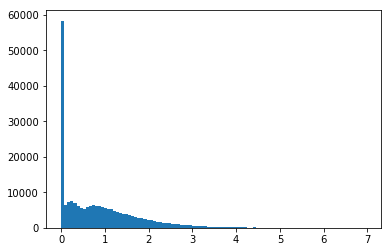

In [43]:
plt.hist(np.array(lst).mean(0).reshape([-1]),bins=100);

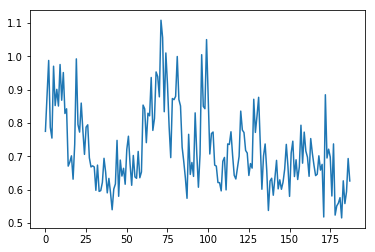

In [44]:
plt.plot(np.array(lst)[:,0,1200]);

In [45]:
for j in range(1680,1690):
    print j,np.nanmean(rawy[:,:,j],dtype=np.float),np.nanmean(y[:,:,j],dtype=np.float)

1680 1.68076379258 0.767920783369
1681 1.6817010969 0.767110917695
1682 1.62592518996 0.723749680765
1683 1.73977632686 0.821946088589
1684 1.71138398698 0.813116099178
1685 1.76363572066 0.845206885747
1686 1.69733310583 0.787718954939
1687 1.70009994492 0.789479112634
1688 nan 0.0
1689 nan 0.0


/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


In [46]:
for j in range(1680,1693):
    u=train_test[:,:,j]
    print j,np.nanmean(np.isnan(u),dtype=np.float),np.nanmean(u,dtype=np.float)

1680

 0.219573672589

 1.43071269016
1681

 0.218917243802

 1.46851882462
1682

 0.218540223828

 1.50809502246
1683

 0.21764277828

 1.49638166353
1684

 0.215330472749

 1.50792691749
1685

 0.214440805982

 1.51124418581
1686

 0.214546572318

 1.46575379577
1687

 0.214058892904

 1.43976571599
1688

 0.214261266687

 1.46527176384
1689

 0.214489109706

 1.46709558047
1690

 0.214767263876

 1.43963034241
1691

 0.215535857673

 1.44590860509
1692

 0.216960127472

 1.44515805701


In [47]:
np.mean(y[:,0,1688],dtype=np.float),np.mean(y[:,0,1686],dtype=np.float),np.mean(y[:,0,1687],dtype=np.float)

(0.0, 0.13274016203703703, 0.14341001157407407)

(54, 4100) 0.874192


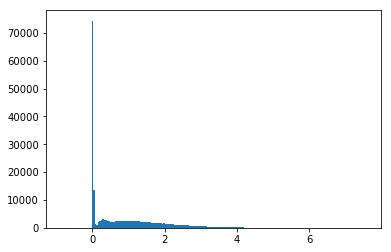

In [48]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1187]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

(54, 4100) 0.859692


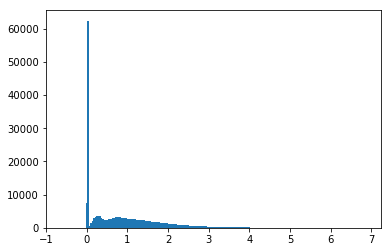

In [49]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1687]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

(54, 4100) 0.86871


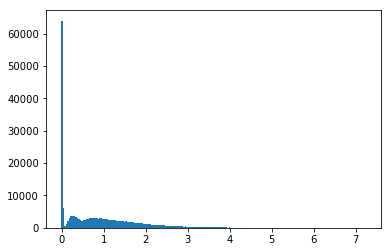

In [50]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1688]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

(54, 4100) 0.841311


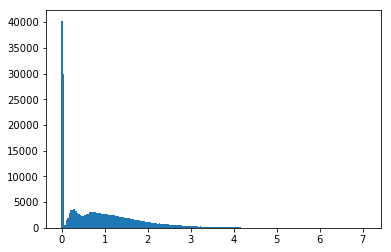

In [51]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1689]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

In [52]:
np.mean(isnan(train_test[:,:,1688]),dtype=np.float)

0.21426126668674095

In [53]:
np.mean(isnan(train_test[:,:,1687]),dtype=np.float)

0.21405889290374386

In [54]:
np.mean(isnan(train_test[:,:,1689]),dtype=np.float)

0.21448910970591187

(54, 4100) 0.86871


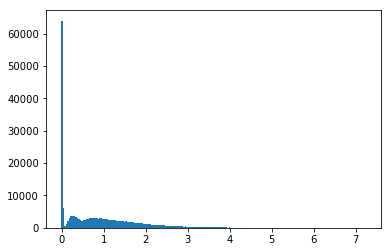

In [55]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1688]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);
pickle.dump(yy_pred3,open(a.name+".alt.pred",'wb'))

In [56]:
c=np.arange(60).reshape([3,4,5])

In [57]:
(c.reshape([-1,5]).reshape([3,4,5])==c).all()

True